In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from scipy import stats
from tqdm import tqdm

plt.rcParams["svg.fonttype"] = "none"
plt.rcParams.update({'font.size': 10})

In [1]:
print(1)

1


In [3]:
plt.rcParams

NameError: name 'plt' is not defined

# Palettes

In [3]:
cell_line_p = {
    "Caco-2": "saddlebrown",
    "SJCRH30": "darkgreen",
    "BE2C": "grey",
    "SJSA1": "teal",
    "HAP-1": "royalblue",
    "HL-60": "cyan",
    "MG63": "lime",
    "VCaP": "gold",
    "C4-2B": "orangered",
    "RWPE2": "orange",
    "22Rv1": "lightcoral",
    "RWPE1": "deeppink",
}
modification_p = {
    "CTCF": "#e5d8bd",
    "H3K4me1": "#fdcdac",
    "H3K9me3": "#b3cde3",
    "H3K36me3": "#e6f5c9",
    "H3K27me3": "#decbe4",
    "H3K4me3": "#b3e2cd",
    "H3K27ac": "#fff2ae",
}

modification_p_richer = {
    "CTCF": "#d3c09b",
    "H3K4me1": "#fabd88",
    "H3K9me3": "#9ab7d3",
    "H3K36me3": "#d7f0a8",
    "H3K27me3": "#c7aed6",
    "H3K4me3": "#9ad1b5",
    "H3K27ac": "#ffe98c",
}

class_names_p = {
    "LINE": "#cc660b",
    "LTR": "#70453c",
    "SINE": "#ab1f20",
    "DNA": "#195f90",
    "Retroposon": "#765297",
    "RC": "#238023",
}

# Repeat masker table analysis

In [12]:
repeat_masker = pd.read_csv("T2T_repeat_masker.csv")
splitted = repeat_masker["name"].str.split("#").str
repeat_masker["individual_name"] = splitted[0]
repeat_masker["family_name_agg"] = splitted[1]
repeat_masker["family_name_agg"][
    ~(repeat_masker["family_name_agg"].str.contains("/"))
] = (repeat_masker["family_name_agg"] + "/")
splitted_2 = repeat_masker["family_name_agg"].str.split("/").str
repeat_masker["family_name"] = splitted_2[1]
repeat_masker["class_name"] = splitted_2[0]
repeat_masker

/tmp/ipykernel_135/3336815846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_masker['family_name_agg'][~(repeat_masker['family_name_agg'].str.contains('/'))] = repeat_masker['family_name_agg'] + '/'


#"chrom"  chromStart  chromEnd                     name  score strand  \
0           chr1           0      2705  (ACCCTA)n#Simple_repeat     29      +   
1           chr1           0      7536            L1MC3#LINE/L1    223      +   
2           chr1        2053      4402   TAR1#Satellite/subtelo    139      -   
3           chr1        4082      4796          LTR60B#LTR/ERV1    273      -   
4           chr1        4082      4837          LTR60B#LTR/ERV1    205      -   
...          ...         ...       ...                      ...    ...    ...   
4636648    chr22    51316748  51317061          AluSq2#SINE/Alu    108      -   
4636649    chr22    51319294  51320377          LTR60B#LTR/ERV1    254      +   
4636650    chr22    51319507  51319826          AluYb8#SINE/Alu     16      +   
4636651    chr22    51320376  51322412   TAR1#Satellite/subtelo    111      +   
4636652    chr22    51321953  51324926  (AGGGTT)n#Simple_repeat     27      +   

         thickStart  thickEnd  reserved  blockCount  \
0                 1      2705         0           3   
1              4663      7533         0           9   
2              2709      4402         0           3   
3              4082      4533         0           3   
4              4533      4660         0           3   
...             ...       ...       ...         ...   
4636648    51316752  51317059         0           3   
4636649    51319295  51320377         0           5   
4636650    51319512  51319817         0           3   
4636651    51320377  51321954         0           3   
4636652    51321954  51324926         0           3   

                                blockSizes  \
0                                 0,2704,0   
1        4912,600,518,158,0,1001,108,392,3   
2                               656,1693,0   
3                                0,451,263   
4                              451,127,177   
...                                    ...   
4636648                            4,307,2   
4636649                      0,217,0,560,0   
4636650                            4,305,9   
4636651                         0,1577,458   
4636652                           0,2972,0   

                                blockStarts       id  \
0                                   -1,1,-1        1   
1        -1,4663,-1,5528,-1,6131,-1,7141,-1        5   
2                                 -1,656,-1        2   
3                                   -1,0,-1        3   
4                                 -1,451,-1        4   
...                                     ...      ...   
4636648                             -1,4,-1  2621452   
4636649                      -1,1,-1,523,-1  2621455   
4636650                             -1,5,-1  2621456   
4636651                             -1,1,-1  2621457   
4636652                             -1,1,-1  2621458   

                                               description individual_name  \
0        2590 2.9 0.6 1.0 chr1 2 2705 (248384623) + (AC...       (ACCCTA)n   
1        1304 19.6 8.0 2.0 chr1 4664 5263 (248382065) +...           L1MC3   
2        5119 13.9 3.6 2.7 chr1 2710 4402 (248382926) C...            TAR1   
3        962 27.3 12.4 1.0 chr1 4083 4533 (248382795) C...          LTR60B   
4        505 20.5 7.9 0.0 chr1 4534 4660 (248382668) C ...          LTR60B   
...                                                    ...             ...   
4636648  2290 10.8 0.3 0.3 chr22 51316753 51317059 (786...          AluSq2   
4636649  1402 25.4 9.6 11.5 chr22 51319296 51319512 (54...          LTR60B   
4636650  2826 1.6 0.0 0.0 chr22 51319513 51319817 (5109...          AluYb8   
4636651  7454 11.1 4.0 2.6 chr22 51320378 51321954 (297...            TAR1   
4636652  2871 2.7 0.2 1.3 chr22 51321955 51324926 (0) +...       (AGGGTT)n   

           family_name_agg family_name     class_name  
0           Simple_repeat/              Simple_repeat  
1                  LINE/L1          L1           LINE  
2        Satellite/subtelo     subtelo     

In [18]:
repeat_masker["class_name"].unique()

array(['Simple_repeat', 'LINE', 'Satellite', 'LTR', 'SINE', 'DNA',
       'Low_complexity', 'Unknown', 'Retroposon', 'snRNA', 'srpRNA',
       'rRNA', 'scRNA', 'tRNA', 'RC', 'DNA?'], dtype=object)

In [7]:
repeat_masker["family_name"].unique()

array(['Simple_repeat', 'LINE/L1', 'Satellite/subtelo', 'LTR/ERV1',
       'LTR/ERVL-MaLR', 'SINE/Alu', 'SINE/MIR', 'DNA/hAT-Charlie',
       'DNA/MULE-MuDR', 'DNA/TcMar-Tigger', 'Low_complexity', 'LINE/L2',
       'LINE/RTE-X', 'LTR/ERVL', 'Unknown', 'LINE/CR1', 'LTR', 'LTR/ERVK',
       'Retroposon/SVA', 'snRNA', 'LTR/Gypsy', 'DNA/hAT-Blackjack',
       'Satellite', 'DNA/hAT-Tip100', 'srpRNA', 'DNA/hAT-Tag1', 'DNA',
       'rRNA', 'SINE/tRNA-Deu', 'LINE/RTE-BovB', 'DNA/hAT-Ac', 'scRNA',
       'SINE/5S-Deu-L2', 'DNA/PiggyBac', 'DNA/hAT', 'tRNA',
       'SINE/tRNA-RTE', 'RC/Helitron', 'DNA/TcMar-Mariner',
       'DNA/TcMar-Tc2', 'SINE/tRNA', 'LINE/I-Jockey', 'LINE/Penelope',
       'LINE/Dong-R4', 'DNA/TcMar', 'DNA/Kolobok', 'DNA/TcMar-Tc1',
       'Satellite/centr', 'DNA/Merlin', 'DNA/hAT?', 'DNA?',
       'DNA/TcMar-Pogo', 'LINE/L1-Tx1', 'DNA/Crypton', 'DNA/Crypton-A',
       'DNA/PIF-Harbinger', 'DNA/hAT-Tip100?', 'DNA?/hAT-Tip100?',
       'Satellite/acro', 'DNA/hAT-hAT19'], dtype

In [6]:
splitted = repeat_masker["name"].str.split("#").str
repeat_masker["individual_name"] = splitted[0]
repeat_masker["family_name"] = splitted[1]
repeat_masker

#"chrom"  chromStart  chromEnd                     name  score strand  \
0           chr1           0      2705  (ACCCTA)n#Simple_repeat     29      +   
1           chr1           0      7536            L1MC3#LINE/L1    223      +   
2           chr1        2053      4402   TAR1#Satellite/subtelo    139      -   
3           chr1        4082      4796          LTR60B#LTR/ERV1    273      -   
4           chr1        4082      4837          LTR60B#LTR/ERV1    205      -   
...          ...         ...       ...                      ...    ...    ...   
4636648    chr22    51316748  51317061          AluSq2#SINE/Alu    108      -   
4636649    chr22    51319294  51320377          LTR60B#LTR/ERV1    254      +   
4636650    chr22    51319507  51319826          AluYb8#SINE/Alu     16      +   
4636651    chr22    51320376  51322412   TAR1#Satellite/subtelo    111      +   
4636652    chr22    51321953  51324926  (AGGGTT)n#Simple_repeat     27      +   

         thickStart  thickEnd  reserved  blockCount  \
0                 1      2705         0           3   
1              4663      7533         0           9   
2              2709      4402         0           3   
3              4082      4533         0           3   
4              4533      4660         0           3   
...             ...       ...       ...         ...   
4636648    51316752  51317059         0           3   
4636649    51319295  51320377         0           5   
4636650    51319512  51319817         0           3   
4636651    51320377  51321954         0           3   
4636652    51321954  51324926         0           3   

                                blockSizes  \
0                                 0,2704,0   
1        4912,600,518,158,0,1001,108,392,3   
2                               656,1693,0   
3                                0,451,263   
4                              451,127,177   
...                                    ...   
4636648                            4,307,2   
4636649                      0,217,0,560,0   
4636650                            4,305,9   
4636651                         0,1577,458   
4636652                           0,2972,0   

                                blockStarts       id  \
0                                   -1,1,-1        1   
1        -1,4663,-1,5528,-1,6131,-1,7141,-1        5   
2                                 -1,656,-1        2   
3                                   -1,0,-1        3   
4                                 -1,451,-1        4   
...                                     ...      ...   
4636648                             -1,4,-1  2621452   
4636649                      -1,1,-1,523,-1  2621455   
4636650                             -1,5,-1  2621456   
4636651                             -1,1,-1  2621457   
4636652                             -1,1,-1  2621458   

                                               description individual_name  \
0        2590 2.9 0.6 1.0 chr1 2 2705 (248384623) + (AC...       (ACCCTA)n   
1        1304 19.6 8.0 2.0 chr1 4664 5263 (248382065) +...           L1MC3   
2        5119 13.9 3.6 2.7 chr1 2710 4402 (248382926) C...            TAR1   
3        962 27.3 12.4 1.0 chr1 4083 4533 (248382795) C...          LTR60B   
4        505 20.5 7.9 0.0 chr1 4534 4660 (248382668) C ...          LTR60B   
...                                                    ...             ...   
4636648  2290 10.8 0.3 0.3 chr22 51316753 51317059 (786...          AluSq2   
4636649  1402 25.4 9.6 11.5 chr22 51319296 51319512 (54...          LTR60B   
4636650  2826 1.6 0.0 0.0 chr22 51319513 51319817 (5109...          AluYb8   
4636651  7454 11.1 4.0 2.6 chr22 51320378 51321954 (297...            TAR1   
4636652  2871 2.7 0.2 1.3 chr22 51321955 51324926 (0) +...       (AGGGTT)n   

               family_name  
0            Simple_repeat  
1                  LINE/L1  
2        Satellite/subtelo  
3                 LTR/ERV1  
4                 LTR/ERV1  
...                    ...  
4636648 

In [9]:
repeat_masker['family_name'][!(repeat_masker['family_name'].str.contains('/'))] = repeat_masker['family_name'] + '/'

/tmp/ipykernel_135/2953864616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_masker['family_name'][repeat_masker['family_name'].str.contains('/')] = repeat_masker['family_name'] + '/'


In [4]:
repeat_masker = pd.read_csv("T2T_repeat_masker_processed.csv")

In [6]:
repeat_masker.class_name.value_counts()

SINE          1706485
LINE          1005214
LTR            531410
DNA            458177
Retroposon       6274
RC               1869
Name: class_name, dtype: int64

In [21]:
class_query = 'class_name in ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]'
repeat_masker = repeat_masker.query(class_query)
repeat_masker.to_csv("T2T_repeat_masker_processed.csv")
repeat_masker

#"chrom"  chromStart  chromEnd                 name  score strand  \
1           chr1           0      7536        L1MC3#LINE/L1    223      +   
3           chr1        4082      4796      LTR60B#LTR/ERV1    273      -   
4           chr1        4082      4837      LTR60B#LTR/ERV1    205      -   
5           chr1        5267      5850    MER34C_v#LTR/ERV1    147      +   
6           chr1        5685      6131  MSTA1#LTR/ERVL-MaLR    148      +   
...          ...         ...       ...                  ...    ...    ...   
4636646    chr22    51316429  51324176         L1MC#LINE/L1    211      -   
4636647    chr22    51316699  51317699       MER72#LTR/ERV1    149      -   
4636648    chr22    51316748  51317061      AluSq2#SINE/Alu    108      -   
4636649    chr22    51319294  51320377      LTR60B#LTR/ERV1    254      +   
4636650    chr22    51319507  51319826      AluYb8#SINE/Alu     16      +   

         thickStart  thickEnd  reserved  blockCount  \
1              4663      7533         0           9   
3              4082      4533         0           3   
4              4533      4660         0           3   
5              5274      5528         0           3   
6              5686      6131         0           3   
...             ...       ...       ...         ...   
4636646    51318668  51319279         0           3   
4636647    51316699  51317699         0           5   
4636648    51316752  51317059         0           3   
4636649    51319295  51320377         0           5   
4636650    51319512  51319817         0           3   

                                blockSizes  \
1        4912,600,518,158,0,1001,108,392,3   
3                                0,451,263   
4                              451,127,177   
5                                6,254,322   
6                                  0,445,0   
...                                    ...   
4636646                      2239,611,4897   
4636647                       0,53,0,640,0   
4636648                            4,307,2   
4636649                      0,217,0,560,0   
4636650                            4,305,9   

                                blockStarts       id  \
1        -1,4663,-1,5528,-1,6131,-1,7141,-1        5   
3                                   -1,0,-1        3   
4                                 -1,451,-1        4   
5                                   -1,7,-1        6   
6                                   -1,1,-1        7   
...                                     ...      ...   
4636646                          -1,2239,-1  2621454   
4636647                      -1,0,-1,360,-1  2621451   
4636648                             -1,4,-1  2621452   
4636649                      -1,1,-1,523,-1  2621455   
4636650                             -1,5,-1  2621456   

                                               description individual_name  \
1        1304 19.6 8.0 2.0 chr1 4664 5263 (248382065) +...           L1MC3   
3        962 27.3 12.4 1.0 chr1 4083 4533 (248382795) C...          LTR60B   
4        505 20.5 7.9 0.0 chr1 4534 4660 (248382668) C ...          LTR60B   
5        1403 14.7 2.0 0.8 chr1 5275 5528 (248381800) +...        MER34C_v   
6        2442 14.8 5.8 1.3 chr1 5687 6131 (248381197) +...           MSTA1   
...                                                    ...             ...   
4636646  1504 21.1 8.0 1.6 chr22 51318669 51319279 (564...            L1MC   
4636647  3917 14.9 7.3 3.2 chr22 51316700 51316752 (817...           MER72   
4636648  2290 10.8 0.3 0.3 chr22 51316753 51317059 (786...          AluSq2   
4636649  1402 25.4 9.6 11.5 chr22 51319296 51319512 (54...          LTR60B   
4636650  2826 1.6 0.0 0.0 chr22 51319513 51319817 (5109...          AluYb8   

        family_name_agg family_name class_name  
1               LINE/L1          L1       LINE  
3              LTR/ERV1        ERV1        LTR  
4              LTR/ERV1        ERV1        LTR  
5              LTR/ERV1        ERV1        LTR  
6         LTR/

## Divergence analysis

In [22]:
repeat_masker = pd.read_csv("T2T_repeat_masker_processed.csv")

In [ ]:
# repeat_masker.to_csv("T2T_repeat_masker_processed.bed", sep="\t", header=False, index=False)

In [10]:
# repeat_masker[['#"chrom"', 'chromStart', 'chromEnd', 'score', 'individual_name','family_name','class_name']].to_csv('T2T_repeat_masker_processed.csv')

In [14]:
repeat_masker

Unnamed: 0 #"chrom"  chromStart  chromEnd  score individual_name  \
0                 0     chr1           0      7536    223           L1MC3   
1                 1     chr1        4082      4796    273          LTR60B   
2                 2     chr1        4082      4837    205          LTR60B   
3                 3     chr1        5267      5850    147        MER34C_v   
4                 4     chr1        5685      6131    148           MSTA1   
...             ...      ...         ...       ...    ...             ...   
3709424     3709424    chr22    51316429  51324176    211            L1MC   
3709425     3709425    chr22    51316699  51317699    149           MER72   
3709426     3709426    chr22    51316748  51317061    108          AluSq2   
3709427     3709427    chr22    51319294  51320377    254          LTR60B   
3709428     3709428    chr22    51319507  51319826     16          AluYb8   

        family_name class_name  
0                L1       LINE  
1              ERV1        LTR  
2              ERV1        LTR  
3              ERV1        LTR  
4         ERVL-MaLR        LTR  
...             ...        ...  
3709424          L1       LINE  
3709425        ERV1        LTR  
3709426         Alu       SINE  
3709427        ERV1        LTR  
3709428         Alu       SINE  

[3709429 rows x 8 columns]

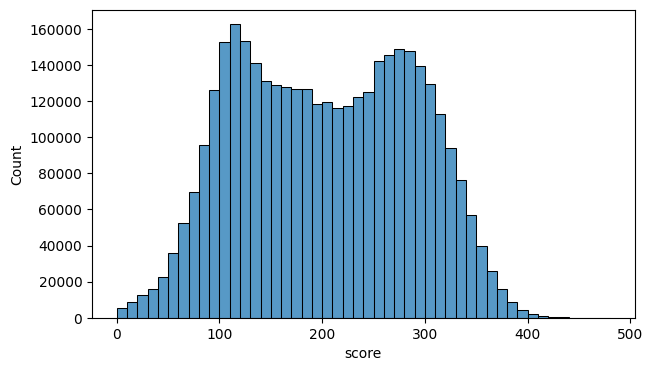

In [32]:
figure, ax = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    sharey=False,
    squeeze=True,
    # width_ratios=None,
    # height_ratios=[1, 1, 1, 1, 1, 1, 0.3, 0.3],
    figsize=(7, 4),
)
sns.histplot(repeat_masker.score, ax=ax, bins=48)


plt.savefig("plots/Divergence_score_dist_all.svg")

In [27]:
repeat_masker.score.max()

480

In [33]:
(repeat_masker["class_name"] + " / " + repeat_masker["family_name"]).value_counts()

SINE / Alu             1164096
LINE / L1               565459
SINE / MIR              534149
LINE / L2               373176
LTR / ERVL-MaLR         259882
DNA / hAT-Charlie       232104
LTR / ERV1              116610
LTR / ERVL              116199
DNA / TcMar-Tigger      106067
DNA / hAT-Tip100         57232
LINE / CR1               49193
LTR / Gypsy              18413
DNA / hAT-Blackjack      16167
DNA / TcMar-Mariner      15617
LINE / RTE-X             10790
LTR / ERVK                7870
DNA / TcMar-Tc2           6918
Retroposon / SVA          6274
LINE / RTE-BovB           5031
SINE / tRNA-RTE           4154
DNA / hAT-Ac              3692
DNA / hAT                 3038
DNA / MULE-MuDR           2459
DNA / PiggyBac            2156
SINE / 5S-Deu-L2          2019
RC / Helitron             1869
DNA / hAT-Tag1            1849
SINE / tRNA               1612
LINE / Penelope            779
DNA / TcMar-Tc1            701
LINE / Dong-R4             503
SINE / tRNA-Deu            455
DNA / Ko

In [32]:
pd.crosstab(repeat_masker["class_name"], repeat_masker["family_name"])

family_name  5S-Deu-L2      Alu    CR1  Crypton  Crypton-A  Dong-R4    ERV1  \
class_name                                                                    
DNA                  0        0      0      305        150        0       0   
LINE                 0        0  49193        0          0      503       0   
LTR                  0        0      0        0          0        0  116610   
RC                   0        0      0        0          0        0       0   
Retroposon           0        0      0        0          0        0       0   
SINE              2019  1164096      0        0          0        0       0   

family_name  ERVK    ERVL  ERVL-MaLR  ...  hAT-Blackjack  hAT-Charlie  \
class_name                            ...                               
DNA             0       0          0  ...          16167       232104   
LINE            0       0          0  ...              0            0   
LTR          7870  116199     259882  ...              0            0   
RC              0       0          0  ...              0            0   
Retroposon      0       0          0  ...              0            0   
SINE            0       0          0  ...              0            0   

family_name  hAT-Tag1  hAT-Tip100  hAT-Tip100?  hAT-hAT19  hAT?  tRNA  \
class_name                                                              
DNA              1849       57232           67         18    34     0   
LINE                0           0            0          0     0     0   
LTR                 0           0            0          0     0     0   
RC                  0           0            0          0     0     0   
Retroposon          0           0            0          0     0     0   
SINE                0           0            0          0     0  1612   

family_name  tRNA-Deu  tRNA-RTE  
class_name                       
DNA                 0         0  
LINE                0         0  
LTR                 0         0  
RC                  0         0  
Retroposon          0         0  
SINE              455      4154  

[6 rows x 44 columns]

In [13]:
repeat_masker[["class_name", "family_name"]].drop_duplicates().to_csv(
    "families_by_classes_TE.csv"
)

In [14]:
repeat_masker[["class_name", "individual_name"]].drop_duplicates().to_csv(
    "individuals_by_classes_TE.csv"
)

In [25]:
repeat_masker["individual_name"].value_counts().to_csv(
    "individuals_counts.csv", index=True
)
repeat_masker["family_name"].value_counts().to_csv("families_counts.csv", index=True)

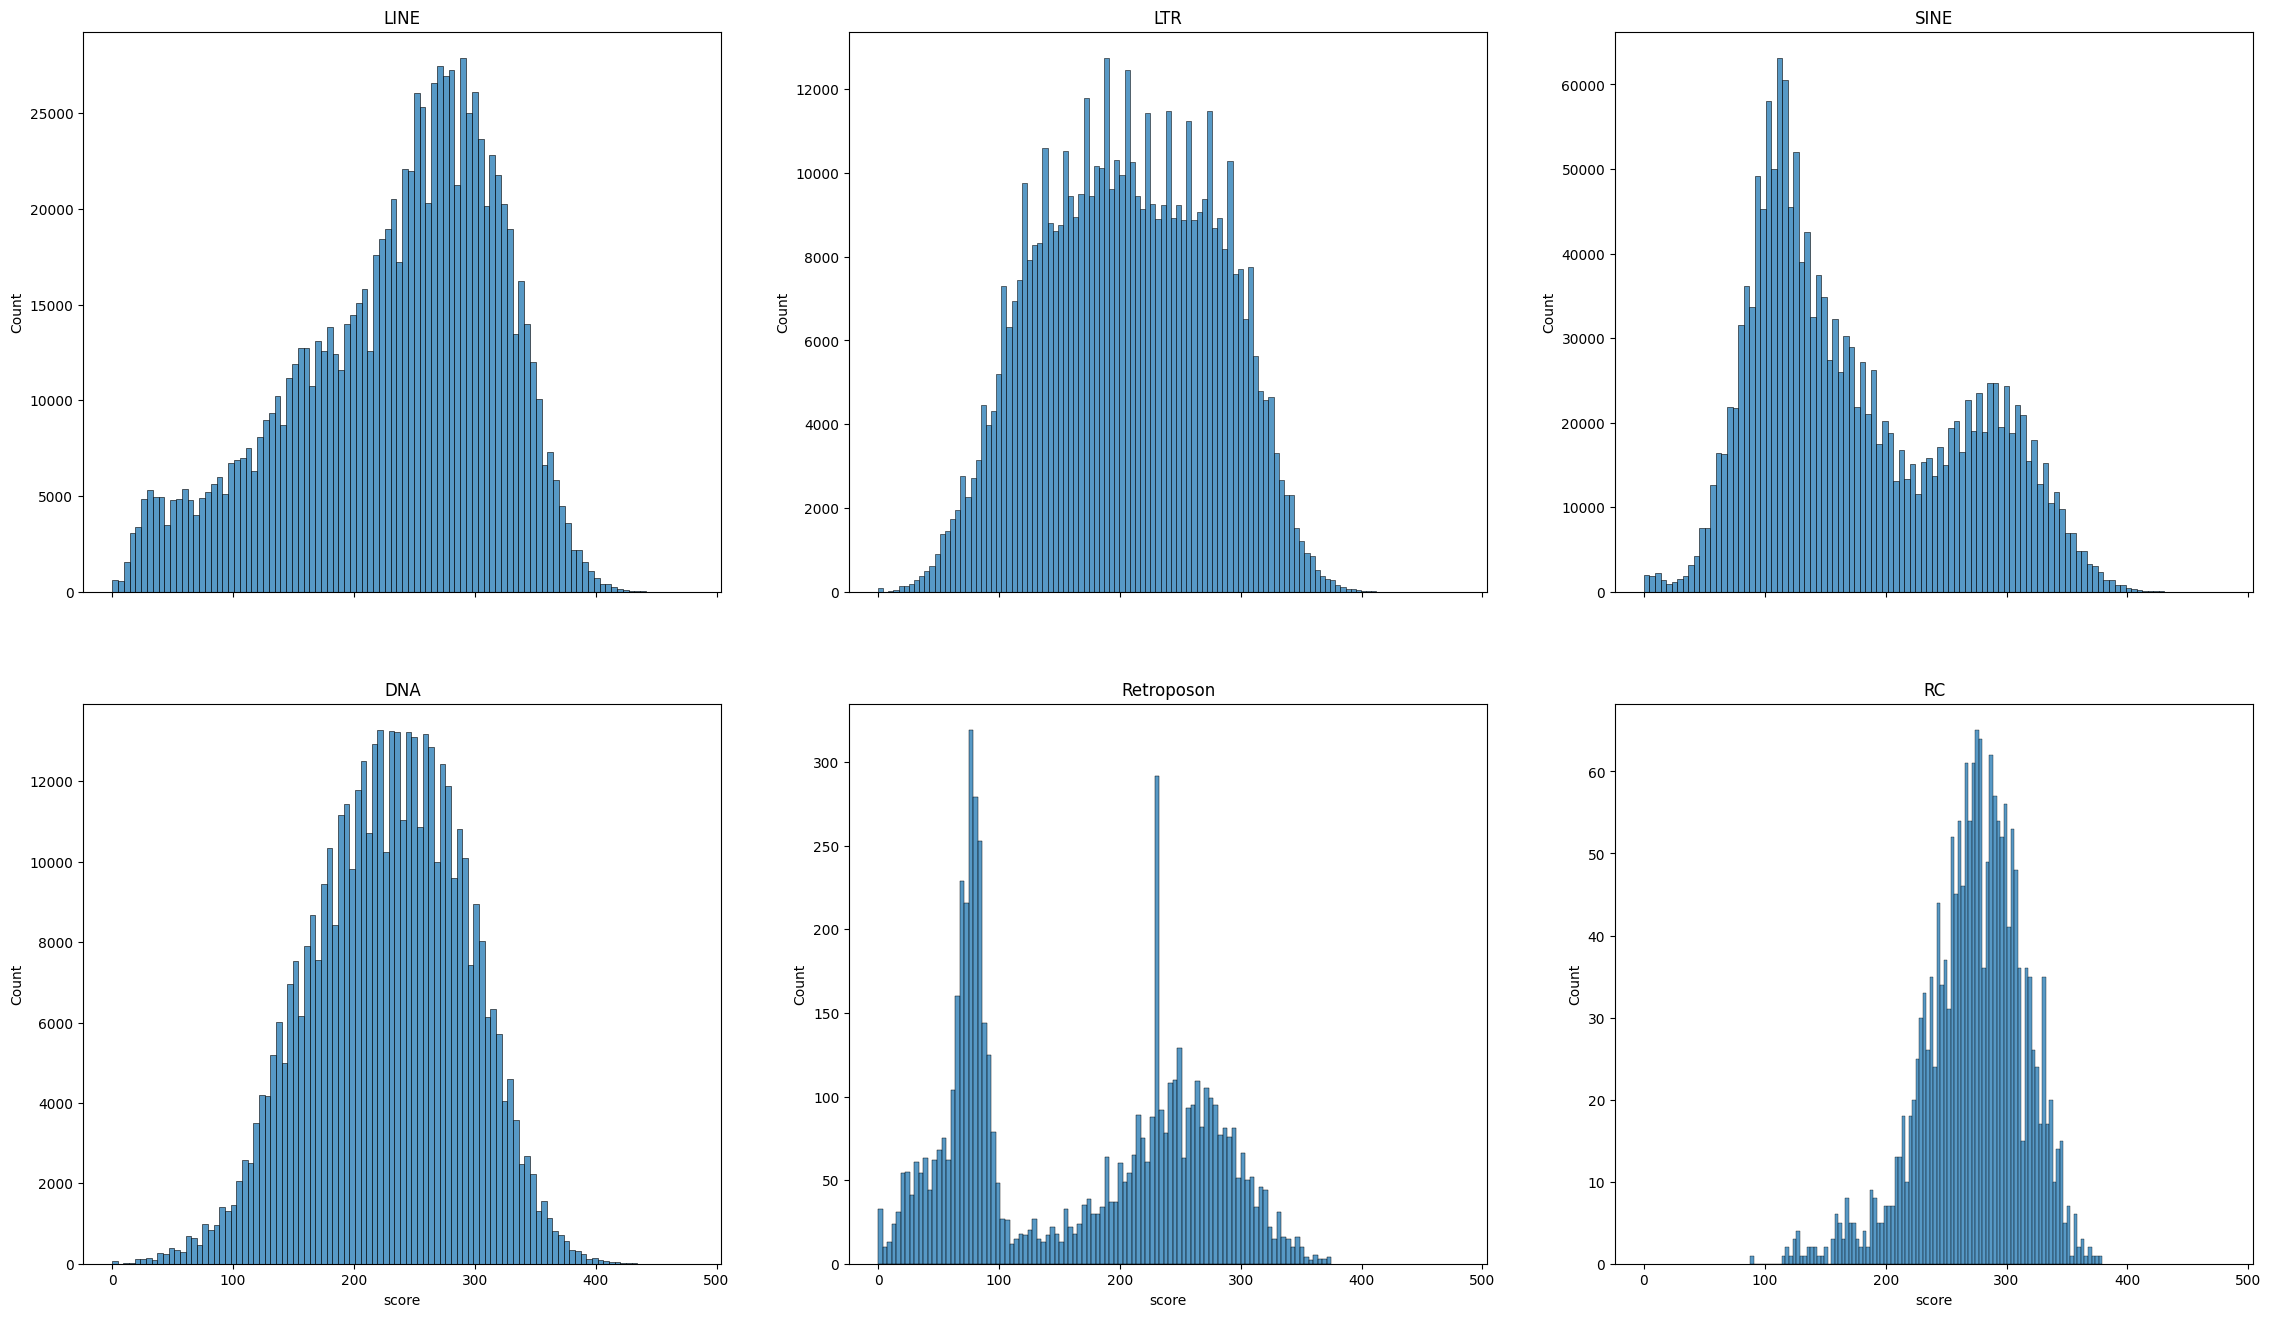

In [4]:
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]

figure, axs = plt.subplots(
    nrows=2,
    ncols=3,
    sharex=True,
    sharey=False,
    squeeze=True,
    # width_ratios=None,
    # height_ratios=[1, 1, 1, 1, 1, 1, 0.3, 0.3],
    figsize=(28, 16),
)

# Use zip to iterate over class names and the flattened axes array
# axs.flatten() converts the 2x3 array into a 1D array of 6 axes
for class_name, ax in zip(class_names, axs.flatten()):

    # Filter the data
    query_local = f'class_name == "{class_name}"'
    repeat_masker_local = repeat_masker.query(query_local)

    # Use sns.histplot (axes-level) instead of sns.displot (figure-level)
    sns.histplot(repeat_masker_local.score, ax=ax, bins=100)

    # Use ax.set_title() to set the title for the subplot
    ax.set_title(class_name)

# Save the final figure
# plt.savefig("plots/Divergence_score_dist_by_class.svg")

/home/jovyan/venvs/bioreactor/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/jovyan/venvs/bioreactor/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_a

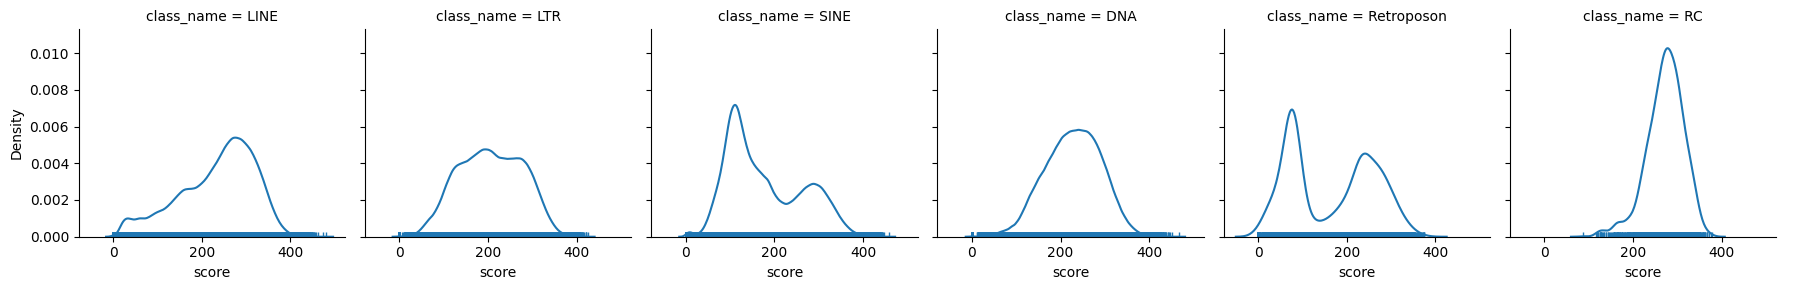

In [23]:
g = sns.FacetGrid(repeat_masker, col="class_name")
p1 = g.map(sns.distplot, "score", hist=False, rug=True).add_legend()

### Concordance between divergence and evolutionary age

In [11]:
from supervenn import supervenn

In [3]:
individuals_by_classes = pd.read_csv("individuals_by_classes_TE.csv").dropna()

repeat_masker = pd.read_csv("T2T_repeat_masker_processed.csv")
divergence_average = (
    repeat_masker[["score", "individual_name"]]
    .groupby("individual_name")
    .mean()["score"]
)


public_age = pd.read_excel('41598_2024_73752_MOESM2_ESM.xlsx', sheet_name='TE subfamily')  
individuals_by_classes = individuals_by_classes.set_index("individual_name").reindex(
    public_age['repeat subfamily name']
)

public_age['average_divergence'] = list(divergence_average.reindex(public_age['repeat subfamily name']))
public_age['class_name'] = list(individuals_by_classes['class_name'])
public_age['class_name_random'] = public_age['class_name'].sample(frac=1, random_state=1).set_axis(public_age.index)
public_age.dropna(subset='average_divergence')

repeat subfamily name repeat family name repeat class  \
1                    AluJr               AluJ         SINE   
2                    AluJo               AluJ         SINE   
3                   AluJr4               AluJ         SINE   
4                    AluJb               AluJ         SINE   
5                   AluSq2               AluS         SINE   
...                    ...                ...          ...   
1264           hAT-4b_Ther        hAT-4b_Ther          DNA   
1265             hAT-5_Mam          hAT-5_Mam          DNA   
1266            hAT-N1_Mam         hAT-N1_Mam          DNA   
1267           hAT-N1a_Mam         hAT-N1_Mam          DNA   
1268        Penelope1_Vert                NaN         LINE   

     repeat classification repeat region  repeat consensus length  \
1                      Alu           NaN                      312   
2                      Alu           NaN                      312   
3                      Alu           NaN                      312   
4                      Alu           NaN                      312   
5                      Alu           NaN                      313   
...                    ...           ...                      ...   
1264            hAT-Tip100           NaN                     1263   
1265              hAT-Tag1           NaN                     3540   
1266            hAT-Tip100           NaN                      340   
1267            hAT-Tip100           NaN                      362   
1268              Penelope           NaN                     1079   

      repeat copy count  repeat copy count after filtering emergence era  \
1                145275                              38637   Haplorrhini   
2                195492                              70049   Haplorrhini   
3                114761                              23441   Haplorrhini   
4                115377                              78827   Haplorrhini   
5                 49840                              44294   Haplorrhini   
...                 ...                                ...           ...   
1264                134                                  5      Eutheria   
1265                464                                  3      Eutheria   
1266                170                                 23      Eutheria   
1267                372                                 35        Theria   
1268                 74                                  0           NaN   

      evolutionary age  average_divergence class_name class_name_random  
1                 63.0          164.110565       SINE               NaN  
2                 63.0          159.136869       SINE               LTR  
3                 63.0          168.305085       SINE               NaN  
4                 63.0          176.103257       SINE               DNA  
5                 63.0          107.051696       SINE               NaN  
...                ...                 ...        ...               ...  
1264             105.0          266.937500        DNA               LTR  
1265             105.0          257.001460        DNA               LTR  
1266             105.0          272.766355        DNA               DNA  
1267             159.0          257.520788        DNA               NaN  
1268               NaN          236.486521       LINE               LTR  

[906 rows x 13 columns]

In [36]:
public_age['class_name']

0        NaN
1       SINE
2       SINE
3       SINE
4       SINE
        ... 
1264     DNA
1265     DNA
1266     DNA
1267     DNA
1268    LINE
Name: class_name, Length: 1269, dtype: object

In [41]:
public_age['class_name'].sample(frac=1, random_state=1).reset_index(drop=True)

0       DNA
1       NaN
2       LTR
3       NaN
4       DNA
       ... 
1264    LTR
1265    LTR
1266    DNA
1267    NaN
1268    LTR
Name: class_name, Length: 1269, dtype: object

<Axes: xlabel='evolutionary age', ylabel='average_divergence'>

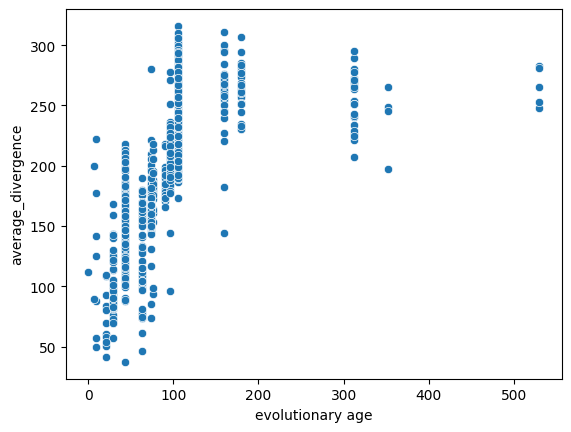

In [5]:
sns.scatterplot(data=public_age, x='evolutionary age', y='average_divergence')

In [7]:
from scipy import stats
public_age_young = public_age[public_age['evolutionary age'] < 150][['evolutionary age','average_divergence']].dropna()

stats.pearsonr(public_age_young['evolutionary age'], public_age_young['average_divergence'])


PearsonRResult(statistic=0.8378551967501433, pvalue=3.8166192497127716e-200)

Generating plot...
Plot saved to ./plots/average_divergence_vs_evol_age_TE_individuals.svg


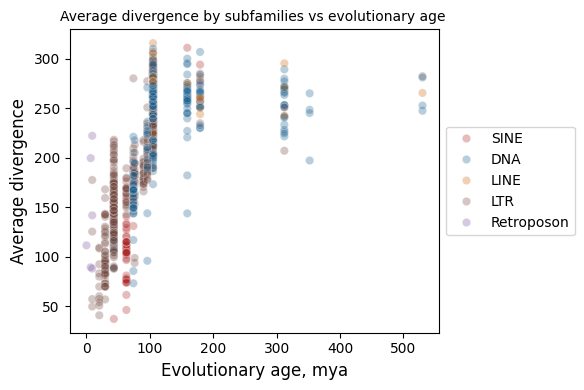

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

# --- 5. Create the Plot ---
print("Generating plot...")
# Create the figure and axes (for figsize customization)
fig, ax = plt.subplots(figsize=(7, 4))

# Draw the scatterplot onto the axis
sns.scatterplot(
    data=public_age,
    hue="class_name",
    x="evolutionary age",
    y="average_divergence",
    palette=class_names_p,
    ax=ax,
    alpha=0.3,
)

# --- 8. Tidy Up and Save ---
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_title("Average divergence by subfamilies vs evolutionary age ", fontsize=10)
ax.set_xlabel("Evolutionary age, mya", fontsize=12)
ax.set_ylabel("Average divergence", fontsize=12)
#ax.set_ylim((0, 0.225))

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space for the legend

# Save to SVG
save_path = "./plots/average_divergence_vs_evol_age_TE_individuals.svg"
fig.savefig(save_path, format="svg", transparent=True)
print(f"Plot saved to {save_path}")

plt.show()

INFO: Generating Venn diagram...
INFO: Saving plot to plots/TE_name_overlap_families.svg...


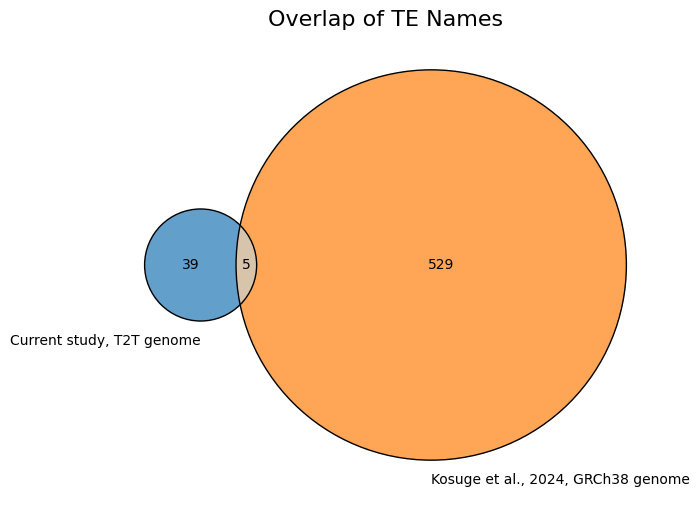

SUCCESS: Plot saved.


In [34]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import pandas as pd
import numpy as np
import os


divergence_average = (
    repeat_masker[["score", "family_name"]]
    .groupby("family_name")
    .mean()["score"]
)


# --- 2. Define your sets and labels ---
sets = [
    set(divergence_average.index), 
    set(public_age['repeat family name'])
]
labels = ('Current study, T2T genome', 'Kosuge et al., 2024, GRCh38 genome') # Use a tuple for labels

# --- 3. Create the plot with configurable figsize ---
print("INFO: Generating Venn diagram...")
# You can change the figsize here
fig, ax = plt.subplots(figsize=(8, 6))

# --- 4. Plot the Venn diagram ---
v = venn2(
    subsets=sets,
    set_labels=labels,
    ax=ax,
    # Customize colors
    set_colors=('#1f77b4', '#ff7f0e'), # Blue and Orange
    alpha=0.7
)

# Add circles with black outlines
venn2_circles(subsets=sets, linestyle='solid', linewidth=1.0, color='black', ax=ax)

# Customize label fonts
for text in v.set_labels:
    text.set_fontsize(10)
for text in v.subset_labels:
    text.set_fontsize(10)

# Add a title
ax.set_title("Overlap of TE Names", fontsize=16)

# --- 5. Save to SVG ---
save_path = "plots/TE_name_overlap_families.svg"
print(f"INFO: Saving plot to {save_path}...")

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save with tight_layout and transparent background
fig.savefig(
    save_path, 
    format="svg", 
    bbox_inches="tight",
    transparent=True
)

plt.show()
print("SUCCESS: Plot saved.")

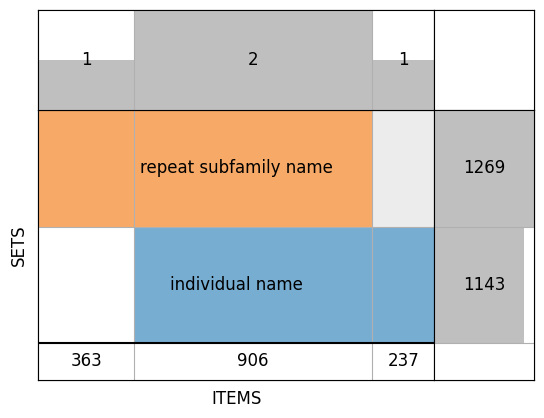

In [30]:
sets = [set(divergence_average.index), set(public_age['repeat subfamily name'])]
labels = ['individual name', 'repeat subfamily name']
supervenn(sets, labels)

In [27]:
set(divergence_average.index) - set(public_age['repeat subfamily name'])

{'Alu',
 'Alu-VAR_rnd-5_family-1084',
 'Charlie18a',
 'Charlie7b_Mars',
 'ERV24B_Prim-int',
 'ERV24_Prim-int',
 'ERVL-B4-int',
 'ERVL-E-int',
 'ERVL-int',
 'ERVL47-int',
 'HERV-Fc1-int',
 'HERV-Fc2-int',
 'HERV15-int',
 'HERV16-int',
 'HERV17-int',
 'HERV3-int',
 'HERV30-int',
 'HERV35I-int',
 'HERV9-int',
 'HERV9N-int',
 'HERV9NC-int',
 'HERVE-int',
 'HERVE_a-int',
 'HERVFH19-int',
 'HERVFH21-int',
 'HERVH-int',
 'HERVH48-int',
 'HERVI-int',
 'HERVIP10B3-int',
 'HERVIP10F-int',
 'HERVIP10FH-int',
 'HERVK-int',
 'HERVK11-int',
 'HERVK11D-int',
 'HERVK13-int',
 'HERVK14-int',
 'HERVK14C-int',
 'HERVK22-int',
 'HERVK3-int',
 'HERVK9-int',
 'HERVKC4-int',
 'HERVL-int',
 'HERVL18-int',
 'HERVL32-int',
 'HERVL40-int',
 'HERVL66-int',
 'HERVL74-int',
 'HERVP71A-int',
 'HERVS71-int',
 'HSMAR2',
 'HUERS-P1-int',
 'HUERS-P2-int',
 'HUERS-P3-int',
 'HUERS-P3b-int',
 'Harlequin-int',
 'Helitron1Na_Mam',
 'Helitron1Nb_Mam',
 'Helitron2Na_Mam',
 'Helitron3Na_Mam',
 'Kanga2_a',
 'L1HS',
 'L1M',
 'L1

In [28]:
set(public_age['repeat subfamily name']) - set(divergence_average.index)

{'7SLRNA',
 'BC200_0',
 'BC200_1',
 'CR1_Amni-1',
 'Charlie18a_0',
 'Charlie18a_1',
 'DIRS-1a_Amnio',
 'DIRS-1b_Amnio',
 'DIRS-1c_Amnio',
 'ERV24B_Prim',
 'ERV24_Prim',
 'ERVL',
 'ERVL-B4',
 'ERVL-E',
 'ERVL47',
 'HERV-Fc1',
 'HERV-Fc2_0',
 'HERV-Fc2_1',
 'HERV15',
 'HERV16',
 'HERV17_0',
 'HERV17_1',
 'HERV30',
 'HERV35I',
 'HERV3_0',
 'HERV3_1',
 'HERV9',
 'HERV9N',
 'HERV9NC',
 'HERVE',
 'HERVE_a',
 'HERVFH19',
 'HERVFH21',
 'HERVH48',
 'HERVH_0',
 'HERVH_1',
 'HERVH_2',
 'HERVH_3',
 'HERVH_4',
 'HERVI',
 'HERVIP10B3',
 'HERVIP10F',
 'HERVIP10FH',
 'HERVK11',
 'HERVK11D',
 'HERVK13',
 'HERVK14',
 'HERVK14C',
 'HERVK22_0',
 'HERVK22_1',
 'HERVK3_0',
 'HERVK3_1',
 'HERVK9_0',
 'HERVK9_1',
 'HERVK9_2',
 'HERVKC4',
 'HERVK_0',
 'HERVK_1',
 'HERVL',
 'HERVL18_0',
 'HERVL18_1',
 'HERVL18_2',
 'HERVL32',
 'HERVL40',
 'HERVL66',
 'HERVL74',
 'HERVP71_0',
 'HERVP71_1',
 'HERVS71_0',
 'HERVS71_1',
 'HERVS71_2',
 'HSMAR2_0',
 'HSMAR2_1',
 'HSMAR2_2',
 'HUERS-P1_0',
 'HUERS-P1_1',
 'HUERS-P1_2'

In [5]:
public_age = pd.read_excel('41598_2024_73752_MOESM2_ESM.xlsx', sheet_name='TE subfamily')
public_age[['repeat class', 'repeat copy count']].groupby('repeat class').sum()

repeat copy count
repeat class                   
DNA                      389060
ERV/LTR                  701405
LINE                    1152399
Retroposon               128872
SINE                    2031756

# Gene table analysis

In [9]:
gene_table = pd.read_csv("T2T_refseq_all_genes.csv")
gene_table = gene_table[
    (gene_table.geneName.str.startswith("NM"))
    | (gene_table.geneName.str.startswith("NR"))
    | (gene_table.geneName.str.startswith("NP"))
    | (gene_table.geneName.str.startswith("NP"))
]
gene_table["thick_length"] = gene_table["thickEnd"] - gene_table["thickStart"]
gene_table["TSS_start"] = gene_table["chromStart"] - 5000
gene_table["TSS_end"] = gene_table["chromStart"] + 5000

gene_table["TSS_start"][gene_table["strand"] == "-"] = (
    gene_table["chromEnd"][gene_table["strand"] == "-"] - 5000
)
gene_table["TSS_end"][gene_table["strand"] == "-"] = (
    gene_table["chromEnd"][gene_table["strand"] == "-"] + 5000
)

gene_table[['#"chrom"', "TSS_start", "TSS_end", "geneName2"]].to_csv(
    "TSS.bed", sep="\t", header=False, index=False
)

gene_table["TSS_start"][gene_table.TSS_start < 0] = 0

gene_table  # [(gene_table['thick_length'] > 3000) & (gene_table['strand'] == '+')]
# gene_table[(gene_table['thick_length'] > 3000) & (gene_table['strand'] == '+')]

/tmp/ipykernel_172/1446679063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_table['TSS_start'][gene_table['strand'] == '-'] = gene_table['chromEnd'][gene_table['strand'] == '-'] - 5000
/tmp/ipykernel_172/1446679063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_table['TSS_end'][gene_table['strand'] == '-'] = gene_table['chromEnd'][gene_table['strand'] == '-'] + 5000
/tmp/ipykernel_172/1446679063.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

#"chrom"  chromStart  chromEnd            name  score strand  \
0          chr1        7505     13582     NR_182076.1      0      -   
1          chr1        7505    137287     NR_182075.1      0      -   
2          chr1        7505    138480     NR_182074.1      0      -   
4          chr1       52978     54612     NR_125957.1      0      -   
5          chr1      111939    112877  NM_001005277.1      0      -   
...         ...         ...       ...             ...    ...    ...   
178149    chr22    51281002  51297133  NM_001350017.2      0      -   
178150    chr22    51281002  51297133  NM_001394054.1      0      -   
178151    chr22    51281002  51297133  NM_001394055.1      0      -   
178152    chr22    51281002  51297133     NM_007081.4      0      -   
178177    chr22    51297225  51313167     NR_026982.1      0      +   

        thickStart  thickEnd  reserved  blockCount  ... cdsStartStat  \
0            13582     13582         0           2  ...         none   
1           137287    137287         0           5  ...         none   
2           138480    138480         0           5  ...         none   
4            54612     54612         0           3  ...         none   
5           111939    112877         0           2  ...         cmpl   
...            ...       ...       ...         ...  ...          ...   
178149    51282272  51295791         0          10  ...         cmpl   
178150    51282272  51295791         0          10  ...         cmpl   
178151    51282272  51295791         0           9  ...         cmpl   
178152    51282272  51295791         0           9  ...         cmpl   
178177    51313167  51313167         0           3  ...         none   

       cdsEndStat              exonFrames type        geneName     geneName2  \
0            none                  -1,-1,  NaN     NR_182076.1  LOC127239154   
1            none         -1,-1,-1,-1,-1,  NaN     NR_182075.1  LOC127239154   
2            none         -1,-1,-1,-1,-1,  NaN     NR_182074.1  LOC127239154   
4            none               -1,-1,-1,  NaN     NR_125957.1  LOC101928626   
5            cmpl                    2,0,  NaN  NM_001005277.1        OR4F16   
...           ...                     ...  ...             ...           ...   
178149       cmpl  0,0,1,0,1,2,2,0,-1,-1,  NaN  NM_001350017.2        RABL2B   
178150       cmpl  0,0,1,0,1,2,2,0,-1,-1,  NaN  NM_001394054.1        RABL2B   
178151       cmpl     0,0,1,0,1,2,2,0,-1,  NaN  NM_001394055.1        RABL2B   
178152       cmpl     0,0,1,0,1,2,2,0,-1,  NaN     NM_007081.4        RABL2B   
178177       none               -1,-1,-1,  NaN     NR_026982.1     RPL23AP82   

        geneType thick_length TSS_start   TSS_end  
0            NaN            0      8582     18582  
1            NaN            0    132287    142287  
2            NaN            0    133480    143480  
4            NaN            0     49612     59612  
5            NaN          938    107877    117877  
...          ...          ...       ...       ...  
178149       NaN        13519  51292133  51302133  
178150       NaN        13519  51292133  51302133  
178151       NaN        13519  51292133  51302133  
178152       NaN        13519  51292133  51302133  
178177       NaN            0  51292225  51302225  

[87118 rows x 23 columns]

In [10]:
gene_table[gene_table.TSS_start < 0]

Empty DataFrame
Columns: [#"chrom", chromStart, chromEnd, name, score, strand, thickStart, thickEnd, reserved, blockCount, blockSizes, chromStarts, name2, cdsStartStat, cdsEndStat, exonFrames, type, geneName, geneName2, geneType, thick_length, TSS_start, TSS_end]
Index: []

[0 rows x 23 columns]

In [11]:
gene_table[['#"chrom"', "TSS_start", "TSS_end", "geneName2"]].drop_duplicates().to_csv(
    "T2T_genes.bed", index=False, header=False, sep="\t"
)

In [3]:
len(gene_table.geneName2.unique())

28738

In [55]:
gene_table.type.unique()

array([nan])

<Axes: xlabel='thick_length', ylabel='Count'>

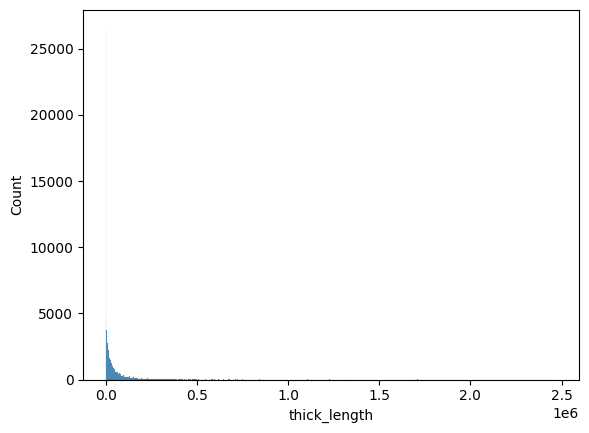

In [57]:
sns.histplot(gene_table["thick_length"])

# Analysis of epigenetic profiles mapped on retroelements

## Analysis of a sample bedGraph file

In [12]:
sample_mapping = pd.read_csv(
    "22Rv1.CTCF.chm13v2.0.sample.bedGraph", sep="\t", header=None
)
sample_mapping.columns = ["Chromosome", "Start", "End", "Signal"]
sample_mapping

Chromosome    Start      End    Signal
0           chr1      750      800  0.214125
1           chr1      800      850  1.822150
2           chr1      850      900  2.304510
3           chr1      900      950  1.979820
4           chr1      950     1000 -0.286881
...          ...      ...      ...       ...
99995       chr1  5170400  5170450 -0.251979
99996       chr1  5170450  5170500 -0.845025
99997       chr1  5170500  5170550 -0.468675
99998       chr1  5170550  5170600  0.213956
99999       chr1  5170600  5170650  0.525091

[100000 rows x 4 columns]

<Axes: xlabel='Signal', ylabel='Count'>

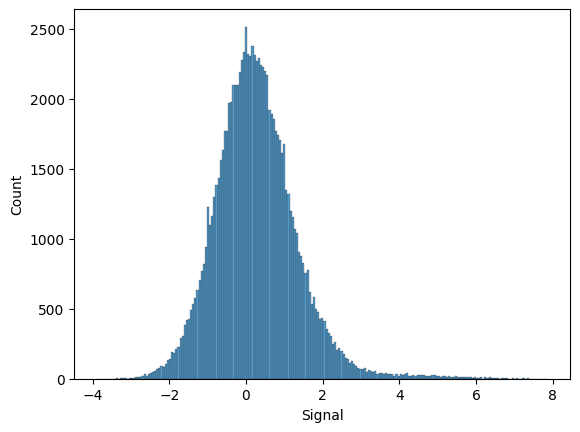

In [13]:
sns.histplot(sample_mapping.Signal)

## Analysis of sample mapping on retroelements

In [47]:
sample_enrichment = pd.read_csv(
    "./epigenomic_files/RWPE1.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph",
    sep="\t",
    header=None,
)
sample_enrichment.columns = [
    "Chromosome",
    "Start",
    "End",
    "Divergence",
    "Name",
    "Family",
    "Class",
    "Signal",
]
sample_enrichment["Signal"] = pd.to_numeric(
    sample_enrichment["Signal"], errors="coerce"
)
sample_enrichment["Divergence"] = pd.to_numeric(
    sample_enrichment["Divergence"], errors="coerce"
)

sample_enrichment

Chromosome     Start       End  Divergence      Name       Family  \
0             chr1         0      7536         223     L1MC3           L1   
1             chr1      4082      4796         273    LTR60B         ERV1   
2             chr1      4082      4837         205    LTR60B         ERV1   
3             chr1      5267      5850         147  MER34C_v         ERV1   
4             chr1      5685      6131         148     MSTA1    ERVL-MaLR   
...            ...       ...       ...         ...       ...          ...   
3709424       chrY  62443446  62449578          84      L1P1           L1   
3709425       chrY  62445666  62449071         338       L2a           L2   
3709426       chrY  62446656  62452812         204    L1MC5a           L1   
3709427       chrY  62448384  62448649         230      MIR3          MIR   
3709428       chrY  62452002  62452180         294     MER5B  hAT-Charlie   

        Class    Signal  
0        LINE -0.848371  
1         LTR  0.927262  
2         LTR  0.927262  
3         LTR -3.505368  
4         LTR -2.454698  
...       ...       ...  
3709424  LINE       NaN  
3709425  LINE       NaN  
3709426  LINE  1.786149  
3709427  SINE       NaN  
3709428   DNA       NaN  

[3709429 rows x 8 columns]

In [48]:
sample_enrichment["Signal"].mean()

-1.3790889990931086

In [13]:
sample_enrichment = pd.read_csv(
    "22Rv1.CTCF.chm13v2.0.repeats_mapped.bed", sep="\t", header=None
)
sample_enrichment.columns = [
    "Chromosome",
    "Start",
    "End",
    "Divergence",
    "Name",
    "Family",
    "Class",
    "Signal",
]
sample_enrichment["Signal"] = pd.to_numeric(
    sample_enrichment["Signal"], errors="coerce"
)
sample_enrichment["Divergence"] = pd.to_numeric(
    sample_enrichment["Divergence"], errors="coerce"
)

sample_enrichment

/tmp/ipykernel_167/2191255271.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(


Chromosome     Start       End  Divergence      Name       Family  \
0             chr1         0      7536         223     L1MC3           L1   
1             chr1      4082      4796         273    LTR60B         ERV1   
2             chr1      4082      4837         205    LTR60B         ERV1   
3             chr1      5267      5850         147  MER34C_v         ERV1   
4             chr1      5685      6131         148     MSTA1    ERVL-MaLR   
...            ...       ...       ...         ...       ...          ...   
3303650      chr17  68277913  68278255         182    MER58B  hAT-Charlie   
3303651      chr17  68278542  68278854         117    AluSx1          Alu   
3303652      chr17  68278996  68279120         163    FLAM_C          Alu   
3303653      chr17  68279432  68279961         262      MIRb          MIR   
3303654      chr17  68279626  68279939         119      AluS          NaN   

        Class    Signal  
0        LINE  0.915146  
1         LTR  2.283021  
2         LTR  2.283021  
3         LTR -0.506971  
4         LTR -0.157703  
...       ...       ...  
3303650   DNA -0.224869  
3303651  SINE -0.990039  
3303652  SINE -0.281071  
3303653  SINE -0.258490  
3303654   NaN       NaN  

[3303655 rows x 8 columns]

In [22]:
a = sample_enrichment[["Class", "Signal"]].groupby("Class").mean()["Signal"].to_dict()
a.update({"a": 1, "b": 2})
a

{'DNA': -0.12277176643212367,
 'LINE': -0.1280531134693799,
 'LTR': -0.061174624960485945,
 'RC': -0.1812589908126175,
 'Retroposon': 0.08292652602970388,
 'SINE': 0.005907916280593598,
 'a': 1,
 'b': 2}

<Axes: xlabel='Signal', ylabel='Count'>

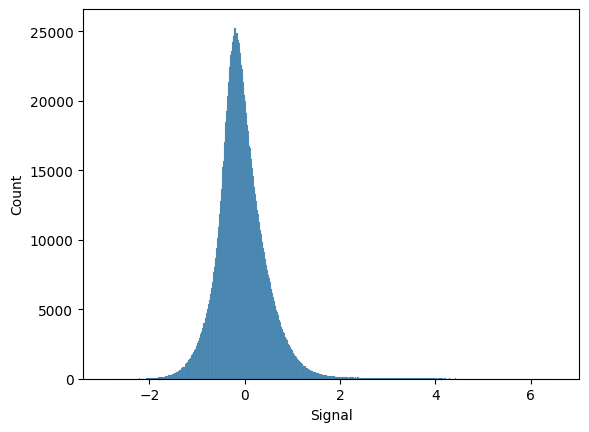

In [34]:
# non_zero_query = 'Signal != 0'
# sample_enrichment_non_zero = sample_enrichment.query(non_zero_query)

sns.histplot(sample_enrichment.Signal)

This image displays a leptokurtic (sharply peaked, heavy-tailed) and slightly right-skewed distribution. The vast majority of the "Signal" values are centered at 0, with long tails of less frequent values on both the positive and negative sides.This type of distribution is most likely derived from a Log-fold Change (logFC) calculation, a standard normalization method for epigenomic enrichment data.What the Distribution Shape MeansThe Peak at 0: This sharp, massive peak represents the genomic "background." It's the vast majority of the genome where there is no significant difference in the signal (e.g., no enrichment or depletion) compared to the control.The Right Tail (Positive Values): This tail represents regions of enrichment. These are the areas where the epigenomic mark (like a histone modification or transcription factor binding) is significantly more present than in the control sample.The Left Tail (Negative Values): This tail represents regions of depletion, where the mark is significantly less present than in the control.The Skew: The right tail extends further than the left tail, which is common for "enrichment" tracks. It indicates that the high-enrichment signals are stronger (further from 0) than the depletion signals.How This Normalization is DerivedThis "Signal" value is almost certainly a log-fold change (or a very similar log-ratio), which normalizes a "treatment" sample against a "control" sample.The calculation is typically:$$Signal = \log_{2} \left( \frac{\text{Signal in Treatment Sample}}{\text{Signal in Control Sample}} \right)$$Here's how this calculation creates the distribution you see:If Treatment = Control: (No change) The ratio is 1. $\log_{2}(1) = 0$. This creates the massive peak at 0.If Treatment > Control: (Enrichment) The ratio is > 1. $\log_{2}(>1)$ gives a positive value. This creates the right tail.If Treatment < Control: (Depletion) The ratio is < 1. $\log_{2}(<1)$ gives a negative value. This creates the left tail.This log-ratio is the most common way to represent "enrichment" data from sources like ChIP-seq or ATAC-seq because it provides a single, intuitive metric centered at zero, showing both the direction (enrichment/depletion) and magnitude of the change.Note: A related possibility is a log-likelihood ratio, which also produces positive and negative values centered around zero and is used in some signal-processing pipelines (like MACS2). However, log-fold change is the most straightforward and common interpretation.

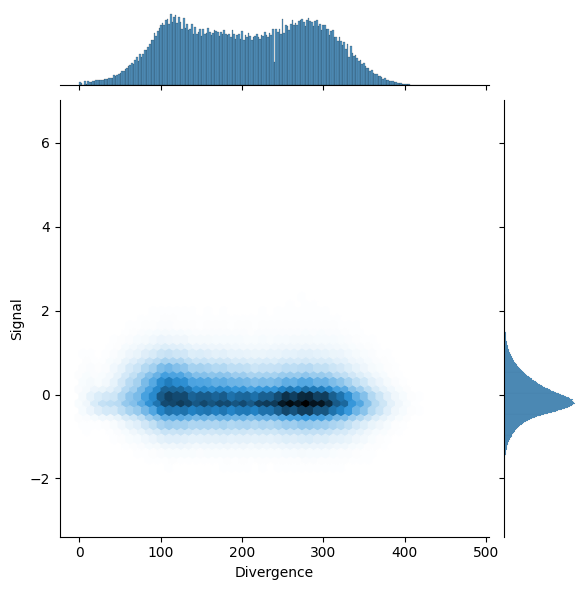

In [37]:
sns.jointplot(data=sample_enrichment, x="Divergence", y="Signal", kind="hex")

### Good plot of Signal vs Divergence correlation by classes of TE

In [10]:
sample_enrichment

Chromosome     Start       End  Divergence      Name       Family  \
0             chr1         0      7536         223     L1MC3           L1   
1             chr1      4082      4796         273    LTR60B         ERV1   
2             chr1      4082      4837         205    LTR60B         ERV1   
3             chr1      5267      5850         147  MER34C_v         ERV1   
4             chr1      5685      6131         148     MSTA1    ERVL-MaLR   
...            ...       ...       ...         ...       ...          ...   
3303650      chr17  68277913  68278255         182    MER58B  hAT-Charlie   
3303651      chr17  68278542  68278854         117    AluSx1          Alu   
3303652      chr17  68278996  68279120         163    FLAM_C          Alu   
3303653      chr17  68279432  68279961         262      MIRb          MIR   
3303654      chr17  68279626  68279939         119      AluS          NaN   

        Class    Signal  
0        LINE  0.915146  
1         LTR  2.283021  
2         LTR  2.283021  
3         LTR -0.506971  
4         LTR -0.157703  
...       ...       ...  
3303650   DNA -0.224869  
3303651  SINE -0.990039  
3303652  SINE -0.281071  
3303653  SINE -0.258490  
3303654   NaN       NaN  

[3303655 rows x 8 columns]

LINE
LTR
SINE
DNA
Retroposon
RC


/tmp/ipykernel_2243/1648285916.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  figure.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for suptitle


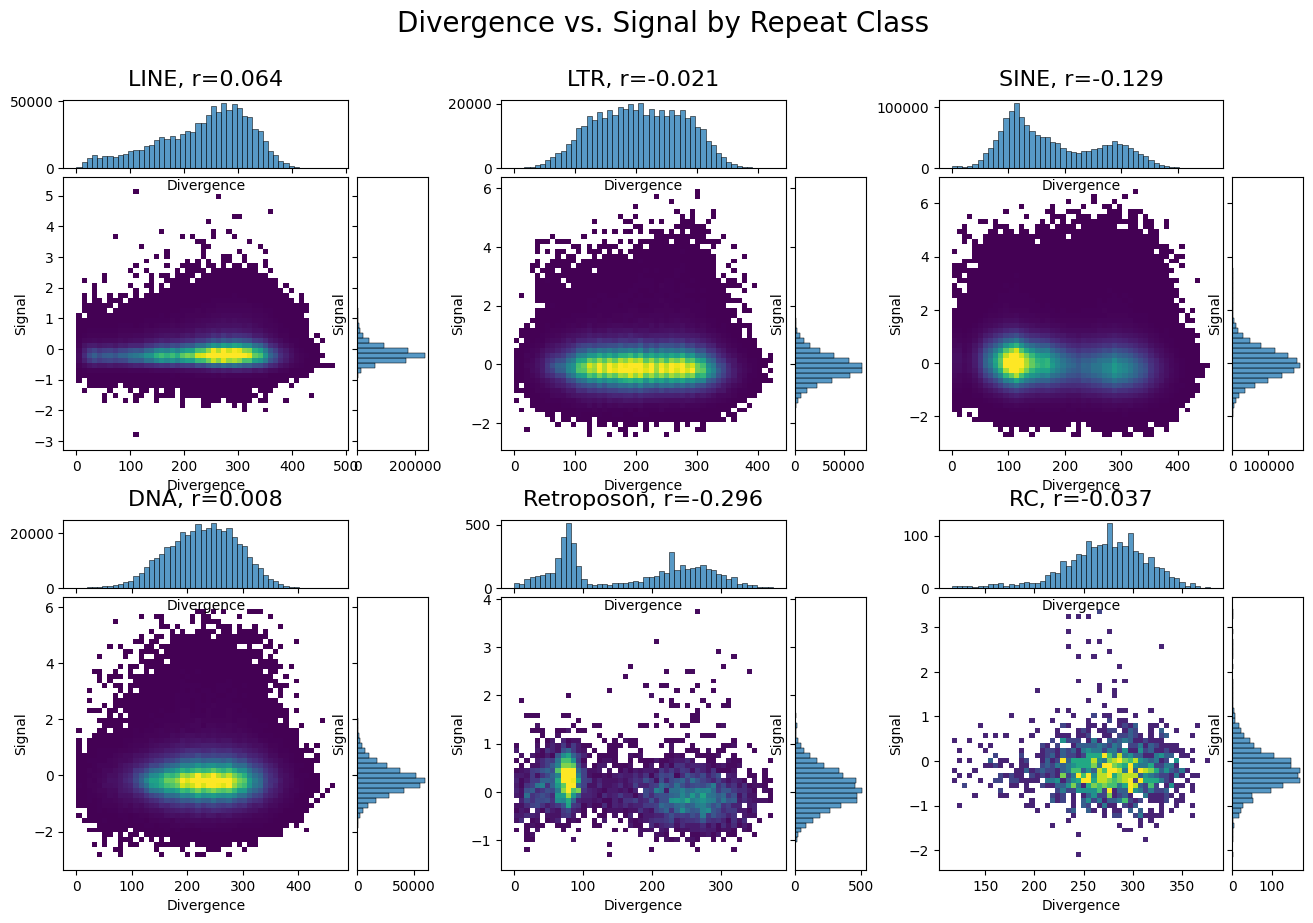

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# --- Main Plotting Logic ---
figure = plt.figure(figsize=(16, 10))
# Create the main 2x3 grid for the entire figure
outer_grid = GridSpec(2, 3, figure=figure, wspace=0.2, hspace=0.2)
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]

for i, class_name in enumerate(class_names):
    print(class_name)
    # For each cell in the outer grid, create a nested GridSpec for the jointplot
    inner_grid = GridSpecFromSubplotSpec(
        2,
        2,
        subplot_spec=outer_grid[i],
        width_ratios=[4, 1],
        height_ratios=[1, 4],
        wspace=0.05,
        hspace=0.05,
    )

    # Create the axes for the main plot and the two marginal plots
    ax_main = figure.add_subplot(inner_grid[1, 0])
    ax_hist_x = figure.add_subplot(inner_grid[0, 0], sharex=ax_main)
    ax_hist_y = figure.add_subplot(inner_grid[1, 1], sharey=ax_main)

    # Filter the data for the current class
    query_local = f'Class == "{class_name}"'
    sample_enrichment_local = sample_enrichment.query(query_local)

    # --- Plot the data on the created axes ---
    # 1. Main hexbin plot (axes-level equivalent of jointplot's kind="hex")
    sns.histplot(
        data=sample_enrichment_local,
        x="Divergence",
        y="Signal",
        bins=50,
        pmax=0.9,
        cmap="viridis",
        ax=ax_main,
    )

    # 2. Top marginal histogram for 'Divergence'
    sns.histplot(data=sample_enrichment_local, x="Divergence", ax=ax_hist_x, bins=50)

    # 3. Right marginal histogram for 'Signal'
    sns.histplot(data=sample_enrichment_local, y="Signal", ax=ax_hist_y, bins=50)

    # --- Tidy up the plot ---
    # Remove ticks and labels from the marginal plots for a cleaner look
    ax_hist_x.tick_params(axis="x", labelbottom=False)
    ax_hist_x.tick_params(axis="y", labelbottom=False)
    ax_hist_x.set_ylabel("")
    ax_hist_y.tick_params(axis="y", labelleft=False)
    ax_hist_y.tick_params(axis="x", labelleft=False)
    ax_hist_y.set_xlabel("")

    corr_coef = np.corrcoef(
        sample_enrichment_local.dropna()["Divergence"],
        sample_enrichment_local.dropna()["Signal"],
    )[0, 1]
    corr_coef = str(round(corr_coef, 3))

    # Set the title for this entire "jointplot" cell
    ax_hist_x.set_title(class_name + f", r={corr_coef}", fontsize=16, pad=10)

# Adjust layout to prevent labels from overlapping
plt.suptitle("Divergence vs. Signal by Repeat Class", fontsize=20, y=0.97)
figure.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for suptitle

# Save the final figure
# plt.savefig("plots/Divergence_vs_Signal_grid.svg")
plt.show()

Plotting: LINE (Row 0, Col 0)
Plotting: LTR (Row 0, Col 1)
Plotting: SINE (Row 0, Col 2)
Plotting: DNA (Row 1, Col 0)
Plotting: Retroposon (Row 1, Col 1)
Plotting: RC (Row 1, Col 2)


/tmp/ipykernel_143/3016580181.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  figure.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle


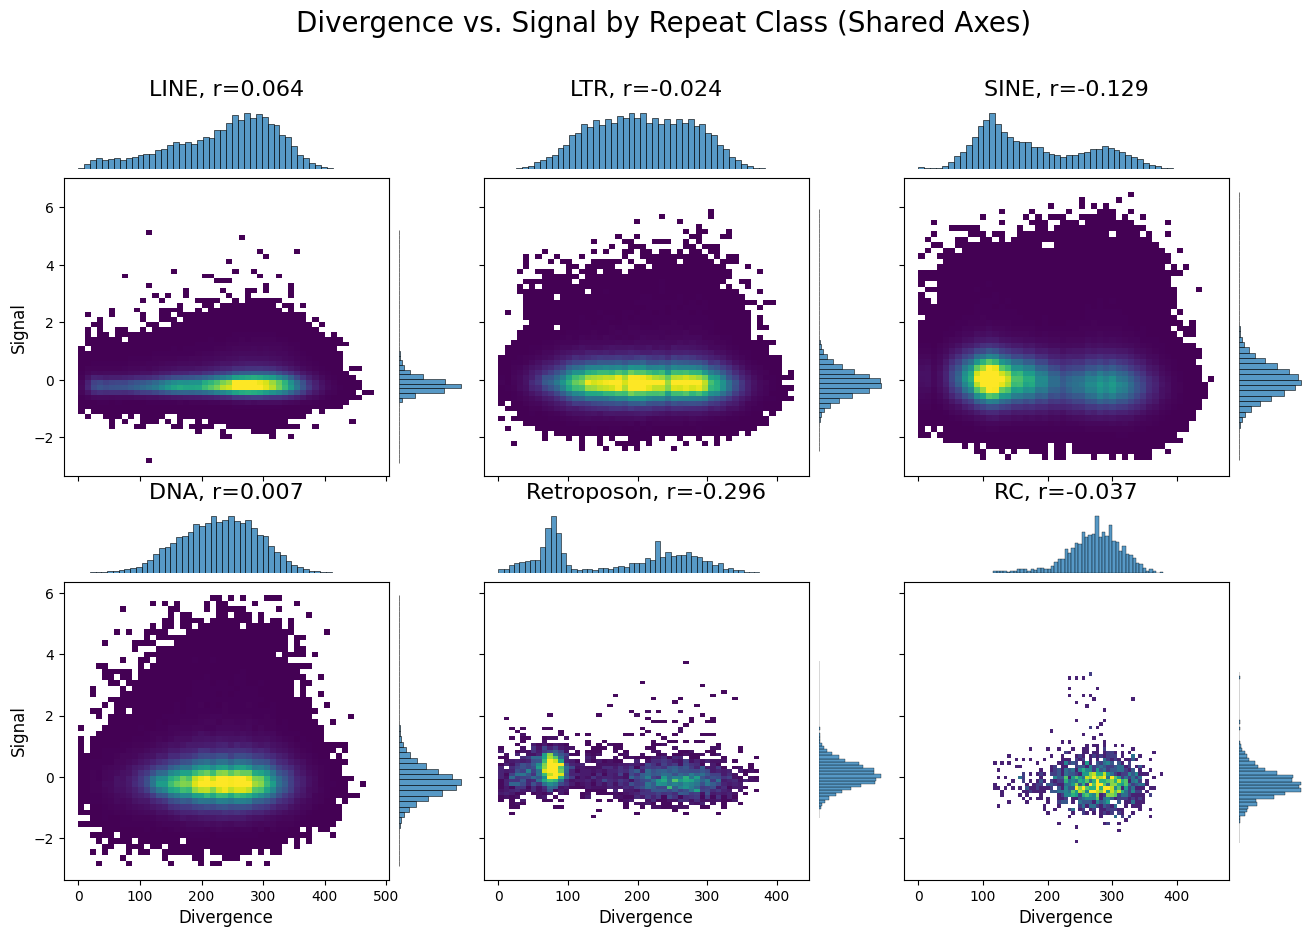

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# --- Main Plotting Logic ---
figure = plt.figure(figsize=(16, 10))
class_names_grid = np.array(class_names).reshape((2, 3))

# Create the main 2x3 grid for the entire figure
outer_grid = GridSpec(2, 3, figure=figure, wspace=0.05, hspace=0.1)

# --- Store references to the first axis in each row/column ---
shared_x_axes = [None] * 3  # One for each column
shared_y_axes = [None] * 2  # One for each row

for r in range(2):
    for c in range(3):
        class_name = class_names_grid[r, c]
        print(f"Plotting: {class_name} (Row {r}, Col {c})")

        # For each cell in the outer grid, create a nested GridSpec
        inner_grid = GridSpecFromSubplotSpec(
            2,
            2,
            subplot_spec=outer_grid[r, c],
            width_ratios=[5, 1],
            height_ratios=[1, 5],
            wspace=0.05,
            hspace=0.05,
        )

        # --- Create axes with sharing logic ---
        ax_main = figure.add_subplot(
            inner_grid[1, 0], sharex=shared_x_axes[c], sharey=shared_y_axes[r]
        )
        ax_hist_x = figure.add_subplot(inner_grid[0, 0], sharex=ax_main)
        ax_hist_y = figure.add_subplot(inner_grid[1, 1], sharey=ax_main)

        # --- Store the first axis of each row/col as reference ---
        if r == 0:
            shared_x_axes[c] = ax_main
        if c == 0:
            shared_y_axes[r] = ax_main

        # Filter the data for the current class
        query_local = f'Class == "{class_name}"'
        sample_enrichment_local = sample_enrichment.query(query_local)

        # --- Plot the data ---
        sns.histplot(
            data=sample_enrichment_local,
            x="Divergence",
            y="Signal",
            bins=48,
            pmax=0.9,
            cmap="viridis",
            ax=ax_main,
        )
        sns.histplot(
            data=sample_enrichment_local, x="Divergence", ax=ax_hist_x, bins=50
        )
        sns.histplot(data=sample_enrichment_local, y="Signal", ax=ax_hist_y, bins=50)

        # --- START: MODIFIED TIDY-UP BLOCK ---
        # Tidy up: Remove all ticks, labels, and borders from marginal plots

        # Top histogram (ax_hist_x)
        ax_hist_x.set_ylabel("")
        ax_hist_x.set_xlabel("")
        ax_hist_x.tick_params(
            axis="both", bottom=False, left=False, labelbottom=False, labelleft=False
        )
        for spine in ax_hist_x.spines.values():
            spine.set_visible(False)

        # Right histogram (ax_hist_y)
        ax_hist_y.set_xlabel("")
        ax_hist_y.set_ylabel("")
        ax_hist_y.tick_params(
            axis="both", bottom=False, left=False, labelbottom=False, labelleft=False
        )
        for spine in ax_hist_y.spines.values():
            spine.set_visible(False)
        # --- END: MODIFIED TIDY-UP BLOCK ---

        # --- Tidy up: Main plot ticks/labels (for shared axes) ---
        if c > 0:  # Not in the first column
            ax_main.tick_params(axis="y", labelleft=False)
            ax_main.set_ylabel("")
        else:
            ax_main.set_ylabel("Signal", fontsize=12)  # Only show Y label on first col

        if r < 1:  # Not in the bottom row
            ax_main.tick_params(axis="x", labelbottom=False)
            ax_main.set_xlabel("")
        else:
            ax_main.set_xlabel(
                "Divergence", fontsize=12
            )  # Only show X label on bottom row

        # Calculate correlation
        clean_data = sample_enrichment_local.dropna(subset=["Divergence", "Signal"])
        if len(clean_data) > 1:
            corr_coef = np.corrcoef(clean_data["Divergence"], clean_data["Signal"])[
                0, 1
            ]
            corr_str = f"r={corr_coef:.3f}"
        else:
            corr_str = "r=N/A"

        # Set the title for this "jointplot" cell
        ax_hist_x.set_title(f"{class_name}, {corr_str}", fontsize=16, pad=10)

# Adjust layout to prevent labels from overlapping
plt.suptitle("Divergence vs. Signal by Repeat Class (Shared Axes)", fontsize=20, y=0.98)
figure.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect to make space for suptitle

# Save the final figure
# plt.savefig("plots/Divergence_vs_Signal_grid_shared_axes.svg")
plt.show()

## Build distplots of the TE mapping by modification and cell line

INFO: Starting batch plot generation for the 39 plots...


Processing Cell Lines:   0%|          | 0/12 [00:00<?, ?it/s]
                                                             
Processing Cell Lines:   0%|          | 0/12 [00:00<?, ?it/s]
                                                             
Processing Cell Lines:   0%|          | 0/12 [00:00<?, ?it/s]
                                                             
ods for Caco-2:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/Caco-2.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/Caco-2.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/Caco-2.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                             it]
ods for Caco-2:  43%|████▎     | 3/7 [00:04<00:06,  1.65s/it]

  -> Loading data from: ./epigenomic_files/Caco-2.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                             it]
Processing Cell Lines:   0%|          | 0/12 [00:14<?, ?it/s]   
                                                             it]
Processing Cell Lines:   0%|          | 0/12 [00:14<?, ?it/s]   
                                                             it]
Processing Cell Lines:   8%|▊         | 1/12 [00:14<02:37, 14.29s/it]

  -> Loading data from: ./epigenomic_files/Caco-2.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/Caco-2.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/Caco-2.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
Processing Cell Lines:   8%|▊         | 1/12 [00:14<02:37, 14.29s/it]
                                                                     
ods for SJCRH30:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/SJCRH30.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/SJCRH30.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_167/1843603136.py:96: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(

                                                                     
ods for SJCRH30:  29%|██▊       | 2/7 [00:09<00:23,  4.64s/it]

  -> Loading data from: ./epigenomic_files/SJCRH30.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_167/1843603136.py:96: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(

                                                                     
ods for SJCRH30:  43%|████▎     | 3/7 [00:18<00:26,  6.60s/it]

  -> Loading data from: ./epigenomic_files/SJCRH30.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_167/1843603136.py:96: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(

                                                                     
ods for SJCRH30:  57%|█████▋    | 4/7 [00:27<00:22,  7.60s/it]

  -> Loading data from: ./epigenomic_files/SJCRH30.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_167/1843603136.py:96: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(

                                                                     
ods for SJCRH30:  71%|███████▏  | 5/7 [00:37<00:16,  8.21s/it]

  -> Loading data from: ./epigenomic_files/SJCRH30.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_167/1843603136.py:96: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(

                                                                     
ods for SJCRH30:  86%|████████▌ | 6/7 [00:46<00:08,  8.60s/it]

  -> Loading data from: ./epigenomic_files/SJCRH30.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_167/1843603136.py:96: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(

Processing Cell Lines:  17%|█▋        | 2/12 [01:10<06:28, 38.80s/it]
                                                                     
Processing Cell Lines:  17%|█▋        | 2/12 [01:10<06:28, 38.80s/it]
                                                                     
Processing Cell Lines:  17%|█▋        | 2/12 [01:10<06:28, 38.80s/it]
                                                                     
ods for BE2C:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/BE2C.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/BE2C.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/BE2C.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for BE2C:  43%|████▎     | 3/7 [00:09<00:12,  3.07s/it]

  -> Loading data from: ./epigenomic_files/BE2C.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for BE2C:  57%|█████▋    | 4/7 [00:18<00:15,  5.04s/it]

  -> Loading data from: ./epigenomic_files/BE2C.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for BE2C:  71%|███████▏  | 5/7 [00:27<00:12,  6.37s/it]

  -> Loading data from: ./epigenomic_files/BE2C.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
Processing Cell Lines:  25%|██▌       | 3/12 [01:47<05:41, 37.96s/it]

  -> Loading data from: ./epigenomic_files/BE2C.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
Processing Cell Lines:  25%|██▌       | 3/12 [01:47<05:41, 37.96s/it]
                                                                     
ods for SJSA1:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/SJSA1.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/SJSA1.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
Processing Cell Lines:  25%|██▌       | 3/12 [01:56<05:41, 37.96s/it]
                                                                     
ods for SJSA1:  29%|██▊       | 2/7 [00:09<00:23,  4.73s/it]

  -> Loading data from: ./epigenomic_files/SJSA1.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/SJSA1.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for SJSA1:  57%|█████▋    | 4/7 [00:18<00:14,  4.69s/it]

  -> Loading data from: ./epigenomic_files/SJSA1.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for SJSA1:  71%|███████▏  | 5/7 [00:28<00:12,  6.08s/it]

  -> Loading data from: ./epigenomic_files/SJSA1.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for SJSA1:  86%|████████▌ | 6/7 [00:37<00:07,  7.05s/it]

  -> Loading data from: ./epigenomic_files/SJSA1.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



Processing Cell Lines:  33%|███▎      | 4/12 [02:34<05:32, 41.50s/it]
                                                                     
Processing Cell Lines:  33%|███▎      | 4/12 [02:34<05:32, 41.50s/it]
                                                                     
ods for HAP-1:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/HAP-1.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/HAP-1.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for HAP-1:  29%|██▊       | 2/7 [00:09<00:23,  4.66s/it]

  -> Loading data from: ./epigenomic_files/HAP-1.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for HAP-1:  43%|████▎     | 3/7 [00:18<00:26,  6.56s/it]

  -> Loading data from: ./epigenomic_files/HAP-1.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for HAP-1:  57%|█████▋    | 4/7 [00:27<00:22,  7.64s/it]

  -> Loading data from: ./epigenomic_files/HAP-1.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for HAP-1:  71%|███████▏  | 5/7 [00:36<00:16,  8.07s/it]

  -> Loading data from: ./epigenomic_files/HAP-1.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for HAP-1:  86%|████████▌ | 6/7 [00:45<00:08,  8.30s/it]

  -> Loading data from: ./epigenomic_files/HAP-1.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



Processing Cell Lines:  42%|████▏     | 5/12 [03:28<05:23, 46.18s/it]
                                                                     
Processing Cell Lines:  42%|████▏     | 5/12 [03:28<05:23, 46.18s/it]
                                                                     
ods for HL-60:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/HL-60.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/HL-60.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
Processing Cell Lines:  42%|████▏     | 5/12 [03:37<05:23, 46.18s/it]
                                                                     
Processing Cell Lines:  42%|████▏     | 5/12 [03:37<05:23, 46.18s/it]
                                                                     
Processing Cell Lines:  42%|████▏     | 5/12 [03:37<05:23, 46.18s/it]
                                                                     
Processing Cell Lines:  42%|████▏     | 5/12 [03:37<05:23, 46.18s/it]
                                                                     
Processing Cell Lines:  50%|█████     | 6/12 [03:37<03:20, 33.49s/it]

  -> Loading data from: ./epigenomic_files/HL-60.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/HL-60.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/HL-60.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/HL-60.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/HL-60.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
Processing Cell Lines:  50%|█████     | 6/12 [03:37<03:20, 33.49s/it]
                                                                     
Processing Cell Lines:  50%|█████     | 6/12 [03:37<03:20, 33.49s/it]
                                                                     
Processing Cell Lines:  50%|█████     | 6/12 [03:37<03:20, 33.49s/it]
                                                                     
ods for MG63:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/MG63.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/MG63.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/MG63.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/MG63.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_167/1843603136.py:96: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(

                                                                     
ods for MG63:  57%|█████▋    | 4/7 [00:08<00:06,  2.21s/it]

  -> Loading data from: ./epigenomic_files/MG63.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for MG63:  71%|███████▏  | 5/7 [00:17<00:07,  3.97s/it]

  -> Loading data from: ./epigenomic_files/MG63.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for MG63:  86%|████████▌ | 6/7 [00:26<00:05,  5.33s/it]

  -> Loading data from: ./epigenomic_files/MG63.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



Processing Cell Lines:  58%|█████▊    | 7/12 [04:13<02:51, 34.26s/it]
                                                                     
ods for VCaP:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/VCaP.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for VCaP:  14%|█▍        | 1/7 [00:09<00:55,  9.17s/it]

  -> Loading data from: ./epigenomic_files/VCaP.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_167/1843603136.py:96: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(

                                                                     
Processing Cell Lines:  58%|█████▊    | 7/12 [04:31<02:51, 34.26s/it]
                                                                     
Processing Cell Lines:  58%|█████▊    | 7/12 [04:31<02:51, 34.26s/it]
                                                                     
Processing Cell Lines:  58%|█████▊    | 7/12 [04:31<02:51, 34.26s/it]
                                                                     
Processing Cell Lines:  58%|█████▊    | 7/12 [04:31<02:51, 34.26s/it]
                                                                     
Processing Cell Lines:  67%|██████▋   | 8/12 [04:31<01:56, 29.20s/it]

  -> Loading data from: ./epigenomic_files/VCaP.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/VCaP.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/VCaP.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/VCaP.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/VCaP.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for C4-2B:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/C4-2B.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for C4-2B:  14%|█▍        | 1/7 [00:09<00:54,  9.16s/it]

  -> Loading data from: ./epigenomic_files/C4-2B.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
Processing Cell Lines:  67%|██████▋   | 8/12 [04:49<01:56, 29.20s/it]
                                                                     
Processing Cell Lines:  67%|██████▋   | 8/12 [04:49<01:56, 29.20s/it]
                                                                     
Processing Cell Lines:  67%|██████▋   | 8/12 [04:49<01:56, 29.20s/it]
                                                                     
Processing Cell Lines:  67%|██████▋   | 8/12 [04:49<01:56, 29.20s/it]
                                                                     
Processing Cell Lines:  75%|███████▌  | 9/12 [04:49<01:17, 25.79s/it]

  -> Loading data from: ./epigenomic_files/C4-2B.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/C4-2B.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/C4-2B.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/C4-2B.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/C4-2B.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for RWPE2:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/RWPE2.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
ods for RWPE2:  14%|█▍        | 1/7 [00:09<00:55,  9.21s/it]

  -> Loading data from: ./epigenomic_files/RWPE2.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
Processing Cell Lines:  75%|███████▌  | 9/12 [05:08<01:17, 25.79s/it]
                                                                     
Processing Cell Lines:  75%|███████▌  | 9/12 [05:08<01:17, 25.79s/it]
                                                                     
ods for RWPE2:  29%|██▊       | 2/7 [00:18<00:46,  9.20s/it]

  -> Loading data from: ./epigenomic_files/RWPE2.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/RWPE2.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/RWPE2.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                     
Processing Cell Lines:  75%|███████▌  | 9/12 [05:17<01:17, 25.79s/it]
                                                                     
Processing Cell Lines:  83%|████████▎ | 10/12 [05:17<00:52, 26.41s/it]

  -> Loading data from: ./epigenomic_files/RWPE2.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/RWPE2.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                      
ods for 22Rv1:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/22Rv1.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                      
ods for 22Rv1:  14%|█▍        | 1/7 [00:09<00:56,  9.37s/it]

  -> Loading data from: ./epigenomic_files/22Rv1.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                      
Processing Cell Lines:  83%|████████▎ | 10/12 [05:36<00:52, 26.41s/it]
                                                                      
Processing Cell Lines:  83%|████████▎ | 10/12 [05:36<00:52, 26.41s/it]
                                                                      
Processing Cell Lines:  83%|████████▎ | 10/12 [05:36<00:52, 26.41s/it]
                                                                      
Processing Cell Lines:  83%|████████▎ | 10/12 [05:36<00:52, 26.41s/it]
                                                                      
Processing Cell Lines:  92%|█████████▏| 11/12 [05:36<00:24, 24.07s/it]

  -> Loading data from: ./epigenomic_files/22Rv1.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/22Rv1.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/22Rv1.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/22Rv1.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/22Rv1.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                      
ods for RWPE1:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/RWPE1.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_167/1843603136.py:96: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(

                                                                      
ods for RWPE1:  14%|█▍        | 1/7 [00:09<00:55,  9.28s/it]

  -> Loading data from: ./epigenomic_files/RWPE1.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph



                                                                      
Processing Cell Lines:  92%|█████████▏| 11/12 [05:50<00:24, 24.07s/it]
                                                                      
Processing Cell Lines:  92%|█████████▏| 11/12 [05:50<00:24, 24.07s/it]
                                                                      
Processing Cell Lines:  92%|█████████▏| 11/12 [05:50<00:24, 24.07s/it]
                                                                      
Processing Cell Lines:  92%|█████████▏| 11/12 [05:50<00:24, 24.07s/it]
                                                                      
Processing Cell Lines: 100%|██████████| 12/12 [05:50<00:00, 29.20s/it]


  -> Loading data from: ./epigenomic_files/RWPE1.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/RWPE1.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/RWPE1.H3K36me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/RWPE1.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/RWPE1.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
SUCCESS: All plots saved.


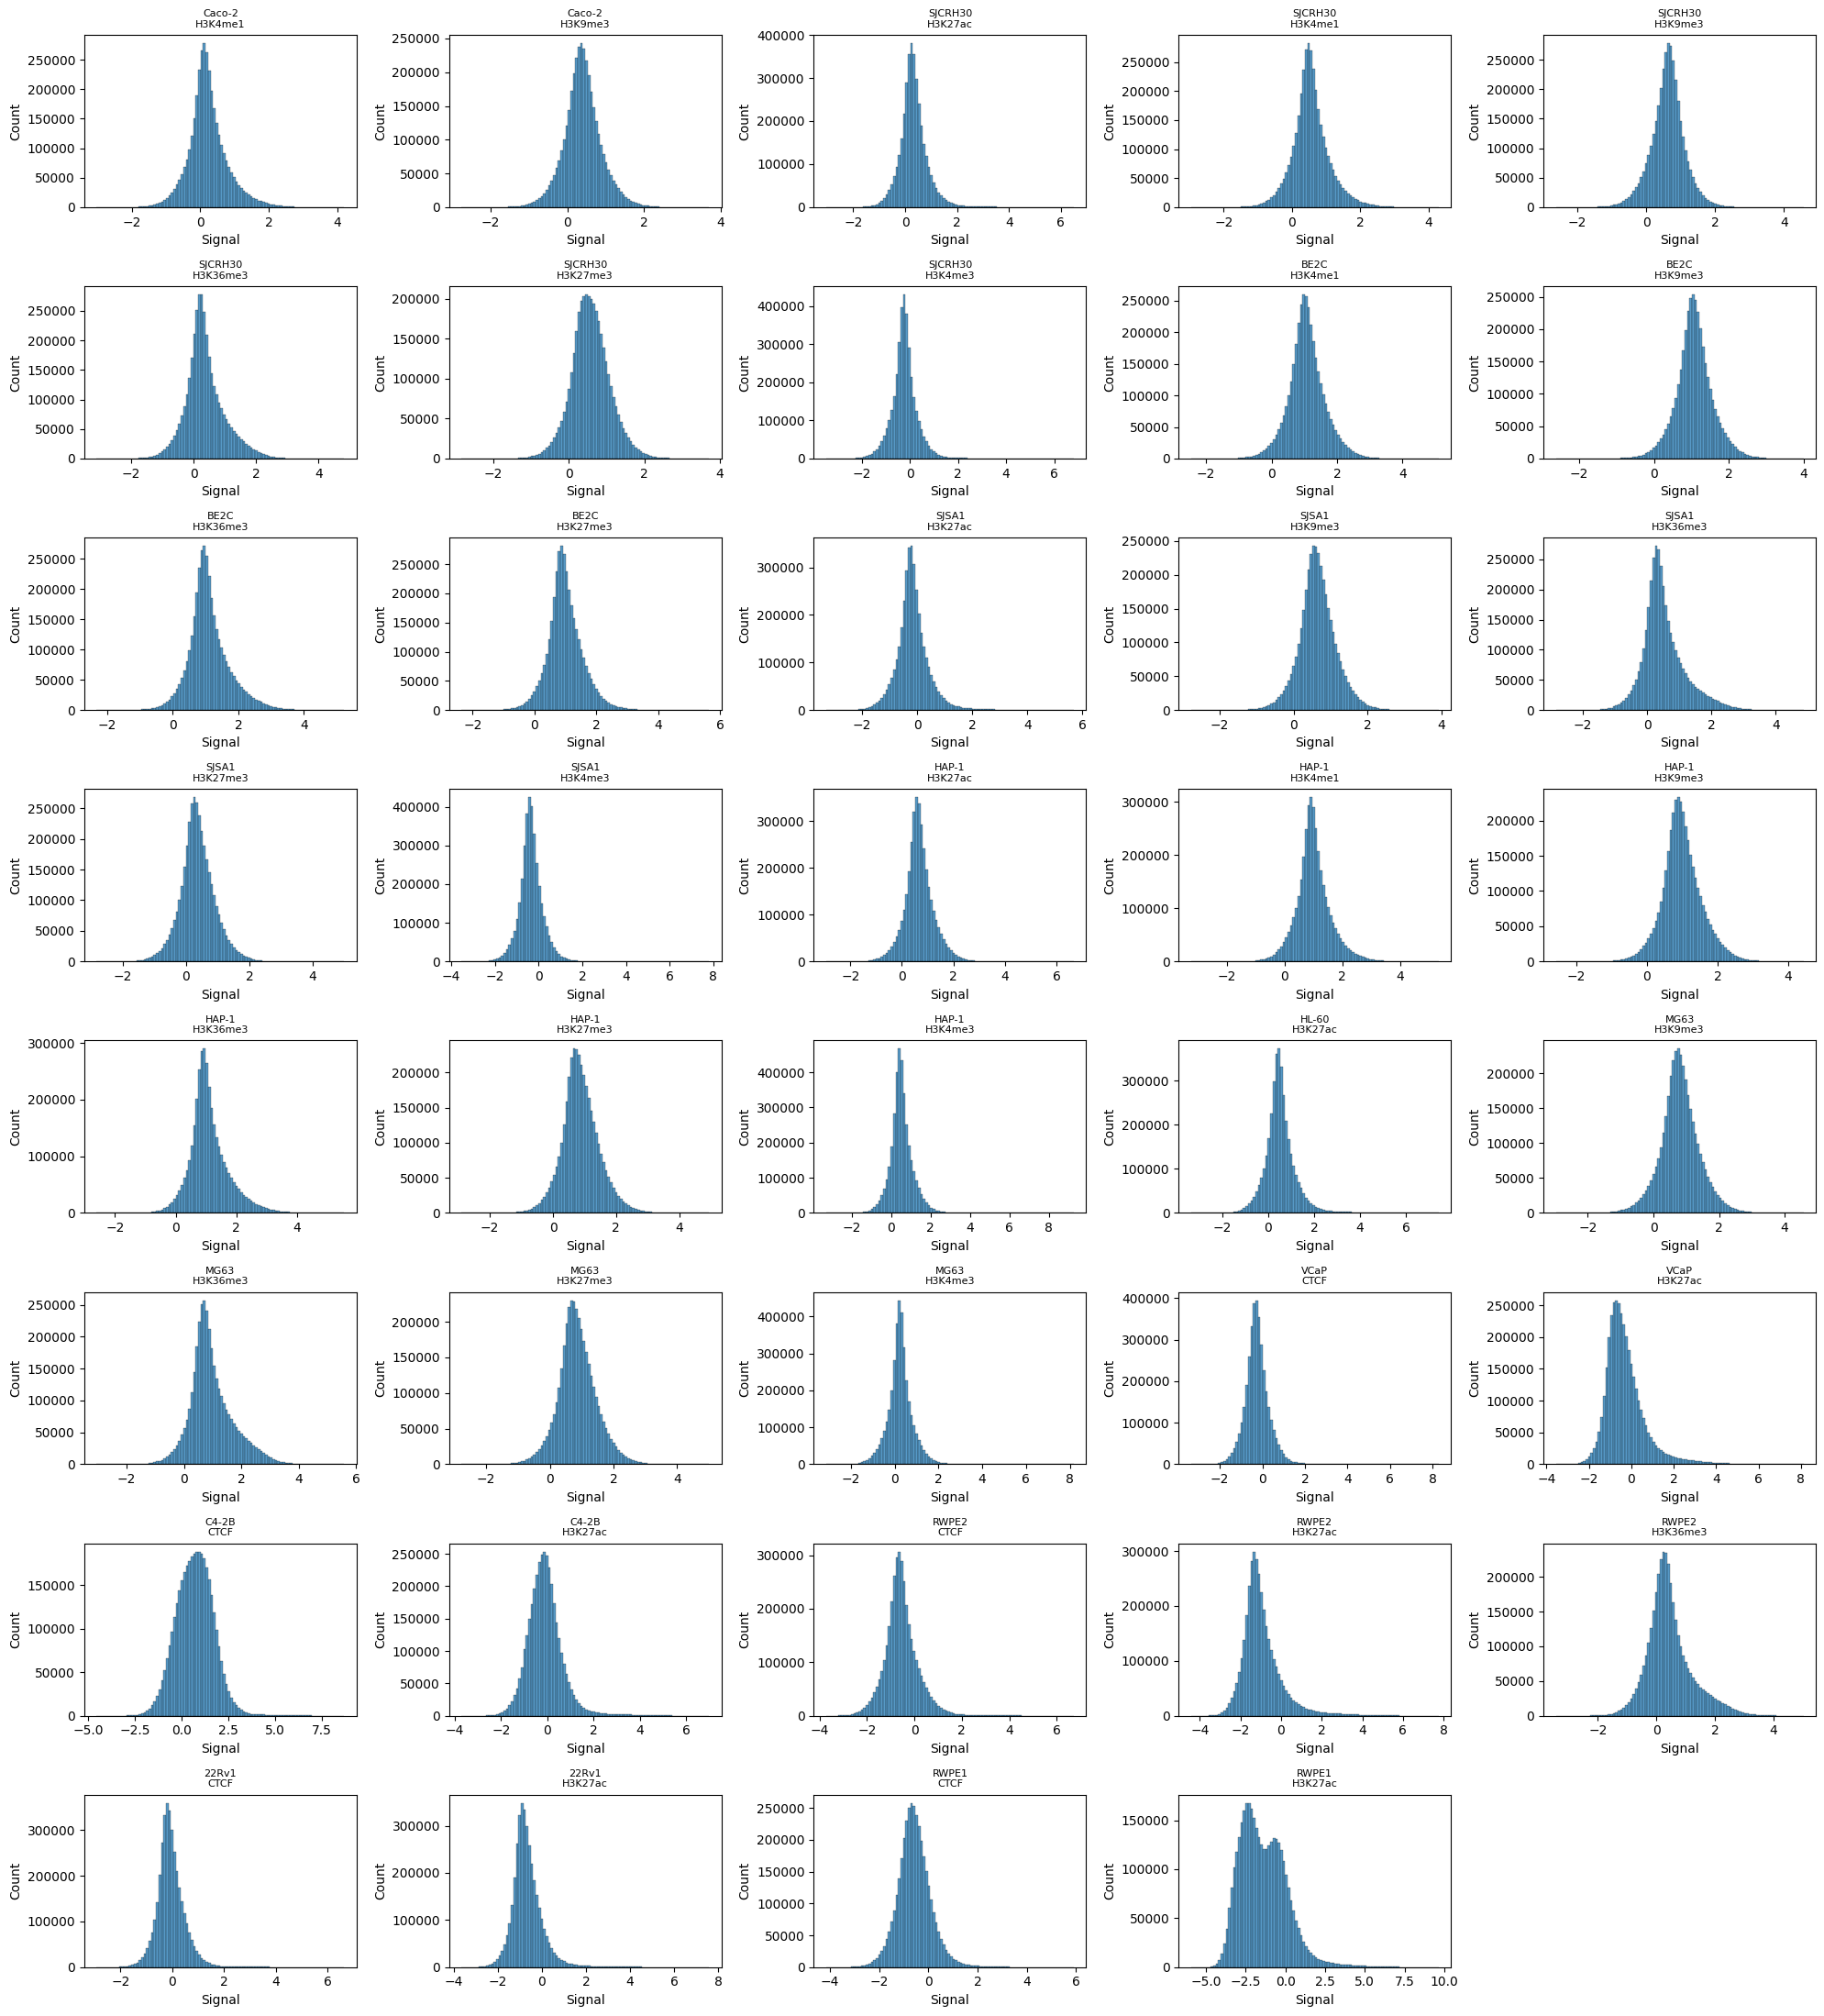

In [58]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm  # For progress bars

# Removed unused imports: GridSpec, GridSpecFromSubplotSpec

plt.rcParams["svg.fonttype"] = "none"


# --- Helper Class for Colored Logging ---
class Logger:
    """A simple logger for pretty, colored console output."""

    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    ENDC = "\033[0m"

    @staticmethod
    def info(message):
        print(f"{Logger.BLUE}INFO: {message}{Logger.ENDC}")

    @staticmethod
    def success(message):
        print(f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}")

    @staticmethod
    def warning(message):
        print(f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}")

    @staticmethod
    def step(message):
        # Use tqdm.write() to print from within a loop
        tqdm.write(f"  -> {message}")


cell_lines = [
    "Caco-2",
    "SJCRH30",
    "BE2C",
    "SJSA1",
    "HAP-1",
    "HL-60",
    "MG63",
    "VCaP",
    "C4-2B",
    "RWPE2",
    "22Rv1",
    "RWPE1",
]
modifications = [
    "CTCF",
    "H3K27ac",
    "H3K4me1",
    "H3K9me3",
    "H3K36me3",
    "H3K27me3",
    "H3K4me3",
    # "H3K27ac",
]
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]


figure, axs = plt.subplots(
    nrows=8,
    ncols=5,
    sharex=False,
    sharey=False,
    squeeze=True,
    figsize=(20, 24),  # Adjusted figsize for the larger grid
)

# --- CORRECTED: Create an iterator from the flattened axes list ---
axes_iter = iter(axs.flatten())

# --- Main Script ---
Logger.info(f"Starting batch plot generation for the 39 plots...")
correlation_df_list = []
# Use tqdm for the outer loop progress bar
for cell_line in tqdm(cell_lines, desc="Processing Cell Lines"):

    # Use a nested tqdm for the inner loop
    for modification in tqdm(
        modifications, desc=f"  Mods for {cell_line}", leave=False
    ):

        filepath = f"./epigenomic_files/{cell_line}.{modification}.chm13v2.0.mapped_on_repeat_masker.bedGraph"
        # --- Data Loading ---
        # Use Logger.step (which uses tqdm.write) for in-loop logging
        Logger.step(f"Loading data from: {filepath}")
        try:
            sample_enrichment = pd.read_csv(
                filepath,
                sep="\t",
                header=None,
            )
            # Logger.success("File loaded successfully.") # Too noisy for a loop
        except FileNotFoundError:
            Logger.warning(f"File not found, skipping: {filepath}")
            continue  # Skip to the next modification
        except Exception as e:
            Logger.warning(
                f"An unexpected error occurred while reading {filepath}: {e}"
            )
            continue

        sample_enrichment.columns = [
            "Chromosome",
            "Start",
            "End",
            "Divergence",
            "Name",
            "Family",
            "Class",
            "Signal",
        ]
        sample_enrichment["Signal"] = pd.to_numeric(
            sample_enrichment["Signal"], errors="coerce"
        )

        # --- CORRECTED: Indentation and Iterator ---
        # Get the next available axis
        try:
            ax = next(axes_iter)
        except StopIteration:
            # This should not happen if grid is sized correctly, but it's safe
            Logger.warning("Ran out of axes, stopping early.")
            break

        # Use sns.histplot (axes-level)
        sns.histplot(sample_enrichment["Signal"].dropna(), ax=ax, bins=100)

        # --- CORRECTED: Use the correct variables for the title ---
        ax.set_title(f"{cell_line}\n{modification}", fontsize=8)

# Clean up any remaining empty axes at the end
# This loop will turn off axes that were never used
while True:
    try:
        ax = next(axes_iter)
        ax.axis("off")
    except StopIteration:
        break

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("plots/Signal_distribution_all_samples.svg")
Logger.success("All plots saved.")
plt.show()

## Build good plots for all marks and cell lines and record pearson correlation coefficient

In [18]:
cell_lines = [
    "Caco-2",
    "SJCRH30",
    "BE2C",
    "SJSA1",
    "HAP-1",
    "HL-60",
    "MG63",
    "VCaP",
    "C4-2B",
    "RWPE2",
    "22Rv1",
    "RWPE1",
]
modifications = [
    "CTCF",
    "H3K4me1",
    "H3K9me3",
    "H3K36me3",
    "H3K27me3",
    "H3K4me3",
    "H3K27ac",
]
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from tqdm import tqdm  # For progress bars

plt.rcParams["svg.fonttype"] = "none"


# --- Helper Class for Colored Logging ---
class Logger:
    """A simple logger for pretty, colored console output."""

    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    ENDC = "\033[0m"

    @staticmethod
    def info(message):
        print(f"{Logger.BLUE}INFO: {message}{Logger.ENDC}")

    @staticmethod
    def success(message):
        print(f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}")

    @staticmethod
    def warning(message):
        print(f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}")

    @staticmethod
    def step(message):
        print(f"  -> {message}")


cell_lines = [
    "Caco-2",
    "SJCRH30",
    "BE2C",
    "SJSA1",
    "HAP-1",
    "HL-60",
    "MG63",
    "VCaP",
    "C4-2B",
    "RWPE2",
    "22Rv1",
    "RWPE1",
]
modifications = [
    "CTCF",
    "H3K27ac",
    "H3K4me1",
    "H3K9me3",
    "H3K36me3",
    "H3K27me3",
    "H3K4me3",
    #    "H3K27ac",
]
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]

# --- Main Script ---
Logger.info("Starting batch plot generation...")
correlation_df_list = []
# Use tqdm for the outer loop progress bar
for cell_line in tqdm(cell_lines, desc="Processing Cell Lines"):

    # Use a nested tqdm for the inner loop
    for modification in tqdm(
        modifications, desc=f"  Mods for {cell_line}", leave=False
    ):

        filepath = f"./epigenomic_files/{cell_line}.{modification}.chm13v2.0.mapped_on_repeat_masker.bedGraph"
        save_path_png = f"plots/Epigenetic_signal_vs_divergence_by_class/Divergence_vs_Signal_by_classes_{cell_line}_{modification}_tidy.png"
        save_path_svg = f"plots/Epigenetic_signal_vs_divergence_by_class/Divergence_vs_Signal_by_classes_{cell_line}_{modification}_tidy.svg"
        # --- Data Loading ---
        Logger.step(f"Loading data from: {filepath}")
        try:
            sample_enrichment = pd.read_csv(
                filepath,
                sep="\t",
                header=None,
            )
            Logger.success("File loaded successfully.")
        except FileNotFoundError:
            Logger.warning(f"File not found, skipping: {filepath}")
            continue  # Skip to the next modification
        except Exception as e:
            Logger.warning(
                f"An unexpected error occurred while reading {filepath}: {e}"
            )
            continue

        sample_enrichment.columns = [
            "Chromosome",
            "Start",
            "End",
            "Divergence",
            "Name",
            "Family",
            "Class",
            "Signal",
        ]
        sample_enrichment["Signal"] = pd.to_numeric(
            sample_enrichment["Signal"], errors="coerce"
        )
        sample_enrichment["Divergence"] = pd.to_numeric(
            sample_enrichment["Divergence"], errors="coerce"
        )

        # --- Main Plotting Logic ---
        Logger.step("Generating jointplot grid...")
        correlations = {"cell_line": cell_line, "modification": modification}
        figure = plt.figure(figsize=(16, 10))
        class_names_grid = np.array(class_names).reshape((2, 3))

        # Create the main 2x3 grid for the entire figure
        outer_grid = GridSpec(2, 3, figure=figure, wspace=0.1, hspace=0.1)

        # --- Store references to the first axis in each row/column ---
        shared_x_axes = [None] * 3  # One for each column
        shared_y_axes = [None] * 2  # One for each row

        for r in range(2):
            for c in range(3):
                class_name = class_names_grid[r, c]
                tqdm.write(f"Plotting: {class_name} (Row {r}, Col {c})")

                # For each cell in the outer grid, create a nested GridSpec
                inner_grid = GridSpecFromSubplotSpec(
                    2,
                    2,
                    subplot_spec=outer_grid[r, c],
                    width_ratios=[5, 1],
                    height_ratios=[1, 5],
                    wspace=0.05,
                    hspace=0.05,
                )

                # --- Create axes with sharing logic ---
                ax_main = figure.add_subplot(
                    inner_grid[1, 0], sharex=shared_x_axes[c], sharey=shared_y_axes[r]
                )
                ax_hist_x = figure.add_subplot(inner_grid[0, 0], sharex=ax_main)
                ax_hist_y = figure.add_subplot(inner_grid[1, 1], sharey=ax_main)

                # --- Store the first axis of each row/col as reference ---
                if r == 0:
                    shared_x_axes[c] = ax_main
                if c == 0:
                    shared_y_axes[r] = ax_main

                # Filter the data for the current class
                query_local = f'Class == "{class_name}"'
                sample_enrichment_local = sample_enrichment.query(query_local)

                # --- Plot the data ---
                sns.histplot(
                    data=sample_enrichment_local,
                    x="Divergence",
                    y="Signal",
                    bins=48,
                    pmax=0.9,
                    cmap="viridis",
                    ax=ax_main,
                )
                sns.histplot(
                    data=sample_enrichment_local, x="Divergence", ax=ax_hist_x, bins=50
                )
                sns.histplot(
                    data=sample_enrichment_local, y="Signal", ax=ax_hist_y, bins=50
                )

                # --- START: MODIFIED TIDY-UP BLOCK ---
                # Tidy up: Remove all ticks, labels, and borders from marginal plots

                # Top histogram (ax_hist_x)
                ax_hist_x.set_ylabel("")
                ax_hist_x.set_xlabel("")
                ax_hist_x.tick_params(
                    axis="both",
                    bottom=False,
                    left=False,
                    labelbottom=False,
                    labelleft=False,
                )
                for spine in ax_hist_x.spines.values():
                    spine.set_visible(False)

                # Right histogram (ax_hist_y)
                ax_hist_y.set_xlabel("")
                ax_hist_y.set_ylabel("")
                ax_hist_y.tick_params(
                    axis="both",
                    bottom=False,
                    left=False,
                    labelbottom=False,
                    labelleft=False,
                )
                for spine in ax_hist_y.spines.values():
                    spine.set_visible(False)
                # --- END: MODIFIED TIDY-UP BLOCK ---

                # --- Tidy up: Main plot ticks/labels (for shared axes) ---
                if c > 0:  # Not in the first column
                    ax_main.tick_params(axis="y", labelleft=False)
                    ax_main.set_ylabel("")
                else:
                    ax_main.set_ylabel(
                        "Signal", fontsize=12
                    )  # Only show Y label on first col

                if r < 1:  # Not in the bottom row
                    ax_main.tick_params(axis="x", labelbottom=False)
                    ax_main.set_xlabel("")
                else:
                    ax_main.set_xlabel(
                        "Divergence", fontsize=12
                    )  # Only show X label on bottom row

                # Calculate correlation
                clean_data = sample_enrichment_local.dropna(
                    subset=["Divergence", "Signal"]
                )
                if len(clean_data) > 1:
                    corr_coef = np.corrcoef(
                        clean_data["Divergence"], clean_data["Signal"]
                    )[0, 1]
                    corr_str = f"r={corr_coef:.3f}"
                else:
                    corr_str = "r=N/A"

                # Set the title for this "jointplot" cell
                ax_hist_x.set_title(f"{class_name}, {corr_str}", fontsize=16, pad=10)
                correlations.update({class_name: corr_coef})

        correlation_df_list.append(pd.Series(correlations))

        # Final figure adjustments
        figure.suptitle(
            f"Divergence vs. Signal for {cell_line} - {modification}",
            fontsize=20,
            y=0.98,
        )
        figure.tight_layout(rect=[0, 0.03, 1, 0.95])

        # Save the final figure
        Logger.step(f"Saving plot to: {save_path_png}")
        # Ensure the directory exists
        os.makedirs(os.path.dirname(save_path_png), exist_ok=True)
        plt.savefig(save_path_png)
        plt.savefig(save_path_svg)
        plt.close(figure)  # IMPORTANT: Close the figure to free up memory
        Logger.success("Plot saved.")
# correlation_df = pd.concat(correlation_df_list)
# correlation_df.to_csv('Signal_vs_divergence_correlation_by_lines_mods_classes.csv')
Logger.info("All processing complete!")

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from tqdm import tqdm  # For progress bars


# --- Helper Class for Colored Logging ---
class Logger:
    """A simple logger for pretty, colored console output."""

    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    ENDC = "\033[0m"

    @staticmethod
    def info(message):
        print(f"{Logger.BLUE}INFO: {message}{Logger.ENDC}")

    @staticmethod
    def success(message):
        print(f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}")

    @staticmethod
    def warning(message):
        print(f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}")

    @staticmethod
    def step(message):
        print(f"  -> {message}")


cell_lines = [
    "Caco-2",
    "SJCRH30",
    "BE2C",
    "SJSA1",
    "HAP-1",
    "HL-60",
    "MG63",
    "VCaP",
    "C4-2B",
    "RWPE2",
    "22Rv1",
    "RWPE1",
]
modifications = [
    "CTCF",
    "H3K4me1",
    "H3K9me3",
    "H3K36me3",
    "H3K27me3",
    "H3K4me3",
    "H3K27ac",
]
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]

# --- Main Script ---
Logger.info("Starting batch plot generation...")
correlation_df_list = []
# Use tqdm for the outer loop progress bar
for cell_line in tqdm(cell_lines, desc="Processing Cell Lines"):

    # Use a nested tqdm for the inner loop
    for modification in tqdm(
        modifications, desc=f"  Mods for {cell_line}", leave=False
    ):

        filepath = f"./epigenomic_files/{cell_line}.{modification}.chm13v2.0.mapped_on_repeat_masker.bedGraph"
        save_path_png = f"plots/Epigenetic_signal_vs_divergence_by_class/Divergence_vs_Signal_by_classes_{cell_line}_{modification}.png"
        save_path_svg = f"plots/Epigenetic_signal_vs_divergence_by_class/Divergence_vs_Signal_by_classes_{cell_line}_{modification}.svg"
        # --- Data Loading ---
        Logger.step(f"Loading data from: {filepath}")
        try:
            sample_enrichment = pd.read_csv(
                filepath,
                sep="\t",
                header=None,
            )
            Logger.success("File loaded successfully.")
        except FileNotFoundError:
            Logger.warning(f"File not found, skipping: {filepath}")
            continue  # Skip to the next modification
        except Exception as e:
            Logger.warning(
                f"An unexpected error occurred while reading {filepath}: {e}"
            )
            continue

        sample_enrichment.columns = [
            "Chromosome",
            "Start",
            "End",
            "Divergence",
            "Name",
            "Family",
            "Class",
            "Signal",
        ]
        sample_enrichment["Signal"] = pd.to_numeric(
            sample_enrichment["Signal"], errors="coerce"
        )
        sample_enrichment["Divergence"] = pd.to_numeric(
            sample_enrichment["Divergence"], errors="coerce"
        )

        # --- Main Plotting Logic ---
        Logger.step("Generating jointplot grid...")
        # --- Main Plotting Logic ---
        figure = plt.figure(figsize=(16, 10))
        class_names_grid = np.array(class_names).reshape((2, 3))

        # Create the main 2x3 grid for the entire figure
        outer_grid = GridSpec(2, 3, figure=figure, wspace=0.1, hspace=0.1)

        # --- Store references to the first axis in each row/column ---
        shared_x_axes = [None] * 3  # One for each column
        shared_y_axes = [None] * 2  # One for each row

        for r in range(2):
            for c in range(3):
                class_name = class_names_grid[r, c]
                print(f"Plotting: {class_name} (Row {r}, Col {c})")

                # For each cell in the outer grid, create a nested GridSpec
                inner_grid = GridSpecFromSubplotSpec(
                    2,
                    2,
                    subplot_spec=outer_grid[r, c],
                    width_ratios=[5, 1],
                    height_ratios=[1, 5],
                    wspace=0.05,
                    hspace=0.05,
                )

                # --- Create axes with sharing logic ---
                ax_main = figure.add_subplot(
                    inner_grid[1, 0], sharex=shared_x_axes[c], sharey=shared_y_axes[r]
                )
                ax_hist_x = figure.add_subplot(inner_grid[0, 0], sharex=ax_main)
                ax_hist_y = figure.add_subplot(inner_grid[1, 1], sharey=ax_main)

                # --- Store the first axis of each row/col as reference ---
                if r == 0:
                    shared_x_axes[c] = ax_main
                if c == 0:
                    shared_y_axes[r] = ax_main

                # Filter the data for the current class
                query_local = f'Class == "{class_name}"'
                sample_enrichment_local = sample_enrichment.query(query_local)

                # --- Plot the data ---
                sns.histplot(
                    data=sample_enrichment_local,
                    x="Divergence",
                    y="Signal",
                    bins=48,
                    pmax=0.9,
                    cmap="viridis",
                    ax=ax_main,
                )
                sns.histplot(
                    data=sample_enrichment_local, x="Divergence", ax=ax_hist_x, bins=50
                )
                sns.histplot(
                    data=sample_enrichment_local, y="Signal", ax=ax_hist_y, bins=50
                )

                # --- START: MODIFIED TIDY-UP BLOCK ---
                # Tidy up: Remove all ticks, labels, and borders from marginal plots

                # Top histogram (ax_hist_x)
                ax_hist_x.set_ylabel("")
                ax_hist_x.set_xlabel("")
                ax_hist_x.tick_params(
                    axis="both",
                    bottom=False,
                    left=False,
                    labelbottom=False,
                    labelleft=False,
                )
                for spine in ax_hist_x.spines.values():
                    spine.set_visible(False)

                # Right histogram (ax_hist_y)
                ax_hist_y.set_xlabel("")
                ax_hist_y.set_ylabel("")
                ax_hist_y.tick_params(
                    axis="both",
                    bottom=False,
                    left=False,
                    labelbottom=False,
                    labelleft=False,
                )
                for spine in ax_hist_y.spines.values():
                    spine.set_visible(False)
                # --- END: MODIFIED TIDY-UP BLOCK ---

                # --- Tidy up: Main plot ticks/labels (for shared axes) ---
                if c > 0:  # Not in the first column
                    ax_main.tick_params(axis="y", labelleft=False)
                    ax_main.set_ylabel("")
                else:
                    ax_main.set_ylabel(
                        "Signal", fontsize=12
                    )  # Only show Y label on first col

                if r < 1:  # Not in the bottom row
                    ax_main.tick_params(axis="x", labelbottom=False)
                    ax_main.set_xlabel("")
                else:
                    ax_main.set_xlabel(
                        "Divergence", fontsize=12
                    )  # Only show X label on bottom row

                # Calculate correlation
                clean_data = sample_enrichment_local.dropna(
                    subset=["Divergence", "Signal"]
                )
                if len(clean_data) > 1:
                    corr_coef = np.corrcoef(
                        clean_data["Divergence"], clean_data["Signal"]
                    )[0, 1]
                    corr_str = f"r={corr_coef:.3f}"
                else:
                    corr_str = "r=N/A"

                # Set the title for this "jointplot" cell
                ax_hist_x.set_title(f"{class_name}, {corr_str}", fontsize=16, pad=10)

        # Adjust layout to prevent labels from overlapping
        plt.suptitle(
            "Divergence vs. Signal by Repeat Class (Shared Axes)", fontsize=20, y=0.98
        )
        figure.tight_layout(
            rect=[0, 0.03, 1, 0.95]
        )  # Adjust rect to make space for suptitle

        # Save the final figure
        Logger.step(f"Saving plot to: {save_path}")
        # Ensure the directory exists
        os.makedirs(os.path.dirname(save_path_png), exist_ok=True)
        plt.savefig(save_path_png)
        plt.savefig(save_path_svg)
        plt.close(figure)  # IMPORTANT: Close the figure to free up memory
        Logger.success("Plot saved.")
correlation_df = pd.concat(correlation_df_list, axis=1)
correlation_df.to_csv("Signal_vs_divergence_correlation_by_lines_mods_classes.csv")
Logger.info("All processing complete!")

    VCaP
        CTCF
        H3K4me1
        H3K9me3
        H3K36me3
        H3K27me3
        H3K4me3
        H3K27ac
    SJCRH30
        CTCF
        H3K4me1
        H3K9me3
        H3K36me3
        H3K27me3
        H3K4me3
        H3K27ac
    SJSA1
        CTCF
        H3K4me1
        H3K9me3
        H3K36me3
        H3K27me3
        H3K4me3
        H3K27ac
    HAP-1
        CTCF
        H3K4me1
        H3K9me3
        H3K36me3
        H3K27me3
        H3K4me3
        H3K27ac
    BE2C
        CTCF
        H3K4me1


In [6]:
pd.concat([pd.Series({"a": 1, "b": 1}), pd.Series({"a": 1, "b": 1})], axis=1)

0  1
a  1  1
b  1  1

In [32]:
list(sample_enrichment.Signal[0:100000])

[0.9151455848,
 2.283020833,
 2.283020833,
 -0.5069714167,
 -0.1577028,
 0.2202762429,
 0.8299625,
 0.572213,
 nan,
 0.5469095429,
 2.11115,
 1.31632,
 1.18903,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.00938184,
 1.616895,
 0.470444775,
 0.09902655161,
 0.1587085872,
 -0.494109,
 nan,
 0.631517,
 0.5526419333,
 0.001645657143,
 0.7009303333,
 0.0786959184,
 0.0934337871,
 0.08335099716,
 0.08335099716,
 -0.861386,
 0.03765572857,
 0.0008353571429,
 nan,
 0.8303805714,
 0.23949892,
 0.678072,
 -0.03177093333,
 0.2913796,
 0.568752,
 nan,
 -1.176774767,
 -0.7730564,
 nan,
 -0.4165149545,
 0.177422835,
 0.085335,
 0.8156656667,
 1.0,
 0.4724386174,
 nan,
 nan,
 nan,
 0.5349553862,
 0.5349995909,
 nan,
 nan,
 0.4715055,
 0.7139975,
 0.7417905714,
 0.3958225714,
 nan,
 nan,
 nan,
 0.1814283467,
 0.9069213333,
 0.2110354174,
 0.3456410839,
 0.775566715,
 0.3456410839,
 nan,
 1.44361,
 0.8410908833,
 -0.5406792714,
 -0.08639451667,
 -0.08639451667,
 -0.4488358276,
 nan,
 -1.096735,
 0.5456485636,
 0.

### Set up cell lines and modifications palettes, save as legends for figures

In [6]:
import matplotlib.colors as mcolors

cmap = matplotlib.cm.get_cmap("Pastel1")
# Access the .colors attribute (a list of RGBA tuples)
rgba_colors = cmap.colors

# Convert each RGBA tuple to a hex string
hex_colors = [mcolors.to_hex(c) for c in rgba_colors]

# Print the list of hex color strings
print(hex_colors)

['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', '#e5d8bd', '#fddaec', '#f2f2f2']


/tmp/ipykernel_143/1430621250.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Pastel1')


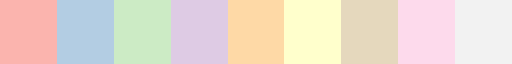

In [5]:
cmap

In [7]:
cmap = matplotlib.cm.get_cmap("Pastel2")
# Access the .colors attribute (a list of RGBA tuples)
rgba_colors = cmap.colors

# Convert each RGBA tuple to a hex string
hex_colors = [mcolors.to_hex(c) for c in rgba_colors]

# Print the list of hex color strings
print(hex_colors)

['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']


/tmp/ipykernel_143/634515531.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Pastel2')


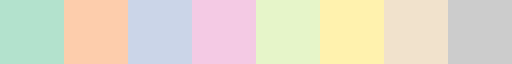

In [8]:
cmap

In [8]:
cell_line_p = {
    "Caco-2": "saddlebrown",
    "SJCRH30": "darkgreen",
    "BE2C": "grey",
    "SJSA1": "teal",
    "HAP-1": "royalblue",
    "HL-60": "cyan",
    "MG63": "lime",
    "VCaP": "gold",
    "C4-2B": "orangered",
    "RWPE2": "orange",
    "22Rv1": "lightcoral",
    "RWPE1": "deeppink",
}
modification_p = {
    "CTCF": "#e5d8bd",
    "H3K4me1": "#fdcdac",
    "H3K9me3": "#b3cde3",
    "H3K36me3": "#e6f5c9",
    "H3K27me3": "#decbe4",
    "H3K4me3": "#b3e2cd",
    "H3K27ac": "#fff2ae",
}

modification_p_richer = {
    "CTCF": "#d3c09b",
    "H3K4me1": "#fabd88",
    "H3K9me3": "#9ab7d3",
    "H3K36me3": "#d7f0a8",
    "H3K27me3": "#c7aed6",
    "H3K4me3": "#9ad1b5",
    "H3K27ac": "#ffe98c",
}

In [11]:
import os

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# 1. Create a list of 'Patch' objects for the legend handles
# A Patch is just a colored rectangle
patches = [
    mpatches.Patch(color=color, label=label) for label, color in cell_line_p.items()
]

# 2. Create a figure and a single axis
# We can make the figure small, as we will crop it tightly
fig, ax = plt.subplots(figsize=(4, 2))

# 3. Create the legend on the axis
# We place it in the 'center' of the invisible axis
legend = ax.legend(
    handles=patches,
    loc="center",
    frameon=False,  # Remove the legend box frame
    fontsize=12,
    ncol=1,  # Arrange in a single column
)

# 4. Turn off the axis (spines, ticks, etc.)
ax.axis("off")

# 5. Define the save path
save_path = "./plots/cell_line_legend.svg"

# Ensure the 'plots' directory exists (if you want to save it there)
# os.makedirs(os.path.dirname(save_path), exist_ok=True)

# 6. Save the figure as an SVG
# bbox_inches='tight' is the key to cropping the output
# to the legend's bounding box.
plt.savefig(
    save_path,
    format="svg",
    bbox_inches="tight",
    pad_inches=0.1,  # Add a small amount of padding
    transparent=True,  # Make the background transparent
)

plt.close(fig)  # Close the figure to free memory

print(f"Legend saved successfully to {save_path}")

Legend saved successfully to ./plots/cell_line_legend.svg


## Analyze correlation coefficients of signal vs divergence by TE class, line and modification

In [4]:
corr_coefs = pd.read_csv("Signal_vs_divergence_correlation_by_lines_mods_classes.csv")
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]

correlation_df_list = []
for i in range(0, 39):
    correlation_df_list.append(corr_coefs[8 * i : 8 * i + 8].set_index("Unnamed: 0"))

correlation_df = pd.concat(correlation_df_list, axis=1).T
correlation_df.index = correlation_df.cell_line + "_" + correlation_df.modification
correlation_df[class_names] = correlation_df[class_names].apply(
    pd.to_numeric, errors="coerce"
)
correlation_df.to_csv('./supplementary/Supplementary table 3.csv')
correlation_df  # [correlation_df.modification == 'H3K9me3']

Unnamed: 0       cell_line modification      LINE       LTR      SINE  \
C4-2B_CTCF           C4-2B         CTCF  0.009998  0.098247  0.454619   
C4-2B_H3K27ac        C4-2B      H3K27ac  0.157677 -0.075083 -0.027578   
RWPE1_CTCF           RWPE1         CTCF -0.027016  0.091049  0.067828   
RWPE1_H3K27ac        RWPE1      H3K27ac  0.084852 -0.042943 -0.472827   
VCaP_CTCF             VCaP         CTCF  0.042967  0.004875 -0.085243   
VCaP_H3K27ac          VCaP      H3K27ac  0.093152 -0.029601 -0.097658   
SJCRH30_H3K27ac    SJCRH30      H3K27ac  0.028271  0.002110  0.027018   
SJCRH30_H3K4me1    SJCRH30      H3K4me1  0.061597  0.024282  0.089411   
SJCRH30_H3K9me3    SJCRH30      H3K9me3 -0.136785 -0.080214  0.082468   
SJCRH30_H3K36me3   SJCRH30     H3K36me3 -0.002530 -0.033646 -0.067044   
SJCRH30_H3K27me3   SJCRH30     H3K27me3  0.044883  0.006452  0.007293   
SJCRH30_H3K4me3    SJCRH30      H3K4me3  0.006197 -0.015027  0.044461   
SJSA1_H3K27ac        SJSA1      H3K27ac  0.030778  0.000913  0.032417   
SJSA1_H3K9me3        SJSA1      H3K9me3 -0.085590 -0.071934  0.007518   
SJSA1_H3K36me3       SJSA1     H3K36me3  0.034906 -0.038437 -0.061025   
SJSA1_H3K27me3       SJSA1     H3K27me3  0.017867  0.033858  0.091643   
SJSA1_H3K4me3        SJSA1      H3K4me3  0.036765 -0.034471 -0.023163   
HAP-1_H3K27ac        HAP-1      H3K27ac  0.042317 -0.041441 -0.093884   
HAP-1_H3K4me1        HAP-1      H3K4me1  0.036794 -0.039143  0.023418   
HAP-1_H3K9me3        HAP-1      H3K9me3 -0.113005 -0.123757 -0.186883   
HAP-1_H3K36me3       HAP-1     H3K36me3  0.019254 -0.043128 -0.107660   
HAP-1_H3K27me3       HAP-1     H3K27me3  0.040641  0.051265  0.002550   
HAP-1_H3K4me3        HAP-1      H3K4me3  0.029441 -0.040598 -0.128773   
BE2C_H3K4me1          BE2C      H3K4me1  0.089496  0.003628  0.111552   
BE2C_H3K9me3          BE2C      H3K9me3 -0.088618 -0.077584 -0.061549   
BE2C_H3K36me3         BE2C     H3K36me3  0.026474 -0.035370 -0.071237   
BE2C_H3K27me3         BE2C     H3K27me3  0.014971  0.001957 -0.005708   
HL-60_H3K27ac        HL-60      H3K27ac  0.021618 -0.004924  0.026406   
MG63_H3K9me3          MG63      H3K9me3 -0.163651 -0.122496 -0.037483   
MG63_H3K36me3         MG63     H3K36me3  0.028160 -0.060440 -0.078641   
MG63_H3K27me3         MG63     H3K27me3  0.012678  0.020638  0.033925   
MG63_H3K4me3          MG63      H3K4me3  0.016751 -0.019978  0.003880   
Caco-2_H3K4me1      Caco-2      H3K4me1  0.062560 -0.026403  0.043211   
Caco-2_H3K9me3      Caco-2      H3K9me3 -0.168100 -0.149561 -0.115086   
RWPE2_CTCF           RWPE2         CTCF -0.010668 -0.002889 -0.194148   
RWPE2_H3K27ac        RWPE2      H3K27ac  0.044003 -0.026522 -0.160494   
RWPE2_H3K36me3       RWPE2     H3K36me3 -0.016177 -0.028848 -0.095990   
22Rv1_CTCF           22Rv1         CTCF  0.066596 -0.021135 -0.122709   
22Rv1_H3K27ac        22Rv1      H3K27ac  0.066232 -0.035670 -0.113116   

Unnamed: 0             DNA  Retroposon        RC  
C4-2B_CTCF        0.016026    0.476818 -0.003273  
C4-2B_H3K27ac     0.020479    0.076776 -0.060098  
RWPE1_CTCF        0.012202    0.362635 -0.018741  
RWPE1_H3K27ac    -0.002017   -0.308410 -0.055940  
VCaP_CTCF         0.007977   -0.134688 -0.026657  
VCaP_H3K27ac      0.013954   -0.080731 -0.080064  
SJCRH30_H3K27ac   0.017442    0.120396 -0.002547  
SJCRH30_H3K4me1   0.017317    0.279601 -0.011064  
SJCRH30_H3K9me3  -0.035219   -0.352966 -0.011485  
SJCRH30_H3K36me3 -0.049434    0.080151  0.025043  
SJCRH30_H3K27me3  0.018031    0.267647 -0.019459  
SJCRH30_H3K4me3  -0.011682    0.096083 -0.039889  
SJSA1_H3K27ac    -0.000169    0.030957  0.005296  
SJSA1_H3K9me3     0.009032   -0.255759  0.026537  
SJSA1_H3K36me3   -0.032989   -0.092717  0.036021  
SJSA1_H3K27me3    0.014913    0.041220  0.012697  
SJSA1_H3K4me3     0.002830   -0.171103  0.010536  
HAP-1_H3K27ac    -0.013661   -0.016455 -0.009168  
HAP-1_H3K4me1     0.001619    0.026202 -0.012393  
HAP-1_H3K9me3    -0.010961   -0.437113  0.041253  
HAP-1_H3

In [6]:
correlation_df.reindex(
    ["RWPE1_CTCF", "SJCRH30_H3K27me3", "SJCRH30_H3K4me1", "BE2C_H3K4me1"]
)

Unnamed: 0       cell_line modification      LINE       LTR      SINE  \
RWPE1_CTCF           RWPE1         CTCF -0.027016  0.091049  0.067828   
SJCRH30_H3K27me3   SJCRH30     H3K27me3  0.044883  0.006452  0.007293   
SJCRH30_H3K4me1    SJCRH30      H3K4me1  0.061597  0.024282  0.089411   
BE2C_H3K4me1          BE2C      H3K4me1  0.089496  0.003628  0.111552   

Unnamed: 0             DNA  Retroposon        RC  
RWPE1_CTCF        0.012202    0.362635 -0.018741  
SJCRH30_H3K27me3  0.018031    0.267647 -0.019459  
SJCRH30_H3K4me1   0.017317    0.279601 -0.011064  
BE2C_H3K4me1      0.017167    0.213426  0.005288

In [11]:
correlation_df.drop(["C4-2B_CTCF", "RWPE1_H3K27ac"]).min()

Unnamed: 0
cell_line          22Rv1
modification        CTCF
LINE             -0.1681
LTR            -0.149561
SINE           -0.194148
DNA            -0.057727
Retroposon     -0.526175
RC             -0.080064
dtype: object

In [12]:
correlation_df.drop(["C4-2B_CTCF", "RWPE1_H3K27ac"]).max()

Unnamed: 0
cell_line           VCaP
modification     H3K9me3
LINE            0.157677
LTR             0.091049
SINE            0.111552
DNA              0.03173
Retroposon      0.362635
RC              0.053124
dtype: object

In [9]:
correlation_df[class_names].min()

Unnamed: 0
LINE         -0.168100
LTR          -0.149561
SINE         -0.472827
DNA          -0.057727
Retroposon   -0.526175
RC           -0.080064
dtype: float64

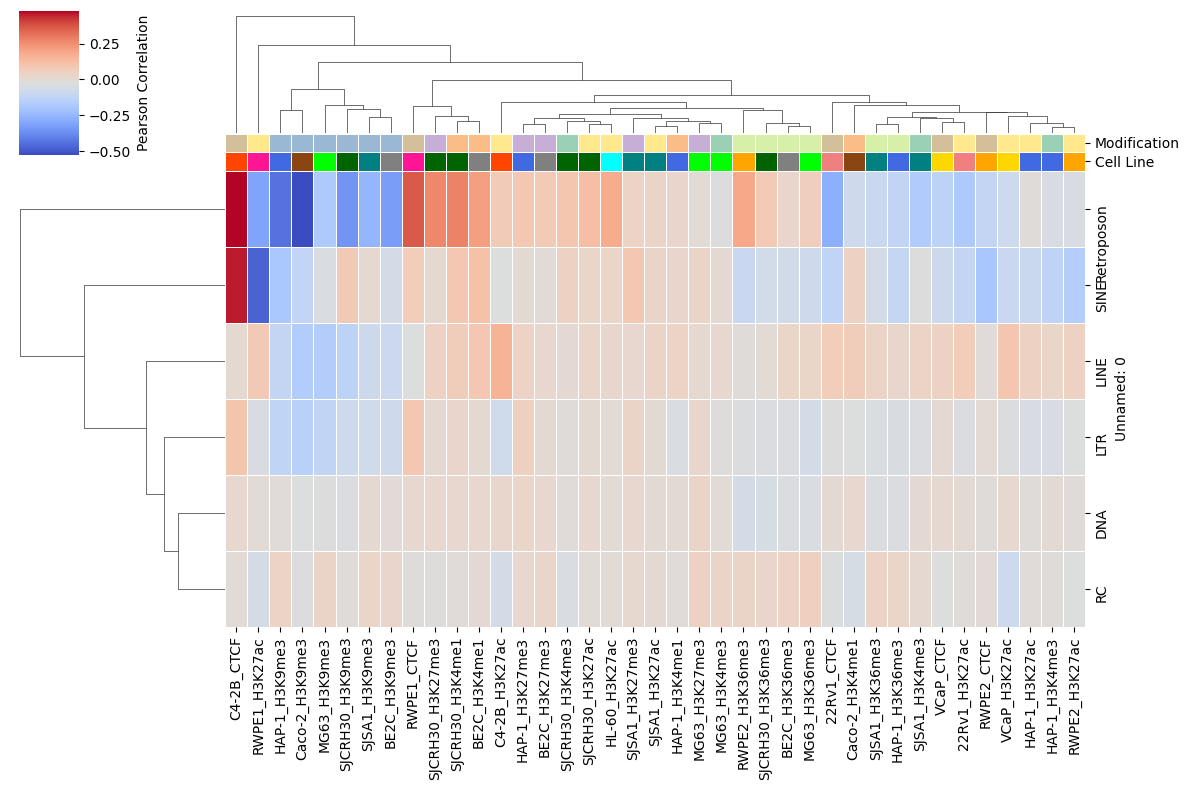

In [13]:
# --- 1. Prepare Row Colors ---
# Map the 'cell_line' and 'modification' columns to their respective colors
mapped_cell_colors = correlation_df["cell_line"].map(cell_line_p)
mapped_mod_colors = correlation_df["modification"].map(modification_p_richer)

# Create a DataFrame for the row_colors argument
# The column names (e.g., 'Cell Line') will appear as labels.
row_colors_df = pd.DataFrame(
    {"Cell Line": mapped_cell_colors, "Modification": mapped_mod_colors}
)
# Important: The index must align with the data being plotted
row_colors_df.index = correlation_df.index


# --- 2. Plot the Clustermap ---
data_to_plot = correlation_df[class_names].T


g = sns.clustermap(
    data_to_plot,
    cmap="coolwarm",
    # Goal 1: Customize figsize
    figsize=(12, 8),
    # Goal 2 & 3: Add row colors using the mapped palettes
    # We use row_colors, as 'cell_line' and 'modification' describe the rows
    col_colors=row_colors_df[["Modification", "Cell Line"]],
    # Other aesthetic improvements
    # vmin=-1, vmax=1,          # Set colorbar limits for correlation
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"},
    # metric='correlation'      # Use correlation for clustering distance
)

# --- 3. Save the Figure ---
save_path = "./plots/signal_to_divergence_corr_clustermap.svg"


# Goal 4: Save as SVG
g.savefig(save_path, format="svg")


plt.show()

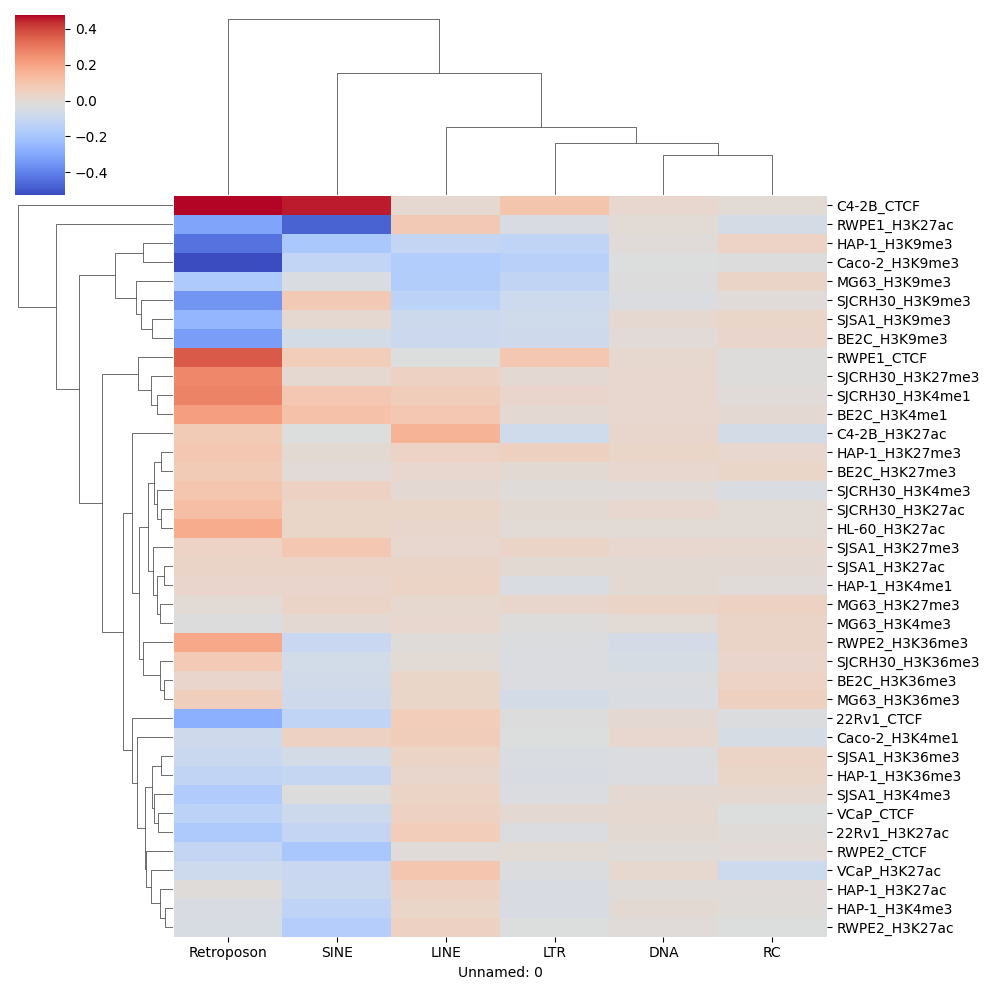

In [19]:
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]
sns.clustermap(
    correlation_df[class_names],
    cmap="coolwarm",
)

In [5]:
corr_coefs[0:8].set_index("Unnamed: 0")

0
Unnamed: 0                         
cell_line                      VCaP
modification                   CTCF
LINE            0.04296732303777025
LTR            0.004874568785685149
SINE           -0.08524257830201931
DNA             0.00797674737078927
Retroposon      -0.1346880649565564
RC            -0.026657456774885947

### Test for significant differences between correlation coefficients with divergence of different families 

That's an excellent question. The "pattern" you're looking for can be defined in a few different statistical ways.The most important first step, before any test, is to transform your correlation coefficients ($r$).The Prerequisite: Fisher $z$-TransformationYou should not perform statistical tests directly on the raw Pearson $r$ values. The distribution of $r$ is not normal and is bounded between -1 and 1 (it "bunches up" as it gets close to the ends).You must first convert every $r$ value in your set to a $z$-score using the Fisher $z$-transformation. This transformation "stretches" the values so they are approximately normally distributed, which is an assumption for many tests.The formula is:$$z = 0.5 \times \ln\left(\frac{1+r}{1-r}\right)$$In most software (like Python/Numpy or R), this is simply z = np.arctanh(r).From now on, all tests are performed on your set of $z$-scores, not the $r$-values.Here are the most common "patterns" you can test for, from simplest to most complex.1. Does the distribution follow a specific shape (e.g., normal)?This tests if the set itself has a recognizable structure.Your Question: "Is my set of $z$-scores normally distributed?" (This would imply the correlations are clustered around a single mean value in a standard way).How to Test:Visually: Plot a histogram or a Q-Q plot of your $z$-scores. This is often the most insightful step. A Q-Q plot will show you if the data follows a straight line (normal) or where it deviates (e.g., "heavy tails").Formally: Use a Shapiro-Wilk Test. The null hypothesis is that the data is normally distributed. A low p-value (e.g., $< 0.05$) suggests it is not normal.Interpretation: If it's not normal, the visual plot tells you the pattern. Is it bimodal (two peaks)? Is it skewed? This is a pattern in itself.2. Does the set of correlations relate to another variable?This is often the most powerful and common question. You have a list of correlations, $r_1, r_2, \dots, r_n$. Do you have another property for each of those $n$ vectors?Your Question: "Do the vectors that correlate highly with my target vector also share some other property?"Example:Your vectors are Gene 1, Gene 2, ... Gene 1000.Your target vector is Disease_Severity.Your set of $r$-values is [Corr(Gene1, Disease), Corr(Gene2, Disease), ...].Your other variable could be the "Average Expression Level" for each gene: [Avg(Gene1), Avg(Gene2), ...].The test answers: "Do genes that strongly correlate with the disease also have high average expression?"How to Test:Create your list of $z$-scores: $Z = [z_1, z_2, \dots, z_n]$.Create your list of the other property: $P = [p_1, p_2, \dots, p_n]$.Calculate a Spearman Rank Correlation between $Z$ and $P$.Interpretation: A significant Spearman correlation (e.g., $p < 0.05$) shows a monotonic pattern: as one value increases, the other tends to increase (or decrease). This is a very strong and common way to find a "pattern."3. Is the average correlation of the set different from zero?This tests if your "many vectors" have any relationship at all (on average) with the target vector.Your Question: "Is the mean of my correlation set significantly positive or negative?"How to Test:Get your set of $z$-scores.Run a one-sample t-test with a null hypothesis (mu) of 0.Interpretation: A low p-value means the average correlation is not zero. This confirms a general, set-wide pattern of a positive or negative relationship.4. Are the correlations different between groups?If your "many vectors" can be divided into pre-defined categories, you can test if the correlation pattern is different between them.Your Question: "Is the average correlation to the target vector different for Group A vs. Group B?"Example: "Is the correlation of 'kinase' genes with the target different from the correlation of 'transcription factor' genes with the target?"How to Test:Get your $z$-scores and label them by group (e.g., 'Group A', 'Group B').For 2 groups: Run a Welch's t-test (or a Mann-Whitney U test if the $z$-scores are still not normal) between the two groups.For 3+ groups: Run an ANOVA (or a Kruskal-Wallis test) across all groups.Interpretation: A low p-value shows that the "pattern" of correlation is not the same across your defined categories.

In [16]:
correlation_df

Unnamed: 0       cell_line modification      LINE       LTR      SINE  \
C4-2B_CTCF           C4-2B         CTCF  0.009998  0.098247  0.454619   
C4-2B_H3K27ac        C4-2B      H3K27ac  0.157677 -0.075083 -0.027578   
RWPE1_CTCF           RWPE1         CTCF -0.027016  0.091049  0.067828   
RWPE1_H3K27ac        RWPE1      H3K27ac  0.084852 -0.042943 -0.472827   
VCaP_CTCF             VCaP         CTCF  0.042967  0.004875 -0.085243   
VCaP_H3K27ac          VCaP      H3K27ac  0.093152 -0.029601 -0.097658   
SJCRH30_H3K27ac    SJCRH30      H3K27ac  0.028271  0.002110  0.027018   
SJCRH30_H3K4me1    SJCRH30      H3K4me1  0.061597  0.024282  0.089411   
SJCRH30_H3K9me3    SJCRH30      H3K9me3 -0.136785 -0.080214  0.082468   
SJCRH30_H3K36me3   SJCRH30     H3K36me3 -0.002530 -0.033646 -0.067044   
SJCRH30_H3K27me3   SJCRH30     H3K27me3  0.044883  0.006452  0.007293   
SJCRH30_H3K4me3    SJCRH30      H3K4me3  0.006197 -0.015027  0.044461   
SJSA1_H3K27ac        SJSA1      H3K27ac  0.030778  0.000913  0.032417   
SJSA1_H3K9me3        SJSA1      H3K9me3 -0.085590 -0.071934  0.007518   
SJSA1_H3K36me3       SJSA1     H3K36me3  0.034906 -0.038437 -0.061025   
SJSA1_H3K27me3       SJSA1     H3K27me3  0.017867  0.033858  0.091643   
SJSA1_H3K4me3        SJSA1      H3K4me3  0.036765 -0.034471 -0.023163   
HAP-1_H3K27ac        HAP-1      H3K27ac  0.042317 -0.041441 -0.093884   
HAP-1_H3K4me1        HAP-1      H3K4me1  0.036794 -0.039143  0.023418   
HAP-1_H3K9me3        HAP-1      H3K9me3 -0.113005 -0.123757 -0.186883   
HAP-1_H3K36me3       HAP-1     H3K36me3  0.019254 -0.043128 -0.107660   
HAP-1_H3K27me3       HAP-1     H3K27me3  0.040641  0.051265  0.002550   
HAP-1_H3K4me3        HAP-1      H3K4me3  0.029441 -0.040598 -0.128773   
BE2C_H3K4me1          BE2C      H3K4me1  0.089496  0.003628  0.111552   
BE2C_H3K9me3          BE2C      H3K9me3 -0.088618 -0.077584 -0.061549   
BE2C_H3K36me3         BE2C     H3K36me3  0.026474 -0.035370 -0.071237   
BE2C_H3K27me3         BE2C     H3K27me3  0.014971  0.001957 -0.005708   
HL-60_H3K27ac        HL-60      H3K27ac  0.021618 -0.004924  0.026406   
MG63_H3K9me3          MG63      H3K9me3 -0.163651 -0.122496 -0.037483   
MG63_H3K36me3         MG63     H3K36me3  0.028160 -0.060440 -0.078641   
MG63_H3K27me3         MG63     H3K27me3  0.012678  0.020638  0.033925   
MG63_H3K4me3          MG63      H3K4me3  0.016751 -0.019978  0.003880   
Caco-2_H3K4me1      Caco-2      H3K4me1  0.062560 -0.026403  0.043211   
Caco-2_H3K9me3      Caco-2      H3K9me3 -0.168100 -0.149561 -0.115086   
RWPE2_CTCF           RWPE2         CTCF -0.010668 -0.002889 -0.194148   
RWPE2_H3K27ac        RWPE2      H3K27ac  0.044003 -0.026522 -0.160494   
RWPE2_H3K36me3       RWPE2     H3K36me3 -0.016177 -0.028848 -0.095990   
22Rv1_CTCF           22Rv1         CTCF  0.066596 -0.021135 -0.122709   
22Rv1_H3K27ac        22Rv1      H3K27ac  0.066232 -0.035670 -0.113116   

Unnamed: 0             DNA  Retroposon        RC  
C4-2B_CTCF        0.016026    0.476818 -0.003273  
C4-2B_H3K27ac     0.020479    0.076776 -0.060098  
RWPE1_CTCF        0.012202    0.362635 -0.018741  
RWPE1_H3K27ac    -0.002017   -0.308410 -0.055940  
VCaP_CTCF         0.007977   -0.134688 -0.026657  
VCaP_H3K27ac      0.013954   -0.080731 -0.080064  
SJCRH30_H3K27ac   0.017442    0.120396 -0.002547  
SJCRH30_H3K4me1   0.017317    0.279601 -0.011064  
SJCRH30_H3K9me3  -0.035219   -0.352966 -0.011485  
SJCRH30_H3K36me3 -0.049434    0.080151  0.025043  
SJCRH30_H3K27me3  0.018031    0.267647 -0.019459  
SJCRH30_H3K4me3  -0.011682    0.096083 -0.039889  
SJSA1_H3K27ac    -0.000169    0.030957  0.005296  
SJSA1_H3K9me3     0.009032   -0.255759  0.026537  
SJSA1_H3K36me3   -0.032989   -0.092717  0.036021  
SJSA1_H3K27me3    0.014913    0.041220  0.012697  
SJSA1_H3K4me3     0.002830   -0.171103  0.010536  
HAP-1_H3K27ac    -0.013661   -0.016455 -0.009168  
HAP-1_H3K4me1     0.001619    0.026202 -0.012393  
HAP-1_H3K9me3    -0.010961   -0.437113  0.041253  
HAP-1_H3

In [5]:
corr_coefs = pd.read_csv("Signal_vs_divergence_correlation_by_lines_mods_classes.csv")
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]

correlation_df_list = []
for i in range(0, 39):
    correlation_df_list.append(corr_coefs[8 * i : 8 * i + 8].set_index("Unnamed: 0"))

correlation_df = pd.concat(correlation_df_list, axis=1).T
correlation_df.index = correlation_df.cell_line + "_" + correlation_df.modification
correlation_df[class_names] = correlation_df[class_names].apply(
    pd.to_numeric, errors="coerce"
)

corrs_for_test = correlation_df.melt(
    id_vars=["cell_line", "modification"], value_vars=class_names
)
corrs_for_test.columns = ["cell_line", "modification", "TE_class", "correlation"]
corrs_for_test["transformed_corr"] = np.arctanh(corrs_for_test.correlation)
corrs_for_test

cell_line modification TE_class  correlation  transformed_corr
0       C4-2B         CTCF     LINE     0.009998          0.009999
1       C4-2B      H3K27ac     LINE     0.157677          0.159003
2       RWPE1         CTCF     LINE    -0.027016         -0.027022
3       RWPE1      H3K27ac     LINE     0.084852          0.085057
4        VCaP         CTCF     LINE     0.042967          0.042994
..        ...          ...      ...          ...               ...
229     RWPE2         CTCF       RC    -0.006343         -0.006343
230     RWPE2      H3K27ac       RC    -0.026100         -0.026106
231     RWPE2     H3K36me3       RC     0.032721          0.032733
232     22Rv1         CTCF       RC    -0.032104         -0.032115
233     22Rv1      H3K27ac       RC    -0.013825         -0.013826

[234 rows x 5 columns]

<AxesSubplot:xlabel='correlation', ylabel='Count'>

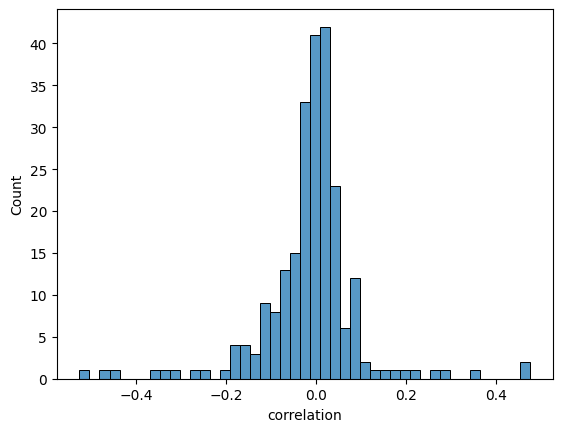

In [22]:
sns.histplot(corrs_for_test.correlation)

<AxesSubplot:xlabel='transformed_corr', ylabel='Count'>

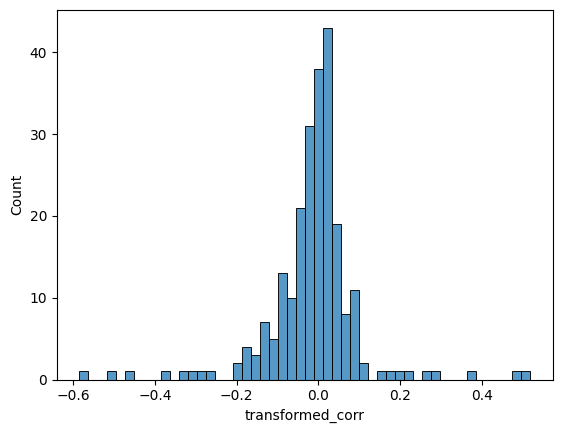

In [23]:
sns.histplot(corrs_for_test.transformed_corr)  # Fisher z-transformation

In [24]:
stats.shapiro(corrs_for_test.transformed_corr)

ShapiroResult(statistic=0.8162097930908203, pvalue=6.374769961035864e-16)

In [32]:
stats.kurtosis(corrs_for_test.transformed_corr)

8.248448397541267

In [33]:
stats.kurtosistest(corrs_for_test.transformed_corr)

KurtosistestResult(statistic=6.894570942706857, pvalue=5.402761858013723e-12)

<AxesSubplot:xlabel='TE_class', ylabel='transformed_corr'>

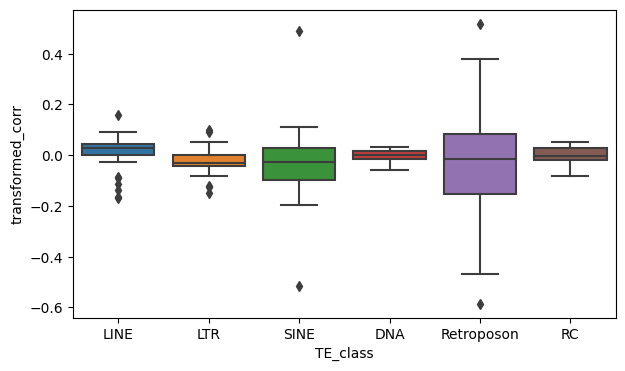

In [34]:
figure, ax = plt.subplots(
    figsize=(7, 4),
)
sns.boxplot(
    data=corrs_for_test,
    x="TE_class",
    y="transformed_corr",
    ax=ax,
    # hue='TE_class'
)

<AxesSubplot:xlabel='modification', ylabel='transformed_corr'>

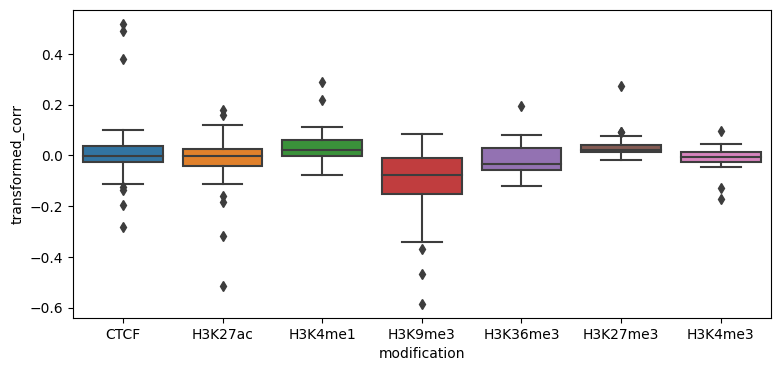

In [35]:
figure, ax = plt.subplots(
    figsize=(9, 4),
)
sns.boxplot(
    data=corrs_for_test,
    x="modification",
    y="transformed_corr",
    ax=ax,
    # hue='TE_class'
)

<AxesSubplot:xlabel='cell_line', ylabel='transformed_corr'>

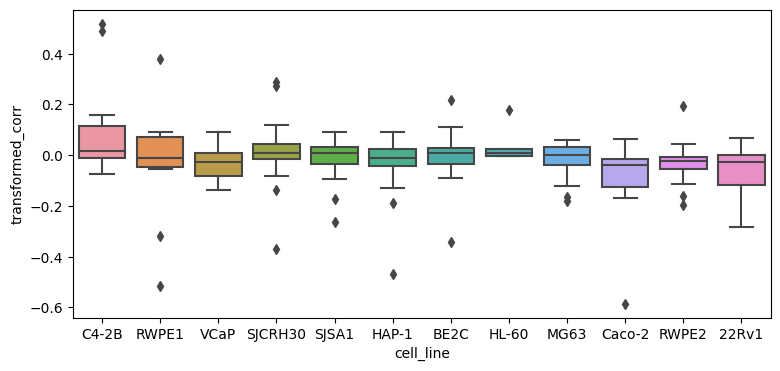

In [36]:
figure, ax = plt.subplots(
    figsize=(9, 4),
)
sns.boxplot(
    data=corrs_for_test,
    x="cell_line",
    y="transformed_corr",
    ax=ax,
    # hue='TE_class'
)

In [19]:
np.arctanh

<ufunc 'arctanh'>

#### Test for equality of variances

In [6]:
corrs_for_test[]

cell_line modification TE_class  correlation  transformed_corr
0       C4-2B         CTCF     LINE     0.009998          0.009999
1       C4-2B      H3K27ac     LINE     0.157677          0.159003
2       RWPE1         CTCF     LINE    -0.027016         -0.027022
3       RWPE1      H3K27ac     LINE     0.084852          0.085057
4        VCaP         CTCF     LINE     0.042967          0.042994
..        ...          ...      ...          ...               ...
229     RWPE2         CTCF       RC    -0.006343         -0.006343
230     RWPE2      H3K27ac       RC    -0.026100         -0.026106
231     RWPE2     H3K36me3       RC     0.032721          0.032733
232     22Rv1         CTCF       RC    -0.032104         -0.032115
233     22Rv1      H3K27ac       RC    -0.013825         -0.013826

[234 rows x 5 columns]

In [15]:
class_names

['LINE', 'LTR', 'SINE', 'DNA', 'Retroposon', 'RC']

In [4]:
from scipy.stats import levene
??levene

Signature:
levene(
    *samples,
    center='median',
    proportiontocut=0.05,
    axis=0,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Perform Levene test for equal variances.

The Levene test tests the null hypothesis that all input samples
are from populations with equal variances.  Levene's test is an
alternative to Bartlett's test `bartlett` in the case where
there are significant deviations from normality.

Parameters
----------
sample1, sample2, ... : array_like
    The sample data, possibly with different lengths. Only one-dimensional
    samples are accepted.
center : {'mean', 'median', 'trimmed'}, optional
    Which function of the data to use in the test.  The default
    is 'median'.
proportiontocut : float, optional
    When `center` is 'trimmed', this gives the proportion of data points
    to cut from each end. (See `scipy.stats.trim_mean`.)
    Default is 0.05.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute th

In [17]:
from scipy.stats import levene

LINE = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "LINE"]
LTR = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "LTR"]
SINE = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "SINE"]
DNA = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "DNA"]
Retroposon = corrs_for_test["transformed_corr"][
    corrs_for_test["TE_class"] == "Retroposon"
]
RC = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "RC"]
non_sva = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] != "Retroposon"]


levene(LINE, LTR, SINE, DNA, Retroposon, RC)

LeveneResult(statistic=21.321639898576336, pvalue=1.7505034390498945e-17)

In [14]:
levene(Retroposon, non_sva)

Signature: levene(*args, center='median', proportiontocut=0.05)
Source:   
def levene(*args, center='median', proportiontocut=0.05):
    """Perform Levene test for equal variances.

    The Levene test tests the null hypothesis that all input samples
    are from populations with equal variances.  Levene's test is an
    alternative to Bartlett's test `bartlett` in the case where
    there are significant deviations from normality.

    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample data, possibly with different lengths. Only one-dimensional
        samples are accepted.
    center : {'mean', 'median', 'trimmed'}, optional
        Which function of the data to use in the test.  The default
        is 'median'.
    proportiontocut : float, optional
        When `center` is 'trimmed', this gives the proportion of data points
        to cut from each end. (See `scipy.stats.trim_mean`.)
        Default is 0.05.

    Returns
    -------
    statistic : f

In [12]:
from statsmodels.stats.oneway import anova_oneway

# Perform the Brown-Forsythe test
anova_oneway(
    data=corrs_for_test["transformed_corr"],
    groups=corrs_for_test["TE_class"],
    use_var="equal",
)

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 0.973441784179152
pvalue = 0.434769566896286
df = (5.0, 228.0)
df_num = 5.0
df_denom = 228.0
nobs_t = 234.0
n_groups = 6
means = array([-0.00358074,  0.01162795, -0.02524657, -0.00058463, -0.02950687,
           -0.03262705])
nobs = array([39., 39., 39., 39., 39., 39.])
vars_ = array([0.00048486, 0.00484515, 0.00256809, 0.00101818, 0.05116082,
           0.01956039])
use_var = 'equal'
welch_correction = True
tuple = (0.973441784179152, 0.434769566896286)

In [9]:
??anova_oneway

Signature:
anova_oneway(
    data,
    groups=None,
    use_var='unequal',
    welch_correction=True,
    trim_frac=0,
)
Source:   
def anova_oneway(data, groups=None, use_var="unequal", welch_correction=True,
                 trim_frac=0):
    """Oneway Anova

    This implements standard anova, Welch and Brown-Forsythe, and trimmed
    (Yuen) variants of those.

    Parameters
    ----------
    data : tuple of array_like or DataFrame or Series
        Data for k independent samples, with k >= 2.
        The data can be provided as a tuple or list of arrays or in long
        format with outcome observations in ``data`` and group membership in
        ``groups``.
    groups : ndarray or Series
        If data is in long format, then groups is needed as indicator to which
        group or sample and observations belongs.
    use_var : {"unequal", "equal" or "bf"}
        `use_var` specified how to treat heteroscedasticity, unequal variance,
        across samples. Three approaches are

### Attempts of plot of signal vs Divergence correlation

In [16]:
from scipy import stats

In [ ]:
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]

figure, axs = plt.subplots(
    nrows=2,
    ncols=3,
    sharex=True,
    sharey=False,
    squeeze=True,
    # width_ratios=None,
    # height_ratios=[1, 1, 1, 1, 1, 1, 0.3, 0.3],
    figsize=(14, 8),
)

# Use zip to iterate over class names and the flattened axes array
# axs.flatten() converts the 2x3 array into a 1D array of 6 axes
for class_name, ax in zip(class_names, axs.flatten()):
    print(class_name)
    # Filter the data
    query_local = f'Class == "{class_name}"'
    sample_enrichment_local = sample_enrichment.query(query_local).dropna()
    corr_coef = np.corrcoef(
        sample_enrichment_local["Divergence"], sample_enrichment_local["Signal"]
    )[0, 1]
    # Use sns.histplot (axes-level) instead of sns.displot (figure-level)

    sns.kdeplot(  #
        data=sample_enrichment_local,
        x="Divergence",
        y="Signal",
        # alpha=0.01,
        ax=ax,
        fill=True,
        thresh=0,
        levels=100,
        cmap="mako",
    )

    # Use ax.set_title() to set the title for the subplot
    ax.set_title(class_name)

plt.show()
# Save the final figure
# plt.savefig("plots/Divergence_score_dist_by_class.svg")

LINE


LINE
LTR
SINE
DNA
Retroposon
RC


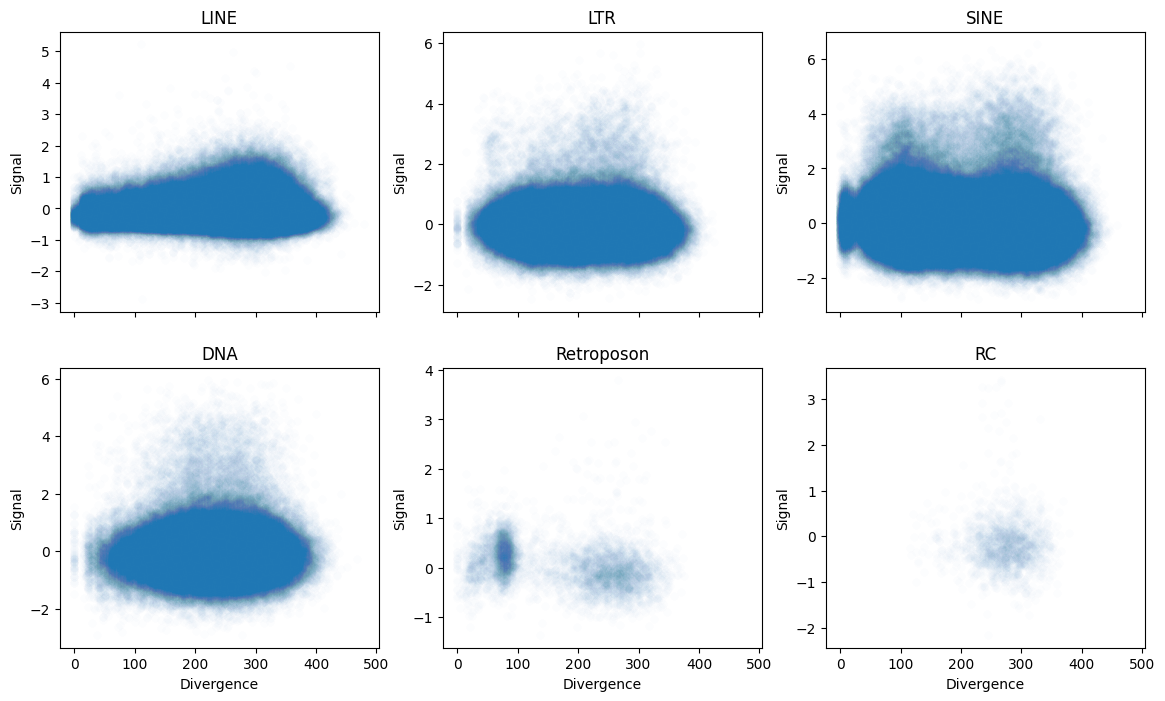

In [9]:
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]

figure, axs = plt.subplots(
    nrows=2,
    ncols=3,
    sharex=True,
    sharey=False,
    squeeze=True,
    # width_ratios=None,
    # height_ratios=[1, 1, 1, 1, 1, 1, 0.3, 0.3],
    figsize=(14, 8),
)

# Use zip to iterate over class names and the flattened axes array
# axs.flatten() converts the 2x3 array into a 1D array of 6 axes
for class_name, ax in zip(class_names, axs.flatten()):
    print(class_name)
    # Filter the data
    query_local = f'Class == "{class_name}"'
    sample_enrichment_local = sample_enrichment.query(query_local).dropna()

    # Use sns.histplot (axes-level) instead of sns.displot (figure-level)

    sns.scatterplot(  # kdeplot
        data=sample_enrichment_local,
        x="Divergence",
        y="Signal",
        alpha=0.01,
        ax=ax,
        # fill=True, thresh=0, levels=100, cmap="mako",
    )

    # Use ax.set_title() to set the title for the subplot
    ax.set_title(class_name)

plt.show()
# Save the final figure
# plt.savefig("plots/Divergence_score_dist_by_class.svg")

## Record correlation coefficients of inividual families of TEs

In [ ]:
repeat_masker = pd.read_csv("T2T_repeat_masker_processed.csv")

In [6]:
repeat_masker

Unnamed: 0 #"chrom"  chromStart  chromEnd  score individual_name  \
0                 0     chr1           0      7536    223           L1MC3   
1                 1     chr1        4082      4796    273          LTR60B   
2                 2     chr1        4082      4837    205          LTR60B   
3                 3     chr1        5267      5850    147        MER34C_v   
4                 4     chr1        5685      6131    148           MSTA1   
...             ...      ...         ...       ...    ...             ...   
3709424     3709424    chr22    51316429  51324176    211            L1MC   
3709425     3709425    chr22    51316699  51317699    149           MER72   
3709426     3709426    chr22    51316748  51317061    108          AluSq2   
3709427     3709427    chr22    51319294  51320377    254          LTR60B   
3709428     3709428    chr22    51319507  51319826     16          AluYb8   

        family_name class_name  
0                L1       LINE  
1              ERV1        LTR  
2              ERV1        LTR  
3              ERV1        LTR  
4         ERVL-MaLR        LTR  
...             ...        ...  
3709424          L1       LINE  
3709425        ERV1        LTR  
3709426         Alu       SINE  
3709427        ERV1        LTR  
3709428         Alu       SINE  

[3709429 rows x 8 columns]

In [9]:
repeat_masker.family_name.value_counts().to_csv("repeat_masker_family_name_counts.csv")

In [8]:
repeat_masker.individual_name.value_counts().to_csv(
    "repeat_masker_individual_name_counts.csv"
)

In [15]:
repeat_masker_family_name_counts = pd.read_csv("repeat_masker_family_name_counts.csv")[
    "Unnamed: 0"
]
repeat_masker_family_name_counts

0               Alu
1                L1
2               MIR
3                L2
4         ERVL-MaLR
5       hAT-Charlie
6              ERV1
7              ERVL
8      TcMar-Tigger
9        hAT-Tip100
10              CR1
11            Gypsy
12    hAT-Blackjack
13    TcMar-Mariner
14            RTE-X
15             ERVK
16        TcMar-Tc2
17              SVA
18         RTE-BovB
19         tRNA-RTE
20           hAT-Ac
21              hAT
22        MULE-MuDR
23         PiggyBac
24        5S-Deu-L2
25         Helitron
26         hAT-Tag1
27             tRNA
28         Penelope
29        TcMar-Tc1
30          Dong-R4
31         tRNA-Deu
32          Kolobok
33    PIF-Harbinger
34          Crypton
35           Merlin
36            TcMar
37           L1-Tx1
38        Crypton-A
39         I-Jockey
40      hAT-Tip100?
41       TcMar-Pogo
42             hAT?
43        hAT-hAT19
Name: Unnamed: 0, dtype: object

In [ ]:
import os

import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm  # For progress bars


def pearsonr_ci(x, y, alpha=0.05):
    """
    Calculates Pearson r, p-value, and 95% CI using Fisher z-transformation.
    This works on all versions of SciPy.
    """
    # Calculate r and p-value
    r, p = stats.pearsonr(x, y)
    n = len(x)

    # Fisher z-transformation
    z = np.arctanh(r)

    # Standard error of z
    se_z = 1.0 / np.sqrt(n - 3)

    # Get the z-score for the desired confidence level
    z_crit = stats.norm.ppf(1 - alpha / 2)  # This is 1.96 for 95% CI

    # Calculate CI for z
    z_low = z - z_crit * se_z
    z_high = z + z_crit * se_z

    # Back-transform z CI to r CI
    r_low = np.tanh(z_low)
    r_high = np.tanh(z_high)

    return r, p, r_low, r_high


# --- Helper Class for Colored Logging ---
class Logger:
    """A simple logger for pretty, colored console output."""

    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    ENDC = "\033[0m"

    @staticmethod
    def info(message):
        print(f"{Logger.BLUE}INFO: {message}{Logger.ENDC}")

    @staticmethod
    def success(message):
        print(f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}")

    @staticmethod
    def warning(message):
        print(f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}")

    @staticmethod
    def step(message):
        print(f"  -> {message}")


cell_lines = [
    "Caco-2",
    "SJCRH30",
    "BE2C",
    "SJSA1",
    "HAP-1",
    "HL-60",
    "MG63",
    "VCaP",
    "C4-2B",
    "RWPE2",
    "22Rv1",
    "RWPE1",
]
modifications = [
    "CTCF",
    "H3K27ac",
    "H3K4me1",
    "H3K9me3",
    "H3K36me3",
    "H3K27me3",
    "H3K4me3",
]

family_names = pd.read_csv("repeat_masker_family_name_counts.csv")["Unnamed: 0"]
individual_names = pd.read_csv("repeat_masker_individual_name_counts.csv")["Unnamed: 0"]

# Name	Family	Class
# --- Main Script ---
Logger.info("Starting batch plot generation...")
families_stats_list = []

individuals_stats_list = []
# Use tqdm for the outer loop progress bar
for cell_line in tqdm(cell_lines, desc="Processing Cell Lines"):

    # Use a nested tqdm for the inner loop
    for modification in tqdm(
        modifications, desc=f"  Mods for {cell_line}", leave=False
    ):

        filepath = f"./epigenomic_files/{cell_line}.{modification}.chm13v2.0.mapped_on_repeat_masker.bedGraph"
        # --- Data Loading ---
        Logger.step(f"Loading data from: {filepath}")
        try:
            sample_enrichment = pd.read_csv(
                filepath,
                sep="\t",
                header=None,
            )
            Logger.success("File loaded successfully.")
        except FileNotFoundError:
            Logger.warning(f"File not found, skipping: {filepath}")
            continue  # Skip to the next modification
        except Exception as e:
            Logger.warning(
                f"An unexpected error occurred while reading {filepath}: {e}"
            )
            continue

        sample_enrichment.columns = [
            "Chromosome",
            "Start",
            "End",
            "Divergence",
            "Name",
            "Family",
            "Class",
            "Signal",
        ]
        sample_enrichment["Signal"] = pd.to_numeric(
            sample_enrichment["Signal"], errors="coerce"
        )
        sample_enrichment["Divergence"] = pd.to_numeric(
            sample_enrichment["Divergence"], errors="coerce"
        )
        for family_name in tqdm(family_names, desc="Processing Family Names"):

            # Filter the data for the current family
            query_local = f'Family == "{family_name}"'
            sample_enrichment_local = sample_enrichment.query(query_local)

            # Calculate correlation
            clean_data = sample_enrichment_local.dropna(subset=["Divergence", "Signal"])
            if len(clean_data) > 3:
                corr_coef, p_val, ci_low, ci_high = pearsonr_ci(
                    clean_data["Divergence"], clean_data["Signal"]
                )
            else:
                corr_coef, p_val, ci_low, ci_high = None, None, None, None

            families_stats_list.append(
                {
                    "cell_line": cell_line,
                    "modification": modification,
                    "family_name": family_name,
                    "r": corr_coef,
                    "p_value": p_val,
                    "ci_low": ci_low,
                    "ci_high": ci_high,
                }
            )

        for individual_name in tqdm(
            individual_names, desc="Processing Individual Names"
        ):

            # Filter the data for the current name
            query_local = f'Name == "{individual_name}"'
            sample_enrichment_local = sample_enrichment.query(query_local)

            # Calculate correlation
            clean_data = sample_enrichment_local.dropna(subset=["Divergence", "Signal"])
            if len(clean_data) > 3:
                corr_coef, p_val, ci_low, ci_high = pearsonr_ci(
                    clean_data["Divergence"], clean_data["Signal"]
                )
            else:
                corr_coef, p_val, ci_low, ci_high = None, None, None, None

            individuals_stats_list.append(
                {
                    "cell_line": cell_line,
                    "modification": modification,
                    "individual_name": individual_name,
                    "r": corr_coef,
                    "p_value": p_val,
                    "ci_low": ci_low,
                    "ci_high": ci_high,
                }
            )


correlation_df_families = pd.DataFrame(families_stats_list)
correlation_df_individuals = pd.DataFrame(individuals_stats_list)

correlation_df_families.to_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families_detailed.csv", index=True
)


correlation_df_individuals.to_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed.csv",
    index=True,
)
Logger.info("All processing complete!")

### Record correlation coefficients with random control

In [54]:
import os

import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm  # For progress bars

import warnings
warnings.filterwarnings('ignore')
def pearsonr_ci(x, y, alpha=0.05):
    """
    Calculates Pearson r, p-value, and 95% CI using Fisher z-transformation.
    This works on all versions of SciPy.
    """
    # Calculate r and p-value
    r, p = stats.pearsonr(x, y)
    n = len(x)

    # Fisher z-transformation
    z = np.arctanh(r)

    # Standard error of z
    se_z = 1.0 / np.sqrt(n - 3)

    # Get the z-score for the desired confidence level
    z_crit = stats.norm.ppf(1 - alpha / 2)  # This is 1.96 for 95% CI

    # Calculate CI for z
    z_low = z - z_crit * se_z
    z_high = z + z_crit * se_z

    # Back-transform z CI to r CI
    r_low = np.tanh(z_low)
    r_high = np.tanh(z_high)

    return r, p, r_low, r_high


# --- Helper Class for Colored Logging ---
class Logger:
    """A simple logger for pretty, colored console output."""

    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    ENDC = "\033[0m"

    @staticmethod
    def info(message):
        print(f"{Logger.BLUE}INFO: {message}{Logger.ENDC}")

    @staticmethod
    def success(message):
        print(f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}")

    @staticmethod
    def warning(message):
        print(f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}")

    @staticmethod
    def step(message):
        print(f"  -> {message}")


cell_lines = [
    "Caco-2",
    "SJCRH30",
    "BE2C",
    "SJSA1",
    "HAP-1",
    "HL-60",
    "MG63",
    "VCaP",
    "C4-2B",
    "RWPE2",
    "22Rv1",
    "RWPE1",
]
modifications = [
    "CTCF",
    "H3K27ac",
    "H3K4me1",
    "H3K9me3",
    "H3K36me3",
    "H3K27me3",
    "H3K4me3",
]

family_names = pd.read_csv("repeat_masker_family_name_counts.csv")["Unnamed: 0"]
individual_names = pd.read_csv("repeat_masker_individual_name_counts.csv")["Unnamed: 0"]

# Name	Family	Class
# --- Main Script ---
Logger.info("Starting batch plot generation...")
families_stats_list = []

individuals_stats_list = []
# Use tqdm for the outer loop progress bar
for cell_line in tqdm(cell_lines, desc="Processing Cell Lines"):

    # Use a nested tqdm for the inner loop
    for modification in tqdm(
        modifications, desc=f"  Mods for {cell_line}", leave=False
    ):

        filepath = f"./epigenomic_files/{cell_line}.{modification}.chm13v2.0.mapped_on_repeat_masker.bedGraph"
        # --- Data Loading ---
        Logger.step(f"Loading data from: {filepath}")
        try:
            sample_enrichment = pd.read_csv(
                filepath,
                sep="\t",
                header=None,
            )
            Logger.success("File loaded successfully.")
        except FileNotFoundError:
            Logger.warning(f"File not found, skipping: {filepath}")
            continue  # Skip to the next modification
        except Exception as e:
            Logger.warning(
                f"An unexpected error occurred while reading {filepath}: {e}"
            )
            continue

        sample_enrichment.columns = [
            "Chromosome",
            "Start",
            "End",
            "Divergence",
            "Name",
            "Family",
            "Class",
            "Signal",
        ]
        sample_enrichment["Signal"] = pd.to_numeric(
            sample_enrichment["Signal"], errors="coerce"
        )
        sample_enrichment["Divergence"] = pd.to_numeric(
            sample_enrichment["Divergence"], errors="coerce"
        )
        for family_name in tqdm(family_names, desc="Processing Family Names"):

            # Filter the data for the current family
            query_local = f'Family == "{family_name}"'
            sample_enrichment_local = sample_enrichment.query(query_local)

            # Calculate correlation
            clean_data = sample_enrichment_local.dropna(subset=["Divergence", "Signal"])
            clean_data['Signal'] = clean_data['Signal'].sample(frac=1, random_state=1).set_axis(clean_data.index)
            if len(clean_data) > 3:
                corr_coef, p_val, ci_low, ci_high = pearsonr_ci(
                    clean_data["Divergence"], clean_data["Signal"]
                )
            else:
                corr_coef, p_val, ci_low, ci_high = None, None, None, None

            families_stats_list.append(
                {
                    "cell_line": cell_line,
                    "modification": modification,
                    "family_name": family_name,
                    "r": corr_coef,
                    "p_value": p_val,
                    "ci_low": ci_low,
                    "ci_high": ci_high,
                }
            )

        for individual_name in tqdm(
            individual_names, desc="Processing Individual Names"
        ):

            # Filter the data for the current name
            query_local = f'Name == "{individual_name}"'
            sample_enrichment_local = sample_enrichment.query(query_local)

            # Calculate correlation
            clean_data = sample_enrichment_local.dropna(subset=["Divergence", "Signal"])
            clean_data['Signal'] = clean_data['Signal'].sample(frac=1, random_state=1).set_axis(clean_data.index)
            if len(clean_data) > 3:
                corr_coef, p_val, ci_low, ci_high = pearsonr_ci(
                    clean_data["Divergence"], clean_data["Signal"]
                )
            else:
                corr_coef, p_val, ci_low, ci_high = None, None, None, None

            individuals_stats_list.append(
                {
                    "cell_line": cell_line,
                    "modification": modification,
                    "individual_name": individual_name,
                    "r": corr_coef,
                    "p_value": p_val,
                    "ci_low": ci_low,
                    "ci_high": ci_high,
                }
            )


correlation_df_families = pd.DataFrame(families_stats_list)
correlation_df_individuals = pd.DataFrame(individuals_stats_list)

correlation_df_families.to_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families_detailed_random.csv", index=True
)


correlation_df_individuals.to_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed_random.csv",
    index=True,
)
Logger.info("All processing complete!")

INFO: Starting batch plot generation...


ods for Caco-2:   0%|          | 0/7 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/Caco-2.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/Caco-2.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/Caco-2.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph
SUCCESS: File loaded successfully.




sing Family Names:   0%|          | 0/44 [00:00<?, ?it/s]

sing Family Names:   2%|▏         | 1/44 [00:00<00:10,  4.01it/s]

sing Family Names:   5%|▍         | 2/44 [00:00<00:08,  4.81it/s]

sing Family Names:   7%|▋         | 3/44 [00:00<00:08,  4.85it/s]

sing Family Names:   9%|▉         | 4/44 [00:00<00:07,  5.18it/s]

sing Family Names:  11%|█▏        | 5/44 [00:00<00:06,  5.86it/s]

sing Family Names:  14%|█▎        | 6/44 [00:01<00:05,  6.39it/s]

sing Family Names:  16%|█▌        | 7/44 [00:01<00:05,  6.98it/s]

sing Family Names:  18%|█▊        | 8/44 [00:01<00:05,  7.02it/s]

sing Family Names:  20%|██        | 9/44 [00:01<00:04,  7.04it/s]

sing Family Names:  23%|██▎       | 10/44 [00:01<00:04,  7.75it/s]

sing Family Names:  25%|██▌       | 11/44 [00:01<00:04,  7.34it/s]

sing Family Names:  30%|██▉       | 13/44 [00:01<00:03,  8.59it/s]

sing Family Names:  34%|███▍      | 15/44 [00:02<00:02,  9.77it/s]

sing Family Names:  36%|███▋      | 16/44 [00:02<00:02,  9.79it/

In [57]:
clean_data = sample_enrichment_local.dropna(subset=["Divergence", "Signal"])
clean_data['Signal'] = clean_data['Signal'].sample(frac=1, random_state=1).set_axis(clean_data.index)
clean_data

Chromosome      Start        End  Divergence     Name     Family  \
102283        chr1   61104730   61105045         357  Eulor5A  Crypton-A   
122510        chr1   76877266   76877579         261  Eulor5A  Crypton-A   
125857        chr1   79686754   79687074         320  Eulor5A  Crypton-A   
149474        chr1   99468436   99468753         214  Eulor5A  Crypton-A   
149475        chr1   99468854   99469170         281  Eulor5A  Crypton-A   
...            ...        ...        ...         ...      ...        ...   
3618352       chrX  104305151  104305343         255  Eulor5B  Crypton-A   
3641910       chrX  123493638  123493956         352  Eulor5A  Crypton-A   
3649949       chrX  130805191  130805507         297  Eulor5A  Crypton-A   
3658785       chrX  137169812  137170127         250  Eulor5A  Crypton-A   
3670012       chrX  146891194  146891517         269  Eulor5A  Crypton-A   

        Class    Signal  
102283    DNA  0.297555  
122510    DNA -0.784238  
125857    DNA  0.308597  
149474    DNA  0.371481  
149475    DNA  0.993036  
...       ...       ...  
3618352   DNA -0.137615  
3641910   DNA  0.092282  
3649949   DNA -0.042158  
3658785   DNA  0.664626  
3670012   DNA -0.119286  

[150 rows x 8 columns]

In [47]:
clean_data = sample_enrichment_local.dropna(subset=["Divergence", "Signal"])

clean_data

Chromosome     Start       End  Divergence    Name Family Class  \
10            chr1     12271     12582          87    AluY    Alu  SINE   
18            chr1     17318     17637          82   AluSx    Alu  SINE   
19            chr1     18206     18514         195   AluJb    Alu  SINE   
28            chr1     23673     23983          91   AluSg    Alu  SINE   
33            chr1     26848     27155         118   AluSx    Alu  SINE   
...            ...       ...       ...         ...     ...    ...   ...   
3709396       chrY  62419240  62419553         143   AluJb    Alu  SINE   
3709397       chrY  62419591  62419926         120   AluSz    Alu  SINE   
3709403       chrY  62424833  62425156         120   AluSx    Alu  SINE   
3709420       chrY  62440718  62441055         120   AluSx    Alu  SINE   
3709421       chrY  62441036  62441345         104  AluSc8    Alu  SINE   

           Signal  
10      -0.713696  
18       0.740862  
19       0.238787  
28      -1.439814  
33       0.147994  
...           ...  
3709396 -0.132781  
3709397  1.000000  
3709403 -0.310859  
3709420 -0.900219  
3709421 -0.130883  

[1130411 rows x 8 columns]

In [48]:
clean_data['Signal'].sample(frac=1, random_state=1).reset_index(drop=True)

0          0.492402
1         -0.021979
2          0.427362
3          0.574393
4          0.285753
             ...   
1130406   -0.812464
1130407    0.143005
1130408    2.159111
1130409    0.343075
1130410    0.120113
Name: Signal, Length: 1130411, dtype: float64

## Record averages and SDs of epigenetic signal by TE classes, families and individuals 

In [ ]:
import os

import numpy as np
import pandas as pd
from tqdm import tqdm  # For progress bars


# --- Helper Class for Colored Logging ---
class Logger:
    """A simple logger for pretty, colored console output."""

    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    ENDC = "\033[0m"

    @staticmethod
    def info(message):
        print(f"{Logger.BLUE}INFO: {message}{Logger.ENDC}")

    @staticmethod
    def success(message):
        print(f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}")

    @staticmethod
    def warning(message):
        print(f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}")

    @staticmethod
    def step(message):
        print(f"  -> {message}")


cell_lines = [
    "Caco-2",
    "SJCRH30",
    "BE2C",
    "SJSA1",
    "HAP-1",
    "HL-60",
    "MG63",
    "VCaP",
    "C4-2B",
    "RWPE2",
    "22Rv1",
    "RWPE1",
]
modifications = [
    "CTCF",
    "H3K27ac",
    "H3K4me1",
    "H3K9me3",
    "H3K36me3",
    "H3K27me3",
    "H3K4me3",
]

family_names = pd.read_csv("repeat_masker_family_name_counts.csv")["Unnamed: 0"]
individual_names = pd.read_csv("repeat_masker_individual_name_counts.csv")["Unnamed: 0"]


# Name	Family	Class
# --- Main Script ---
Logger.info("Starting batch statistics calculation...")
means_df_list_classes = []
means_df_list_families = []
means_df_list_individuals = []

sds_df_list_classes = []
sds_df_list_families = []
sds_df_list_individuals = []

# Use tqdm for the outer loop progress bar
for cell_line in tqdm(cell_lines, desc="Processing Cell Lines"):

    # Use a nested tqdm for the inner loop
    for modification in tqdm(
        modifications, desc=f"  Mods for {cell_line}", leave=False
    ):

        filepath = f"./epigenomic_files/{cell_line}.{modification}.chm13v2.0.mapped_on_repeat_masker.bedGraph"
        # --- Data Loading ---
        Logger.step(f"Loading data from: {filepath}")
        try:
            sample_enrichment = pd.read_csv(
                filepath,
                sep="\t",
                header=None,
            )
            Logger.success("File loaded successfully.")
        except FileNotFoundError:
            Logger.warning(f"File not found, skipping: {filepath}")
            continue  # Skip to the next modification
        except Exception as e:
            Logger.warning(
                f"An unexpected error occurred while reading {filepath}: {e}"
            )
            continue

        sample_enrichment.columns = [
            "Chromosome",
            "Start",
            "End",
            "Divergence",
            "Name",
            "Family",
            "Class",
            "Signal",
        ]
        sample_enrichment["Signal"] = pd.to_numeric(
            sample_enrichment["Signal"], errors="coerce"
        )
        sample_enrichment["Divergence"] = pd.to_numeric(
            sample_enrichment["Divergence"], errors="coerce"
        )

        # --- Means ---
        class_means = sample_enrichment.groupby("Class")["Signal"].mean().to_dict()
        class_means.update({"cell_line": cell_line, "modification": modification})
        means_df_list_classes.append(class_means)

        family_means = sample_enrichment.groupby("Family")["Signal"].mean().to_dict()
        family_means.update({"cell_line": cell_line, "modification": modification})
        means_df_list_families.append(family_means)

        individual_means = sample_enrichment.groupby("Name")["Signal"].mean().to_dict()
        individual_means.update({"cell_line": cell_line, "modification": modification})
        means_df_list_individuals.append(individual_means)

        # --- Standard Deviations ---
        class_sds = sample_enrichment.groupby("Class")["Signal"].std().to_dict()
        class_sds.update({"cell_line": cell_line, "modification": modification})
        sds_df_list_classes.append(class_sds)

        family_sds = sample_enrichment.groupby("Family")["Signal"].std().to_dict()
        family_sds.update({"cell_line": cell_line, "modification": modification})
        sds_df_list_families.append(family_sds)

        individual_sds = sample_enrichment.groupby("Name")["Signal"].std().to_dict()
        individual_sds.update({"cell_line": cell_line, "modification": modification})
        sds_df_list_individuals.append(individual_sds)

# --- CORRECTED DataFrame construction ---
# Use pd.DataFrame() to build from a list of dicts (rows)
# Use index=False so you don't save the 0, 1, 2... row numbers
Logger.info("Assembling and saving DataFrames...")

pd.DataFrame(means_df_list_classes).to_csv(
    "Average_signal_by_lines_mods_TE_classes.csv", index=False
)

pd.DataFrame(means_df_list_families).to_csv(
    "Average_signal_by_lines_mods_TE_families.csv", index=False
)

pd.DataFrame(means_df_list_individuals).to_csv(
    "Average_signal_by_lines_mods_TE_individuals.csv", index=False
)

pd.DataFrame(sds_df_list_classes).to_csv(
    "SD_signal_by_lines_mods_TE_classes.csv", index=False
)

pd.DataFrame(sds_df_list_families).to_csv(
    "SD_signal_by_lines_mods_TE_families.csv", index=False
)

pd.DataFrame(sds_df_list_individuals).to_csv(
    "SD_signal_by_lines_mods_TE_individuals.csv", index=False
)

Logger.success("All processing complete!")

## Analyze correlation coefficients of inividual families of TEs

In [5]:
correlation_df_families = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families.csv", index_col=0
).T
family_names = list(correlation_df_families.columns[2:])
correlation_df_families[family_names] = correlation_df_families[family_names].apply(
    pd.to_numeric, errors="coerce"
)
correlation_df_families

cell_line modification       Alu        L1       MIR        L2  ERVL-MaLR  \
0     Caco-2      H3K4me1 -0.018999  0.039828 -0.026302 -0.038961   0.046021   
1     Caco-2      H3K9me3 -0.055464 -0.114642  0.025275  0.036340  -0.150697   
2    SJCRH30      H3K27ac  0.004658  0.001126 -0.003323 -0.013861  -0.001626   
3    SJCRH30      H3K4me1  0.025348  0.043100 -0.015347 -0.024799   0.031292   
4    SJCRH30      H3K9me3  0.046718 -0.139741  0.015748  0.052215  -0.088099   
5    SJCRH30     H3K36me3  0.012634  0.050914 -0.019740 -0.020157  -0.039108   
6    SJCRH30     H3K27me3 -0.003710  0.043250  0.005764  0.005116   0.005281   
7    SJCRH30      H3K4me3  0.003112 -0.015858 -0.027011 -0.032358   0.000967   
8       BE2C      H3K4me1  0.041314  0.054200 -0.011134 -0.012436  -0.001139   
9       BE2C      H3K9me3 -0.008656 -0.117563 -0.001378  0.016489  -0.081324   
10      BE2C     H3K36me3  0.004782  0.045786 -0.034943 -0.038724  -0.031576   
11      BE2C     H3K27me3 -0.013872  0.012624 -0.010420 -0.018230   0.009741   
12     SJSA1      H3K27ac  0.005865  0.004154 -0.020720 -0.031004   0.011572   
13     SJSA1      H3K9me3 -0.011213 -0.139513  0.009278  0.033867  -0.073865   
14     SJSA1     H3K36me3 -0.021760  0.019699 -0.055987 -0.059895  -0.025184   
15     SJSA1     H3K27me3  0.011577 -0.000492 -0.006481 -0.003756   0.037836   
16     SJSA1      H3K4me3 -0.048853 -0.036159 -0.048965 -0.062822  -0.015572   
17     HAP-1      H3K27ac -0.032783  0.063530 -0.024079 -0.054023  -0.007874   
18     HAP-1      H3K4me1 -0.000095  0.035104 -0.018752 -0.026007  -0.001238   
19     HAP-1      H3K9me3 -0.060695 -0.120236 -0.001761 -0.000314  -0.133871   
20     HAP-1     H3K36me3 -0.020728  0.028753 -0.039871 -0.053443  -0.032451   
21     HAP-1     H3K27me3 -0.022448  0.003994 -0.003715 -0.015716   0.042166   
22     HAP-1      H3K4me3 -0.072175 -0.001014 -0.041865 -0.065426  -0.024631   
23     HL-60      H3K27ac  0.006864  0.016733 -0.030560 -0.035694   0.009474   
24      MG63      H3K9me3 -0.002477 -0.162041  0.006398  0.026312  -0.140764   
25      MG63     H3K36me3 -0.008182  0.031757 -0.052826 -0.058075  -0.062503   
26      MG63     H3K27me3  0.004456 -0.021034  0.000735 -0.000505   0.004647   
27      MG63      H3K4me3 -0.019485 -0.000628 -0.025936 -0.041245  -0.013175   
28      VCaP         CTCF -0.054272  0.038505 -0.011819 -0.029899   0.004112   
29      VCaP      H3K27ac -0.061690  0.078021 -0.065318 -0.089102   0.007222   
30     C4-2B         CTCF  0.283179  0.083361  0.075631  0.093292   0.069967   
31     C4-2B      H3K27ac  0.073878  0.166842 -0.065155 -0.093657  -0.069020   
32     RWPE2         CTCF -0.105675  0.024880 -0.009645 -0.019002  -0.004657   
33     RWPE2      H3K27ac -0.080399  0.044321 -0.034500 -0.051306   0.007002   
34     RWPE2     H3K36me3 -0.005641  0.065377 -0.015556 -0.015564  -0.017970   
35     22Rv1         CTCF -0.075691  0.034974 -0.041436 -0.074133  -0.011679   
36     22Rv1      H3K27ac -0.053936  0.049112 -0.048360 -0.067938   0.000947   
37     RWPE1         CTCF -0.038531  0.134919  0.082707  0.081713   0.077382   
38     RWPE1      H3K27ac -0.310074  0.155216 -0.072044 -0.109170   0.025606   

    hAT-Charlie      ERV1      ERVL  ...   Crypton    Merlin     TcMar  \
0      0.005669 -0.066147 -0.012520  ...  0.027711 -0.075347 -0.086243   
1     -0.016158 -0.082342 -0.062872  ... -0.087752 -0.059357  0.046032   
2      0.001874  0.002776  0.010027  ... -0.013732  0.068116  0.068256   
3      0.005338  0.008450  0.015652  ... -0.078451 -0.011970 -0.078868   
4     -0.003821 -0.050797 -0.023002  ... -0.076995  0.011064 -0.088146   
5     -0.034510 -0.004914 -0.048668  ... -0.064880 -0.125326 -0.021076   
6      0.009759 -0.006299  0.014119  ... -0.034815  0.068136 -0.063760   
7     -0.007612 -0.006954 -0.006867  ... -0.071444  0.074966  0.001755   
8      0.000815 -0.001238  0.015808  ... -0.014154  0.016729 -0.052536   
9     -0.007354 -0.071925 -0.009094  ...  0.024083 -0.066273  

### TE classes palette creation

In [39]:
class_names = ["LINE", "LTR", "SINE", "DNA", "Retroposon", "RC"]
class_names_p = {
    "LINE": "#cc660b",
    "LTR": "#70453c",
    "SINE": "#ab1f20",
    "DNA": "#195f90",
    "Retroposon": "#765297",
    "RC": "#238023",
}

cell_line_p = {
    "Caco-2": "saddlebrown",
    "SJCRH30": "darkgreen",
    "BE2C": "grey",
    "SJSA1": "teal",
    "HAP-1": "royalblue",
    "HL-60": "cyan",
    "MG63": "lime",
    "VCaP": "gold",
    "C4-2B": "orangered",
    "RWPE2": "orange",
    "22Rv1": "lightcoral",
    "RWPE1": "deeppink",
}

["#195f90", "#cc660b", "#238023", "#ab1f20", "#765297", "#70453c"]

['#195f90', '#cc660b', '#238023', '#ab1f20', '#765297', '#70453c']

In [4]:
import os

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# 1. Create a list of 'Patch' objects for the legend handles
# A Patch is just a colored rectangle
patches = [
    mpatches.Patch(color=color, label=label) for label, color in class_names_p.items()
]

# 2. Create a figure and a single axis
# We can make the figure small, as we will crop it tightly
fig, ax = plt.subplots(figsize=(4, 2))

# 3. Create the legend on the axis
# We place it in the 'center' of the invisible axis
legend = ax.legend(
    handles=patches,
    loc="center",
    frameon=False,  # Remove the legend box frame
    fontsize=12,
    ncol=1,  # Arrange in a single column
)

# 4. Turn off the axis (spines, ticks, etc.)
ax.axis("off")

# 5. Define the save path
save_path = "./plots/class_names_legend.svg"

# Ensure the 'plots' directory exists (if you want to save it there)
# os.makedirs(os.path.dirname(save_path), exist_ok=True)

# 6. Save the figure as an SVG
# bbox_inches='tight' is the key to cropping the output
# to the legend's bounding box.
plt.savefig(
    save_path,
    format="svg",
    bbox_inches="tight",
    pad_inches=0.1,  # Add a small amount of padding
    transparent=True,  # Make the background transparent
)

plt.close(fig)  # Close the figure to free memory

print(f"Legend saved successfully to {save_path}")

Legend saved successfully to ./plots/class_names_legend.svg


In [5]:
1072 / 756

1.417989417989418

In [37]:
import matplotlib.colors as mcolors

cmap = matplotlib.cm.get_cmap("tab10")
# Access the .colors attribute (a list of RGBA tuples)
rgba_colors = cmap.colors

# Convert each RGBA tuple to a hex string
hex_colors = [mcolors.to_hex(c) for c in rgba_colors]

# Print the list of hex color strings
print(hex_colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


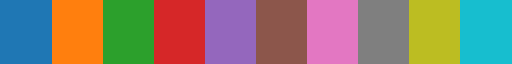

In [38]:
cmap

In [36]:
families_by_classes = pd.read_csv("families_by_classes_TE.csv").dropna()

families_by_classes = families_by_classes.set_index("family_name").reindex(family_names)
# families_by_classes = families_by_classes[families_by_classes.index!='NaN']
#
families_by_classes

Unnamed: 0  class_name
family_name                          
Alu                    10        SINE
L1                      0        LINE
MIR                    14        SINE
L2                     47        LINE
ERVL-MaLR               4         LTR
hAT-Charlie            20         DNA
ERV1                    1         LTR
ERVL                   74         LTR
TcMar-Tigger           25         DNA
hAT-Tip100            472         DNA
CR1                    79        LINE
Gypsy                 332         LTR
hAT-Blackjack         335         DNA
TcMar-Mariner        2930         DNA
RTE-X                  71        LINE
ERVK                  125         LTR
TcMar-Tc2            2960         DNA
SVA                   212  Retroposon
RTE-BovB             1931        LINE
tRNA-RTE             2518        SINE
hAT-Ac               2019         DNA
hAT                  2325         DNA
MULE-MuDR              21         DNA
PiggyBac             2217         DNA
5S-Deu-L2            2151        SINE
Helitron             2743          RC
hAT-Tag1              753         DNA
tRNA                 4126        SINE
Penelope             6829        LINE
TcMar-Tc1           13622         DNA
Dong-R4              7210        LINE
tRNA-Deu             1876        SINE
Kolobok             12751         DNA
PIF-Harbinger      105551         DNA
Crypton             96725         DNA
Merlin              18128         DNA
TcMar               12750         DNA
L1-Tx1              96250        LINE
Crypton-A          102283         DNA
I-Jockey             5128        LINE
hAT-Tip100?        106190         DNA
TcMar-Pogo          95495         DNA
hAT?                39523         DNA
hAT-hAT19          398940         DNA

### Clustermap of TE families epigenetic signal correlation with divergence

In [6]:
correlation_df_families = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families.csv", index_col=0
).T
family_names = list(correlation_df_families.columns[2:])
correlation_df_families[family_names] = correlation_df_families[family_names].apply(
    pd.to_numeric, errors="coerce"
)
correlation_df_families.index = (
    correlation_df_families.cell_line + " " + correlation_df_families.modification
)

correlation_df_families

cell_line modification       Alu        L1       MIR  \
Caco-2 H3K4me1      Caco-2      H3K4me1 -0.018999  0.039828 -0.026302   
Caco-2 H3K9me3      Caco-2      H3K9me3 -0.055464 -0.114642  0.025275   
SJCRH30 H3K27ac    SJCRH30      H3K27ac  0.004658  0.001126 -0.003323   
SJCRH30 H3K4me1    SJCRH30      H3K4me1  0.025348  0.043100 -0.015347   
SJCRH30 H3K9me3    SJCRH30      H3K9me3  0.046718 -0.139741  0.015748   
SJCRH30 H3K36me3   SJCRH30     H3K36me3  0.012634  0.050914 -0.019740   
SJCRH30 H3K27me3   SJCRH30     H3K27me3 -0.003710  0.043250  0.005764   
SJCRH30 H3K4me3    SJCRH30      H3K4me3  0.003112 -0.015858 -0.027011   
BE2C H3K4me1          BE2C      H3K4me1  0.041314  0.054200 -0.011134   
BE2C H3K9me3          BE2C      H3K9me3 -0.008656 -0.117563 -0.001378   
BE2C H3K36me3         BE2C     H3K36me3  0.004782  0.045786 -0.034943   
BE2C H3K27me3         BE2C     H3K27me3 -0.013872  0.012624 -0.010420   
SJSA1 H3K27ac        SJSA1      H3K27ac  0.005865  0.004154 -0.020720   
SJSA1 H3K9me3        SJSA1      H3K9me3 -0.011213 -0.139513  0.009278   
SJSA1 H3K36me3       SJSA1     H3K36me3 -0.021760  0.019699 -0.055987   
SJSA1 H3K27me3       SJSA1     H3K27me3  0.011577 -0.000492 -0.006481   
SJSA1 H3K4me3        SJSA1      H3K4me3 -0.048853 -0.036159 -0.048965   
HAP-1 H3K27ac        HAP-1      H3K27ac -0.032783  0.063530 -0.024079   
HAP-1 H3K4me1        HAP-1      H3K4me1 -0.000095  0.035104 -0.018752   
HAP-1 H3K9me3        HAP-1      H3K9me3 -0.060695 -0.120236 -0.001761   
HAP-1 H3K36me3       HAP-1     H3K36me3 -0.020728  0.028753 -0.039871   
HAP-1 H3K27me3       HAP-1     H3K27me3 -0.022448  0.003994 -0.003715   
HAP-1 H3K4me3        HAP-1      H3K4me3 -0.072175 -0.001014 -0.041865   
HL-60 H3K27ac        HL-60      H3K27ac  0.006864  0.016733 -0.030560   
MG63 H3K9me3          MG63      H3K9me3 -0.002477 -0.162041  0.006398   
MG63 H3K36me3         MG63     H3K36me3 -0.008182  0.031757 -0.052826   
MG63 H3K27me3         MG63     H3K27me3  0.004456 -0.021034  0.000735   
MG63 H3K4me3          MG63      H3K4me3 -0.019485 -0.000628 -0.025936   
VCaP CTCF             VCaP         CTCF -0.054272  0.038505 -0.011819   
VCaP H3K27ac          VCaP      H3K27ac -0.061690  0.078021 -0.065318   
C4-2B CTCF           C4-2B         CTCF  0.283179  0.083361  0.075631   
C4-2B H3K27ac        C4-2B      H3K27ac  0.073878  0.166842 -0.065155   
RWPE2 CTCF           RWPE2         CTCF -0.105675  0.024880 -0.009645   
RWPE2 H3K27ac        RWPE2      H3K27ac -0.080399  0.044321 -0.034500   
RWPE2 H3K36me3       RWPE2     H3K36me3 -0.005641  0.065377 -0.015556   
22Rv1 CTCF           22Rv1         CTCF -0.075691  0.034974 -0.041436   
22Rv1 H3K27ac        22Rv1      H3K27ac -0.053936  0.049112 -0.048360   
RWPE1 CTCF           RWPE1         CTCF -0.038531  0.134919  0.082707   
RWPE1 H3K27ac        RWPE1      H3K27ac -0.310074  0.155216 -0.072044   

                        L2  ERVL-MaLR  hAT-Charlie      ERV1      ERVL  ...  \
Caco-2 H3K4me1   -0.038961   0.046021     0.005669 -0.066147 -0.012520  ...   
Caco-2 H3K9me3    0.036340  -0.150697    -0.016158 -0.082342 -0.062872  ...   
SJCRH30 H3K27ac  -0.013861  -0.001626     0.001874  0.002776  0.010027  ...   
SJCRH30 H3K4me1  -0.024799   0.031292     0.005338  0.008450  0.015652  ...   
SJCRH30 H3K9me3   0.052215  -0.088099    -0.003821 -0.050797 -0.023002  ...   
SJCRH30 H3K36me3 -0.020157  -0.039108    -0.034510 -0.004914 -0.048668  ...   
SJCRH30 H3K27me3  0.005116   0.005281     0.009759 -0.006299  0.014119  ...   
SJCRH30 H3K4me3  -0.032358   0.000967    -0.007612 -0.006954 -0.006867  ...   
BE2C H3K4me1     -0.012436  -0.001139     0.000815 -0.001238  0.015808  ...   
BE2C H3K9me3      0.016489  -0.081324    -0.007354 -0.071925 -0.009094  ...   
BE2C H3K36me3    -0.038724  -0.031576    -0.031131 -0.035280 -0.031101  ...   
BE2C H3K27me3    -0.018230   0.009741     0.010628 -0.014129  0.021053  ...   
SJSA1 H3K27ac    -0.031004   0.011572     0.002475 -0.011153 -0.00478

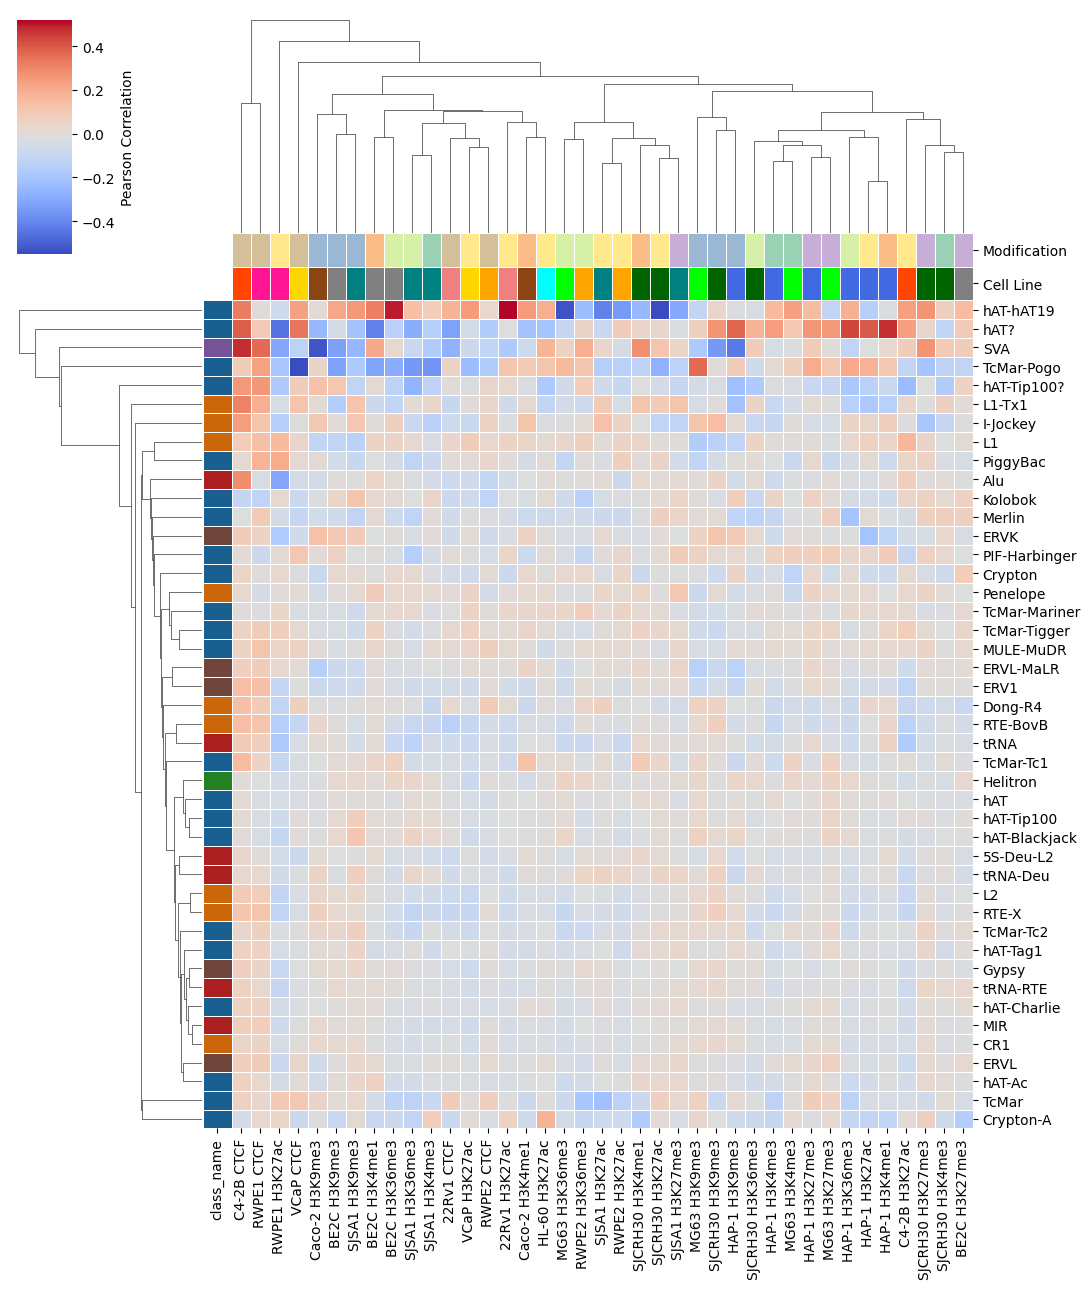

In [7]:
plt.rcParams["svg.fonttype"] = "none"

# --- 1. Prepare Row Colors ---
# Map the 'cell_line' and 'modification' columns to their respective colors


mapped_cell_colors = correlation_df_families["cell_line"].map(cell_line_p)
mapped_mod_colors = correlation_df_families["modification"].map(modification_p_richer)

families_counts = pd.read_csv("repeat_masker_family_name_counts.csv")
# families_counts

families_by_classes = pd.read_csv("families_by_classes_TE.csv").dropna()

families_by_classes = families_by_classes.set_index("family_name").reindex(family_names)
mapped_families_colors = families_by_classes["class_name"].map(class_names_p)

# Create a DataFrame for the row_colors argument
# The column names (e.g., 'Cell Line') will appear as labels.
row_colors_df = pd.DataFrame(
    {"Cell Line": mapped_cell_colors, "Modification": mapped_mod_colors}
)
# Important: The index must align with the data being plotted
row_colors_df.index = correlation_df_families.index


# --- 2. Plot the Clustermap ---
data_to_plot = correlation_df_families[family_names].T
data_to_plot

g = sns.clustermap(
    data_to_plot,
    cmap="coolwarm",
    # Goal 1: Customize figsize
    figsize=(11, 13),
    # Goal 2 & 3: Add row colors using the mapped palettes
    # We use row_colors, as 'cell_line' and 'modification' describe the rows
    col_colors=row_colors_df[["Modification", "Cell Line"]],
    row_colors=mapped_families_colors,
    # Other aesthetic improvements
    # vmin=-1, vmax=1,          # Set colorbar limits for correlation
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"},
    # metric='correlation'      # Use correlation for clustering distance
)

# --- 3. Save the Figure ---
save_path = "./plots/signal_to_divergence_corr_clustermap_families.svg"


# Goal 4: Save as SVG
g.savefig(save_path, format="svg")


plt.show()

INFO: Setting up the data and palettes...
  -> Preparing row and column colors...
  -> Generating initial clustermap...
  -> Preparing data for bar plot...
  -> Resizing axes and adding bar plot...
  -> Tidying up final plot...
SUCCESS: Clustermap saved to ./plots/signal_to_divergence_corr_clustermap_families_with_barplot.svg


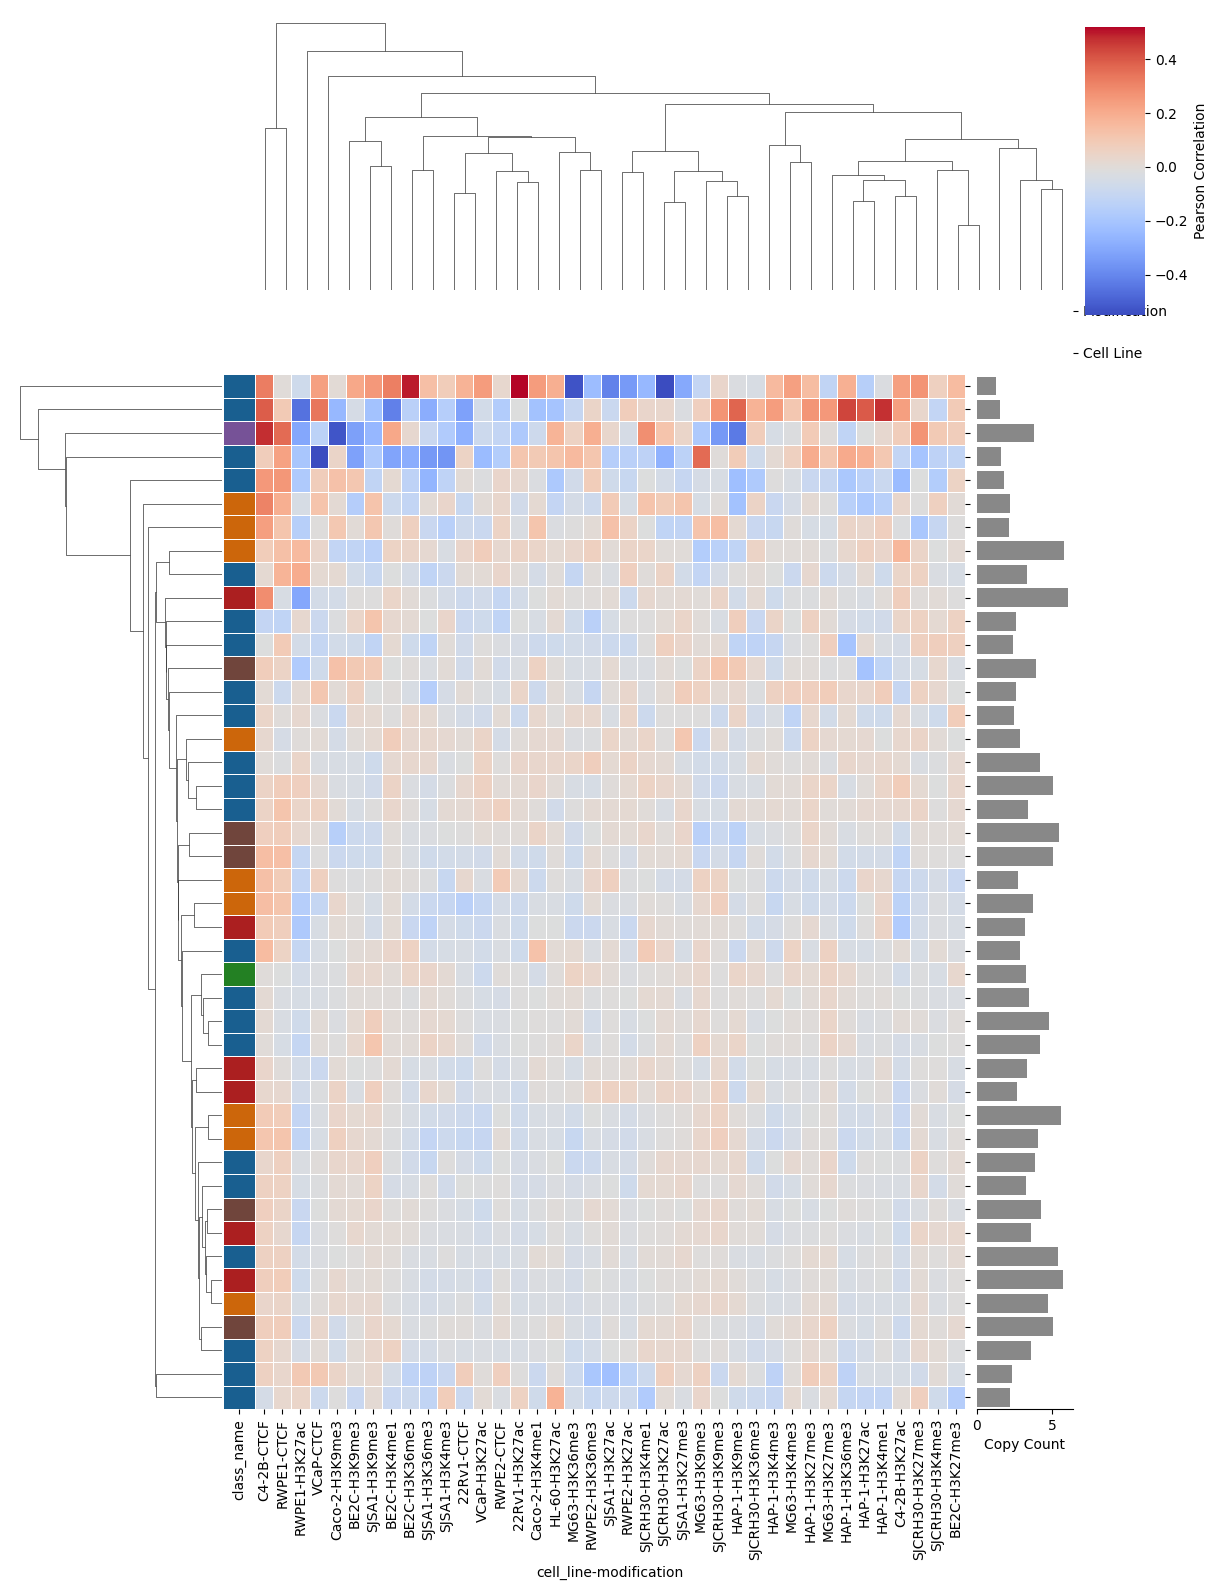

In [62]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec


# --- Setup: Helper Class for Colored Logging ---
class Logger:
    """A simple logger for pretty, colored console output."""

    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    ENDC = "\033[0m"

    @staticmethod
    def info(message):
        print(f"{Logger.BLUE}INFO: {message}{Logger.ENDC}")

    @staticmethod
    def success(message):
        print(f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}")

    @staticmethod
    def warning(message):
        print(f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}")

    @staticmethod
    def step(message):
        print(f"  -> {message}")


Logger.info("Setting up the data and palettes...")

families_counts = pd.read_csv("repeat_masker_family_name_counts.csv")
families_counts.columns = ["family_name", "count"]
families_counts["count"] = np.log10(families_counts["count"])

families_by_classes = pd.read_csv("families_by_classes_TE.csv").dropna()

# --- 1. Prepare Row Colors ---
Logger.step("Preparing row and column colors...")
# Map the 'cell_line' and 'modification' columns to their respective colors
mapped_cell_colors = correlation_df_families["cell_line"].map(cell_line_p)
mapped_mod_colors = correlation_df_families["modification"].map(modification_p_richer)

families_by_classes = families_by_classes.set_index("family_name").reindex(family_names)
mapped_families_colors = families_by_classes["class_name"].map(class_names_p)

# Create a DataFrame for the row_colors argument
row_colors_df = pd.DataFrame(
    {"Cell Line": mapped_cell_colors, "Modification": mapped_mod_colors}
)
row_colors_df.index = correlation_df_families.index

# --- 2. Plot the Clustermap ---
Logger.step("Generating initial clustermap...")
data_to_plot = correlation_df_families.set_index(["cell_line", "modification"])[
    family_names
].T

g = sns.clustermap(
    data_to_plot,
    cmap="coolwarm",
    figsize=(12, 16),
    # Column colors (for cell line and modification)
    col_colors=row_colors_df[["Modification", "Cell Line"]],
    # Row colors (for repeat class)
    row_colors=mapped_families_colors,
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"},
    # vmin=-1, vmax=1 # Good practice for correlation
)

# --- 3. Prepare Bar Plot Data ---
Logger.step("Preparing data for bar plot...")
# Get the reordered family names from the clustermap's row dendrogram
reordered_indices = g.dendrogram_row.reordered_ind
reordered_families = data_to_plot.index[reordered_indices]

# Load and prepare the counts data
# Set index to 'family_name' to allow reindexing
families_counts = families_counts.set_index("family_name")

# Reorder the counts to match the clustermap's row order
counts_reordered = families_counts.reindex(reordered_families)

# --- 4. Resize Axes and Add Bar Plot ---
Logger.step("Resizing axes and adding bar plot...")

# Get current positions
heatmap_pos = g.ax_heatmap.get_position()
cbar_pos = g.cax.get_position()

# Define new widths
bar_width = 0.08  # 8% of figure width for bars
space = 0.01

# Shrink heatmap to make space
new_heatmap_width = heatmap_pos.width - bar_width - space
g.ax_heatmap.set_position(
    [heatmap_pos.x0, heatmap_pos.y0, new_heatmap_width, heatmap_pos.height]
)

# Add new axis for the bar plot
bar_ax_left = heatmap_pos.x0 + new_heatmap_width + space
bar_ax = g.fig.add_axes([bar_ax_left, heatmap_pos.y0, bar_width, heatmap_pos.height])

# Move colorbar to the right of the new bar plot
new_cbar_left = bar_ax_left + bar_width + space
g.cax.set_position(
    [new_cbar_left, cbar_pos.y0, cbar_pos.width, cbar_pos.height]
)  # Keep original width

# --- 5. Plot the horizontal bar chart ---
sns.barplot(
    y=counts_reordered.index,
    x=counts_reordered["count"],  # Assumes 'count' column
    orient="h",
    ax=bar_ax,
    color="#888888",  # Neutral gray
)

# --- 6. Tidy up all axes ---
Logger.step("Tidying up final plot...")

# Tidy the new bar plot axis
bar_ax.set_yticks([])  # Remove y-tick labels
bar_ax.set_ylabel("")  # Remove y-axis label
bar_ax.set_xlabel("Copy Count")
bar_ax.spines["top"].set_visible(False)
bar_ax.spines["right"].set_visible(False)
bar_ax.spines["left"].set_visible(False)

# Tidy the main heatmap
g.ax_heatmap.set_yticklabels([])  # Remove family names (now redundant)
g.ax_heatmap.set_ylabel("")  # Remove row label

# --- 7. Save the Figure ---
save_path = "./plots/signal_to_divergence_corr_clustermap_families_with_barplot.svg"
os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Ensure dir exists

# Save as SVG
g.savefig(save_path, format="svg")
Logger.success(f"Clustermap saved to {save_path}")

plt.show()

In [9]:
(correlation_df_families[family_names].abs() > 0.3).sum().sum()

33

In [11]:
families_counts = pd.read_csv("repeat_masker_family_name_counts.csv")
families_counts

Unnamed: 0  family_name
0             Alu      1164096
1              L1       565459
2             MIR       534149
3              L2       373176
4       ERVL-MaLR       259882
5     hAT-Charlie       232104
6            ERV1       116610
7            ERVL       116199
8    TcMar-Tigger       106067
9      hAT-Tip100        57232
10            CR1        49193
11          Gypsy        18413
12  hAT-Blackjack        16167
13  TcMar-Mariner        15617
14          RTE-X        10790
15           ERVK         7870
16      TcMar-Tc2         6918
17            SVA         6274
18       RTE-BovB         5031
19       tRNA-RTE         4154
20         hAT-Ac         3692
21            hAT         3038
22      MULE-MuDR         2459
23       PiggyBac         2156
24      5S-Deu-L2         2019
25       Helitron         1869
26       hAT-Tag1         1849
27           tRNA         1612
28       Penelope          779
29      TcMar-Tc1          701
30        Dong-R4          503
31       tRNA-Deu          455
32        Kolobok          404
33  PIF-Harbinger          402
34        Crypton          305
35         Merlin          232
36          TcMar          223
37         L1-Tx1          151
38      Crypton-A          150
39       I-Jockey          132
40    hAT-Tip100?           67
41     TcMar-Pogo           37
42           hAT?           34
43      hAT-hAT19           18

In [32]:
1164096

individual_name
AluSx             301005.0
AluJb             251692.0
MIRb              206087.0
MIR               153574.0
AluY              111981.0
...                    ...
LTR16B1             1016.0
X7A_LINE            1014.0
MamTip3             1014.0
Ricksha_c           1005.0
MER45B              1001.0

[389 rows x 1 columns]

In [39]:
correlation_df_individuals = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals.csv", index_col=0
).T
individual_names = list(correlation_df_individuals.columns[2:])
individuals_counts = pd.read_csv("individuals_counts.csv", index_col=0)
individual_names = individuals_counts[individuals_counts > 1000].dropna().index

correlation_df_individuals[individual_names] = correlation_df_individuals[
    individual_names
].apply(pd.to_numeric, errors="coerce")
correlation_df_individuals.index = (
    correlation_df_individuals.cell_line + " " + correlation_df_individuals.modification
)
correlation_df_individuals

cell_line modification     AluSx     AluJb      MIRb  \
Caco-2 H3K4me1      Caco-2      H3K4me1 -0.052972 -0.038684 -0.028807   
Caco-2 H3K9me3      Caco-2      H3K9me3  0.022421  0.028375  0.029478   
SJCRH30 H3K27ac    SJCRH30      H3K27ac -0.009777 -0.002299 -0.006372   
SJCRH30 H3K4me1    SJCRH30      H3K4me1 -0.014957 -0.006218 -0.018500   
SJCRH30 H3K9me3    SJCRH30      H3K9me3  0.042684  0.084116  0.010189   
SJCRH30 H3K36me3   SJCRH30     H3K36me3 -0.018815 -0.005981 -0.021886   
SJCRH30 H3K27me3   SJCRH30     H3K27me3  0.015242  0.005782  0.004901   
SJCRH30 H3K4me3    SJCRH30      H3K4me3 -0.037038  0.001040 -0.029065   
BE2C H3K4me1          BE2C      H3K4me1 -0.001791  0.006137 -0.013195   
BE2C H3K9me3          BE2C      H3K9me3  0.024444  0.022137 -0.003193   
BE2C H3K36me3         BE2C     H3K36me3 -0.027554 -0.028845 -0.034523   
BE2C H3K27me3         BE2C     H3K27me3 -0.007855 -0.022128 -0.013787   
SJSA1 H3K27ac        SJSA1      H3K27ac -0.026542 -0.000016 -0.023221   
SJSA1 H3K9me3        SJSA1      H3K9me3  0.037961  0.040054  0.003804   
SJSA1 H3K36me3       SJSA1     H3K36me3 -0.054108 -0.060859 -0.059933   
SJSA1 H3K27me3       SJSA1     H3K27me3 -0.000893  0.007018 -0.013010   
SJSA1 H3K4me3        SJSA1      H3K4me3 -0.064432 -0.053504 -0.054862   
HAP-1 H3K27ac        HAP-1      H3K27ac -0.056162 -0.046328 -0.023060   
HAP-1 H3K4me1        HAP-1      H3K4me1 -0.038167 -0.024800 -0.020019   
HAP-1 H3K9me3        HAP-1      H3K9me3  0.014443  0.013346 -0.003329   
HAP-1 H3K36me3       HAP-1     H3K36me3 -0.040804 -0.048481 -0.040359   
HAP-1 H3K27me3       HAP-1     H3K27me3 -0.011400 -0.029197 -0.006737   
HAP-1 H3K4me3        HAP-1      H3K4me3 -0.075371 -0.070161 -0.045525   
HL-60 H3K27ac        HL-60      H3K27ac -0.041022 -0.034515 -0.031772   
MG63 H3K9me3          MG63      H3K9me3  0.035522  0.034956  0.004296   
MG63 H3K36me3         MG63     H3K36me3 -0.044606 -0.053923 -0.053079   
MG63 H3K27me3         MG63     H3K27me3  0.013711 -0.002632 -0.002922   
MG63 H3K4me3          MG63      H3K4me3 -0.049181 -0.033341 -0.026330   
VCaP CTCF             VCaP         CTCF -0.026321 -0.035603 -0.011959   
VCaP H3K27ac          VCaP      H3K27ac -0.100637 -0.118150 -0.070825   
C4-2B CTCF           C4-2B         CTCF  0.136469  0.218054  0.077509   
C4-2B H3K27ac        C4-2B      H3K27ac -0.000329 -0.008754 -0.071239   
RWPE2 CTCF           RWPE2         CTCF -0.064409 -0.050616 -0.009498   
RWPE2 H3K27ac        RWPE2      H3K27ac -0.089884 -0.083008 -0.035507   
RWPE2 H3K36me3       RWPE2     H3K36me3 -0.033183 -0.019170 -0.012243   
22Rv1 CTCF           22Rv1         CTCF -0.057215 -0.069052 -0.046581   
22Rv1 H3K27ac        22Rv1      H3K27ac -0.075143 -0.081915 -0.053517   
RWPE1 CTCF           RWPE1         CTCF -0.024902 -0.007694  0.093431   
RWPE1 H3K27ac        RWPE1      H3K27ac -0.217728 -0.323278 -0.066411   

                       MIR      AluY       L2a       L2c      MIRc  ...  \
Caco-2 H3K4me1   -0.034494 -0.031535 -0.056818 -0.041717 -0.020912  ...   
Caco-2 H3K9me3    0.024165  0.007901  0.049816  0.037477  0.020486  ...   
SJCRH30 H3K27ac   0.002921 -0.000292 -0.023053 -0.011112 -0.008896  ...   
SJCRH30 H3K4me1  -0.020164  0.009992 -0.037929 -0.022626 -0.014482  ...   
SJCRH30 H3K9me3  -0.008148  0.012966  0.030301  0.065822  0.029837  ...   
SJCRH30 H3K36me3 -0.039999  0.001519 -0.048617 -0.003991 -0.008851  ...   
SJCRH30 H3K27me3  0.018739  0.010426  0.023210 -0.003673  0.001604  ...   
SJCRH30 H3K4me3  -0.028119 -0.019895 -0.041831 -0.029203 -0.028308  ...   
BE2C H3K4me1     -0.014996  0.012292 -0.018156 -0.009834 -0.013538  ...   
BE2C H3K9me3      0.001323  0.021699  0.026984  0.014476 -0.002759  ...   
BE2C H3K36me3    -0.046058 -0.001889 -0.055606 -0.029731 -0.035494  ...   
BE2C H3K27me3    -0.015009 -0.010955 -0.033992 -0.018628 -0.009821  ...   
SJSA1 H3K27ac    -0.036751 -0.022583 -0.051973 -0.021525 -0.015157  ...   
SJSA1 H3K9me3     0.029572  0.022225  0.073440

### Clustering vs average divergence barplot

In [9]:
reordered_indices = g.dendrogram_row.reordered_ind
reordered_families = data_to_plot.index[reordered_indices]
reordered_families

Index(['hAT-hAT19', 'hAT?', 'SVA', 'TcMar-Pogo', 'hAT-Tip100?', 'L1-Tx1',
       'I-Jockey', 'L1', 'PiggyBac', 'Alu', 'Kolobok', 'Merlin', 'ERVK',
       'PIF-Harbinger', 'Crypton', 'Penelope', 'TcMar-Mariner', 'TcMar-Tigger',
       'MULE-MuDR', 'ERVL-MaLR', 'ERV1', 'Dong-R4', 'RTE-BovB', 'tRNA',
       'TcMar-Tc1', 'Helitron', 'hAT', 'hAT-Tip100', 'hAT-Blackjack',
       '5S-Deu-L2', 'tRNA-Deu', 'L2', 'RTE-X', 'TcMar-Tc2', 'hAT-Tag1',
       'Gypsy', 'tRNA-RTE', 'hAT-Charlie', 'MIR', 'CR1', 'ERVL', 'hAT-Ac',
       'TcMar', 'Crypton-A'],
      dtype='object')

In [12]:
repeat_masker = pd.read_csv("T2T_repeat_masker_processed.csv")
divergence_average = (
    repeat_masker[["score", "family_name"]].groupby("family_name").mean()
)
divergence_average

score
family_name              
5S-Deu-L2      274.594849
Alu            128.469531
CR1            297.187811
Crypton        258.075410
Crypton-A      269.426667
Dong-R4        291.055666
ERV1           162.706878
ERVK            85.526429
ERVL           237.092247
ERVL-MaLR      206.469882
Gypsy          280.009667
Helitron       272.493312
I-Jockey       265.628788
Kolobok        252.529703
L1             188.191328
L1-Tx1         281.615894
L2             293.631268
MIR            283.447165
MULE-MuDR      185.628304
Merlin         222.560345
PIF-Harbinger  266.902985
Penelope       236.486521
PiggyBac       127.058442
RTE-BovB       305.746571
RTE-X          283.670621
SVA            165.980714
TcMar          265.394619
TcMar-Mariner  154.895114
TcMar-Pogo     250.918919
TcMar-Tc1      224.900143
TcMar-Tc2      242.244290
TcMar-Tigger   210.427183
hAT            261.094141
hAT-Ac         255.922806
hAT-Blackjack  227.372054
hAT-Charlie    233.112648
hAT-Tag1       260.031909
hAT-Tip100     256.443388
hAT-Tip100?    266.283582
hAT-hAT19      226.222222
hAT?           226.441176
tRNA           294.238213
tRNA-Deu       278.639560
tRNA-RTE       311.306211

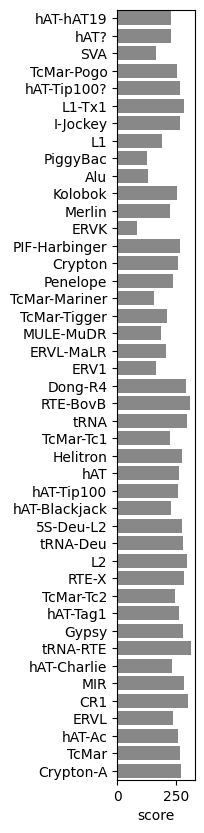

In [18]:
# Get the reordered family names from the clustermap's row dendrogram
reordered_indices = g.dendrogram_row.reordered_ind
reordered_families = data_to_plot.index[reordered_indices]

# Load and prepare the counts data
# Set index to 'family_name' to allow reindexing


# Reorder the counts to match the clustermap's row order
divergence_average = divergence_average.reindex(reordered_families)

# Define new widths
bar_width = 0.08  # 8% of figure width for bars
space = 0.01

fig, ax = plt.subplots(figsize=(1, 10))
# --- 5. Plot the horizontal bar chart ---
sns.barplot(
    y=divergence_average.index,
    x=divergence_average["score"],  # Assumes 'count' column
    orient="h",
    # ax=bar_ax,
    color="#888888",  # Neutral gray
)

save_path = "./plots/average_divergence_families_barplot.svg"
# Save as SVG
plt.savefig(save_path, format="svg")

plt.show()

### Connection of correlation with average divergence and count by family

In [13]:
correlation_df_families = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families_detailed.csv", index_col=0
)
correlation_df_families['abs_r'] = correlation_df_families.r.abs()
corrs_average = correlation_df_families[['cell_line', 'modification', 'family_name', 'abs_r']].groupby(['family_name']).mean()


repeat_masker = pd.read_csv("T2T_repeat_masker_processed.csv")
divergence_average = (
    repeat_masker[["score", "family_name"]]
    .groupby("family_name")
    .mean()["score"]
    .reindex(corrs_average.index)
)

families_counts = pd.read_csv("repeat_masker_family_name_counts.csv")
families_counts.columns = ["family_name", "count"]
families_counts["log10_count"] = np.log10(families_counts["count"])
families_counts = families_counts.set_index("family_name").reindex(corrs_average.index)


families_by_classes = pd.read_csv("families_by_classes_TE.csv").dropna()

families_by_classes = families_by_classes.set_index("family_name").reindex(
    corrs_average.index
)

data_to_plot = pd.concat(
    [
        corrs_average,
        divergence_average,
        families_counts[["count", "log10_count"]],
        families_by_classes["class_name"],
    ],
    axis=1,
)
data_to_plot.columns = [
    "average_abs_corr",
    "average_divergence",
    "count",
    "log10_count",
    "class_name",
]
data_relevant = data_to_plot.copy()
data_to_plot

/tmp/ipykernel_277/2386127455.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corrs_average = correlation_df_families[['cell_line', 'modification', 'family_name', 'abs_r']].groupby(['family_name']).mean()


average_abs_corr  average_divergence    count  log10_count  \
family_name                                                                 
5S-Deu-L2              0.028923          274.594849     2019     3.305136   
Alu                    0.044407          128.469531  1164096     6.065989   
CR1                    0.029562          297.187811    49193     4.691903   
Crypton                0.041049          258.075410      305     2.484300   
Crypton-A              0.067592          269.426667      150     2.176091   
Dong-R4                0.049720          291.055666      503     2.701568   
ERV1                   0.048118          162.706878   116610     5.066736   
ERVK                   0.051387           85.526429     7870     3.895975   
ERVL                   0.029204          237.092247   116199     5.065202   
ERVL-MaLR              0.036391          206.469882   259882     5.414776   
Gypsy                  0.025038          280.009667    18413     4.265125   
Helitron               0.026030          272.493312     1869     3.271609   
I-Jockey               0.075179          265.628788      132     2.120574   
Kolobok                0.049701          252.529703      404     2.606381   
L1                     0.057410          188.191328   565459     5.752401   
L1-Tx1                 0.081154          281.615894      151     2.178977   
L2                     0.041091          293.631268   373176     5.571914   
MIR                    0.028371          283.447165   534149     5.727662   
MULE-MuDR              0.026269          185.628304     2459     3.390759   
Merlin                 0.061194          222.560345      232     2.365488   
PIF-Harbinger          0.045044          266.902985      402     2.604226   
Penelope               0.030061          236.486521      779     2.891537   
PiggyBac               0.050270          127.058442     2156     3.333649   
RTE-BovB               0.058600          305.746571     5031     3.701654   
RTE-X                  0.052189          283.670621    10790     4.033021   
SVA                    0.165532          165.980714     6274     3.797545   
TcMar                  0.067887          265.394619      223     2.348305   
TcMar-Mariner          0.030025          154.895114    15617     4.193598   
TcMar-Pogo             0.173621          250.918919       37     1.568202   
TcMar-Tc1              0.043846          224.900143      701     2.845718   
TcMar-Tc2              0.035866          242.244290     6918     3.839981   
TcMar-Tigger           0.035438          210.427183   106067     5.025580   
hAT                    0.017057          261.094141     3038     3.482588   
hAT-Ac                 0.032545          255.922806     3692     3.567262   
hAT-Blackjack          0.028106          227.372054    16167     4.208629   
hAT-Charlie            0.023707          233.112648   232104     5.365683   
hAT-Tag1               0.030940          260.031909     1849     3.266937   
hAT-Tip100             0.019750          256.443388    57232     4.757639   
hAT-Tip100?            0.103786          266.283582       67     1.826075   
hAT-hAT19              0.208021          226.222222       18     1.255273   
hAT?                   0.197891          226.441176       34     1.531479   
tRNA                   0.049996          294.238213     1612     3.207365   
tRNA-Deu               0.033914          278.639560      455     2.658011   
tRNA-RTE               0.026344          311.306211     4154     3.618466   

               class_name  
family_name                
5S-Deu-L2            SINE  
Alu                  SINE  
CR1                  LINE  
Crypton               DNA  
Crypton-A             DNA  
Dong-R4              LINE  
ERV1                  LTR  
ERVK                  LTR  
ERVL                  LTR  
ERVL-MaLR             LTR  
Gypsy                 LTR  
Helitron               RC  
I-Jockey             LINE  
Kolobok               DNA  
L1                   LIN

<AxesSubplot:xlabel='log10_count', ylabel='average_abs_corr'>

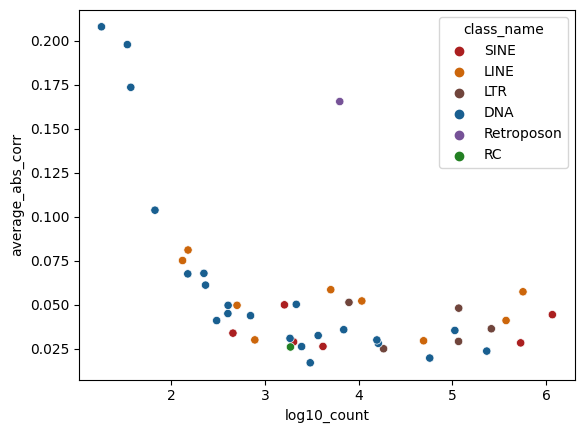

In [9]:
sns.scatterplot(
    data=data_to_plot,
    hue="class_name",
    x="log10_count",
    y="average_abs_corr",
    palette=class_names_p,
)

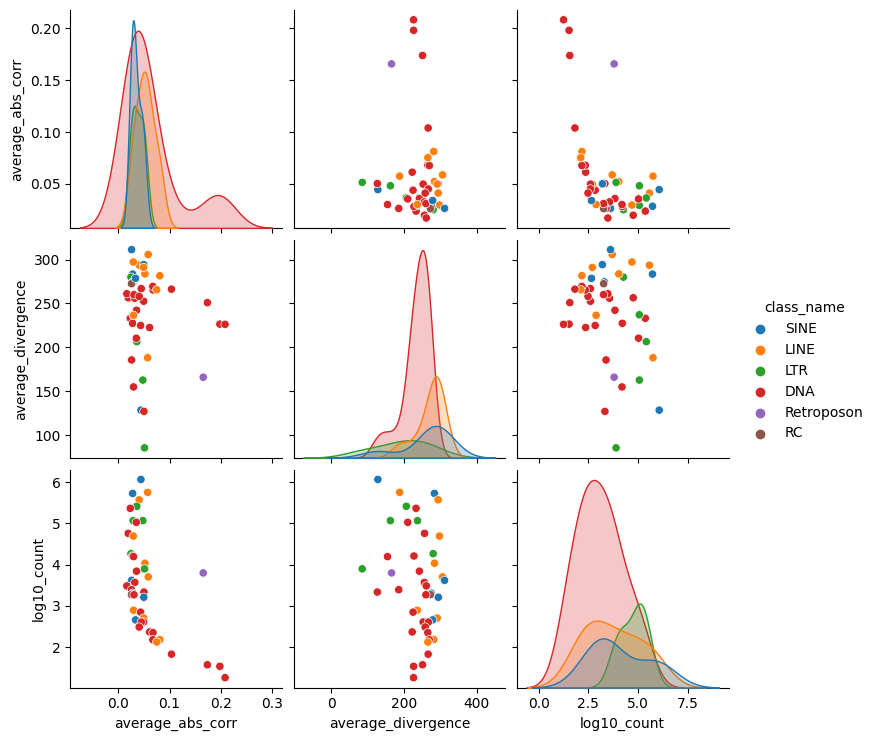

In [35]:
sns.pairplot(
    data=data_to_plot[
        [
            "average_abs_corr",
            "average_divergence",
            "log10_count",
            "class_name",
        ]
    ],
    hue="class_name",
)

In [17]:
?curve_fit

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initial values will all be 1 (if the number of parameters for the
    func

In [11]:
 data_to_plot[["log10_count", "average_abs_corr"]]

log10_count  average_abs_corr
family_name                                 
5S-Deu-L2         3.305136          0.020390
Alu               6.065989          0.000798
CR1               4.691903          0.003917
Crypton           2.484300          0.045844
Crypton-A         2.176091          0.064061
Dong-R4           2.701568          0.036567
ERV1              5.066736          0.002291
ERVK              3.895975          0.008376
ERVL              5.065202          0.002079
ERVL-MaLR         5.414776          0.001884
Gypsy             4.265125          0.006330
Helitron          3.271609          0.018539
I-Jockey          2.120574          0.067894
Kolobok           2.606381          0.035333
L1                5.752401          0.001139
L1-Tx1            2.178977          0.073233
L2                5.571914          0.001650
MIR               5.727662          0.001253
MULE-MuDR         3.390759          0.014866
Merlin            2.365488          0.047028
PIF-Harbinger     2.604226          0.035210
Penelope          2.891537          0.031258
PiggyBac          3.333649          0.015159
RTE-BovB          3.701654          0.010934
RTE-X             4.033021          0.007241
SVA               3.797545          0.009974
TcMar             2.348305          0.052242
TcMar-Mariner     4.193598          0.006687
TcMar-Pogo        1.568202          0.110160
TcMar-Tc1         2.845718          0.033227
TcMar-Tc2         3.839981          0.009499
TcMar-Tigger      5.025580          0.002759
hAT               3.482588          0.014619
hAT-Ac            3.567262          0.011862
hAT-Blackjack     4.208629          0.006527
hAT-Charlie       5.365683          0.001714
hAT-Tag1          3.266937          0.016249
hAT-Tip100        4.757639          0.003552
hAT-Tip100?       1.826075          0.102978
hAT-hAT19         1.255273          0.181299
hAT?              1.531479          0.133968
tRNA              3.207365          0.019583
tRNA-Deu          2.658011          0.051837
tRNA-RTE          3.618466          0.014783

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit


In [26]:
??curve_fit

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=None,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    nan_policy=None,
    **kwargs,
)
Source:   
def curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False,
              check_finite=None, bounds=(-np.inf, np.inf), method=None,
              jac=None, *, full_output=False, nan_policy=None,
              **kwargs):
    """
    Use non-linear least squares to fit a function, f, to data.

    Assumes ``ydata = f(xdata, *params) + eps``.

    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for


Fitting sigmoidal curve...
Generating plot...
Plot saved to ./plots/abs_average_corr_vs_count_TE_random.svg


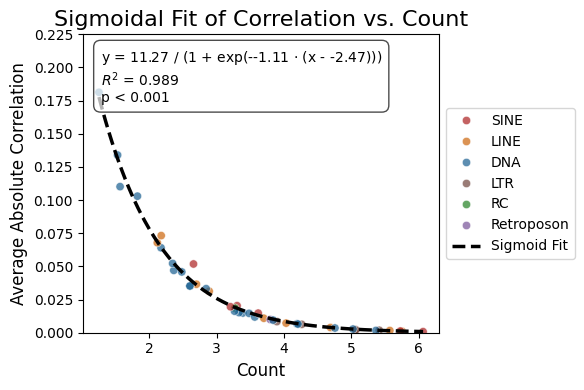

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

plt.rcParams["svg.fonttype"] = "none"  # For clean SVG text


# --- 2. Define the sigmoidal function ---
def sigmoid(x, L, k, x0):
    """
    Sigmoidal (logistic) function.
    L: maximum value (the asymptote)
    k: steepness of the curve
    x0: the x-value of the sigmoid's midpoint
    """
    return L / (1 + np.exp(-k * (x - x0)))


# --- 3. Prepare data and perform the fit ---
print("Fitting sigmoidal curve...")

# Drop NaNs to ensure alignment and prevent errors
fit_data = data_to_plot[["log10_count", "average_abs_corr"]].dropna()
x_data = fit_data["log10_count"]
y_data = fit_data["average_abs_corr"]

# Provide initial guesses for the parameters [L, k, x0]
# L: guess the max value of y
# k: guess 1 (steepness)
# x0: guess the median value of x
p0 = [y_data.max(), 1, x_data.median()]

try:
    # Fit the curve
    popt, pcov = curve_fit(sigmoid, x_data, y_data, p0=p0, maxfev=5000)
    L, k, x0 = popt
    fit_successful = True

    # --- 4. Calculate Statistics (R-squared and p-value) ---
    # Get the predicted y-values from the fit
    y_pred = sigmoid(x_data, *popt)

    # Calculate R-squared
    # (using Pearson correlation between actual and predicted)
    corr, p_value = stats.pearsonr(y_data, y_pred)
    r_squared = corr**2

    # Format p-value for display
    if p_value < 0.001:
        p_val_str = "p < 0.001"
    else:
        p_val_str = f"p = {p_value:.3f}"

    # Create the equation string for the plot
    equation_text = (
        f"y = {L:.2f} / (1 + exp(-{k:.2f} $\\cdot$ (x - {x0:.2f})))\n"
        f"$R^2$ = {r_squared:.3f}\n"
        f"{p_val_str}"
    )

except RuntimeError:
    # This happens if the curve fit fails to converge
    print("Sigmoidal curve fit failed to converge.")
    fit_successful = False
    equation_text = "Fit failed to converge"


# --- 5. Create the Plot ---
print("Generating plot...")
# Create the figure and axes (for figsize customization)
fig, ax = plt.subplots(figsize=(7, 4))

# Draw the scatterplot onto the axis
sns.scatterplot(
    data=data_to_plot,
    hue="class_name",
    x="log10_count",
    y="average_abs_corr",
    palette=class_names_p,
    ax=ax,
    alpha=0.7,
)

if fit_successful:
    # --- 6. Plot the Fitted Curve ---
    # Create a smooth x-axis for the curve
    x_fit = np.linspace(x_data.min(), x_data.max(), 200)
    y_fit = sigmoid(x_fit, *popt)

    # Plot the curve
    ax.plot(x_fit, y_fit, color="black", ls="--", lw=2.5, label="Sigmoid Fit")

    # --- 7. Add the Equation Textbox ---
    ax.text(
        0.05,
        0.95,  # Position in (x, y) coordinates (0.05=5% from left, 0.95=95% from top)
        equation_text,
        transform=ax.transAxes,  # Use axis-relative coordinates
        fontsize=10,
        verticalalignment="top",
        ha="left",
        # Add a light background box
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.5"),
    )

# --- 8. Tidy Up and Save ---
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_title("Sigmoidal Fit of Correlation vs. Count", fontsize=16)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Average Absolute Correlation", fontsize=12)
ax.set_ylim((0, 0.225))

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space for the legend

# Save to SVG
save_path = "./plots/abs_average_corr_vs_count_TE_random.svg"
fig.savefig(save_path, format="svg")
print(f"Plot saved to {save_path}")

plt.show()

#### Random correlations

In [12]:
correlation_df_families = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families_detailed_random.csv", index_col=0
)
correlation_df_families['abs_r'] = correlation_df_families.r.abs()
corrs_average = correlation_df_families[['cell_line', 'modification', 'family_name', 'abs_r']].groupby(['family_name']).mean()


repeat_masker = pd.read_csv("T2T_repeat_masker_processed.csv")
divergence_average = (
    repeat_masker[["score", "family_name"]]
    .groupby("family_name")
    .mean()["score"]
    .reindex(corrs_average.index)
)

families_counts = pd.read_csv("repeat_masker_family_name_counts.csv")
families_counts.columns = ["family_name", "count"]
families_counts["log10_count"] = np.log10(families_counts["count"])
families_counts = families_counts.set_index("family_name").reindex(corrs_average.index)


families_by_classes = pd.read_csv("families_by_classes_TE.csv").dropna()

families_by_classes = families_by_classes.set_index("family_name").reindex(
    corrs_average.index
)

data_control = pd.concat(
    [
        corrs_average,
        divergence_average,
        families_counts[["count", "log10_count"]],
        families_by_classes["class_name"],
    ],
    axis=1,
)
data_control.columns = [
    "average_abs_corr",
    "average_divergence",
    "count",
    "log10_count",
    "class_name",
]
data_control

/tmp/ipykernel_277/3774500693.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corrs_average = correlation_df_families[['cell_line', 'modification', 'family_name', 'abs_r']].groupby(['family_name']).mean()


average_abs_corr  average_divergence    count  log10_count  \
family_name                                                                 
5S-Deu-L2              0.020390          274.594849     2019     3.305136   
Alu                    0.000798          128.469531  1164096     6.065989   
CR1                    0.003917          297.187811    49193     4.691903   
Crypton                0.045844          258.075410      305     2.484300   
Crypton-A              0.064061          269.426667      150     2.176091   
Dong-R4                0.036567          291.055666      503     2.701568   
ERV1                   0.002291          162.706878   116610     5.066736   
ERVK                   0.008376           85.526429     7870     3.895975   
ERVL                   0.002079          237.092247   116199     5.065202   
ERVL-MaLR              0.001884          206.469882   259882     5.414776   
Gypsy                  0.006330          280.009667    18413     4.265125   
Helitron               0.018539          272.493312     1869     3.271609   
I-Jockey               0.067894          265.628788      132     2.120574   
Kolobok                0.035333          252.529703      404     2.606381   
L1                     0.001139          188.191328   565459     5.752401   
L1-Tx1                 0.073233          281.615894      151     2.178977   
L2                     0.001650          293.631268   373176     5.571914   
MIR                    0.001253          283.447165   534149     5.727662   
MULE-MuDR              0.014866          185.628304     2459     3.390759   
Merlin                 0.047028          222.560345      232     2.365488   
PIF-Harbinger          0.035210          266.902985      402     2.604226   
Penelope               0.031258          236.486521      779     2.891537   
PiggyBac               0.015159          127.058442     2156     3.333649   
RTE-BovB               0.010934          305.746571     5031     3.701654   
RTE-X                  0.007241          283.670621    10790     4.033021   
SVA                    0.009974          165.980714     6274     3.797545   
TcMar                  0.052242          265.394619      223     2.348305   
TcMar-Mariner          0.006687          154.895114    15617     4.193598   
TcMar-Pogo             0.110160          250.918919       37     1.568202   
TcMar-Tc1              0.033227          224.900143      701     2.845718   
TcMar-Tc2              0.009499          242.244290     6918     3.839981   
TcMar-Tigger           0.002759          210.427183   106067     5.025580   
hAT                    0.014619          261.094141     3038     3.482588   
hAT-Ac                 0.011862          255.922806     3692     3.567262   
hAT-Blackjack          0.006527          227.372054    16167     4.208629   
hAT-Charlie            0.001714          233.112648   232104     5.365683   
hAT-Tag1               0.016249          260.031909     1849     3.266937   
hAT-Tip100             0.003552          256.443388    57232     4.757639   
hAT-Tip100?            0.102978          266.283582       67     1.826075   
hAT-hAT19              0.181299          226.222222       18     1.255273   
hAT?                   0.133968          226.441176       34     1.531479   
tRNA                   0.019583          294.238213     1612     3.207365   
tRNA-Deu               0.051837          278.639560      455     2.658011   
tRNA-RTE               0.014783          311.306211     4154     3.618466   

               class_name  
family_name                
5S-Deu-L2            SINE  
Alu                  SINE  
CR1                  LINE  
Crypton               DNA  
Crypton-A             DNA  
Dong-R4              LINE  
ERV1                  LTR  
ERVK                  LTR  
ERVL                  LTR  
ERVL-MaLR             LTR  
Gypsy                 LTR  
Helitron               RC  
I-Jockey             LINE  
Kolobok               DNA  
L1                   LIN

#### Compare random and relevant via F-Test for Nested Models

In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats

def sigmoid_decay(x, L, k, x0):
    """
    Sigmoidal decay (inverse logistic) function.
    L: maximum value (the asymptote)
    k: steepness of the curve
    x0: the x-value of the sigmoid's midpoint
    """
    return L / (1 + np.exp(k * (x - x0)))

def get_rss(y_true, y_pred):
    """Calculates the Residual Sum of Squares."""
    return np.sum((y_true - y_pred)**2)

def fit_sigmoid(x_data, y_data):
    """
    Fits a sigmoid_decay curve to X and Y data.
    Returns the optimal parameters and the RSS.
    """
    # Provide initial guesses for [L, k, x0]
    # L: guess the max value of y
    # k: guess 1.0 (steepness)
    # x0: guess the median value of x
    p0 = [np.max(y_data), 1.0, np.median(x_data)]
    
    try:
        popt, _ = curve_fit(sigmoid_decay, x_data, y_data, p0=p0, maxfev=5000)
        # Calculate RSS
        y_pred = sigmoid_decay(x_data, *popt)
        rss = get_rss(y_data, y_pred)
        return popt, rss
    except RuntimeError as e:
        print(f"Error: Curve fitting failed - {e}")
        return None, np.inf


# --- 2. Combine Datasets ---
data_relevant['group'] = 'relevant'
data_control['group'] = 'control'
data_all = pd.concat([data_relevant, data_control]).reset_index(drop=True)

# Define X and Y for all datasets
x_all = data_all['log10_count']
y_all = data_all['average_abs_corr']

x_rel = data_relevant['log10_count']
y_rel = data_relevant['average_abs_corr']

x_con = data_control['log10_count']
y_con = data_control['average_abs_corr']

N_all = len(data_all)
N_rel = len(data_relevant)
N_con = len(data_control)

# --- 3. Fit the Null Model (H₀) ---
# H₀: One single curve fits all data.
print("--- Fitting Null Model (H₀) ---")
popt_null, RSS_null = fit_sigmoid(x_all, y_all)
if RSS_null == np.inf:
    print("FATAL: Could not fit the Null Model. Stopping.")
else:
    K_null = 3 # 3 parameters (L, k, x0)
    df_null = N_all - K_null
    print(f"  - RSS_null: {RSS_null:.4f}")
    print(f"  - df_null (N - K_null): {df_null}")


    # --- 4. Fit the Alternative Model (H₁) ---
    # H₁: Two separate curves (one for each group) fit the data.
    print("\n--- Fitting Alternative Model (H₁) ---")
    popt_rel, RSS_relevant = fit_sigmoid(x_rel, y_rel)
    popt_con, RSS_control = fit_sigmoid(x_con, y_con)
    
    if RSS_relevant == np.inf or RSS_control == np.inf:
        print("FATAL: Could not fit one of the alternative models. Stopping.")
    else:
        RSS_alt = RSS_relevant + RSS_control
        K_alt = 6 # 3 params for 'relevant' + 3 params for 'control'
        df_alt = N_all - K_alt  # (or (N_rel - 3) + (N_con - 3))
        
        print(f"  - RSS_relevant: {RSS_relevant:.4f}")
        print(f"  - RSS_control: {RSS_control:.4f}")
        print(f"  - RSS_alt (combined): {RSS_alt:.4f}")
        print(f"  - df_alt (N - K_alt): {df_alt}")

        
        # --- 5. Perform the F-Test ---
        print("\n--- F-Test Results ---")
        
        # Degrees of freedom for the test
        df1 = df_null - df_alt  # Number of *extra* parameters (K_alt - K_null = 3)
        df2 = df_alt            # Degrees of freedom of the full (alternative) model
        
        # Calculate the F-statistic
        F_statistic = ((RSS_null - RSS_alt) / df1) / (RSS_alt / df2)
        
        # Get the p-value from the F-distribution
        # stats.f.sf is the survival function (1 - cdf), which is what we want
        p_value = stats.f.sf(F_statistic, df1, df2)
        
        print(f"  - F-statistic: {F_statistic:.4f}")
        print(f"  - p-value: {p_value:.4e}") # Scientific notation
        
        print("\n--- Conclusion ---")
        if p_value < 0.05:
            print(f"p < 0.05. We REJECT the null hypothesis.")
            print("The two sigmoid curves are STATISTICALLY SIGNIFICANTLY DIFFERENT.")
        else:
            print(f"p >= 0.05. We FAIL to reject the null hypothesis.")
            print("The two curves are NOT statistically different.")

--- Fitting Null Model (H₀) ---
  - RSS_null: 0.0508
  - df_null (N - K_null): 85

--- Fitting Alternative Model (H₁) ---
  - RSS_relevant: 0.0414
  - RSS_control: 0.0007
  - RSS_alt (combined): 0.0422
  - df_alt (N - K_alt): 82

--- F-Test Results ---
  - F-statistic: 5.6299
  - p-value: 1.4704e-03

--- Conclusion ---
p < 0.05. We REJECT the null hypothesis.
The two sigmoid curves are STATISTICALLY SIGNIFICANTLY DIFFERENT.


This is an excellent statistical question. The situation you're in—where even your "random" control shows a pattern—is a very common and important finding.Your images are perfect examples. The "Sigmoidal Fit" (Image 2, $R^2 = 0.989$) fits beautifully, while your "Biologically Relevant" data (Image 1, $R^2 = 0.579$) is much, much noisier.The core question is: "Is the relationship between Count and Correlation in my relevant data significantly different from the relationship in my control data?"You can't just compare p-values or $R^2$ values directly. You need to test if the parameters that define the curves are statistically different.Here is the most rigorous method to do this, often called a Sum-of-Squares F-test for non-linear model comparison.The "Gold Standard" Method: F-Test for Nested ModelsThis method tests whether fitting two separate sigmoid curves (one for "Relevant" and one for "Control") is significantly better than fitting just one curve to all the data combined.Here is the step-by-step logic:1. Combine Your DataFirst, combine both datasets into a single, larger dataset. You must add a "dummy" or "indicator" variable to keep track of which group each data point belongs to.log10_countaverage_abs_corrgroup2.10.125'relevant'3.40.045'relevant'.........2.20.115'control'3.50.030'control'.........2. Fit the "Null" Model (H₀)The "Null Hypothesis" (H₀) is that there is no difference between the groups.To model this, you fit one single sigmoid curve to all the data combined, ignoring the group column.y = L / (1 + exp(-k * (x - x0)))After fitting, you calculate the Residual Sum of Squares (RSS) for this one model. Let's call it RSS_null.You also record the degrees of freedom: df_null = (total_N) - 3 (where N is the total number of points, and 3 is the number of parameters: L, k, x0).3. Fit the "Alternative" Model (H₁)The "Alternative Hypothesis" (H₁) is that the groups are different.To model this, you fit two separate sigmoid curves:Fit one curve only to the 'relevant' data. Get its RSS_relevant.Fit another curve only to the 'control' data. Get its RSS_control.Your total residual sum of squares is the sum of these two: RSS_alt = RSS_relevant + RSS_control.You record the degrees of freedom: df_alt = (n_relevant - 3) + (n_control - 3) or simply (total_N) - 6.4. Compare the Models with an F-TestYou now test if the reduction in error (from RSS_null to RSS_alt) is statistically significant.You calculate an F-statistic:$$F = \frac{(RSS_{null} - RSS_{alt}) / (df_{null} - df_{alt})}{(RSS_{alt}) / (df_{alt})}$$RSS_null - RSS_alt = The improvement in fit.df_null - df_alt = The number of extra parameters you used. (e.g., 6 parameters in the 'alt' model - 3 in the 'null' model = 3).(RSS_alt) / (df_alt) = The variance of the full model.You then calculate a p-value from this F-statistic (using the F-distribution with df1 = (df_null - df_alt) and df2 = df_alt).InterpretationIf p-value < 0.05: You have a statistically significant result. You can reject the null hypothesis. This proves that fitting two separate curves is significantly better than fitting one. You can conclude the two sigmoid curves are statistically different.If p-value > 0.05: You cannot conclude the curves are different. The extra complexity of the two-curve model was not justified by the data.

MOVE TO METHODS

### Analyze correlation coefficients with limits

In [25]:
correlation_df_families = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families_detailed.csv", index_col=0
)
correlation_df_families

cell_line modification  family_name         r        p_value    ci_low  \
0       Caco-2      H3K4me1          Alu -0.018999   9.413005e-91 -0.020842   
1       Caco-2      H3K4me1           L1  0.039828  2.939889e-195  0.037212   
2       Caco-2      H3K4me1          MIR -0.026302   9.525628e-82 -0.028992   
3       Caco-2      H3K4me1           L2 -0.038961  7.972509e-125 -0.042170   
4       Caco-2      H3K4me1    ERVL-MaLR  0.046021  3.609070e-120  0.042157   
...        ...          ...          ...       ...            ...       ...   
1711     RWPE1      H3K27ac     I-Jockey -0.152187   8.150290e-02 -0.314872   
1712     RWPE1      H3K27ac  hAT-Tip100? -0.177404   1.509428e-01 -0.400544   
1713     RWPE1      H3K27ac   TcMar-Pogo -0.195555   2.460773e-01 -0.488614   
1714     RWPE1      H3K27ac         hAT? -0.455448   6.795584e-03 -0.687697   
1715     RWPE1      H3K27ac    hAT-hAT19 -0.072620   7.746032e-01 -0.521799   

       ci_high  
0    -0.017156  
1     0.042444  
2    -0.023611  
3    -0.035751  
4     0.049884  
...        ...  
1711  0.019184  
1712  0.065600  
1713  0.137154  
1714 -0.138634  
1715  0.408086  

[1716 rows x 7 columns]

In [19]:
from statsmodels.stats.multitest import multipletests

reject, p_adjusted, _, _ = multipletests(
    correlation_df_families["p_value"], alpha=0.05, method="fdr_bh"
)

correlation_df_families["q_value"] = p_adjusted
p_adjusted

array([1.14558273e-089, 6.07813221e-194, 1.08251506e-080, ...,
       4.02203778e-001, 1.89275854e-002, 8.73850803e-001])

In [21]:
correlation_df_families[correlation_df_families["ci_low"] > 0.2]

cell_line modification family_name         r        p_value    ci_low  \
149    SJCRH30      H3K4me1         SVA  0.279601  3.162410e-107  0.256002   
281    SJCRH30     H3K27me3         SVA  0.267647   4.115463e-98  0.243891   
1320     C4-2B         CTCF         Alu  0.283179   0.000000e+00  0.281483   
1337     C4-2B         CTCF         SVA  0.476818   0.000000e+00  0.456948   
1645     RWPE1         CTCF         SVA  0.362635  2.814538e-186  0.340478   

       ci_high        q_value  
149   0.302868  4.341356e-106  
281   0.291081   5.350102e-97  
1320  0.284874   0.000000e+00  
1337  0.496213   0.000000e+00  
1645  0.384390  5.615985e-185

In [20]:
correlation_df_families[correlation_df_families["ci_high"] < -0.2]

cell_line modification family_name         r        p_value    ci_low  \
61      Caco-2      H3K9me3         SVA -0.526175   0.000000e+00 -0.544292   
193    SJCRH30      H3K9me3         SVA -0.352966  3.574876e-174 -0.375009   
413       BE2C      H3K9me3         SVA -0.329192  2.507600e-150 -0.351665   
589      SJSA1      H3K9me3         SVA -0.255759   2.003634e-90 -0.279230   
853      HAP-1      H3K9me3         SVA -0.437113  2.158086e-275 -0.457473   
1273      VCaP         CTCF  TcMar-Pogo -0.550006   4.211938e-04 -0.741823   
1557     22Rv1         CTCF         SVA -0.276669  3.068330e-106 -0.299833   
1672     RWPE1      H3K27ac         Alu -0.310074   0.000000e+00 -0.311735   
1689     RWPE1      H3K27ac         SVA -0.308410  1.152109e-132 -0.331106   

       ci_high        q_value  
61   -0.507567   0.000000e+00  
193  -0.330524  6.816097e-173  
413  -0.306341  4.303042e-149  
589  -0.231982   2.421293e-89  
853  -0.416295  5.878216e-274  
1273 -0.274994   1.376702e-03  
1557 -0.253179  4.178774e-105  
1672 -0.308411   0.000000e+00  
1689 -0.285358  1.830573e-131

In [15]:
len(correlation_df_families[correlation_df_families["r"].abs() > 0.2])

76

In [16]:
len(correlation_df_families)

1716

In [17]:
76 / 1716

0.04428904428904429

### Visualize top and bottom correlations for families, marks and cell lines

In [9]:
correlation_df_families = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families_detailed.csv", index_col=0
)

top_corrs = pd.concat(
    [
        correlation_df_families[correlation_df_families["ci_low"] > 0.2],
        correlation_df_families[correlation_df_families["ci_high"] < -0.2],
    ]
)
top_corrs = top_corrs[
    ~((top_corrs["cell_line"] == "C4-2B") & (top_corrs["modification"] == "CTCF") & (top_corrs["family_name"] == "SVA"))
]

top_corrs = top_corrs[
    ~((top_corrs["cell_line"] == "RWPE1") & (top_corrs["modification"] == "H3K27ac") & (top_corrs["family_name"] == "SVA"))
]

top_corrs

cell_line modification family_name         r        p_value    ci_low  \
149    SJCRH30      H3K4me1         SVA  0.279601  3.162410e-107  0.256002   
281    SJCRH30     H3K27me3         SVA  0.267647   4.115463e-98  0.243891   
1320     C4-2B         CTCF         Alu  0.283179   0.000000e+00  0.281483   
1645     RWPE1         CTCF         SVA  0.362635  2.814538e-186  0.340478   
61      Caco-2      H3K9me3         SVA -0.526175   0.000000e+00 -0.544292   
193    SJCRH30      H3K9me3         SVA -0.352966  3.574876e-174 -0.375009   
413       BE2C      H3K9me3         SVA -0.329192  2.507600e-150 -0.351665   
589      SJSA1      H3K9me3         SVA -0.255759   2.003634e-90 -0.279230   
853      HAP-1      H3K9me3         SVA -0.437113  2.158086e-275 -0.457473   
1273      VCaP         CTCF  TcMar-Pogo -0.550006   4.211938e-04 -0.741823   
1557     22Rv1         CTCF         SVA -0.276669  3.068330e-106 -0.299833   
1672     RWPE1      H3K27ac         Alu -0.310074   0.000000e+00 -0.311735   

       ci_high  
149   0.302868  
281   0.291081  
1320  0.284874  
1645  0.384390  
61   -0.507567  
193  -0.330524  
413  -0.306341  
589  -0.231982  
853  -0.416295  
1273 -0.274994  
1557 -0.253179  
1672 -0.308411

In [11]:
def pearsonr_ci(x, y, alpha=0.05):
    """
    Calculates Pearson r, p-value, and 95% CI using Fisher z-transformation.
    This works on all versions of SciPy.
    """
    # Calculate r and p-value
    r, p = stats.pearsonr(x, y)
    n = len(x)

    # Fisher z-transformation
    z = np.arctanh(r)

    # Standard error of z
    se_z = 1.0 / np.sqrt(n - 3)

    # Get the z-score for the desired confidence level
    z_crit = stats.norm.ppf(1 - alpha / 2)  # This is 1.96 for 95% CI

    # Calculate CI for z
    z_low = z - z_crit * se_z
    z_high = z + z_crit * se_z

    # Back-transform z CI to r CI
    r_low = np.tanh(z_low)
    r_high = np.tanh(z_high)

    return r, p, r_low, r_high

Plotting Top 10:   0%|          | 0/12 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/SJCRH30.H3K4me1.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_156/2768935966.py:102: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(
Plotting Top 10:   0%|          | 0/12 [00:02<?, ?it/s]

SUCCESS: File loaded and cached.


Plotting Top 10:   8%|▊         | 1/12 [00:03<00:36,  3.32s/it]

  -> Loading data from: ./epigenomic_files/SJCRH30.H3K27me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_156/2768935966.py:102: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(
Plotting Top 10:   8%|▊         | 1/12 [00:05<00:36,  3.32s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  17%|█▋        | 2/12 [00:06<00:34,  3.42s/it]

  -> Loading data from: ./epigenomic_files/C4-2B.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top 10:  17%|█▋        | 2/12 [00:09<00:34,  3.42s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  25%|██▌       | 3/12 [00:10<00:32,  3.66s/it]

  -> Loading data from: ./epigenomic_files/RWPE1.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_156/2768935966.py:102: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(
Plotting Top 10:  25%|██▌       | 3/12 [00:13<00:32,  3.66s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  33%|███▎      | 4/12 [00:14<00:29,  3.67s/it]

  -> Loading data from: ./epigenomic_files/Caco-2.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top 10:  33%|███▎      | 4/12 [00:16<00:29,  3.67s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  42%|████▏     | 5/12 [00:17<00:25,  3.61s/it]

  -> Loading data from: ./epigenomic_files/SJCRH30.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_156/2768935966.py:102: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(
Plotting Top 10:  42%|████▏     | 5/12 [00:20<00:25,  3.61s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  50%|█████     | 6/12 [00:21<00:21,  3.56s/it]

  -> Loading data from: ./epigenomic_files/BE2C.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top 10:  50%|█████     | 6/12 [00:23<00:21,  3.56s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  58%|█████▊    | 7/12 [00:24<00:17,  3.54s/it]

  -> Loading data from: ./epigenomic_files/SJSA1.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top 10:  58%|█████▊    | 7/12 [00:27<00:17,  3.54s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  67%|██████▋   | 8/12 [00:28<00:14,  3.54s/it]

  -> Loading data from: ./epigenomic_files/HAP-1.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top 10:  67%|██████▋   | 8/12 [00:30<00:14,  3.54s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  75%|███████▌  | 9/12 [00:32<00:10,  3.54s/it]

  -> Loading data from: ./epigenomic_files/VCaP.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top 10:  75%|███████▌  | 9/12 [00:34<00:10,  3.54s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  83%|████████▎ | 10/12 [00:35<00:07,  3.56s/it]

  -> Loading data from: ./epigenomic_files/22Rv1.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top 10:  83%|████████▎ | 10/12 [00:38<00:07,  3.56s/it]

SUCCESS: File loaded and cached.


Plotting Top 10:  92%|█████████▏| 11/12 [00:39<00:03,  3.60s/it]

  -> Loading data from: ./epigenomic_files/RWPE1.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top 10:  92%|█████████▏| 11/12 [00:41<00:03,  3.60s/it]

SUCCESS: File loaded and cached.


Plotting Top 10: 100%|██████████| 12/12 [00:43<00:00,  3.60s/it]
/tmp/ipykernel_156/2768935966.py:193: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  figure.tight_layout()  # Add tight_layout to prevent label overlap


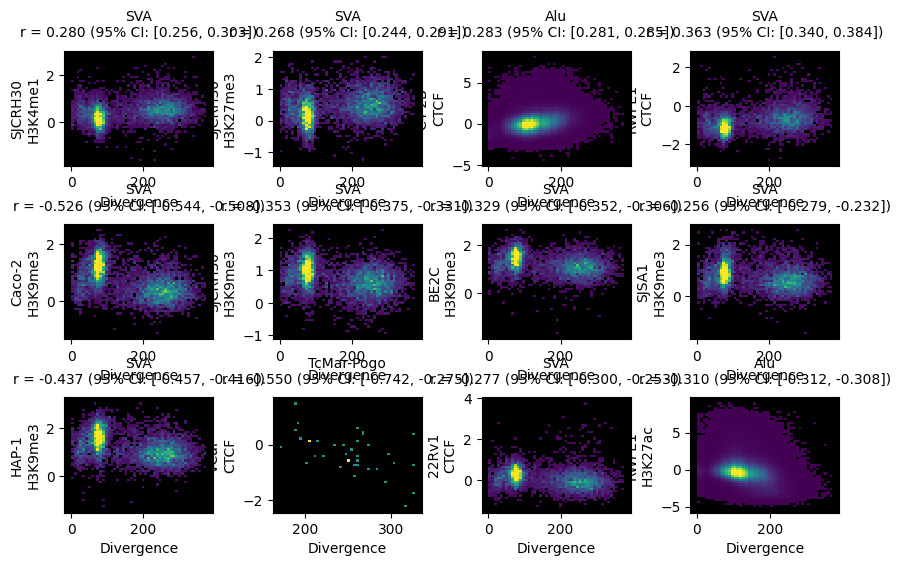

SUCCESS: Plot saved to plots/Divergence_vs_Signal_by_families_sign_correlations.svg


In [13]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from tqdm import tqdm  # For progress bars

correlation_df_families = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families_detailed.csv", index_col=0
)

top_corrs = pd.concat(
    [
        correlation_df_families[correlation_df_families["ci_low"] > 0.2],
        correlation_df_families[correlation_df_families["ci_high"] < -0.2],
    ]
)
top_corrs = top_corrs[
    ~((top_corrs["cell_line"] == "C4-2B") & (top_corrs["modification"] == "CTCF") & (top_corrs["family_name"] == "SVA"))
]

top_corrs = top_corrs[
    ~((top_corrs["cell_line"] == "RWPE1") & (top_corrs["modification"] == "H3K27ac") & (top_corrs["family_name"] == "SVA"))
]

plt.rcParams["svg.fonttype"] = "none"


# --- Helper Class for Colored Logging ---
class Logger:
    """A simple logger for pretty, colored console output."""

    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    ENDC = "\033[0m"

    # Note: Use tqdm.write() for all logging inside loops
    @staticmethod
    def info(message):
        print(f"{Logger.BLUE}INFO: {message}{Logger.ENDC}")

    @staticmethod
    def success(message):
        print(f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}")

    @staticmethod
    def warning(message):
        print(f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}")

    # Static versions to return the string for tqdm.write()
    @staticmethod
    def s_success(message):
        return f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}"

    @staticmethod
    def s_warning(message):
        return f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}"


save_path_svg = f"plots/Divergence_vs_Signal_by_families_sign_correlations.svg"

figure = plt.figure(figsize=(10, 6))

N_ROWS = 3
N_COLS = 4

# Increased spacing for independent labels
outer_grid = GridSpec(N_ROWS, N_COLS, figure=figure, wspace=0.4, hspace=0.5)

# --- Removed shared axes lists ---

# --- Add a cache for data loading ---
data_cache = {}

# --- Use a more Pythonic loop ---
for i, (idx, row) in enumerate(
    tqdm(top_corrs.iterrows(), total=len(top_corrs), desc="Plotting Top 10")
):

    # Calculate grid position
    r = i // N_COLS
    c = i % N_COLS

    # Get data from the row
    family_name = row["family_name"]
    cell_line = row["cell_line"]
    modification = row["modification"]

    filepath = f"./epigenomic_files/{cell_line}.{modification}.chm13v2.0.mapped_on_repeat_masker.bedGraph"

    # --- Check cache before loading ---
    if filepath in data_cache:
        tqdm.write(f"  -> Found in cache: {filepath}")
        sample_enrichment = data_cache[filepath]
    else:
        # --- Data Loading ---
        tqdm.write(f"  -> Loading data from: {filepath}")
        try:
            sample_enrichment = pd.read_csv(
                filepath,
                sep="\t",
                header=None,
            )
            data_cache[filepath] = sample_enrichment
            tqdm.write(Logger.s_success("File loaded and cached."))

        except FileNotFoundError:
            tqdm.write(Logger.s_warning(f"File not found, skipping: {filepath}"))
            ax = figure.add_subplot(outer_grid[r, c])
            ax.axis("off")
            continue
        except Exception as e:
            tqdm.write(
                Logger.s_warning(
                    f"An unexpected error occurred while reading {filepath}: {e}"
                )
            )
            ax = figure.add_subplot(outer_grid[r, c])
            ax.axis("off")
            continue

        # --- Process data (only needs to be done once, on load) ---
        sample_enrichment.columns = [
            "Chromosome",
            "Start",
            "End",
            "Divergence",
            "Name",
            "Family",
            "Class",
            "Signal",
        ]
        sample_enrichment["Signal"] = pd.to_numeric(
            sample_enrichment["Signal"], errors="coerce"
        )
        sample_enrichment["Divergence"] = pd.to_numeric(
            sample_enrichment["Divergence"], errors="coerce"
        )
        data_cache[filepath] = sample_enrichment

    # --- Query must be done every time ---
    query_local = f'Family == "{family_name}"'
    sample_enrichment_local = sample_enrichment.query(query_local)

    # --- Create *single* axis for this plot ---
    ax_main = figure.add_subplot(outer_grid[r, c])

    # --- Plot the data ---
    sns.histplot(
        data=sample_enrichment_local,
        x="Divergence",
        y="Signal",
        bins=48,
        pmax=0.9,
        cmap="viridis",
        ax=ax_main,
    )

    # --- Tidy up: Main plot ticks/labels ---
    ax_main.set_facecolor("black")
    ax_main.set_xlabel("Divergence", fontsize=10)
    ax_main.set_ylabel(f"{cell_line}\n{modification}", fontsize=10)

    # Set spine colors to white

    # --- Calculate correlation ---
    clean_data = sample_enrichment_local.dropna(subset=["Divergence", "Signal"])
    if len(clean_data) > 3:  # Need n > 3 for the 1/sqrt(n-3) formula
        try:
            # Use the new helper function
            corr_coef, p_val, ci_low, ci_high = pearsonr_ci(
                clean_data["Divergence"], clean_data["Signal"]
            )

            # Create the string for the title
            corr_str = f"r = {corr_coef:.3f} (95% CI: [{ci_low:.3f}, {ci_high:.3f}])"
        except Exception as e:
            # Catch any math errors (e.g., if variance is zero)
            corr_coef = np.nan
            corr_str = "r = N/A (calc error)"
    else:
        corr_coef = np.nan  # Set to nan
        corr_str = "r = N/A (n <= 3)"
    # --- Set the title on the main axis ---
    ax_main.set_title(f"{family_name}\n{corr_str}", fontsize=10, pad=10)


# --- Ensure plots directory exists ---
os.makedirs(os.path.dirname(save_path_svg), exist_ok=True)
figure.tight_layout()  # Add tight_layout to prevent label overlap
figure.savefig(save_path_svg, format="svg", facecolor="white", transparent=True)
plt.show()

Logger.success(f"Plot saved to {save_path_svg}")

### Compare correlations by class, cell line, modification

In [8]:
families_by_classes = pd.read_csv("families_by_classes_TE.csv").dropna()


correlation_df_families = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families_detailed.csv", index_col=0
).merge(families_by_classes[['class_name', 'family_name']])
correlation_df_families["transformed_corr"] = np.arctanh(correlation_df_families.r)
correlation_df_families["r_abs"] = correlation_df_families.r.abs()
correlation_df_families

cell_line modification family_name         r        p_value    ci_low  \
0       Caco-2      H3K4me1         Alu -0.018999   9.413005e-91 -0.020842   
1       Caco-2      H3K9me3         Alu -0.055464   0.000000e+00 -0.057301   
2      SJCRH30      H3K27ac         Alu  0.004658   7.115618e-07  0.002817   
3      SJCRH30      H3K4me1         Alu  0.025348  3.643438e-160  0.023506   
4      SJCRH30      H3K9me3         Alu  0.046718   0.000000e+00  0.044879   
...        ...          ...         ...       ...            ...       ...   
1711     RWPE2     H3K36me3   hAT-hAT19 -0.235570   3.466930e-01 -0.632840   
1712     22Rv1         CTCF   hAT-hAT19  0.177126   4.819784e-01 -0.315864   
1713     22Rv1      H3K27ac   hAT-hAT19  0.519456   2.715174e-02  0.069422   
1714     RWPE1         CTCF   hAT-hAT19  0.000184   9.994222e-01 -0.466726   
1715     RWPE1      H3K27ac   hAT-hAT19 -0.072620   7.746032e-01 -0.521799   

       ci_high class_name  transformed_corr     r_abs  
0    -0.017156       SINE         -0.019002  0.018999  
1    -0.053627       SINE         -0.055521  0.055464  
2     0.006499       SINE          0.004658  0.004658  
3     0.027189       SINE          0.025353  0.025348  
4     0.048556       SINE          0.046752  0.046718  
...        ...        ...               ...       ...  
1711  0.259882        DNA         -0.240078  0.235570  
1712  0.594809        DNA          0.179014  0.177126  
1713  0.793812        DNA          0.575594  0.519456  
1714  0.467014        DNA          0.000184  0.000184  
1715  0.408086        DNA         -0.072748  0.072620  

[1716 rows x 10 columns]

/tmp/ipykernel_721/1277181717.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Caco-2 vs. SJCRH30: Mann-Whitney-Wilcoxon test two-sided, P_val:2.472e-02 U_stat=1.347e+04
SJCRH30 vs. BE2C: Mann-Whitney-Wilcoxon test two-sided, P_val:6.927e-01 U_stat=2.272e+04
BE2C vs. SJSA1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.298e-02 U_stat=1.679e+04
SJSA1 vs. HAP-1: Mann-Whitney-Wilcoxon test two-sided, P_val:8.522e-01 U_stat=2.933e+04
HAP-1 vs. HL-60: Mann-Whitney-Wilcoxon test two-sided, P_val:1.575e-03 U_stat=7.537e+03
HL-60 vs. MG63: Mann-Whitney-Wilcoxon test two-sided, P_val:1.132e-02 U_stat=2.915e+03
MG63 vs. VCaP: Mann-Whitney-Wilcoxon test two-sided, P_val:7.137e-02 U_stat=6.689e+03
VCaP vs. C4-2B: Mann-Whitney-Wilcoxon test two-sided, P_val:8.129e-03 U_stat=2.977e+03
C4-2B vs. RWPE2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.735e-05 U_stat=7.611e+03
RWPE2 vs. 22Rv1: 

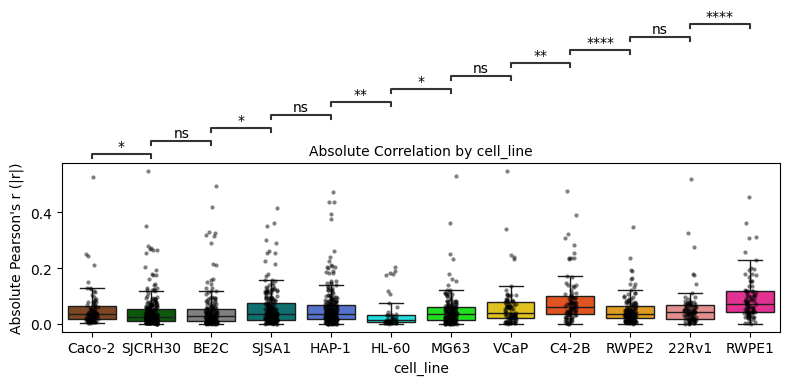

In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats # We need this for the stats test
from statannotations.Annotator import Annotator

# Set the font type for a clean SVG
plt.rcParams['svg.fonttype'] = 'none'

x_name='cell_line'
# --- 2. Create the Plot ---
figure, ax = plt.subplots(
    figsize=(8, 7), # Increased height for stats
)

# --- 3. Plot the Boxplot ---
sns.boxplot(
    data=correlation_df_families,
    x=x_name,
    y="r_abs",
    ax=ax,
    palette=cell_line_p,
    boxprops={'alpha': 1}, # Make boxes slightly transparent,
    showfliers=False
)

# --- 4. Add the Scatter Plot (Stripplot) ---
# This plots the individual points over the boxes
sns.stripplot(
    data=correlation_df_families,
    x=x_name,
    y="r_abs",
    ax=ax,
    color="black",  # Color for the points
    size=3,         # Size of the points
    alpha=0.5,      # Transparency
    jitter=True, # Spread points horizontally
    #hue='modification',
    #palette=modification_p_richer
)

# Get the order of boxes as they appear on the plot
plot_order = [tick.get_text() for tick in ax.get_xticklabels()]

# Define the pairs you want to compare.
# This example compares all groups to the first group ("CTCF")

box_pairs = [(plot_order[i], plot_order[i+1]) for i in range(0,len(plot_order)-1)]

# You can also define custom pairs, e.g.:
# box_pairs = [
#     ("CTCF", "H3K27ac"), 
#     ("H3K27ac", "H3K4me3")
# ]

annotator = Annotator(
    ax,
    box_pairs,
    data=correlation_df_families,
    x=x_name,
    y="r_abs",
    order=plot_order # Pass the plot order
)

annotator.configure(
    test='Mann-Whitney', # Specify the test
    text_format='star',  # Use stars for significance
    loc='outside',       # Place annotations outside the plot area
    verbose=2            # Show p-values in the console
)

# Apply the test and draw the annotations
annotator.apply_and_annotate()
# --- 6. Tidy Up and Save ---

ax.set_title(f"Absolute Correlation by {x_name}", fontsize=10)
ax.set_xlabel(x_name, fontsize=10)
ax.set_ylabel("Absolute Pearson's r (|r|)", fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Ensure the plot layout is clean
figure.tight_layout()

# Save to SVG
save_path = f"./plots/corrs_boxplot_{x_name}.svg"
figure.savefig(
    save_path, 
    format="svg", 
    bbox_inches="tight",
    transparent=True
)

plt.show()


In [1]:
1

1

In [ ]:
figure, ax = plt.subplots(
    figsize=(9, 4),
)
sns.boxplot(
    data=correlation_df_families,
    x="modification",
    y="r_abs",
    ax=ax,
    # hue='TE_class'
)

<AxesSubplot:xlabel='class_name', ylabel='r_abs'>

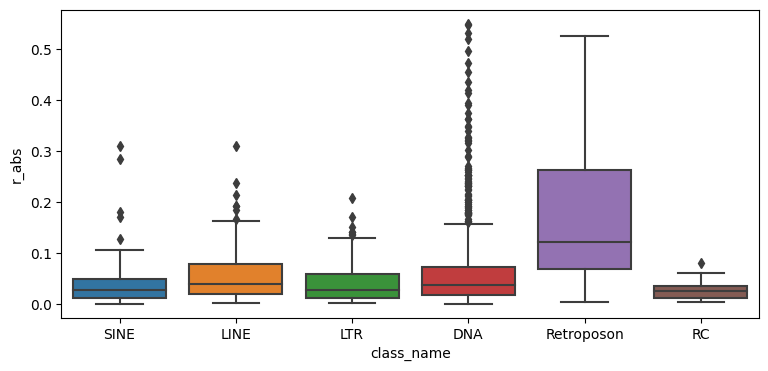

In [25]:
figure, ax = plt.subplots(
    figsize=(9, 4),
)
sns.boxplot(
    data=correlation_df_families,
    x="class_name",
    y="r_abs",
    ax=ax,
    # hue='TE_class'
)

<AxesSubplot:xlabel='cell_line', ylabel='r_abs'>

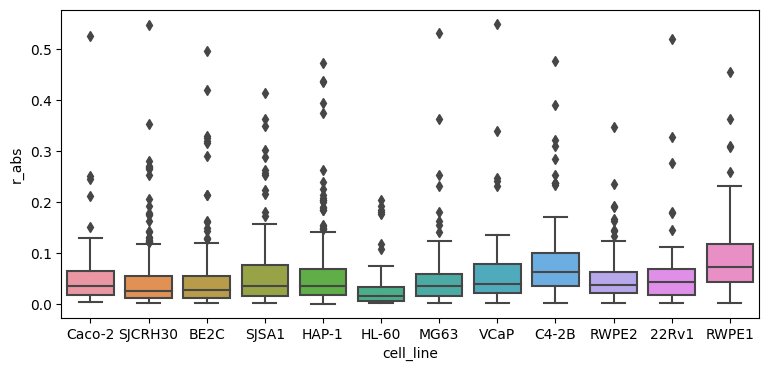

In [27]:
figure, ax = plt.subplots(
    figsize=(9, 4),
)
sns.boxplot(
    data=correlation_df_families,
    x="cell_line",
    y="r_abs",
    ax=ax,
    # hue='TE_class'
)

In [14]:
import scipy

scipy.stats.pearsonr(clean_data["Divergence"], clean_data["Signal"])

(-0.31007382325631855, 0.0)

#### Curtosis and Shapiro test

In [4]:
correlation_df_families = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_families.csv", index_col=0
).T
family_names = list(correlation_df_families.columns[2:])
correlation_df_families[family_names] = correlation_df_families[family_names].apply(
    pd.to_numeric, errors="coerce"
)
corrs_for_test = correlation_df_families.melt(
    id_vars=["cell_line", "modification"], value_vars=family_names
)
corrs_for_test.columns = ["cell_line", "modification", "TE_family", "correlation"]
corrs_for_test["transformed_corr"] = np.arctanh(corrs_for_test.correlation)

corrs_for_test = corrs_for_test.sort_values("correlation")

<AxesSubplot:xlabel='transformed_corr', ylabel='Count'>

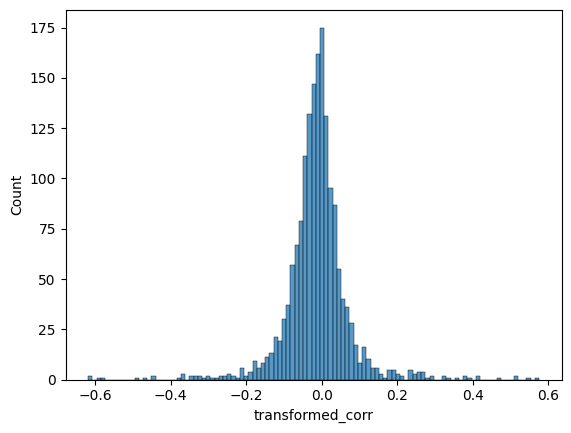

In [5]:
sns.histplot(corrs_for_test.transformed_corr)

In [6]:
stats.shapiro(corrs_for_test.transformed_corr)

ShapiroResult(statistic=0.8347178101539612, pvalue=6.279383771858296e-39)

In [3]:
import scipy.stats as stats
??stats.shapiro

Signature: stats.shapiro(x, *, axis=None, nan_policy='propagate', keepdims=False)
Docstring:
Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the
data was drawn from a normal distribution.

Parameters
----------
x : array_like
    Array of sample data.
axis : int or None, default: None
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaNs.
    
    - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
      which the  statistic is computed, the corresponding entry of the output
      will be NaN.
    - ``omit``: NaNs will be omitted when performing the calculation.
      If insufficient data remains in the axis slice along which

In [7]:
stats.kurtosistest(corrs_for_test.transformed_corr)

KurtosistestResult(statistic=18.003813551827207, pvalue=1.8185488848579759e-72)

In [9]:
stats.kurtosis(corrs_for_test.transformed_corr)

10.806739674636647

#### Levene test for comparison of variances

In [ ]:
from scipy.stats import levene

LINE = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "LINE"]
LTR = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "LTR"]
SINE = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "SINE"]
DNA = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "DNA"]
Retroposon = corrs_for_test["transformed_corr"][
    corrs_for_test["TE_class"] == "Retroposon"
]
RC = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] == "RC"]
non_sva = corrs_for_test["transformed_corr"][corrs_for_test["TE_class"] != "Retroposon"]


levene(LINE, LTR, SINE, DNA, Retroposon, RC)

In [9]:
correlation_df_families

cell_line modification family_name         r        p_value    ci_low  \
0       Caco-2      H3K4me1         Alu -0.018999   9.413005e-91 -0.020842   
1       Caco-2      H3K9me3         Alu -0.055464   0.000000e+00 -0.057301   
2      SJCRH30      H3K27ac         Alu  0.004658   7.115618e-07  0.002817   
3      SJCRH30      H3K4me1         Alu  0.025348  3.643438e-160  0.023506   
4      SJCRH30      H3K9me3         Alu  0.046718   0.000000e+00  0.044879   
...        ...          ...         ...       ...            ...       ...   
1711     RWPE2     H3K36me3   hAT-hAT19 -0.235570   3.466930e-01 -0.632840   
1712     22Rv1         CTCF   hAT-hAT19  0.177126   4.819784e-01 -0.315864   
1713     22Rv1      H3K27ac   hAT-hAT19  0.519456   2.715174e-02  0.069422   
1714     RWPE1         CTCF   hAT-hAT19  0.000184   9.994222e-01 -0.466726   
1715     RWPE1      H3K27ac   hAT-hAT19 -0.072620   7.746032e-01 -0.521799   

       ci_high class_name  transformed_corr     r_abs  
0    -0.017156       SINE         -0.019002  0.018999  
1    -0.053627       SINE         -0.055521  0.055464  
2     0.006499       SINE          0.004658  0.004658  
3     0.027189       SINE          0.025353  0.025348  
4     0.048556       SINE          0.046752  0.046718  
...        ...        ...               ...       ...  
1711  0.259882        DNA         -0.240078  0.235570  
1712  0.594809        DNA          0.179014  0.177126  
1713  0.793812        DNA          0.575594  0.519456  
1714  0.467014        DNA          0.000184  0.000184  
1715  0.408086        DNA         -0.072748  0.072620  

[1716 rows x 10 columns]

In [11]:
from scipy.stats import levene

compare_list = [correlation_df_families["transformed_corr"][correlation_df_families["class_name"] == class_name] for class_name in correlation_df_families["class_name"].unique()] 

levene(*compare_list)

LeveneResult(statistic=33.389820426743256, pvalue=1.3077470684767767e-32)

In [14]:
compare_list = [correlation_df_families["transformed_corr"][correlation_df_families["cell_line"] == cell_line] for cell_line in correlation_df_families["cell_line"].unique()] 

levene(*compare_list)

LeveneResult(statistic=5.114131297667724, pvalue=6.296416802633592e-08)

In [15]:
compare_list = [correlation_df_families["transformed_corr"][correlation_df_families["modification"] == modification] for modification in correlation_df_families["modification"].unique()] 

levene(*compare_list)

LeveneResult(statistic=4.7739504941292825, pvalue=7.764221805308043e-05)

## Visualize means and SDs for families, their epigenetic signal

In [44]:
data_by_family = pd.read_csv(
    "Average_signal_by_lines_mods_TE_families.csv", index_col=None
)
family_names = list(data_by_family.columns[:-2])
data_by_family[family_names] = data_by_family[family_names].apply(
    pd.to_numeric, errors="coerce"
)

data_by_family.index = data_by_family.cell_line + " " + data_by_family.modification
data_by_family

5S-Deu-L2       Alu       CR1   Crypton  Crypton-A  \
Caco-2 H3K4me1     0.320740  0.192451  0.258062  0.275429   0.304539   
Caco-2 H3K9me3     0.284788  0.441999  0.344387  0.295155   0.315570   
SJCRH30 H3K27ac    0.522521  0.305006  0.352603  0.413410   0.456858   
SJCRH30 H3K4me1    0.775154  0.490795  0.607022  0.683245   0.835651   
SJCRH30 H3K9me3    0.588988  0.525853  0.620012  0.638764   0.670254   
SJCRH30 H3K36me3   0.297161  0.455739  0.348668  0.303720   0.245351   
SJCRH30 H3K27me3   0.521002  0.584931  0.579860  0.606307   0.491396   
SJCRH30 H3K4me3   -0.102354 -0.256626 -0.192138 -0.189490  -0.139660   
BE2C H3K4me1       1.253378  0.997566  1.142072  1.206211   1.342629   
BE2C H3K9me3       1.023639  1.114990  1.028507  0.981198   1.052058   
BE2C H3K36me3      1.053793  1.203209  1.073624  0.934470   1.003215   
BE2C H3K27me3      1.018680  0.995921  1.007752  0.968572   0.998135   
SJSA1 H3K27ac     -0.032203 -0.185852 -0.138565 -0.074076  -0.091544   
SJSA1 H3K9me3      0.603153  0.618293  0.601521  0.549849   0.567022   
SJSA1 H3K36me3     0.465149  0.609860  0.482341  0.308212   0.317103   
SJSA1 H3K27me3     0.378671  0.284844  0.406498  0.431335   0.432426   
SJSA1 H3K4me3     -0.310268 -0.306759 -0.347568 -0.422872  -0.406287   
HAP-1 H3K27ac      0.650606  0.770408  0.644308  0.644000   0.622732   
HAP-1 H3K4me1      1.144594  0.980094  1.024014  1.196720   1.233804   
HAP-1 H3K9me3      0.865944  1.128279  0.889325  0.808951   0.750018   
HAP-1 H3K36me3     1.030765  1.239396  1.046661  0.942348   0.968973   
HAP-1 H3K27me3     0.884529  0.882860  0.908194  0.869598   0.861555   
HAP-1 H3K4me3      0.484914  0.679054  0.493263  0.385337   0.396051   
HL-60 H3K27ac      0.580560  0.514378  0.541012  0.526472   0.436061   
MG63 H3K9me3       0.698770  0.793096  0.753471  0.728139   0.740663   
MG63 H3K36me3      0.888467  1.090554  0.915089  0.773711   0.732108   
MG63 H3K27me3      0.852625  0.836310  0.887732  0.931000   0.928335   
MG63 H3K4me3       0.311305  0.270090  0.276956  0.310228   0.320327   
VCaP CTCF         -0.194968 -0.167297 -0.273002 -0.312388  -0.258992   
VCaP H3K27ac      -0.215281 -0.085179 -0.310962 -0.182342  -0.226106   
C4-2B CTCF         1.248749  0.060086  1.038788  1.369984   1.327530   
C4-2B H3K27ac     -0.136234  0.002506 -0.147417 -0.234920  -0.393598   
RWPE2 CTCF        -0.558637 -0.335091 -0.614728 -0.657671  -0.745245   
RWPE2 H3K27ac     -0.864783 -0.678715 -1.003087 -1.122162  -0.881876   
RWPE2 H3K36me3     0.358238  0.600769  0.422977  0.369141   0.414702   
22Rv1 CTCF        -0.060154  0.060682 -0.096647 -0.167210  -0.201251   
22Rv1 H3K27ac     -0.679713 -0.503687 -0.717244 -0.797053  -0.551739   
RWPE1 CTCF        -0.479363 -0.690703 -0.460385 -0.293366  -0.521564   
RWPE1 H3K27ac     -1.890375 -0.328826 -1.754939 -2.227096  -2.426311   

                   Dong-R4      ERV1      ERVK      ERVL  ERVL-MaLR  ...  \
Caco-2 H3K4me1    0.258146  0.312185  0.371935  0.205223   0.182053  ...   
Caco-2 H3K9me3    0.355845  0.512210  0.754319  0.390554   0.456819  ...   
SJCRH30 H3K27ac   0.351930  0.342557  0.343433  0.348306   0.345348  ...   
SJCRH30 H3K4me1   0.630977  0.540008  0.552567  0.545097   0.556265  ...   
SJCRH30 H3K9me3   0.668007  0.721676  0.851566  0.657647   0.743989  ...   
SJCRH30 H3K36me3  0.296746  0.248429  0.280839  0.233524   0.268660  ...   
SJCRH30 H3K27me3  0.585863  0.614528  0.574707  0.617601   0.606406  ...   
SJCRH30 H3K4me3  -0.211010 -0.179683 -0.190820 -0.225262  -0.212420  ...   
BE2C H3K4me1      1.183467  1.080902  1.158770  1.088253   1.108216  ...   
BE2C H3K9me3      1.022442  1.152385  1.260736  1.108247   1.159521  ...   
BE2C H3K36me3     1.014421  1.011247  1.069518  0.999417   1.027514  ...   
BE2C H3K27me3     1.021891  1.015925  1.024714  0.994579   0.990433  ...   
SJSA1 H3K27ac    -0.150264 -0.162833 -0.224540 -0.189882  -0.171798  ...   
SJSA1 H3K9me3     0.605384  0.815481  0.995962  0.785104   0.828532  ... 

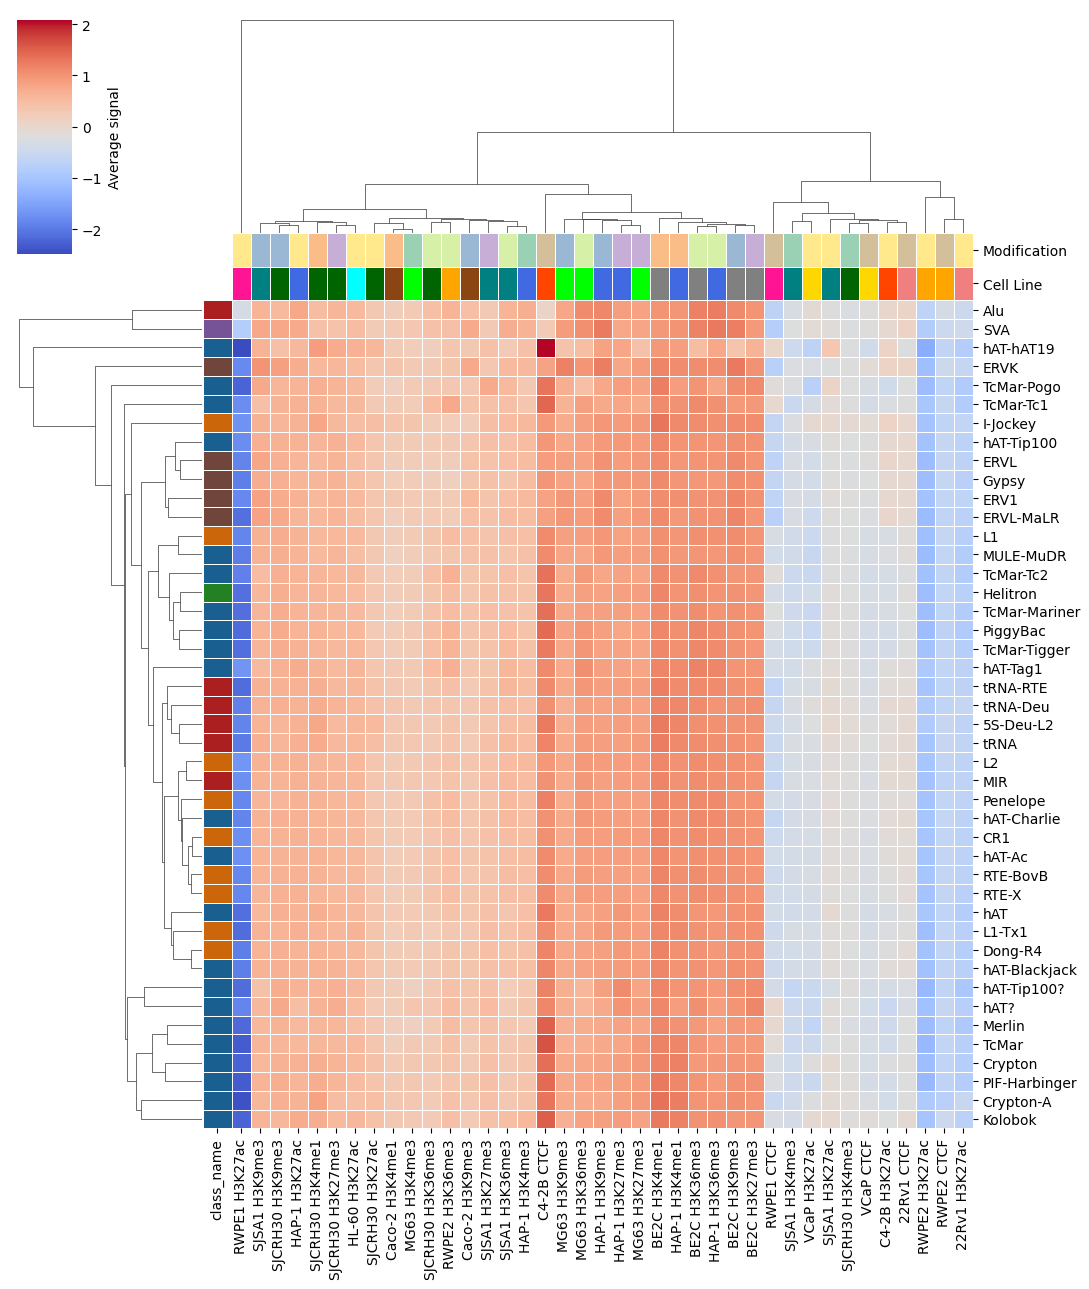

In [46]:
mapped_cell_colors = data_by_family["cell_line"].map(cell_line_p)
mapped_mod_colors = data_by_family["modification"].map(modification_p_richer)

families_by_classes = pd.read_csv("families_by_classes_TE.csv").dropna()

families_by_classes = families_by_classes.set_index("family_name").reindex(family_names)
mapped_families_colors = families_by_classes["class_name"].map(class_names_p)

# Create a DataFrame for the row_colors argument
# The column names (e.g., 'Cell Line') will appear as labels.
row_colors_df = pd.DataFrame(
    {"Cell Line": mapped_cell_colors, "Modification": mapped_mod_colors}
)
# Important: The index must align with the data being plotted
row_colors_df.index = data_by_family.index


# --- 2. Plot the Clustermap ---
data_to_plot = data_by_family[family_names].T
data_to_plot

g = sns.clustermap(
    data_to_plot,
    cmap="coolwarm",
    # Goal 1: Customize figsize
    figsize=(11, 13),
    # Goal 2 & 3: Add row colors using the mapped palettes
    # We use row_colors, as 'cell_line' and 'modification' describe the rows
    col_colors=row_colors_df[["Modification", "Cell Line"]],
    row_colors=mapped_families_colors,
    # Other aesthetic improvements
    # vmin=-1, vmax=1,          # Set colorbar limits for correlation
    linewidths=0.5,
    cbar_kws={"label": "Average signal"},
    # metric='correlation'      # Use correlation for clustering distance
)

# --- 3. Save the Figure ---
save_path = "./plots/signal_clustermap_families.svg"

# Goal 4: Save as SVG
g.savefig(save_path, format="svg")

plt.show()

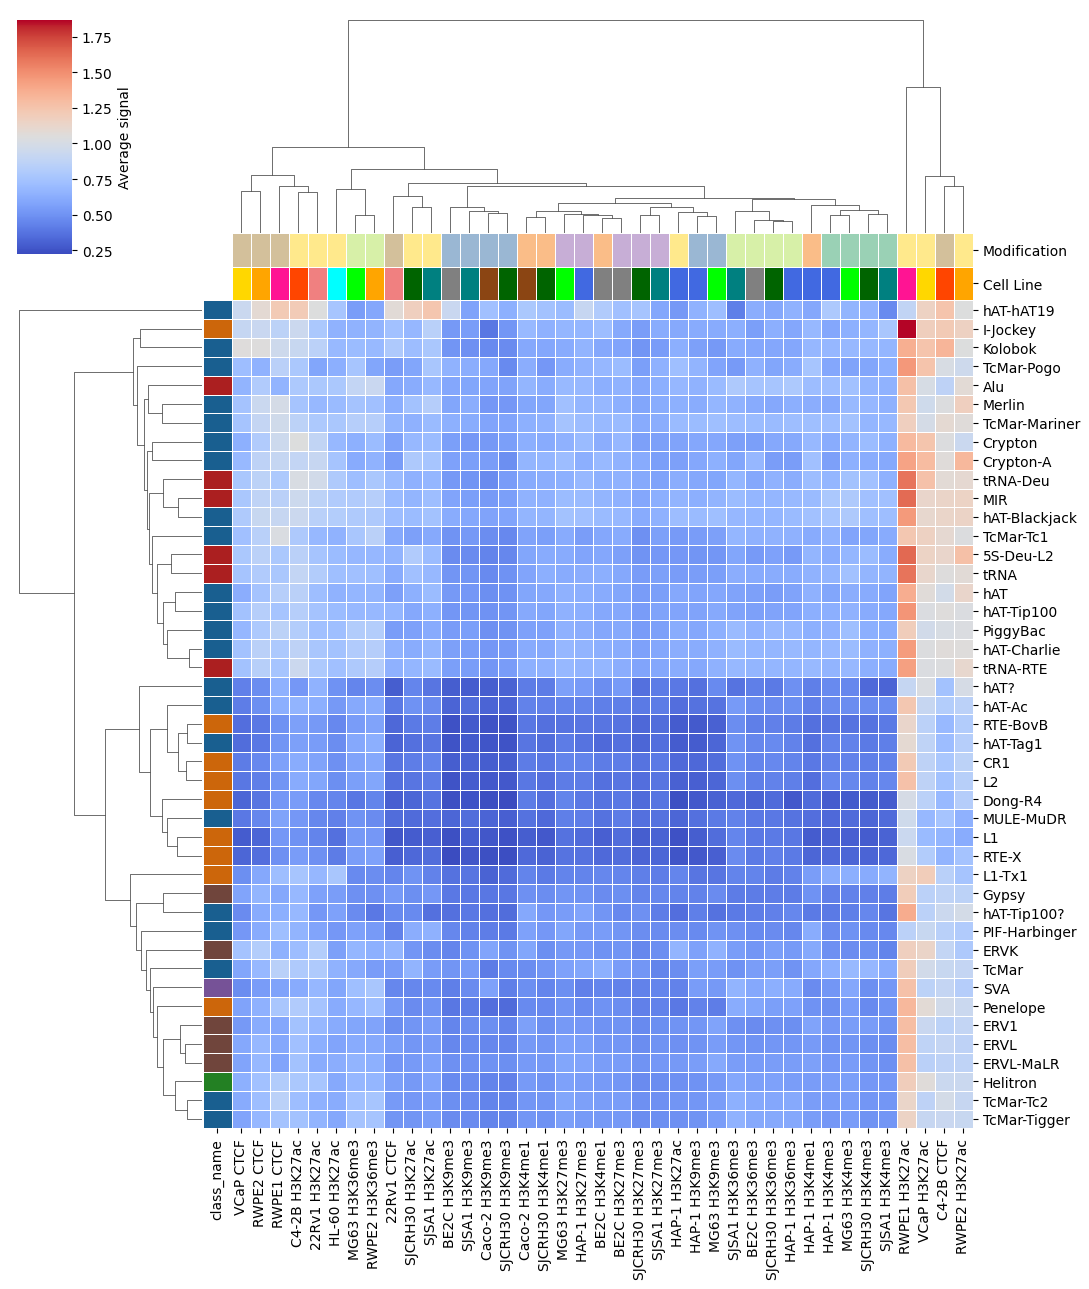

In [49]:
data_by_family = pd.read_csv("SD_signal_by_lines_mods_TE_families.csv", index_col=None)
family_names = list(data_by_family.columns[:-2])
data_by_family[family_names] = data_by_family[family_names].apply(
    pd.to_numeric, errors="coerce"
)

data_by_family.index = data_by_family.cell_line + " " + data_by_family.modification
data_by_family

mapped_cell_colors = data_by_family["cell_line"].map(cell_line_p)
mapped_mod_colors = data_by_family["modification"].map(modification_p_richer)

families_by_classes = pd.read_csv("families_by_classes_TE.csv").dropna()

families_by_classes = families_by_classes.set_index("family_name").reindex(family_names)
mapped_families_colors = families_by_classes["class_name"].map(class_names_p)

# Create a DataFrame for the row_colors argument
# The column names (e.g., 'Cell Line') will appear as labels.
row_colors_df = pd.DataFrame(
    {"Cell Line": mapped_cell_colors, "Modification": mapped_mod_colors}
)
# Important: The index must align with the data being plotted
row_colors_df.index = data_by_family.index


# --- 2. Plot the Clustermap ---
data_to_plot = data_by_family[family_names].T
data_to_plot

g = sns.clustermap(
    data_to_plot,
    cmap="coolwarm",
    # Goal 1: Customize figsize
    figsize=(11, 13),
    # Goal 2 & 3: Add row colors using the mapped palettes
    # We use row_colors, as 'cell_line' and 'modification' describe the rows
    col_colors=row_colors_df[["Modification", "Cell Line"]],
    row_colors=mapped_families_colors,
    # Other aesthetic improvements
    # vmin=-1, vmax=1,          # Set colorbar limits for correlation
    linewidths=0.5,
    cbar_kws={"label": "Average signal"},
    # metric='correlation'      # Use correlation for clustering distance
)

# --- 3. Save the Figure ---
save_path = "./plots/signal_clustermap_families.svg"

# Goal 4: Save as SVG
g.savefig(save_path, format="svg")

plt.show()

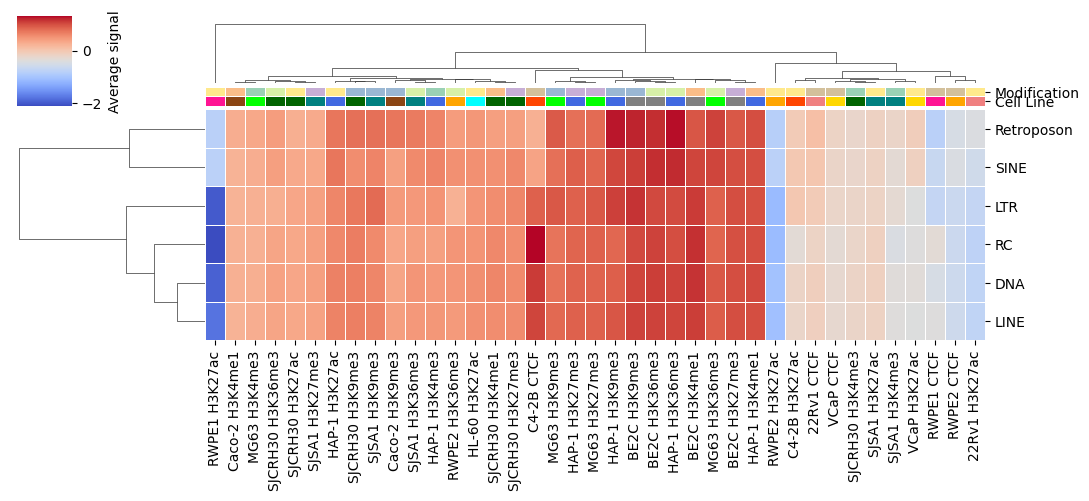

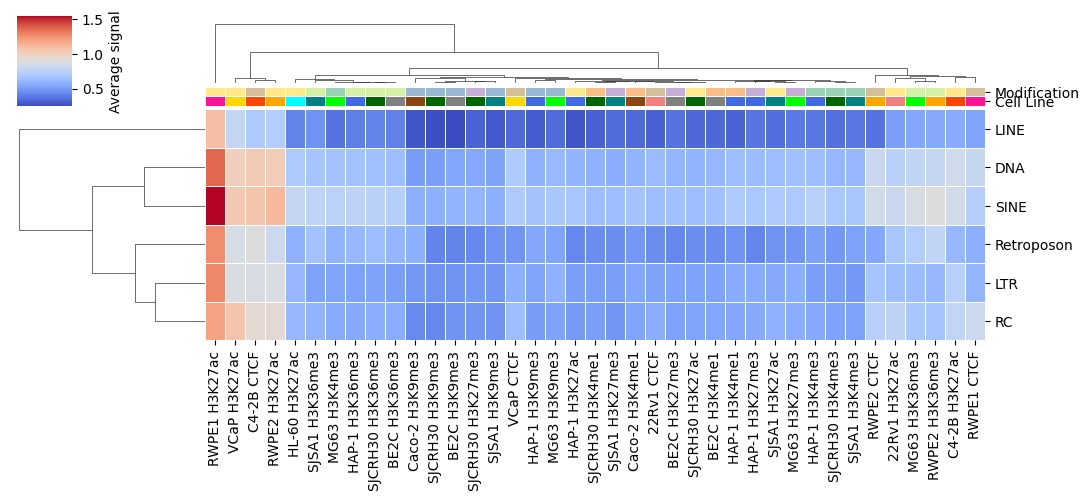

In [53]:
data_by_class = pd.read_csv(
    "Average_signal_by_lines_mods_TE_classes.csv", index_col=None
)
class_names = list(data_by_class.columns[:-2])
data_by_class[class_names] = data_by_class[class_names].apply(
    pd.to_numeric, errors="coerce"
)

data_by_class.index = data_by_class.cell_line + " " + data_by_class.modification

mapped_cell_colors = data_by_class["cell_line"].map(cell_line_p)
mapped_mod_colors = data_by_class["modification"].map(modification_p_richer)

# --- 2. Plot the Clustermap ---
data_to_plot = data_by_class[class_names].T
data_to_plot

g = sns.clustermap(
    data_to_plot,
    cmap="coolwarm",
    figsize=(11, 5),
    col_colors=row_colors_df[["Modification", "Cell Line"]],
    linewidths=0.5,
    cbar_kws={"label": "Average signal"},
)

plt.show()

data_by_class = pd.read_csv("SD_signal_by_lines_mods_TE_classes.csv", index_col=None)
class_names = list(data_by_class.columns[:-2])
data_by_class[class_names] = data_by_class[class_names].apply(
    pd.to_numeric, errors="coerce"
)

data_by_class.index = data_by_class.cell_line + " " + data_by_class.modification

mapped_cell_colors = data_by_class["cell_line"].map(cell_line_p)
mapped_mod_colors = data_by_class["modification"].map(modification_p_richer)

# --- 2. Plot the Clustermap ---
data_to_plot = data_by_class[class_names].T
data_to_plot

g = sns.clustermap(
    data_to_plot,
    cmap="coolwarm",
    figsize=(11, 5),
    col_colors=row_colors_df[["Modification", "Cell Line"]],
    linewidths=0.5,
    cbar_kws={"label": "Average signal"},
)

plt.show()

## Analyze correlation coefficients of individual copies of TEs

### Connection of correlation with average divergence and count by individual

In [4]:
correlation_df_individuals = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed.csv", index_col=0
)
correlation_df_individuals['abs_r'] = correlation_df_individuals.r.abs()
corrs_average = correlation_df_individuals[['cell_line', 'modification', 'individual_name', 'abs_r']].groupby(['individual_name']).mean()

correlation_df_individuals_random = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed_random.csv", index_col=0
)
correlation_df_individuals_random['abs_r'] = correlation_df_individuals_random.r.abs()
corrs_average_random = correlation_df_individuals_random[['cell_line', 'modification', 'individual_name', 'abs_r']].groupby(['individual_name']).mean()


repeat_masker = pd.read_csv("T2T_repeat_masker_processed.csv")
divergence_average = (
    repeat_masker[["score", "individual_name"]]
    .groupby("individual_name")
    .mean()["score"]
    .reindex(corrs_average.index)
)

individuals_counts = pd.read_csv("repeat_masker_individual_name_counts.csv")
individuals_counts.columns = ["individual_name", "count"]
individuals_counts["log10_count"] = np.log10(individuals_counts["count"])
individuals_counts = individuals_counts.set_index("individual_name").reindex(corrs_average.index)


individuals_by_classes = pd.read_csv("individuals_by_classes_TE.csv").dropna()


individuals_by_classes = individuals_by_classes.set_index("individual_name").reindex(
    corrs_average.index
)

data_to_plot = pd.concat(
    [
        corrs_average,
        corrs_average_random,
        divergence_average,
        individuals_counts[["count", "log10_count"]],
        individuals_by_classes["class_name"],
    ],
    axis=1,
)
data_to_plot.columns = [
    "average_abs_corr",
    "average_abs_corr_random",
    "average_divergence",
    "count",
    "log10_count",
    "class_name",
]
data_to_plot

TypeError: agg function failed [how->mean,dtype->object]

In [6]:
individuals_by_classes = pd.read_csv("individuals_by_classes_TE.csv").dropna()
individuals_by_classes[individuals_by_classes.class_name == 'Retroposon']

Unnamed: 0  class_name individual_name
104         212  Retroposon           SVA_E
152         387  Retroposon           SVA_D
212         774  Retroposon           SVA_A
534        5105  Retroposon           SVA_C
551        5372  Retroposon           SVA_B
553        5768  Retroposon           SVA_F

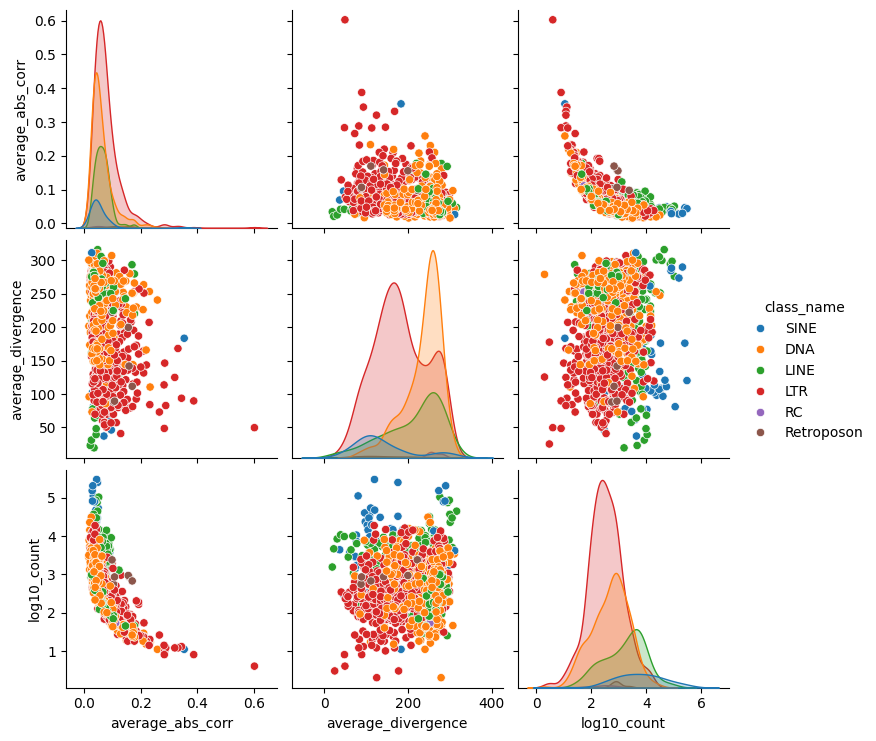

In [31]:
sns.pairplot(
    data=data_to_plot[
        [
            "average_abs_corr",
            "average_divergence",
            "log10_count",
            "class_name",
        ]
    ],
    hue="class_name"
    
)

Fitting sigmoidal curve...
95th percentile of relative error: +35.54%
Generating plot...


/tmp/ipykernel_155/38156718.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data['average_abs_corr_random_95_top'] = sigmoid_decay(fit_data['log10_count'], *popt_random) * (1 + rel_resid_95th)


Plot saved to ./plots/abs_average_corr_vs_count_TE_individuals.svg


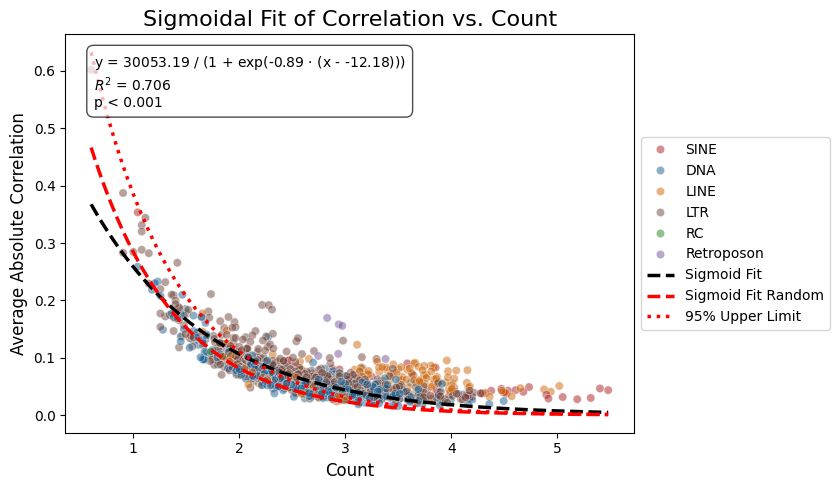

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

plt.rcParams["svg.fonttype"] = "none"  # For clean SVG text


# --- 2. Define the sigmoidal function ---
def sigmoid_decay(x, L, k, x0):
    """
    Sigmoidal decay function (inverse logistic).
    L: maximum value (the asymptote)
    k: steepness of the curve
    x0: the x-value of the sigmoid's midpoint
    """
    # Note: The sign on k is positive for a decay curve
    return L / (1 + np.exp(k * (x - x0)))



# --- 3. Prepare data and perform the fit ---
print("Fitting sigmoidal curve...")

# Drop NaNs to ensure alignment and prevent errors
fit_data = data_to_plot.dropna() #[["log10_count", "average_abs_corr", "average_abs_corr_random"]]
x_data = fit_data["log10_count"]
y_data = fit_data["average_abs_corr"]
y_data_random = fit_data["average_abs_corr_random"]

# Provide initial guesses for the parameters [L, k, x0]
# L: guess the max value of y
# k: guess 1 (steepness)
# x0: guess the median value of x
p0 = [y_data.max(), 1, x_data.median()]
p0_random = [y_data_random.max(), 1, x_data.median()]
try:
    # Fit the curve
    popt, pcov = curve_fit(sigmoid_decay, x_data, y_data, p0=p0, maxfev=5000)
    L, k, x0 = popt
    popt_random, pcov_random = curve_fit(sigmoid_decay, x_data, y_data_random, p0=p0_random, maxfev=5000)
    L_random, k_random, x0_random = popt_random
    
    fit_successful = True
    y_pred = sigmoid_decay(x_data, *popt)
    corr, p_value = stats.pearsonr(y_data, y_pred)
    r_squared = corr**2
    if p_value < 0.001:
        p_val_str = "p < 0.001"
    else:
        p_val_str = f"p = {p_value:.3f}"
    equation_text = (
        f"y = {L:.2f} / (1 + exp(-{k:.2f} $\\cdot$ (x - {x0:.2f})))\n"
        f"$R^2$ = {r_squared:.3f}\n"
        f"{p_val_str}"
    )

        # --- 5. NEW: Calculate 95% Upper Limit ---
    # Calculate relative residuals: (actual - predicted) / predicted
    # This handles the changing variance (heteroscedasticity)
    y_pred_random = sigmoid_decay(x_data, *popt_random)
    relative_residuals = (y_data_random - y_pred_random) / y_pred_random

    # Find the 95th percentile of these relative residuals
    rel_resid_95th = np.percentile(relative_residuals, 95)
    
    print(f"95th percentile of relative error: +{rel_resid_95th * 100:.2f}%")


except RuntimeError:
    # This happens if the curve fit fails to converge
    print("Sigmoidal curve fit failed to converge.")
    fit_successful = False
    equation_text = "Fit failed to converge"


# --- 5. Create the Plot ---
print("Generating plot...")
# Create the figure and axes (for figsize customization)
fig, ax = plt.subplots(figsize=(10, 5))

# Draw the scatterplot onto the axis
sns.scatterplot(
    data=data_to_plot,
    hue="class_name",
    x="log10_count",
    y="average_abs_corr",
    palette=class_names_p,
    ax=ax,
    alpha=0.5,
)

if fit_successful:

    x_fit = np.linspace(x_data.min(), x_data.max(), 200)
    y_fit = sigmoid_decay(x_fit, *popt)
    ax.plot(x_fit, y_fit, color="black", ls="--", lw=2.5, label="Sigmoid Fit")

    y_fit_random = sigmoid_decay(x_fit, *popt_random)    
    ax.plot(x_fit, y_fit_random, color="red", ls="--", lw=2.5, label="Sigmoid Fit Random")
    # Plot the new 95% upper limit curve
    y_upper_limit_random = y_fit_random * (1 + rel_resid_95th)

    ax.plot(x_fit, y_upper_limit_random, color="red", ls=":", lw=2.5, label="95% Upper Limit")

    fit_data['average_abs_corr_random_95_top'] = sigmoid_decay(fit_data['log10_count'], *popt_random) * (1 + rel_resid_95th)
    
    # --- 7. Add the Equation Textbox ---
    ax.text(
        0.05,
        0.95,  # Position in (x, y) coordinates (0.05=5% from left, 0.95=95% from top)
        equation_text,
        transform=ax.transAxes,  # Use axis-relative coordinates
        fontsize=10,
        verticalalignment="top",
        ha="left",
        # Add a light background box
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.5"),
    )

# --- 8. Tidy Up and Save ---
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_title("Sigmoidal Fit of Correlation vs. Count", fontsize=16)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Average Absolute Correlation", fontsize=12)
#ax.set_ylim((0, 0.225))

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space for the legend

# Save to SVG
save_path = "./plots/abs_average_corr_vs_count_TE_individuals.svg"
fig.savefig(save_path, format="svg", transparent=True)
print(f"Plot saved to {save_path}")

plt.show()

In [16]:
fit_data.sort_values('average_abs_corr')

average_abs_corr  average_abs_corr_random  \
individual_name                                                        
Tigger19a                          0.016131                 0.013310   
MADE2                              0.016218                 0.016781   
MADE1                              0.017020                 0.009761   
Tigger14a                          0.019058                 0.029482   
MER5B                              0.019409                 0.005729   
...                                     ...                      ...   
HERV1_I                            0.331454                 0.207760   
HERV-Fc1_LTR1                      0.344023                 0.221283   
Alu-VAR_rnd-5_family-1084          0.353595                 0.427724   
HERV1_LTRb                         0.387327                 0.313180   
HERV-Fc1_LTR3                      0.602093                 0.558065   

                           average_divergence  count  log10_count class_name  \
individual_name                                                                
Tigger19a                          300.284766   3164     3.500236        DNA   
MADE2                              201.568264   2754     3.439964        DNA   
MADE1                               95.951326   7766     3.890197        DNA   
Tigger14a                          262.530566   1325     3.122216        DNA   
MER5B                              252.981207  22774     4.357439        DNA   
...                                       ...    ...          ...        ...   
HERV1_I                            168.166667     12     1.079181        LTR   
HERV-Fc1_LTR1                       93.769231     13     1.113943        LTR   
Alu-VAR_rnd-5_family-1084          183.454545     11     1.041393       SINE   
HERV1_LTRb                          89.750000      8     0.903090        LTR   
HERV-Fc1_LTR3                       49.750000      4     0.602060        LTR   

                           average_abs_corr_random_95_top  
individual_name                                            
Tigger19a                                        0.017135  
MADE2                                            0.018471  
MADE1                                            0.010545  
Tigger14a                                        0.027434  
MER5B                                            0.005894  
...                                                   ...  
HERV1_I                                          0.349101  
HERV-Fc1_LTR1                                    0.334315  
Alu-VAR_rnd-5_family-1084                        0.365918  
HERV1_LTRb                                       0.434673  
HERV-Fc1_LTR3                                    0.632307  

[1139 rows x 7 columns]

/tmp/ipykernel_155/489160240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data['status_95'] = 'above'
/tmp/ipykernel_155/489160240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data['status_95'][fit_data['average_abs_corr'] < fit_data['average_abs_corr_random_95_top']] = 'below'
/tmp/ipykernel_155/489160240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

<Axes: xlabel='log10_count', ylabel='average_abs_corr'>

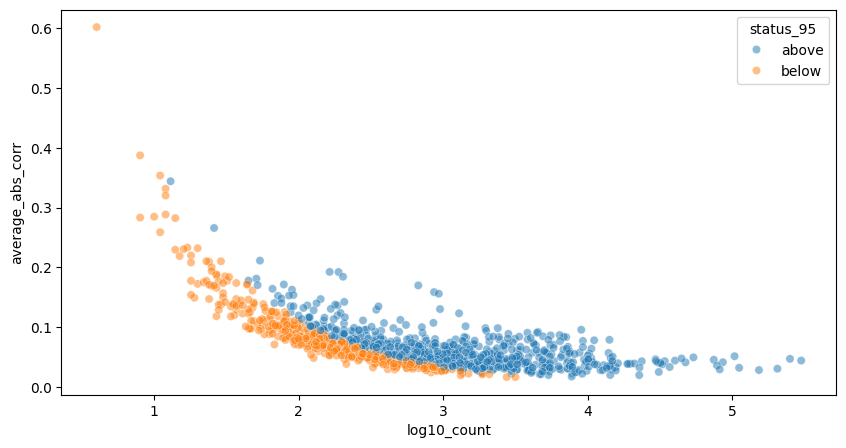

In [17]:
fit_data['status_95'] = 'above'
fit_data['status_95'][fit_data['average_abs_corr'] < fit_data['average_abs_corr_random_95_top']] = 'below'
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    data=fit_data,
    hue="status_95",
    x="log10_count",
    y="average_abs_corr",

    ax=ax,
    alpha=0.5,
)


In [20]:
fit_data.to_csv('average_corrs_divergence_random_status_individuals.csv')

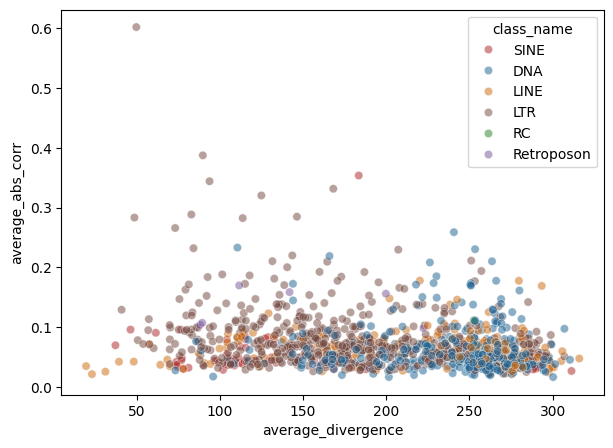

In [47]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(
    data=data_to_plot,
    hue="class_name",
    x="average_divergence",
    y="average_abs_corr",
    palette=class_names_p,
    ax=ax,
    alpha=0.5,
)
save_path = "./plots/abs_average_corr_vs_divergence_TE_individuals.svg"
fig.savefig(save_path, format="svg", transparent=True)

plt.show()

#### Random correlations

In [21]:
correlation_df_individuals = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed_random.csv", index_col=0
)
correlation_df_individuals['abs_r'] = correlation_df_individuals.r.abs()
corrs_average = correlation_df_individuals[['cell_line', 'modification', 'individual_name', 'abs_r']].groupby(['individual_name']).mean()

repeat_masker = pd.read_csv("T2T_repeat_masker_processed.csv")
divergence_average = (
    repeat_masker[["score", "individual_name"]]
    .groupby("individual_name")
    .mean()["score"]
    .reindex(corrs_average.index)
)

individuals_counts = pd.read_csv("repeat_masker_individual_name_counts.csv")
individuals_counts.columns = ["individual_name", "count"]
individuals_counts["log10_count"] = np.log10(individuals_counts["count"])
individuals_counts = individuals_counts.set_index("individual_name").reindex(corrs_average.index)


individuals_by_classes = pd.read_csv("individuals_by_classes_TE.csv").dropna()


individuals_by_classes = individuals_by_classes.set_index("individual_name").reindex(
    corrs_average.index
)

data_to_plot = pd.concat(
    [
        corrs_average,
        divergence_average,
        individuals_counts[["count", "log10_count"]],
        individuals_by_classes["class_name"],
    ],
    axis=1,
)
data_to_plot.columns = [
    "average_abs_corr",
    "average_divergence",
    "count",
    "log10_count",
    "class_name",
]

data_to_plot

/tmp/ipykernel_568/2967393721.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corrs_average = correlation_df_individuals[['cell_line', 'modification', 'individual_name', 'abs_r']].groupby(['individual_name']).mean()


average_abs_corr  average_divergence   count  \
individual_name                                                           
Alu                                0.009585          128.906839    7106   
Alu-VAR_rnd-5_family-1084          0.427724          183.454545      11   
AluJb                              0.001868          176.103257  251692   
AluJo                              0.005873          159.136869   15650   
AluJr                              0.007593          164.110565   14661   
...                                     ...                 ...     ...   
hAT-1_Mam                          0.025380          261.815292    1164   
hAT-4b_Ther                        0.068625          266.937500     176   
hAT-5_Mam                          0.030772          257.001460     685   
hAT-N1_Mam                         0.060765          272.766355     214   
hAT-N1a_Mam                        0.042832          257.520788     457   

                           log10_count class_name  
individual_name                                    
Alu                           3.851625       SINE  
Alu-VAR_rnd-5_family-1084     1.041393       SINE  
AluJb                         5.400869       SINE  
AluJo                         4.194514       SINE  
AluJr                         4.166164       SINE  
...                                ...        ...  
hAT-1_Mam                     3.065953        DNA  
hAT-4b_Ther                   2.245513        DNA  
hAT-5_Mam                     2.835691        DNA  
hAT-N1_Mam                    2.330414        DNA  
hAT-N1a_Mam                   2.659916        DNA  

[1143 rows x 5 columns]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

plt.rcParams["svg.fonttype"] = "none"  # For clean SVG text


# --- 2. Define the *CORRECTED* sigmoidal decay function ---
def sigmoid_decay(x, L, k, x0):
    """
    Sigmoidal decay function (inverse logistic).
    L: maximum value (the asymptote)
    k: steepness of the curve
    x0: the x-value of the sigmoid's midpoint
    """
    # Note: The sign on k is positive for a decay curve
    return L / (1 + np.exp(k * (x - x0)))


# --- 3. Prepare data and perform the fit ---
print("Fitting sigmoidal curve...")

fit_data = data_to_plot[["log10_count", "average_abs_corr"]].dropna()
x_data = fit_data["log10_count"]
y_data = fit_data["average_abs_corr"]

# Provide initial guesses [L, k, x0] for the *decay* curve
p0 = [y_data.max(), 1.0, x_data.median()]

try:
    popt, pcov = curve_fit(sigmoid_decay, x_data, y_data, p0=p0, maxfev=5000)
    L, k, x0 = popt
    popt_random = list(popt)
    fit_successful = True

    # --- 4. Calculate Statistics (R-squared and p-value) ---
    y_pred = sigmoid_decay(x_data, *popt)
    corr, p_value = stats.pearsonr(y_data, y_pred)
    r_squared = corr**2

    if p_value < 0.001:
        p_val_str = "p < 0.001"
    else:
        p_val_str = f"p = {p_value:.3f}"

    # Create the *corrected* equation string for the plot
    equation_text = (
        f"y = {L:.2f} / (1 + exp({k:.2f} $\\cdot$ (x - {x0:.2f})))\n"
        f"$R^2$ = {r_squared:.3f}\n"
        f"{p_val_str}"
    )

    # --- 5. NEW: Calculate 95% Upper Limit ---
    
    # Calculate relative residuals: (actual - predicted) / predicted
    # This handles the changing variance (heteroscedasticity)
    relative_residuals = (y_data - y_pred) / y_pred

    # Find the 95th percentile of these relative residuals
    rel_resid_95th = np.percentile(relative_residuals, 95)
    
    print(f"95th percentile of relative error: +{rel_resid_95th * 100:.2f}%")

except RuntimeError:
    print("Sigmoidal curve fit failed to converge.")
    fit_successful = False
    equation_text = "Fit failed to converge"


# --- 6. Create the Plot ---
print("Generating plot...")
fig, ax = plt.subplots(figsize=(7, 4))

sns.scatterplot(
    data=data_to_plot,
    hue="class_name",
    x="log10_count",
    y="average_abs_corr",
    palette=class_names_p,
    ax=ax,
    alpha=0.3,
)

if fit_successful:
    # --- 7. Plot the Mean Fit and 95% Upper Limit ---
    x_fit = np.linspace(x_data.min(), x_data.max(), 200)
    y_fit_random = sigmoid_decay(x_fit, *popt)

    # Calculate the upper limit curve using the relative residual
    y_upper_limit = y_fit * (1 + rel_resid_95th)

    # Plot the mean curve
    ax.plot(x_fit, y_fit_random, color="black", ls="--", lw=2.5, label="Mean Fit (Control)")
    x_fit_upper = np.array(x_fit)
    # Plot the new 95% upper limit curve
    ax.plot(x_fit, y_upper_limit, color="red", ls=":", lw=2.5, label="95% Upper Limit")
    

    # --- 8. Add the Equation Textbox ---
    ax.text(
        0.05, 0.95,
        equation_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        ha='left',
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.5"),
    )

# --- 9. Tidy Up and Save ---
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_title("Sigmoidal Fit of Correlation vs. Count", fontsize=16)
ax.set_xlabel("log10(Count)", fontsize=12) # Changed label
ax.set_ylabel("Average Absolute Correlation", fontsize=12)
ax.set_ylim((0, 0.225))

plt.tight_layout(rect=[0, 0, 0.85, 1])

save_path = "./plots/abs_average_corr_vs_count_TE_individuals_random.svg"
fig.savefig(save_path, format="svg")
print(f"Plot saved to {save_path}")

plt.show()

### Visualize top and bottom correlations for individuals, marks and cell lines

In [6]:
correlation_df_individuals

average_abs_corr  average_abs_corr_random  \
individual_name                                                        
Alu                                0.083056                 0.009585   
Alu-VAR_rnd-5_family-1084          0.353595                 0.427724   
AluJb                              0.046671                 0.001868   
AluJo                              0.032782                 0.005873   
AluJr                              0.037484                 0.007593   
...                                     ...                      ...   
hAT-1_Mam                          0.034412                 0.025380   
hAT-4b_Ther                        0.059600                 0.068625   
hAT-5_Mam                          0.042042                 0.030772   
hAT-N1_Mam                         0.038057                 0.060765   
hAT-N1a_Mam                        0.038595                 0.042832   

                           average_divergence   count  log10_count class_name  \
individual_name                                                                 
Alu                                128.906839    7106     3.851625       SINE   
Alu-VAR_rnd-5_family-1084          183.454545      11     1.041393       SINE   
AluJb                              176.103257  251692     5.400869       SINE   
AluJo                              159.136869   15650     4.194514       SINE   
AluJr                              164.110565   14661     4.166164       SINE   
...                                       ...     ...          ...        ...   
hAT-1_Mam                          261.815292    1164     3.065953        DNA   
hAT-4b_Ther                        266.937500     176     2.245513        DNA   
hAT-5_Mam                          257.001460     685     2.835691        DNA   
hAT-N1_Mam                         272.766355     214     2.330414        DNA   
hAT-N1a_Mam                        257.520788     457     2.659916        DNA   

                           average_abs_corr_random_95_top status_95  
individual_name                                                      
Alu                                              0.011064     above  
Alu-VAR_rnd-5_family-1084                        0.365918     below  
AluJb                                            0.001608     above  
AluJo                                            0.007219     above  
AluJr                                            0.007479     above  
...                                                   ...       ...  
hAT-1_Mam                                        0.029424     above  
hAT-4b_Ther                                      0.081718     below  
hAT-5_Mam                                        0.039193     above  
hAT-N1_Mam                                       0.073521     below  
hAT-N1a_Mam                                      0.048781     below  

[1139 rows x 8 columns]

In [14]:
correlation_df_individuals = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed.csv", index_col=0
).dropna()

average_corrs_random_check = pd.read_csv(
    "average_corrs_divergence_random_status_individuals.csv", index_col=0
).dropna()
from statsmodels.stats.multitest import multipletests

reject, p_adjusted, _, _ = multipletests(
    correlation_df_individuals["p_value"], alpha=0.05, method="fdr_bh"
)

correlation_df_individuals["q_value"] = p_adjusted
top_corrs = pd.concat(
    [
        correlation_df_individuals[correlation_df_individuals["ci_low"] > 0.4],
        correlation_df_individuals[correlation_df_individuals["ci_high"] < -0.4],
    ]
)
top_corrs=top_corrs[top_corrs['individual_name'].isin(average_corrs_random_check.index[average_corrs_random_check['status_95'] == 'above'])]
top_corrs.reset_index()

index cell_line modification individual_name         r        p_value  \
0   8583   SJCRH30      H3K4me3          LTR12F  0.488868   3.326699e-30   
1  34424     C4-2B         CTCF          AluYa5  0.446516  1.316449e-201   
2  34443     C4-2B         CTCF          AluYb8  0.516206  1.877182e-253   
3  34794     C4-2B         CTCF           SVA_F  0.536640   3.664175e-51   
4   1546    Caco-2      H3K9me3           SVA_E -0.499358   1.968450e-59   
5   1573    Caco-2      H3K9me3           SVA_B -0.519317   3.747715e-60   
6  20099     HAP-1      H3K27ac         LTR5_Hs -0.502324   1.258252e-22   
7  22147     HAP-1      H3K9me3           SVA_B -0.475179   3.329204e-49   
8  34689     C4-2B         CTCF  HERVIP10FH-int -0.532344   3.478220e-22   
9  37587     RWPE2         CTCF         LTR13_v -0.600856   2.403375e-08   

     ci_low   ci_high        q_value  
0  0.417641  0.554123   2.869358e-28  
1  0.421760  0.470607  1.299481e-198  
2  0.492281  0.539352  2.689819e-250  
3  0.480380  0.588503   6.458835e-49  
4 -0.546259 -0.449335   4.144008e-57  
5 -0.566661 -0.468555   8.200664e-58  
6 -0.578673 -0.417246   7.174784e-21  
7 -0.525570 -0.421465   5.485554e-47  
8 -0.610885 -0.443427   1.919286e-20  
9 -0.730798 -0.428889   4.327438e-07

In [15]:
reject, p_adjusted, _, _ = multipletests(
    correlation_df_individuals["p_value"].dropna(), alpha=0.05, method="fdr_bh"
)
p_adjusted

array([1.59559112e-178, 1.67909577e-079, 1.00398879e-036, ...,
       9.92725836e-001, 6.30691114e-001, 4.84101974e-001])

0        1.867869e-181
1         5.481065e-82
2         8.232433e-39
3         2.377825e-41
4         3.077889e-24
             ...      
44568     3.518171e-01
44569     5.406718e-01
44570     9.802553e-01
44571     3.597580e-01
44572     2.204615e-01
Name: p_value, Length: 44420, dtype: float64

In [4]:
p_adjusted

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:


save_path_svg = f"plots/Divergence_vs_Signal_by_individuals_sign_correlations.svg"

figure = plt.figure(figsize=(10, 5))

N_ROWS = 3
N_COLS = 4

# Increased spacing for independent labels
outer_grid = GridSpec(N_ROWS, N_COLS, figure=figure, wspace=0.4, hspace=0.5)

# --- Removed shared axes lists ---

# --- Add a cache for data loading ---
data_cache = {}

# --- Use a more Pythonic loop ---
for i, (idx, row) in enumerate(
    tqdm(top_corrs.iterrows(), total=len(top_corrs), desc="Plotting Top")
):

    # Calculate grid position
    r = i // N_COLS
    c = i % N_COLS

    # Get data from the row
    individual_name = row["individual_name"]
    cell_line = row["cell_line"]
    modification = row["modification"]

    filepath = f"./epigenomic_files/{cell_line}.{modification}.chm13v2.0.mapped_on_repeat_masker.bedGraph"

    # --- Check cache before loading ---
    if filepath in data_cache:
        tqdm.write(f"  -> Found in cache: {filepath}")
        sample_enrichment = data_cache[filepath]
    else:
        # --- Data Loading ---
        tqdm.write(f"  -> Loading data from: {filepath}")
        try:
            sample_enrichment = pd.read_csv(
                filepath,
                sep="\t",
                header=None,
            )
            data_cache[filepath] = sample_enrichment
            tqdm.write("File loaded and cached.")

        except FileNotFoundError:
            tqdm.write(f"File not found, skipping: {filepath}")
            ax = figure.add_subplot(outer_grid[r, c])
            ax.axis("off")
            continue
        except Exception as e:
            tqdm.write(
                    f"An unexpected error occurred while reading {filepath}: {e}"
            )
            ax = figure.add_subplot(outer_grid[r, c])
            ax.axis("off")
            continue

        # --- Process data (only needs to be done once, on load) ---
        sample_enrichment.columns = [
            "Chromosome",
            "Start",
            "End",
            "Divergence",
            "Name",
            "Family",
            "Class",
            "Signal",
        ]
        sample_enrichment["Signal"] = pd.to_numeric(
            sample_enrichment["Signal"], errors="coerce"
        )
        sample_enrichment["Divergence"] = pd.to_numeric(
            sample_enrichment["Divergence"], errors="coerce"
        )
        data_cache[filepath] = sample_enrichment

    # --- Query must be done every time ---
    query_local = f'Name == "{individual_name}"'
    sample_enrichment_local = sample_enrichment.query(query_local)

    # --- Create *single* axis for this plot ---
    ax_main = figure.add_subplot(outer_grid[r, c])

    # --- Plot the data ---
    sns.histplot(
        data=sample_enrichment_local,
        x="Divergence",
        y="Signal",
        bins=48,
        pmax=0.9,
        cmap="viridis",
        ax=ax_main,
    )

    # --- Tidy up: Main plot ticks/labels ---
    ax_main.set_facecolor("black")
    ax_main.set_xlabel("Divergence", fontsize=10)
    ax_main.set_ylabel(f"{cell_line}\n{modification}", fontsize=10)

    # Set spine colors to white

    corr_coef, p_val, ci_low, ci_high = row["r"], row["p_value"], row["ci_low"], row["ci_high"]


    corr_str = f"r = {corr_coef:.3f} [{ci_low:.3f}, {ci_high:.3f}]"

    ax_main.set_title(f"{individual_name}\n{corr_str}", fontsize=10, pad=10)


figure.tight_layout()  # Add tight_layout to prevent label overlap
figure.savefig(save_path_svg, format="svg", facecolor="white", transparent=False)
plt.show()

print(f"Plot saved to {save_path_svg}")

Plotting Top:   0%|          | 0/10 [00:00<?, ?it/s]

  -> Loading data from: ./epigenomic_files/SJCRH30.H3K4me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


/tmp/ipykernel_155/1469328035.py:40: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_enrichment = pd.read_csv(
Plotting Top:   0%|          | 0/10 [00:02<?, ?it/s]

File loaded and cached.


Plotting Top:  10%|█         | 1/10 [00:03<00:31,  3.48s/it]

  -> Loading data from: ./epigenomic_files/C4-2B.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top:  10%|█         | 1/10 [00:05<00:31,  3.48s/it]

File loaded and cached.


Plotting Top:  40%|████      | 4/10 [00:07<00:08,  1.37s/it]

  -> Found in cache: ./epigenomic_files/C4-2B.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Found in cache: ./epigenomic_files/C4-2B.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/Caco-2.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top:  40%|████      | 4/10 [00:09<00:08,  1.37s/it]

File loaded and cached.


Plotting Top:  50%|█████     | 5/10 [00:10<00:10,  2.04s/it]

  -> Found in cache: ./epigenomic_files/Caco-2.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/HAP-1.H3K27ac.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top:  50%|█████     | 5/10 [00:13<00:10,  2.04s/it]

File loaded and cached.


Plotting Top:  70%|███████   | 7/10 [00:14<00:05,  1.93s/it]

  -> Loading data from: ./epigenomic_files/HAP-1.H3K9me3.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top:  70%|███████   | 7/10 [00:16<00:05,  1.93s/it]

File loaded and cached.


Plotting Top:  80%|████████  | 8/10 [00:18<00:04,  2.36s/it]

  -> Found in cache: ./epigenomic_files/C4-2B.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph
  -> Loading data from: ./epigenomic_files/RWPE2.CTCF.chm13v2.0.mapped_on_repeat_masker.bedGraph


Plotting Top:  80%|████████  | 8/10 [00:20<00:04,  2.36s/it]

File loaded and cached.


Plotting Top: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]
/tmp/ipykernel_155/1469328035.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  figure.tight_layout()  # Add tight_layout to prevent label overlap


In [41]:
sample_enrichment

Chromosome     Start       End  Divergence      Name       Family  \
0             chr1         0      7536         223     L1MC3           L1   
1             chr1      4082      4796         273    LTR60B         ERV1   
2             chr1      4082      4837         205    LTR60B         ERV1   
3             chr1      5267      5850         147  MER34C_v         ERV1   
4             chr1      5685      6131         148     MSTA1    ERVL-MaLR   
...            ...       ...       ...         ...       ...          ...   
3709424       chrY  62443446  62449578          84      L1P1           L1   
3709425       chrY  62445666  62449071         338       L2a           L2   
3709426       chrY  62446656  62452812         204    L1MC5a           L1   
3709427       chrY  62448384  62448649         230      MIR3          MIR   
3709428       chrY  62452002  62452180         294     MER5B  hAT-Charlie   

        Class    Signal  
0        LINE -0.056950  
1         LTR  2.292738  
2         LTR  2.292738  
3         LTR -1.262659  
4         LTR -0.955075  
...       ...       ...  
3709424  LINE       NaN  
3709425  LINE       NaN  
3709426  LINE  2.663848  
3709427  SINE       NaN  
3709428   DNA       NaN  

[3709429 rows x 8 columns]

### Clustermap of correlation coefficients

In [9]:
correlation_df_individuals = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed.csv", index_col=0
)
correlation_df_individuals = pd.pivot_table(correlation_df_individuals, values='r', index=['cell_line', 'modification'],
                       columns=['individual_name'], aggfunc="sum", fill_value=0).reset_index()
correlation_df_individuals.index = (
    correlation_df_individuals.cell_line + " " + correlation_df_individuals.modification
)
correlation_df_individuals

individual_name  cell_line modification       Alu  Alu-VAR_rnd-5_family-1084  \
22Rv1 CTCF           22Rv1         CTCF -0.049995                  -0.498205   
22Rv1 H3K27ac        22Rv1      H3K27ac -0.059728                  -0.160167   
BE2C H3K27me3         BE2C     H3K27me3 -0.084181                   0.280406   
BE2C H3K36me3         BE2C     H3K36me3 -0.075364                  -0.273259   
BE2C H3K4me1          BE2C      H3K4me1 -0.076916                  -0.299053   
BE2C H3K9me3          BE2C      H3K9me3  0.120999                  -0.236452   
C4-2B CTCF           C4-2B         CTCF -0.048668                  -0.542775   
C4-2B H3K27ac        C4-2B      H3K27ac  0.111234                   0.088380   
Caco-2 H3K4me1      Caco-2      H3K4me1 -0.067082                   0.165700   
Caco-2 H3K9me3      Caco-2      H3K9me3  0.167098                   0.101385   
HAP-1 H3K27ac        HAP-1      H3K27ac -0.099146                   0.633350   
HAP-1 H3K27me3       HAP-1     H3K27me3 -0.083521                   0.598815   
HAP-1 H3K36me3       HAP-1     H3K36me3 -0.039749                   0.166456   
HAP-1 H3K4me1        HAP-1      H3K4me1 -0.083721                   0.153067   
HAP-1 H3K4me3        HAP-1      H3K4me3 -0.036151                   0.303394   
HAP-1 H3K9me3        HAP-1      H3K9me3  0.149668                  -0.401166   
HL-60 H3K27ac        HL-60      H3K27ac -0.043284                   0.000058   
MG63 H3K27me3         MG63     H3K27me3 -0.027356                  -0.540191   
MG63 H3K36me3         MG63     H3K36me3 -0.037637                  -0.875145   
MG63 H3K4me3          MG63      H3K4me3 -0.019848                  -0.853394   
MG63 H3K9me3          MG63      H3K9me3  0.211774                  -0.854016   
RWPE1 CTCF           RWPE1         CTCF -0.124167                   0.543780   
RWPE1 H3K27ac        RWPE1      H3K27ac -0.183971                   0.672014   
RWPE2 CTCF           RWPE2         CTCF -0.148475                   0.440648   
RWPE2 H3K27ac        RWPE2      H3K27ac -0.159422                   0.000000   
RWPE2 H3K36me3       RWPE2     H3K36me3 -0.097138                   0.528928   
SJCRH30 H3K27ac    SJCRH30      H3K27ac  0.052783                   0.001899   
SJCRH30 H3K27me3   SJCRH30     H3K27me3 -0.053581                   0.185441   
SJCRH30 H3K36me3   SJCRH30     H3K36me3 -0.060900                  -0.640215   
SJCRH30 H3K4me1    SJCRH30      H3K4me1 -0.042607                  -0.096366   
SJCRH30 H3K4me3    SJCRH30      H3K4me3  0.011922                   0.240755   
SJCRH30 H3K9me3    SJCRH30      H3K9me3  0.044013                  -0.496643   
SJSA1 H3K27ac        SJSA1      H3K27ac -0.025457                   0.523123   
SJSA1 H3K27me3       SJSA1     H3K27me3 -0.046986                   0.064192   
SJSA1 H3K36me3       SJSA1     H3K36me3 -0.002794                  -0.204521   
SJSA1 H3K4me3        SJSA1      H3K4me3  0.067247                   0.227044   
SJSA1 H3K9me3        SJSA1      H3K9me3  0.266664                  -0.223401   
VCaP CTCF             VCaP         CTCF  0.040639                   0.277363   
VCaP H3K27ac          VCaP      H3K27ac -0.117295                   0.045446   

individual_name      AluJb     AluJo     AluJr    AluJr4     AluSc    AluSc5  \
22Rv1 CTCF       -0.069052 -0.049915 -0.060360 -0.025729 -0.045975 -0.063362   
22Rv1 H3K27ac    -0.081915 -0.054216 -0.065379 -0.039090 -0.067015 -0.070083   
BE2C H3K27me3    -0.022128 -0.007346 -0.016801 -0.026217  0.001986  0.001531   
BE2C H3K36me3    -0.028845 -0.004833 -0.015169 -0.039727 -0.044718 -0.013221   
BE2C H3K4me1      0.006137  0.004465  0.004888 -0.033333 -0.007299  0.003539   
BE2C H3K9me3      0.022137  0.018936  0.013509 -0.004987  0.027468 -0.041457   
C4-2B CTCF        0.218054  0.093572  0.123254  0.044859  0.119607  0.222724   
C4-2B H3K27ac    -0.008754 -0.024516 -0.032647  0.013886 -0.003671  0.052033   
Caco-2 H3K4me1   -0.038684 -0.019540 -0.018782 -0.034398 -0.046298 -0.011919   

In [10]:
correlation_df_individuals[correlation_df_individuals.columns[correlation_df_individuals.columns.str.startswith('AluY')]]



individual_name       AluY    AluYa5    AluYa8    AluYb8    AluYb9     AluYc  \
22Rv1 CTCF       -0.051823 -0.018257 -0.038588 -0.048360 -0.064204 -0.046009   
22Rv1 H3K27ac    -0.042863 -0.008793 -0.008179 -0.002650  0.094712 -0.018089   
BE2C H3K27me3    -0.010955 -0.008678  0.029147  0.030706 -0.003791  0.047367   
BE2C H3K36me3    -0.001889  0.048281  0.086157  0.107314  0.128182  0.056941   
BE2C H3K4me1      0.012292  0.076592  0.099490  0.123840  0.123286  0.045106   
BE2C H3K9me3      0.021699  0.077931  0.010217  0.008398 -0.016473  0.041530   
C4-2B CTCF        0.143768  0.446516  0.316122  0.516206  0.488445  0.131691   
C4-2B H3K27ac     0.022637  0.196969  0.112808  0.174622  0.304978  0.026918   
Caco-2 H3K4me1   -0.031535  0.018596  0.009798  0.032741  0.173452 -0.035897   
Caco-2 H3K9me3    0.007901  0.001410 -0.061090 -0.165262 -0.114889 -0.040713   
HAP-1 H3K27ac    -0.027886 -0.017474 -0.025690  0.055620  0.069203 -0.016197   
HAP-1 H3K27me3   -0.013783 -0.099007 -0.015043 -0.023864  0.033733 -0.018817   
HAP-1 H3K36me3   -0.015467  0.000969  0.001777  0.072871  0.014127  0.025861   
HAP-1 H3K4me1    -0.013946  0.063325  0.020209  0.128720  0.098340 -0.030153   
HAP-1 H3K4me3    -0.047000 -0.020357 -0.064747  0.002380 -0.006676 -0.057671   
HAP-1 H3K9me3     0.003118  0.000815 -0.065441 -0.062551 -0.059109 -0.021680   
HL-60 H3K27ac    -0.019477  0.016950  0.028018  0.118230  0.047768 -0.009788   
MG63 H3K27me3    -0.023578  0.032216  0.029499  0.107550  0.141549  0.005446   
MG63 H3K36me3    -0.032937  0.040476  0.010921  0.141373  0.239844  0.016022   
MG63 H3K4me3     -0.038441  0.026054 -0.004511  0.051539  0.015577 -0.025910   
MG63 H3K9me3      0.036429  0.112569 -0.018695  0.026676  0.037647  0.003238   
RWPE1 CTCF        0.005917  0.151272 -0.006471  0.209033  0.027799 -0.013412   
RWPE1 H3K27ac    -0.159356 -0.274407 -0.173499 -0.160799 -0.053371 -0.156009   
RWPE2 CTCF       -0.054791 -0.197983 -0.125729 -0.189606 -0.135815 -0.065094   
RWPE2 H3K27ac    -0.075046 -0.148570 -0.070794 -0.086208  0.000740 -0.054863   
RWPE2 H3K36me3   -0.009251 -0.124559  0.003862 -0.065237 -0.026936  0.044531   
SJCRH30 H3K27ac  -0.000292  0.008273  0.012300  0.042617  0.109024 -0.003433   
SJCRH30 H3K27me3  0.010426 -0.013093  0.036698  0.022255  0.031679  0.016504   
SJCRH30 H3K36me3  0.001519  0.041196  0.026129  0.126356  0.014927  0.022441   
SJCRH30 H3K4me1   0.009992  0.097006  0.062007  0.161861  0.224306  0.028917   
SJCRH30 H3K4me3  -0.019895  0.020907  0.037487  0.068252  0.055384  0.013398   
SJCRH30 H3K9me3   0.012966  0.009016  0.031995  0.038615  0.021260  0.008257   
SJSA1 H3K27ac    -0.022583  0.007518  0.031246  0.059587  0.116059  0.005779   
SJSA1 H3K27me3   -0.017274  0.028478  0.076033  0.058838  0.085238 -0.009200   
SJSA1 H3K36me3   -0.043350  0.068097  0.043450  0.106165  0.151186  0.021510   
SJSA1 H3K4me3    -0.041164  0.023193 -0.042791  0.000660  0.124244 -0.013260   
SJSA1 H3K9me3     0.022225  0.151352  0.019291  0.021378  0.066580  0.019163   
VCaP CTCF        -0.033568  0.005071 -0.048078 -0.083084 -0.034707 -0.033496   
VCaP H3K27ac     -0.077515  0.002449  0.026209  0.020072  0.173627 -0.066667   

individual_name     AluYc3    AluYd8    AluYe5    AluYe6  ...    AluYh9  \
22Rv1 CTCF       -0.113832 -0.059129 -0.062881 -0.130100  ...  0.001388   
22Rv1 H3K27ac    -0.084414  0.097175 -0.006109  0.003948  ... -0.011454   
BE2C H3K27me3    -0.022751 -0.051942  0.010967  0.046618  ... -0.026993   
BE2C H3K36me3    -0.039573  0.032148  0.063188  0.123744  ...  0.041984   
BE2C H3K4me1      0.094201  0.074451  0.042479  0.061212  ...  0.022015   
BE2C H3K9me3     -0.018325 -0.024579 -0.019506 -0.083908  ...  0.008895   
C4-2B CTCF        0.352905  0.449602  0.208517  0.257018  ...  0.132287   
C4-2B H3K27ac     0.087362  0.238755  0.111046  0.093487  ...  0.086735   
Caco-2 H3K4me1    0.049698  0.024725  0.011030 -0.040065  ...  0.012281   
Caco-2 H3K9me3   -0.146016 -0.165927 -0.078823 -0

In [18]:
individuals_counts = pd.read_csv("repeat_masker_individual_name_counts.csv")
individuals_counts.columns = ["individual_name", "count"]

individual_names = individuals_counts['individual_name'][:500]
individual_names=correlation_df_individuals.columns[correlation_df_individuals.columns.str.startswith('AluY')]
individual_names = ['LTR12F', 'LTR5_Hs', 'HERVIP10FH-int', 'LTR13_v']
individuals_by_classes = pd.read_csv("individuals_by_classes_TE.csv").dropna()

individuals_by_classes = individuals_by_classes.set_index("individual_name").reindex(
    individual_names
)


individuals_by_classes

Unnamed: 0 class_name
individual_name                       
LTR12F                17209        LTR
LTR5_Hs                 817        LTR
HERVIP10FH-int          923        LTR
LTR13_v                 675        LTR

In [19]:
len(individual_names)

4

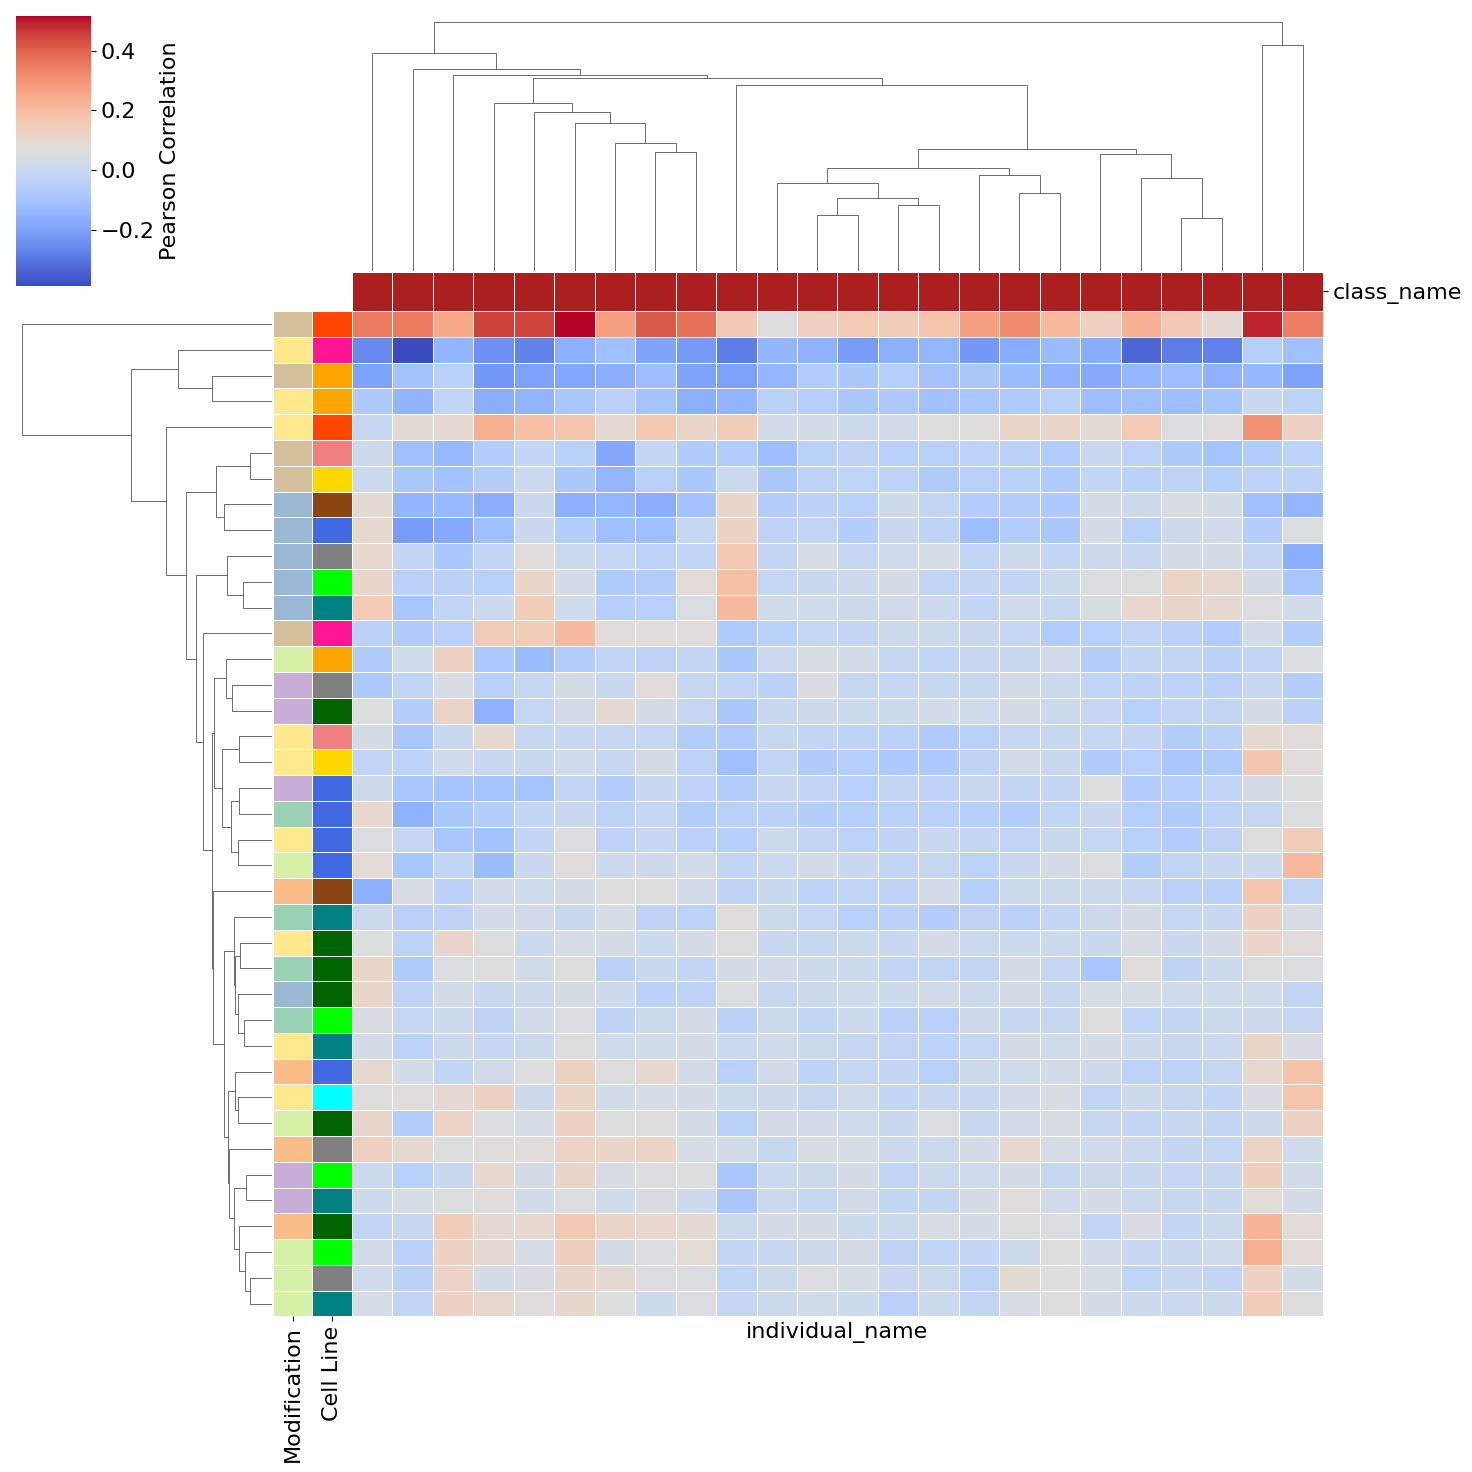

In [14]:
plt.rcParams.update({'font.size': 16})

# --- 1. Prepare Row Colors ---
# Map the 'cell_line' and 'modification' columns to their respective colors
mapped_cell_colors = correlation_df_individuals["cell_line"].map(cell_line_p)
mapped_mod_colors = correlation_df_individuals["modification"].map(
    modification_p_richer
)

individuals_by_classes = pd.read_csv("individuals_by_classes_TE.csv").dropna()

individuals_by_classes = individuals_by_classes.set_index("individual_name").reindex(
    individual_names
)
mapped_individuals_colors = individuals_by_classes["class_name"].map(class_names_p)

# Create a DataFrame for the row_colors argument
# The column names (e.g., 'Cell Line') will appear as labels.
row_colors_df = pd.DataFrame(
    {"Cell Line": mapped_cell_colors, "Modification": mapped_mod_colors}
)
# Important: The index must align with the data being plotted
row_colors_df.index = correlation_df_individuals.index


# --- 2. Plot the Clustermap ---
data_to_plot = correlation_df_individuals[individual_names].T


g = sns.clustermap(
    data_to_plot.T,
    cmap="coolwarm",
    # Goal 1: Customize figsize
    figsize=(15, 15),
    # Goal 2 & 3: Add row colors using the mapped palettes
    # We use row_colors, as 'cell_line' and 'modification' describe the rows
    row_colors=row_colors_df[["Modification", "Cell Line"]],
    col_colors=mapped_individuals_colors,
    # Other aesthetic improvements
    # vmin=-1, vmax=1,          # Set colorbar limits for correlation
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"},
    #xticklabels=False, yticklabels=False
    # metric='correlation'      # Use correlation for clustering distance
)
#g.ax_col_dendrogram.set_visible(False)

# --- 3. Save the Figure ---
save_path = "./plots/signal_to_divergence_corr_clustermap_individuals_AluY.svg"
save_path_png = "./plots/signal_to_divergence_corr_clustermap_individuals_AluY.png"

# Goal 4: Save as SVG
g.savefig(save_path, format="svg")
g.savefig(save_path_png, format="png")

plt.show()

#### Permutation test

In [43]:




# Calculate pairwise Euclidean distances
# Ensure you select only the numerical columns for distance calculation
distances = pdist(data_matrix, metric='euclidean')
# Convert the condensed distance matrix to a squareform matrix
distance_matrix_raw = squareform(distances)
pd.DataFrame(distance_matrix)

0         1         2         3         4         5         6   \
0   0.000000  3.341558  4.289003  4.512617  4.371045  4.374652  5.927663   
1   3.341558  0.000000  4.906209  4.471973  4.552365  4.790406  6.521843   
2   4.289003  4.906209  0.000000  3.879622  3.732190  4.026916  5.632108   
3   4.512617  4.471973  3.879622  0.000000  3.162112  4.004290  5.647819   
4   4.371045  4.552365  3.732190  3.162112  0.000000  4.174062  5.047177   
5   4.374652  4.790406  4.026916  4.004290  4.174062  0.000000  5.584284   
6   5.927663  6.521843  5.632108  5.647819  5.047177  5.584284  0.000000   
7   4.162818  4.024258  4.676502  4.712453  4.658695  5.268336  6.306933   
8   4.261968  3.944025  4.321334  4.423120  4.297796  4.793225  5.980029   
9   4.716334  4.994731  5.104962  5.339567  5.513014  3.911761  6.019536   
10  4.529687  4.291134  4.438962  3.805906  4.037299  5.044101  6.024076   
11  4.546740  4.880217  3.577766  5.139903  4.662259  5.006724  6.206002   
12  4.477928  4.300719  4.386414  3.544173  4.404764  4.768448  6.314645   
13  4.628074  4.602456  4.207035  4.067076  3.844628  5.174051  5.547128   
14  4.034660  4.104041  3.896942  4.090694  4.228159  4.586360  6.195171   
15  4.707245  4.990869  5.073328  5.451646  5.641172  3.722328  6.591502   
16  4.420350  4.070313  4.393274  3.878802  4.152159  4.836423  5.746974   
17  4.135233  4.847551  3.473943  4.543113  4.160945  4.173586  5.357531   
18  4.787678  4.704705  4.836953  3.612032  4.480747  5.400269  6.286012   
19  4.142813  4.007963  4.397410  4.174393  4.134818  4.497529  5.505336   
20  4.726250  5.257985  4.748186  4.737170  4.864898  4.038331  5.297242   
21  5.596319  6.022178  5.440183  6.075377  5.721144  5.288573  4.535819   
22  4.637485  4.637697  5.372476  5.406057  5.944552  5.922672  8.190276   
23  3.487693  4.454037  4.496829  4.729311  4.671893  4.655153  5.549839   
24  4.353943  4.129013  4.644186  3.844518  4.347746  5.212567  6.288813   
25  5.033652  4.728942  4.872683  3.587808  4.639058  5.140966  5.749519   
26  4.212130  4.396643  4.123696  4.328042  4.017937  4.178417  5.256667   
27  4.450941  4.890095  3.829607  5.181525  4.530336  4.374410  5.636282   
28  4.815894  4.694416  4.385986  3.250494  3.993091  4.858921  5.440092   
29  4.445020  4.482028  4.219353  4.180300  3.720543  4.911809  5.334640   
30  3.943663  3.817613  3.958621  4.033444  3.773578  4.279575  5.378986   
31  4.955950  5.250252  4.404336  4.473580  4.416836  4.218596  4.995142   
32  4.666926  4.440402  4.497592  4.308048  4.384725  4.982498  5.834928   
33  4.294769  4.718574  3.412029  4.517751  4.155414  4.468346  5.412828   
34  4.728140  4.531653  4.635339  3.428587  4.294796  5.080235  6.308572   
35  3.858442  3.848679  4.265205  4.225612  4.434526  4.512022  6.176165   
36  5.242384  5.733588  5.723786  5.991632  5.817238  4.040016  5.812013   
37  3.694132  4.750366  4.420380  4.847122  4.638159  4.173435  5.279033   
38  4.054882  3.498066  4.503232  3.986880  4.153921  5.370381  6.496084   

          7         8         9   ...        29        30        31        32  \
0   4.162818  4.261968  4.716334  ...  4.445020  3.943663  4.955950  4.666926   
1   4.024258  3.944025  4.994731  ...  4.482028  3.817613  5.250252  4.440402   
2   4.676502  4.321334  5.104962  ...  4.219353  3.958621  4.404336  4.497592   
3   4.712453  4.423120  5.339567  ...  4.180300  4.033444  4.473580  4.308048   
4   4.658695  4.297796  5.513014  ...  3.720543  3.773578  4.416836  4.384725   
5   5.268336  4.793225  3.911761  ...  4.911809  4.279575  4.218596  4.982498   
6   6.306933  5.980029  6.019536  ...  5.334640  5.378986  4.995142  5.834928   
7   0.000000  4.332514  5.622321  ...  4.707282  4.421052  5.311185  4.905517   
8   4.332514  0.000000  4.682782  ...  3.875040  3.887141  4.696567  4.019843   
9   5.622321  4.682782  0.000000  ...  5.279568  4.885872  4.212825  5.042249   
10  4.840726  4.380491  5.678330  ...  4.023283  3.898698  5.026397  3.975663 

In [47]:
distance_matrix_raw

array([[0.        , 3.34155841, 4.28900322, ..., 5.24238423, 3.69413186,
        4.05488154],
       [3.34155841, 0.        , 4.90620944, ..., 5.73358824, 4.75036623,
        3.49806615],
       [4.28900322, 4.90620944, 0.        , ..., 5.72378624, 4.42038024,
        4.50323187],
       ...,
       [5.24238423, 5.73358824, 5.72378624, ..., 0.        , 4.8458438 ,
        6.68944133],
       [3.69413186, 4.75036623, 4.42038024, ..., 4.8458438 , 0.        ,
        4.84189531],
       [4.05488154, 3.49806615, 4.50323187, ..., 6.68944133, 4.84189531,
        0.        ]], shape=(39, 39))

In [49]:
DistanceMatrix(PairwiseMatrix(distance_matrix_raw))

In [ ]:
skbio.stats.distance.SymmetricMatrix

In [67]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy import stats
from scipy.spatial.distance import pdist, squareform

# --- Imports for PERMANOVA Test ---
# You must install scikit-bio: pip install scikit-bio
try:
    from skbio.stats.distance import DistanceMatrix, permanova, SymmetricMatrix, PairwiseMatrix
    from sklearn.metrics import pairwise_distances
except ImportError:
    print("Error: scikit-bio or sklearn not found.")
    print("Please run: pip install scikit-bio scikit-learn")
    exit()

# --- Helper Class for Colored Logging ---
class Logger:
    """A simple logger for pretty, colored console output."""
    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    ENDC = "\033[0m"
    @staticmethod
    def info(message): print(f"{Logger.BLUE}INFO: {message}{Logger.ENDC}")
    @staticmethod
    def success(message): print(f"{Logger.GREEN}SUCCESS: {message}{Logger.ENDC}")
    @staticmethod
    def warning(message): print(f"{Logger.YELLOW}WARNING: {message}{Logger.ENDC}")

# --- 1. Load the Data ---
# (This logic is copied from your plotting script)
Logger.info("Loading correlation data...")
try:
    # We need the 'cell_line' and 'modification' columns, so we don't use .T
    # We also need the original index, so don't set index_col=0
    correlation_df_individuals = pd.read_csv(
        "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed.csv", index_col=0
    )
    correlation_df_individuals = pd.pivot_table(correlation_df_individuals, values='r', index=['cell_line', 'modification'],
                           columns=['individual_name'], aggfunc="sum", fill_value=0).reset_index()
    correlation_df_individuals.index = (
        correlation_df_individuals.cell_line + " " + correlation_df_individuals.modification
    )
    # Get the list of TE names (all columns except the first two)
    individual_names = list(correlation_df_individuals.columns[2:])
    
except FileNotFoundError:
    Logger.warning("Error: Data file not found. This script must run after the correlation script.")
    exit()

# --- 2. Prepare Data for PERMANOVA ---
Logger.info("Preparing data for PERMANOVA test...")

data_matrix = correlation_df_individuals[individual_names]
grouping_df = correlation_df_individuals[["cell_line", "modification"]]

# --- 3. Calculate the Distance Matrix ---
# We use 'euclidean' as it's the default metric for sns.clustermap.
# This ensures we are testing the same clustering the user is seeing.
Logger.info("Calculating Euclidean distance matrix...")
distances = pdist(data_matrix, metric='euclidean')
# Convert the condensed distance matrix to a squareform matrix
distance_matrix_raw = squareform(distances)

# Convert to skbio's DistanceMatrix object, using the index
# (This is good practice, though not strictly required)
#dist_matrix = DistanceMatrix(dist_matrix_raw, ids=grouping_df.index)
dist_matrix=DistanceMatrix(PairwiseMatrix(distance_matrix_raw), ids=grouping_df.index)

# We use 9999 permutations for a robust p-value.
Logger.info("Running PERMANOVA (9999 permutations)...")

# Test 'Modification' alone
results_mod = permanova(
    dist_matrix, 
    grouping_df['modification'], 
    permutations=1000000
)

# Test 'Cell Line' alone
results_cell = permanova(
    dist_matrix, 
    grouping_df['cell_line'], 
    permutations=1000000
)


# --- 5. Print the Results ---
Logger.success("\n--- PERMANOVA Test Results ---")

print("\n--- Test 1: Clustering by 'Modification' ---")
print(f"  R-squared: {results_mod['R^2']:.4f}")
print(f"  p-value:   {results_mod['p-value']:.4f}")
if results_mod['p-value'] < 0.05:
    print("  RESULT: Clustering by 'Modification' is STATISTICALLY SIGNIFICANT.")
else:
    print("  RESULT: Clustering by 'Modification' is NOT significant.")

print("\n--- Test 2: Clustering by 'Cell Line' ---")
print(f"  R-squared: {results_cell['R^2']:.4f}")
print(f"  p-value:   {results_cell['p-value']:.4f}")
if results_cell['p-value'] < 0.05:
    print("  RESULT: Clustering by 'Cell Line' is STATISTICALLY SIGNIFICANT.")
else:
    print("  RESULT: Clustering by 'Cell Line' is NOT significant.")


print("\n--- Interpretation ---")
print("R-squared (R^2) is the effect size. It shows how much of the variation")
print("in the distance matrix is 'explained' by the grouping variable(s).")
print("A high R^2 for 'Cell Line' and a low R^2 for 'Modification'")
print("would suggest that the primary clustering is driven by cell line, not modification.")

INFO: Loading correlation data...
INFO: Preparing data for PERMANOVA test...
INFO: Calculating Euclidean distance matrix...
INFO: Running PERMANOVA (9999 permutations)...
SUCCESS: 
--- PERMANOVA Test Results ---

--- Test 1: Clustering by 'Modification' ---


KeyError: 'R^2'

In [65]:
results_mod

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      39
number of groups                  7
test statistic             3.121429
p-value                     0.00001
number of permutations       100000
Name: PERMANOVA results, dtype: object

In [66]:
results_cell

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      39
number of groups                 12
test statistic             1.722952
p-value                     0.00001
number of permutations       100000
Name: PERMANOVA results, dtype: object

In [61]:
r2 = 1 - 1 / (1 + results_mod[4] * results_mod[3] / (results_mod[2] - results_mod[3] - 1))
r2

/tmp/ipykernel_328/2669957864.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r2 = 1 - 1 / (1 + results_mod[4] * results_mod[3] / (results_mod[2] - results_mod[3] - 1))


np.float64(0.4134342513506062)

In [62]:
r2 = 1 - 1 / (1 + results_cell[4] * results_cell[3] / (results_cell[2] - results_cell[3] - 1))
r2

/tmp/ipykernel_328/1062212345.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r2 = 1 - 1 / (1 + results_cell[4] * results_cell[3] / (results_cell[2] - results_cell[3] - 1))


np.float64(0.4429616814326609)

In [38]:
np.allclose(distance_matrix_raw, distance_matrix_raw.T, rtol=1e-05, atol=1e-08)

True

In [37]:
pd.DataFrame(distance_matrix_raw).dropna()

0         1         2         3         4         5         6   \
0   0.000000  3.341558  4.289003  4.512617  4.371045  4.374652  5.927663   
1   3.341558  0.000000  4.906209  4.471973  4.552365  4.790406  6.521843   
2   4.289003  4.906209  0.000000  3.879622  3.732190  4.026916  5.632108   
3   4.512617  4.471973  3.879622  0.000000  3.162112  4.004290  5.647819   
4   4.371045  4.552365  3.732190  3.162112  0.000000  4.174062  5.047177   
5   4.374652  4.790406  4.026916  4.004290  4.174062  0.000000  5.584284   
6   5.927663  6.521843  5.632108  5.647819  5.047177  5.584284  0.000000   
7   4.162818  4.024258  4.676502  4.712453  4.658695  5.268336  6.306933   
8   4.261968  3.944025  4.321334  4.423120  4.297796  4.793225  5.980029   
9   4.716334  4.994731  5.104962  5.339567  5.513014  3.911761  6.019536   
10  4.529687  4.291134  4.438962  3.805906  4.037299  5.044101  6.024076   
11  4.546740  4.880217  3.577766  5.139903  4.662259  5.006724  6.206002   
12  4.477928  4.300719  4.386414  3.544173  4.404764  4.768448  6.314645   
13  4.628074  4.602456  4.207035  4.067076  3.844628  5.174051  5.547128   
14  4.034660  4.104041  3.896942  4.090694  4.228159  4.586360  6.195171   
15  4.707245  4.990869  5.073328  5.451646  5.641172  3.722328  6.591502   
16  4.420350  4.070313  4.393274  3.878802  4.152159  4.836423  5.746974   
17  4.135233  4.847551  3.473943  4.543113  4.160945  4.173586  5.357531   
18  4.787678  4.704705  4.836953  3.612032  4.480747  5.400269  6.286012   
19  4.142813  4.007963  4.397410  4.174393  4.134818  4.497529  5.505336   
20  4.726250  5.257985  4.748186  4.737170  4.864898  4.038331  5.297242   
21  5.596319  6.022178  5.440183  6.075377  5.721144  5.288573  4.535819   
22  4.637485  4.637697  5.372476  5.406057  5.944552  5.922672  8.190276   
23  3.487693  4.454037  4.496829  4.729311  4.671893  4.655153  5.549839   
24  4.353943  4.129013  4.644186  3.844518  4.347746  5.212567  6.288813   
25  5.033652  4.728942  4.872683  3.587808  4.639058  5.140966  5.749519   
26  4.212130  4.396643  4.123696  4.328042  4.017937  4.178417  5.256667   
27  4.450941  4.890095  3.829607  5.181525  4.530336  4.374410  5.636282   
28  4.815894  4.694416  4.385986  3.250494  3.993091  4.858921  5.440092   
29  4.445020  4.482028  4.219353  4.180300  3.720543  4.911809  5.334640   
30  3.943663  3.817613  3.958621  4.033444  3.773578  4.279575  5.378986   
31  4.955950  5.250252  4.404336  4.473580  4.416836  4.218596  4.995142   
32  4.666926  4.440402  4.497592  4.308048  4.384725  4.982498  5.834928   
33  4.294769  4.718574  3.412029  4.517751  4.155414  4.468346  5.412828   
34  4.728140  4.531653  4.635339  3.428587  4.294796  5.080235  6.308572   
35  3.858442  3.848679  4.265205  4.225612  4.434526  4.512022  6.176165   
36  5.242384  5.733588  5.723786  5.991632  5.817238  4.040016  5.812013   
37  3.694132  4.750366  4.420380  4.847122  4.638159  4.173435  5.279033   
38  4.054882  3.498066  4.503232  3.986880  4.153921  5.370381  6.496084   

          7         8         9   ...        29        30        31        32  \
0   4.162818  4.261968  4.716334  ...  4.445020  3.943663  4.955950  4.666926   
1   4.024258  3.944025  4.994731  ...  4.482028  3.817613  5.250252  4.440402   
2   4.676502  4.321334  5.104962  ...  4.219353  3.958621  4.404336  4.497592   
3   4.712453  4.423120  5.339567  ...  4.180300  4.033444  4.473580  4.308048   
4   4.658695  4.297796  5.513014  ...  3.720543  3.773578  4.416836  4.384725   
5   5.268336  4.793225  3.911761  ...  4.911809  4.279575  4.218596  4.982498   
6   6.306933  5.980029  6.019536  ...  5.334640  5.378986  4.995142  5.834928   
7   0.000000  4.332514  5.622321  ...  4.707282  4.421052  5.311185  4.905517   
8   4.332514  0.000000  4.682782  ...  3.875040  3.887141  4.696567  4.019843   
9   5.622321  4.682782  0.000000  ...  5.279568  4.885872  4.212825  5.042249   
10  4.840726  4.380491  5.678330  ...  4.023283  3.898698  5.026397  3.975663 

### Clustermaps by TE class

In [6]:


individuals_by_classes

Unnamed: 0 class_name
individual_name                       
L1MC3                     0       LINE
LTR60B                    1        LTR
MER34C_v                  3        LTR
MSTA1                     4        LTR
MER4A1                    5        LTR
...                     ...        ...
HERV1_I              979458        LTR
HERV1_LTRe          1080619        LTR
HERV1_LTRb          1353517        LTR
HERV-Fc1-int        1660492        LTR
HERV-Fc1_LTR2       2385090        LTR

[1143 rows x 2 columns]

/home/jovyan/venvs/bioreactor/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jovyan/venvs/bioreactor/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


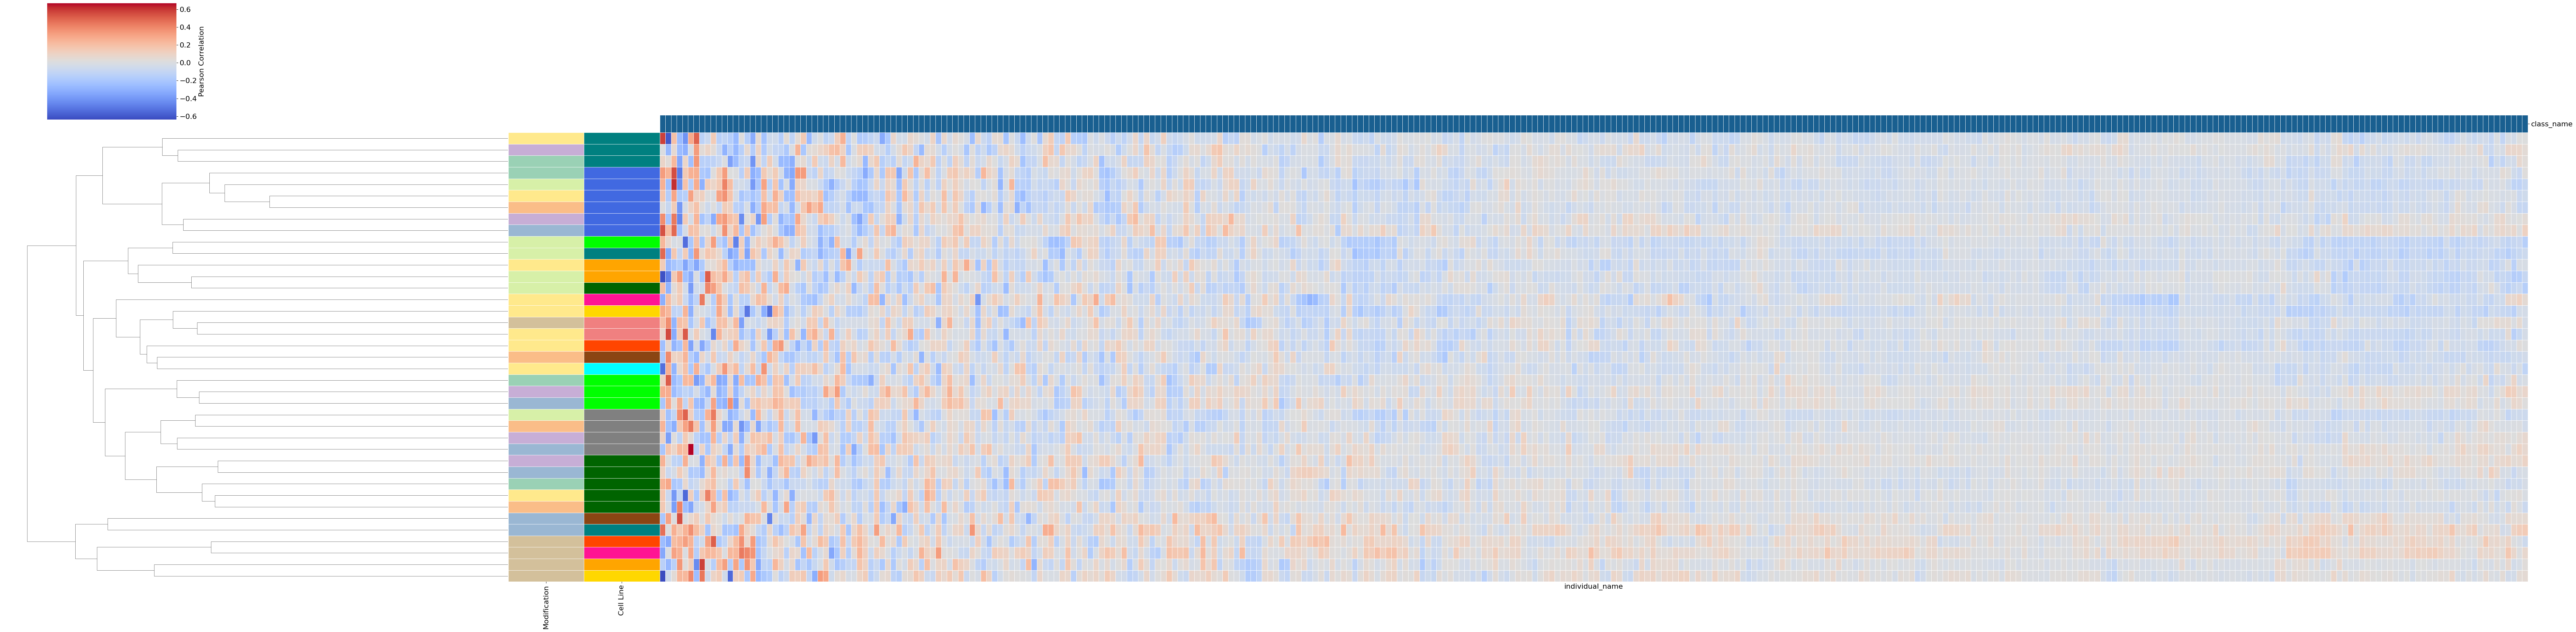

In [10]:
class_name = 'DNA'

individuals_by_classes = pd.read_csv("individuals_by_classes_TE.csv").dropna()

individuals_by_classes = individuals_by_classes.set_index("individual_name")
individual_names = individuals_by_classes.index[individuals_by_classes['class_name'] == class_name]


plt.rcParams.update({'font.size': 16})

# --- 1. Prepare Row Colors ---
# Map the 'cell_line' and 'modification' columns to their respective colors
mapped_cell_colors = correlation_df_individuals["cell_line"].map(cell_line_p)
mapped_mod_colors = correlation_df_individuals["modification"].map(
    modification_p_richer
)

individuals_by_classes = pd.read_csv("individuals_by_classes_TE.csv").dropna()

individuals_by_classes = individuals_by_classes.set_index("individual_name").reindex(
    individual_names
)
mapped_individuals_colors = individuals_by_classes["class_name"].map(class_names_p)

# Create a DataFrame for the row_colors argument
# The column names (e.g., 'Cell Line') will appear as labels.
row_colors_df = pd.DataFrame(
    {"Cell Line": mapped_cell_colors, "Modification": mapped_mod_colors}
)
# Important: The index must align with the data being plotted
row_colors_df.index = correlation_df_individuals.index


# --- 2. Plot the Clustermap ---
data_to_plot = correlation_df_individuals[individual_names].T


g = sns.clustermap(
    data_to_plot.T,
    cmap="coolwarm",
    # Goal 1: Customize figsize
    figsize=(80, 20),
    # Goal 2 & 3: Add row colors using the mapped palettes
    # We use row_colors, as 'cell_line' and 'modification' describe the rows
    row_colors=row_colors_df[["Modification", "Cell Line"]],
    col_colors=mapped_individuals_colors,
    # Other aesthetic improvements
    # vmin=-1, vmax=1,          # Set colorbar limits for correlation
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"},
    xticklabels=False, yticklabels=False
    # metric='correlation'      # Use correlation for clustering distance
)
g.ax_col_dendrogram.set_visible(False)

# --- 3. Save the Figure ---
save_path = f"./plots/signal_to_divergence_corr_clustermap_individuals_{class_name}.svg"
save_path_png = f"./plots/signal_to_divergence_corr_clustermap_individuals_{class_name}.png"

# Goal 4: Save as SVG
g.savefig(save_path, format="svg")
g.savefig(save_path_png, format="png")

plt.show()

### Curtosis etc

In [17]:
correlation_df_individuals = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed.csv", index_col=0
)
correlation_df_individuals["transformed_corr"] = np.arctanh(correlation_df_individuals.r)

correlation_df_individuals = correlation_df_individuals.dropna()
correlation_df_individuals

cell_line modification individual_name         r        p_value  \
0        Caco-2      H3K4me1           AluSx -0.052972  1.867869e-181   
1        Caco-2      H3K4me1           AluJb -0.038684   5.481065e-82   
2        Caco-2      H3K4me1            MIRb -0.028807   8.232433e-39   
3        Caco-2      H3K4me1             MIR -0.034494   2.377825e-41   
4        Caco-2      H3K4me1            AluY -0.031535   3.077889e-24   
...         ...          ...             ...       ...            ...   
44568     RWPE1      H3K27ac          Eulor7 -0.311056   3.518171e-01   
44569     RWPE1      H3K27ac    HERV-Fc2-int  0.220373   5.406718e-01   
44570     RWPE1      H3K27ac    HERVK11D-int -0.010531   9.802553e-01   
44571     RWPE1      H3K27ac      HERV1_LTRb  0.375183   3.597580e-01   
44572     RWPE1      H3K27ac   HERV-Fc1_LTR3 -0.779539   2.204615e-01   

         ci_low   ci_high  transformed_corr  
0     -0.056578 -0.049364         -0.053021  
1     -0.042632 -0.034735         -0.038704  
2     -0.033137 -0.024477         -0.028815  
3     -0.039508 -0.029478         -0.034507  
4     -0.037614 -0.025453         -0.031545  
...         ...       ...               ...  
44568 -0.767685  0.355074         -0.321714  
44569 -0.475187  0.746430          0.224048  
44570 -0.709936  0.699331         -0.010532  
44571 -0.447908  0.854059          0.394442  
44572 -0.995096  0.723891         -1.044193  

[44420 rows x 8 columns]

In [27]:
correlation_df_individuals[correlation_df_individuals['r'].abs()>0.2]

cell_line modification            individual_name         r  \
309      Caco-2      H3K4me1                     MER11C  0.218267   
686      Caco-2      H3K4me1                  MER41-int -0.201896   
745      Caco-2      H3K4me1                      MER84 -0.246719   
763      Caco-2      H3K4me1                   MER4A1_v -0.238852   
808      Caco-2      H3K4me1                    EUTREP7 -0.227558   
...         ...          ...                        ...       ...   
44567     RWPE1      H3K27ac  Alu-VAR_rnd-5_family-1084  0.672014   
44568     RWPE1      H3K27ac                     Eulor7 -0.311056   
44569     RWPE1      H3K27ac               HERV-Fc2-int  0.220373   
44571     RWPE1      H3K27ac                 HERV1_LTRb  0.375183   
44572     RWPE1      H3K27ac              HERV-Fc1_LTR3 -0.779539   

            p_value    ci_low   ci_high  transformed_corr  
309    2.124135e-16  0.167520  0.267861          0.221836  
686    2.177893e-04 -0.303100 -0.096190         -0.204709  
745    6.606277e-05 -0.358478 -0.127988         -0.251916  
763    2.409204e-04 -0.356678 -0.113547         -0.243556  
808    1.003811e-03 -0.353270 -0.093773         -0.231612  
...             ...       ...       ...               ...  
44567  9.821664e-02 -0.164079  0.946222          0.814407  
44568  3.518171e-01 -0.767685  0.355074         -0.321714  
44569  5.406718e-01 -0.475187  0.746430          0.224048  
44571  3.597580e-01 -0.447908  0.854059          0.394442  
44572  2.204615e-01 -0.995096  0.723891         -1.044193  

[2431 rows x 8 columns]

In [26]:
correlation_df_individuals[correlation_df_individuals['r'].abs()>0.4]

cell_line modification            individual_name         r  \
901      Caco-2      H3K4me1                  HERVE-int -0.462264   
1011     Caco-2      H3K4me1                    LTR13_v  0.437097   
1131     Caco-2      H3K4me1                 HERV1_LTRd -0.591283   
1137     Caco-2      H3K4me1                 HERV1_LTRb -0.430566   
1138     Caco-2      H3K4me1              HERV-Fc1_LTR3  0.946342   
...         ...          ...                        ...       ...   
44554     RWPE1      H3K27ac                 HERV1_LTRe  0.438559   
44561     RWPE1      H3K27ac                HERVK13-int -0.438491   
44563     RWPE1      H3K27ac              HERV-Fc1_LTR1  0.470514   
44567     RWPE1      H3K27ac  Alu-VAR_rnd-5_family-1084  0.672014   
44572     RWPE1      H3K27ac              HERV-Fc1_LTR3 -0.779539   

            p_value    ci_low   ci_high  transformed_corr  
901    7.905554e-09 -0.583023 -0.321522         -0.500186  
1011   1.547281e-04  0.225258  0.609474          0.468636  
1131   5.538249e-02 -0.879281  0.013315         -0.679636  
1137   2.869163e-01 -0.870977  0.393497         -0.460591  
1138   5.365763e-02 -0.162956  0.998907          1.795542  
...             ...       ...       ...               ...  
44554  7.824279e-02 -0.053326  0.759176          0.470445  
44561  1.339157e-01 -0.796935  0.148331         -0.470361  
44563  1.441351e-01 -0.180232  0.834774          0.510730  
44567  9.821664e-02 -0.164079  0.946222          0.814407  
44572  2.204615e-01 -0.995096  0.723891         -1.044193  

[320 rows x 8 columns]

<Axes: xlabel='transformed_corr', ylabel='Count'>

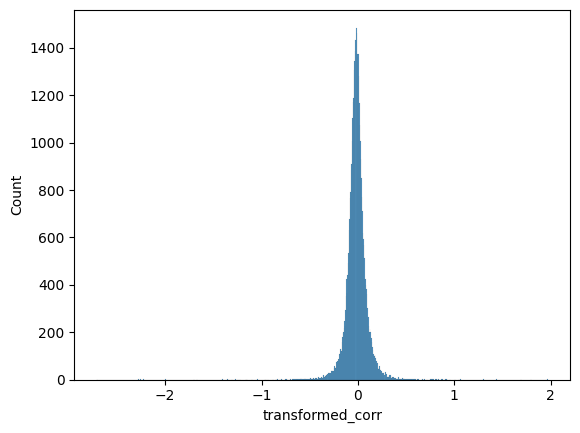

In [22]:
sns.histplot(correlation_df_individuals.transformed_corr)

In [23]:
stats.shapiro(correlation_df_individuals.transformed_corr)

/home/jovyan/venvs/bioreactor/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44420.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8407907374719474, pvalue=3.377370604172739e-106)

In [24]:
stats.kurtosistest(correlation_df_individuals.transformed_corr)

KurtosistestResult(statistic=117.92858436878615, pvalue=0.0)

In [25]:
stats.kurtosis(correlation_df_individuals.transformed_corr)

41.20394939717737

### Levene test for variances comparison between multiple groups

In [20]:
correlation_df_individuals = pd.read_csv(
    "Signal_vs_divergence_correlation_by_lines_mods_individuals_detailed.csv", index_col=0
)
correlation_df_individuals["transformed_corr"] = np.arctanh(correlation_df_individuals.r)

correlation_df_individuals = correlation_df_individuals.dropna()


individuals_by_classes = pd.read_csv("individuals_by_classes_TE.csv").dropna()
correlation_df_individuals = correlation_df_individuals.merge(individuals_by_classes)
correlation_df_individuals

cell_line modification individual_name         r        p_value  \
0        Caco-2      H3K4me1           AluSx -0.052972  1.867869e-181   
1        Caco-2      H3K9me3           AluSx  0.022421   5.416511e-34   
2       SJCRH30      H3K27ac           AluSx -0.009777   1.129678e-07   
3       SJCRH30      H3K4me1           AluSx -0.014957   5.100692e-16   
4       SJCRH30      H3K9me3           AluSx  0.042684  1.338697e-118   
...         ...          ...             ...       ...            ...   
44415     RWPE2     H3K36me3   HERV-Fc1_LTR3 -0.315069   6.849313e-01   
44416     22Rv1         CTCF   HERV-Fc1_LTR3  0.250080   7.499203e-01   
44417     22Rv1      H3K27ac   HERV-Fc1_LTR3  0.523075   4.769250e-01   
44418     RWPE1         CTCF   HERV-Fc1_LTR3  0.764252   2.357477e-01   
44419     RWPE1      H3K27ac   HERV-Fc1_LTR3 -0.779539   2.204615e-01   

         ci_low   ci_high  transformed_corr  Unnamed: 0 class_name  
0     -0.056578 -0.049364         -0.053021          18       SINE  
1      0.018806  0.026034          0.022424          18       SINE  
2     -0.013390 -0.006165         -0.009778          18       SINE  
3     -0.018571 -0.011342         -0.014958          18       SINE  
4      0.039075  0.046291          0.042710          18       SINE  
...         ...       ...               ...         ...        ...  
44415 -0.979542  0.926601         -0.326163      418258        LTR  
44416 -0.935965  0.976473          0.255498      418258        LTR  
44417 -0.880817  0.987650          0.580564      418258        LTR  
44418 -0.741410  0.994711          1.006360      418258        LTR  
44419 -0.995096  0.723891         -1.044193      418258        LTR  

[44420 rows x 10 columns]

In [22]:
from scipy.stats import levene

compare_list = [correlation_df_individuals["transformed_corr"][correlation_df_individuals["class_name"] == class_name] for class_name in correlation_df_individuals["class_name"].unique()] 

levene(*compare_list)

LeveneResult(statistic=144.95824649409516, pvalue=3.8940392705895976e-153)

In [23]:
from scipy.stats import levene

compare_list = [correlation_df_individuals["transformed_corr"][correlation_df_individuals["modification"] == modification] for modification in correlation_df_individuals["modification"].unique()] 

levene(*compare_list)

LeveneResult(statistic=27.389921445403328, pvalue=8.237580172625619e-33)

In [24]:
from scipy.stats import levene

compare_list = [correlation_df_individuals["transformed_corr"][correlation_df_individuals["cell_line"] == cell_line] for cell_line in correlation_df_individuals["cell_line"].unique()] 

levene(*compare_list)

LeveneResult(statistic=50.71768808266423, pvalue=7.555484978664608e-112)

# Epigenetic signals, GRE/NGRE - separate notebook and article
